# Packages

In [3]:
import numpy as np
from matplotlib.collections import LineCollection
from fastdtw import fastdtw
import datetime
from scipy.spatial.distance import euclidean
from dtaidistance import dtw
from matplotlib import cm
from dtaidistance import dtw_visualisation as dtwvis
from scipy.signal import savgol_filter
import time
import os
from scipy.optimize import curve_fit
%matplotlib notebook
# display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import plotly.graph_objects as go
# import cv2
import dash
from dash import Dash, dcc, html, Input, Output
from scipy.interpolate import BSpline, splrep, splev
# import plotly.express as px
import plotly.subplots
import csv
from numpy import genfromtxt
from datetime import datetime
# import pandas as pd
import pypot.dynamixel
from scipy.interpolate import make_interp_spline
from numpy.fft import fft, ifft
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import matplotlib.animation as animation

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable
import tensorflow as tf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.multioutput import MultiOutputRegressor
from IPython.display import display, HTML
from scipy.signal import savgol_filter
from matplotlib.colors import LinearSegmentedColormap
%matplotlib notebook
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
ourred = '#eb6235'
ourgreen = "#8fb032"
ourblue = "#5e81b5"
ourbrown = "#c56e1a"
ourpurple = "#8779af"
ourorange = "#e29c24"
fontsize = 16
colors__ = [(0.368, 0.507, 0.71), (0.881, 0.611, 0.142),
          (0.56, 0.692, 0.195), (0.923, 0.386, 0.209),
          (0.528, 0.471, 0.701), (0.772, 0.432, 0.102),
          (0.364, 0.619, 0.782), (0.572, 0.586, 0.),(0.4,0.4,0.4),(0.6,0.6,0.6),(0.8,0.8,0.8),(1.0,1.0,1.0) ]  # the last one is a darker green

# Experiment 01: Sensor Geometry

- Handheld LCR BK Precision, LCR 880

## Exp 01-01: Manufactured Setup Surface Area and Width and ADC

- Length 160 mm
- Width [3,4,5,6,7,8,9,10] mm
- ADC = (2 us * 63 uA) / (C * Vdd) *1024
- 5 Samples/Each
- Universal Laser Setting:100% Speed, 40% Power, 0.1 inch 

 Set/Manufactured Length [mm], Manufactured Height[mm], Set/Manufactured Width[mm], C [pF] at 1 kHz and 0.6V (Handheld LCR), ADC [0-1024]MPR121
- 160/159.26, 2.8, 10/[9.73, 9.82, 9.76, 9.63, 9.73]: [94.1, 94.3, 94.8, 93.8, 93.9] [ 642,  640,  637,  645,  653]
- 160/159.26, 2.8,  9/[8.71, 8.69, 8.70, 8.73, 8.62]: [83.1, 84.4, 85.0, 84.2, 84.5] [ 714,  712,  705,  711,  715]
- 160/159.26, 2.8,  8/[7.76, 7.69, 7.67, 7.64, 7.70]: [74.6, 73.6, 74.1, 73.8, 74.6] [ 776,  784,  775,  770,  775]
- 160/159.26, 2.8,  7/[6.82, 6.79, 6.68, 6.80, 6.72]: [66.0, 65.4, 65.9, 64.6, 65.6] [ 832,  834,  843,  840,  832]
- 160/159.26, 2.8,  6/[5.63, 5.76, 5.77, 5.77, 5.72]: [56.2, 57.1, 57.0, 57.8, 56.1] [ 936,  915,  917,  918,  921]
- 160/159.26, 2.8,  5/[4.72, 4.74, 4.70, 4.75, 4.66]: [48.0, 48.3, 47.8, 49.8, 47.3] [ 999,  989,  991,  984,  990]
- 160/159.26, 2.8,  4/[3.78, 3.83, 3.78, 3.76, 3.69]: [38.7, 38.6, 39.4, 38.7, 39.1] [1015, 1016, 1014, 1014, 1014]
- 160/159.26, 2.8,  3/[2.79, 2.70, 2.70, 2.77, 2.77]: [31.9, 30.6, 31.3, 31.1, 31.7] [1020, 1021, 1020, 1021, 1020]
Capacitance Range Extension by Two Sensors
Set Width [mm], Two Sensors Width [mm], C [pF] at 1 kHz and 0.6V (Handheld LCR), ADC [0-1024]MPR121
- 11,  5+6,     [104.6, 107.1, 105.7, 107.1, 101.1] [633, 621, 628, 620, 631], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 12,  5+7,     [111.0, 111.7, 110.6, 110.5, 110.0] [587, 582, 586, 586, 588], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 13,  5+8,     [118.2, 119.0, 117.9, 119.4, 122.8] [553, 552, 555, 550, 548], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 14,  5+9,     [130.2, 131.3, 130.7, 132.2, 131.7] [523, 521, 523, 517, 522], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 15,  5+10,    [137.3, 139.3, 137.7, 138.6, 137.7] [489, 486, 488, 487, 488], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 16,  6+10,    [146.4, 147.6, 147.4, 146.2, 146.6] [465, 461, 462, 464, 463], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 17,  7+10,    [156.0, 156.3, 156.4, 154.3, 155.6] [441, 440, 439, 444, 442], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 18,  8+10,    [164.1, 163.7, 164.7, 163.4, 165.1] [422, 423, 421, 423, 421], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 19,  9+10,    [173.2, 172.8, 174.2, 173.0, 173.9] [404, 405, 401, 404, 403], S1+S1, S2+S2, S3+S3, S4+S4, S5+S5
- 20, 10+10,    [183.1, 183.7, 183.4, 183.7, 183.5] [384, 383, 384, 384, 384], S1+S2, S2+S3, S3+S4, S4+S5, S5+S1
- 24: 10+8+6:   [218.9, 219.2, 219.3, 218.2, 219.4] [329, 328, 328, 331, 328], S1+S1+S1, S2+S2+S2, S3+S3+S3, S4+S4+S4, S5+S5+S5
- 28: 10+9+9:   [251.7, 253.1, 253.4, 253.2, 254.2] [291, 290, 289, 289, 288], S1+S1+S2, S2+S2+S3, S3+S3+S4, S4+S4+S5, S5+S5+S1
- 30: 10+10+10: [275.0, 274.3, 275.2, 273.5, 274.6] [269, 270, 270, 270, 269], S1+S2+S3, S2+S3+S4, S3+S4+S5, S4+S5+S1, S5+S1+S2

In [ ]:
x03 = [31.9, 30.6, 31.3, 31.1, 31.7]
v03 = [1020, 1021, 1020, 1021, 1020]
x04 = [38.7, 38.6, 39.4, 38.7, 39.1]
v04 = [1015, 1016, 1014, 1014, 1014]
x05 = [48.0, 48.3, 47.8, 49.8, 47.3]
v05 = [ 999,  989,  991,  984,  990]
x06 = [56.2, 57.1, 57.0, 57.8, 56.1]
v06 = [ 936,  915,  917,  918,  921]
x07 = [66.0, 65.4, 65.9, 64.6, 65.6]
v07 = [ 832,  834,  843,  840,  832]
x08 = [74.6, 73.6, 74.1, 73.8, 74.6]
v08 = [ 776,  784,  775,  770,  775]
x09 = [83.1, 84.4, 85.0, 84.2, 84.5]
v09 = [ 714,  712,  705,  711,  715]
x10 = [94.1, 94.3, 94.8, 93.8, 93.9]
v10 = [ 642,  640,  637,  645,  653]
x11 = [104.6, 107.1, 105.7, 107.1, 101.1]
v11 = [633, 621, 628, 620, 631]
x12 = [111.0, 111.7, 110.6, 110.5, 110.0]
v12 = [587, 582, 586, 586, 588]
x13 = [118.2, 119.0, 117.9, 119.4, 122.8]
v13 = [553, 552, 555, 550, 548]
x14 = [130.2, 131.3, 130.7, 132.2, 131.7]
v14 = [523, 521, 523, 517, 522]
x15 = [137.3, 139.3, 137.7, 138.6, 137.7]
v15 = [489, 486, 488, 487, 488]
x16 = [146.4, 147.6, 147.4, 146.2, 146.6]
v16 = [465, 461, 462, 464, 463]
x17 = [156.0, 156.3, 156.4, 154.3, 155.6]
v17 = [441, 440, 439, 444, 442]
x18 = [164.1, 163.7, 164.7, 163.4, 165.1] 
v18 = [422, 423, 421, 423, 421]
x19 = [173.2, 172.8, 174.2, 173.0, 173.9]
v19 = [404, 405, 401, 404, 403]
x20 = [183.1, 183.7, 183.4, 183.7, 183.5]
v20 = [384, 383, 384, 384, 384]

length1 = [3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10,11,11,11,11,11,12,12,12,12,12,13,13,13,13,13,14,14,14,14,14,15,15,15,15,15,16,16,16,16,16,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,20,20]
length2 = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_value = x03+x04+x05+x06+x07+x08+x09+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20
x_mean = np.asarray([np.mean(x03), np.mean(x04), np.mean(x05), np.mean(x06), np.mean(x07), np.mean(x08), np.mean(x09), np.mean(x10), 
                     np.mean(x11), np.mean(x12), np.mean(x13), np.mean(x14), np.mean(x15), np.mean(x16), np.mean(x17), np.mean(x18), np.mean(x19), np.mean(x20)])
x_std  = np.asarray([np.std(x03),   np.std(x04),  np.std(x05),  np.std(x06),  np.std(x07),  np.std(x08),  np.std(x09),  np.std(x10),
                     np.std(x11),   np.std(x12),  np.std(x13),  np.std(x14),  np.std(x15),  np.std(x16),  np.std(x17),  np.std(x18), np.std(x19), np.std(x20)])
 
v_mean = np.asarray([np.mean(v03), np.mean(v04), np.mean(v05), np.mean(v06), np.mean(v07), np.mean(v08), np.mean(v09), np.mean(v10), 
                     np.mean(v11), np.mean(v12), np.mean(v13), np.mean(v14), np.mean(v15), np.mean(v16), np.mean(v17), np.mean(v18), np.mean(v19), np.mean(v20)])
v_std  = np.asarray([np.std(v03),   np.std(v04),  np.std(v05),  np.std(v06),  np.std(v07),  np.std(v08),  np.std(v09),  np.std(v10),
                     np.std(v11),   np.std(v12),  np.std(v13),  np.std(v14),  np.std(v15),  np.std(v16),  np.std(v17),  np.std(v18), np.std(v19),  np.std(v20)])

fig, ax1 = plt.subplots(figsize=(4, 3))
plt.scatter(length1,y_value,c=ourred,s=16,label='Real Point',alpha=1)
plt.plot(length2,x_mean,':',c=ourred,linewidth = 1,label='Real Mean')
plt.fill_between(length2, x_mean-x_std, x_mean+x_std,alpha=0.2,color=ourred,label="Real SD")
plt.plot(np.unique(length2), np.poly1d(np.polyfit(length2, x_mean, 1))(np.unique(length2)),linewidth=1.4,c=ourblue,label="Fitted Mean")
plt.xlim([3,20])
plt.ylim([20,200])
plt.xticks([3,4,8,12,16,20],font="Arial",fontsize=fontsize)
plt.yticks([20,32,100,183,200],font="Arial",fontsize=fontsize)
plt.xlabel("Sensor Width [mm]",font="Arial",fontsize=fontsize)
plt.ylabel(r"C$_0$ [pF]",fontsize=fontsize)
plt.legend(loc=[0.0,0.465],fontsize=fontsize*0.9,handlelength=1,framealpha=0)
plt.subplots_adjust(0.2,0.22,0.97,0.96)
plt.savefig("../00_Finalization/Figure/01_C_SensorWidth.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/01_C_SensorWidth.svg",dpi=600,transparent=True)

In [ ]:
x03 = [31.9, 30.6, 31.3, 31.1, 31.7]
v03 = [1020, 1021, 1020, 1021, 1020]
x04 = [38.7, 38.6, 39.4, 38.7, 39.1]
v04 = [1015, 1016, 1014, 1014, 1014]
x05 = [48.0, 48.3, 47.8, 49.8, 47.3]
v05 = [ 999,  989,  991,  984,  990]
x06 = [56.2, 57.1, 57.0, 57.8, 56.1]
v06 = [ 936,  915,  917,  918,  921]
x07 = [66.0, 65.4, 65.9, 64.6, 65.6]
v07 = [ 832,  834,  843,  840,  832]
x08 = [74.6, 73.6, 74.1, 73.8, 74.6]
v08 = [ 776,  784,  775,  770,  775]
x09 = [83.1, 84.4, 85.0, 84.2, 84.5]
v09 = [ 714,  712,  705,  711,  715]
x10 = [94.1, 94.3, 94.8, 93.8, 93.9]
v10 = [ 642,  640,  637,  645,  653]
x11 = [104.6, 107.1, 105.7, 107.1, 101.1]
v11 = [633, 621, 628, 620, 631]
x12 = [111.0, 111.7, 110.6, 110.5, 110.0]
v12 = [587, 582, 586, 586, 588]
x13 = [118.2, 119.0, 117.9, 119.4, 122.8]
v13 = [553, 552, 555, 550, 548]
x14 = [130.2, 131.3, 130.7, 132.2, 131.7]
v14 = [523, 521, 523, 517, 522]
x15 = [137.3, 139.3, 137.7, 138.6, 137.7]
v15 = [489, 486, 488, 487, 488]
x16 = [146.4, 147.6, 147.4, 146.2, 146.6]
v16 = [465, 461, 462, 464, 463]
x17 = [156.0, 156.3, 156.4, 154.3, 155.6]
v17 = [441, 440, 439, 444, 442]
x18 = [164.1, 163.7, 164.7, 163.4, 165.1] 
v18 = [422, 423, 421, 423, 421]
x19 = [173.2, 172.8, 174.2, 173.0, 173.9]
v19 = [404, 405, 401, 404, 403]
x20 = [183.1, 183.7, 183.4, 183.7, 183.5]
v20 = [384, 383, 384, 384, 384]
x24 = [218.9, 219.2, 219.3, 218.2, 219.4] 
v24 = [329, 328, 328, 331, 328]
x28 = [251.7, 253.1, 253.4, 253.2, 254.2] 
v28 = [291, 290, 289, 289, 288]
x30 = [275.0, 274.3, 275.2, 273.5, 274.6] 
v30 = [269, 270, 270, 270, 269]

length1 = [3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10,
           11,11,11,11,11,12,12,12,12,12,13,13,13,13,13,14,14,14,14,14,15,15,15,15,15,16,16,16,16,16,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,20,20,
          24,24,24,24,24,28,28,28,28,28,30,30,30,30,30]
length2 = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,24,28,30]
x_value = x03+x04+x05+x06+x07+x08+x09+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x24+x28+x30
y_value = v03+v04+v05+v06+v07+v08+v09+v10+v11+v12+v13+v14+v15+v16+v17+v18+v19+v20+v24+v28+v30
x_mean = np.asarray([np.mean(x03), np.mean(x04), np.mean(x05), np.mean(x06), np.mean(x07), np.mean(x08), np.mean(x09), np.mean(x10), 
                     np.mean(x11), np.mean(x12), np.mean(x13), np.mean(x14), np.mean(x15), np.mean(x16), np.mean(x17), np.mean(x18), np.mean(x19), np.mean(x20),
                     np.mean(x24), np.mean(x28), np.mean(x30)])
x_std  = np.asarray([np.std(x03),   np.std(x04),  np.std(x05),  np.std(x06),  np.std(x07),  np.std(x08),  np.std(x09),  np.std(x10),
                     np.std(x11),   np.std(x12),  np.std(x13),  np.std(x14),  np.std(x15),  np.std(x16),  np.std(x17),  np.std(x18), np.std(x19), np.std(x20),
                     np.std(x24), np.std(x28), np.std(x30)])
 
v_mean = np.asarray([np.mean(v03), np.mean(v04), np.mean(v05), np.mean(v06), np.mean(v07), np.mean(v08), np.mean(v09), np.mean(v10), 
                     np.mean(v11), np.mean(v12), np.mean(v13), np.mean(v14), np.mean(v15), np.mean(v16), np.mean(v17), np.mean(v18), np.mean(v19), np.mean(v20),
                     np.mean(v24), np.mean(v28), np.mean(v30)])
v_std  = np.asarray([np.std(v03),   np.std(v04),  np.std(v05),  np.std(v06),  np.std(v07),  np.std(v08),  np.std(v09),  np.std(v10),
                     np.std(v11),   np.std(v12),  np.std(v13),  np.std(v14),  np.std(v15),  np.std(v16),  np.std(v17),  np.std(v18), np.std(v19),  np.std(v20),
                     np.std(v24),   np.std(v28),  np.std(v30)])

c = x_mean
v = v_mean
for ii in range(100):
    v_new = np.copy(v)
    for i in range(7,len(c)-7,1):
        slop_ref = abs((v[i+1]-v[i-1])/(c[i+1]-c[i-1]))
        slop1 = abs((v[i]-v[i-1])/(c[i]-c[i-1]))
        slop2 = abs((v[i+1]-v[i])/(c[i+1]-c[i]))
        if slop1<=slop_ref and slop2>=slop_ref:
            v_new[i] = v[i-1]- slop_ref*(c[i]-c[i-1])
    v = v_new

v_slop = [abs((v[1]-v[0])/(c[1]-c[0]))]
c_slop = [c[0]]
for i in range(1,len(c)-1,1):
    v_slop += [abs((v[i+1]-v[i-1])/(c[i+1]-c[i-1]))]
    c_slop += [c[i]]
v_slop +=[(v[-1]-v[-2])/(c[-1]-c[-2])]
c_slop +=[c[-1]]

def func(x, a, b,c):
    return a*(2 * 63) / x**b *1024 +c
popt, pcov = curve_fit(func, x_mean[3:], v_mean[3:])
v_mean_fitted = func(x_mean, *popt)

fig, ax1 = plt.subplots(figsize=(4, 3))
plt.scatter(x_value,y_value,c=ourred,s=16,label='Real Point',alpha=1)
plt.plot(x_mean,v_mean,":",c=ourred,linewidth = 1,label='Real Mean')
plt.plot(x_mean,v_mean_fitted,c=ourred,linewidth = 1,label='Real Mean')
# plt.fill_between(x_mean, v_mean-v_std, v_mean+v_std,alpha=0.2,color=ourred,label="Real SD")
plt.hlines(512,0,133, linestyles='dashed',color=ourgreen,alpha=0.4)
plt.vlines(133,0,512, linestyles='dashed',color=ourgreen,alpha=0.4)
plt.scatter(133,512,c=ourgreen,s=80,zorder=10)
plt.xlim([0,300])
plt.ylim([0,1024])
plt.xticks([0,57,133,200,250,300],font="Arial",fontsize=fontsize)
plt.yticks([0,270,512,1024],font="Arial",fontsize=fontsize,color=ourred)
plt.xlabel("Capacitance [pF]",font="Arial",fontsize=fontsize)
plt.ylabel("ADC",color=ourred,fontsize=fontsize)

ax2 = ax1.twinx()
plt.scatter(c_slop[:len(c)-1],v_slop[:len(c)-1],c=ourblue,linewidth = 1,zorder=5)
plt.plot(c_slop[:len(c)-1],v_slop[:len(c)-1],":",c=ourblue,linewidth = 1,zorder=5)
plt.scatter(57,max(v_slop),c=ourgreen,s=80,zorder=10)
plt.vlines(57,0,8, linestyles='dashed',color=ourgreen,alpha=0.5)
ax2.set_ylim(0, 10)
plt.yticks([0,5,10],font="Arial",fontsize=fontsize,color=ourblue)
plt.ylabel("Sensitivity [ADC/pF]",color=ourblue,fontsize=fontsize)
plt.legend(loc='upper right',fontsize=fontsize,framealpha=0,handlelength=1)
plt.subplots_adjust(0.22,0.22,0.82,0.96)
plt.savefig("../00_Finalization/Figure/01_C_ADC.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/01_C_ADC.svg",dpi=600,transparent=True)

## Exp 01-02: Cyclic Deformation 50%: Plastic Deformation and Sensing Range, Decide Sensing Area -> 6, 8, 10, 12 mm widths are good

- Manufacturing Parameter:
    - Heat Press: 160 degree 30 s
    - Universal Laser Cutter: 100% Power, 20% Speed, 1000% DpI, 0.104 inch Thickness
- Length 160 mm, Thickness 2.64 mm, 0.104 inch, Top Head Area 201.72 mm2, Bottom Head Area 251.72 mm2.
- Width: 6 mm, 8 mm, 10 mm, 12 mm, 14 mm
- Cycle: 50 under 50% Strain = 80 mm

- Measured Length [mm], Measured Thickness=2.64 [mm] Measured Width [mm], Initial C [pF] at 1 kHz and 0.6V (Handheld LCR), Out of Manufacturing, C [pF] at 80 mm, Max Force [N] at 80 mm
-  6 mm: [160.0, 160.0, 160.0, 160.0, 160.0], [ 5.76,  5.77,  5.81,  5.72,  5.75], [ 84.3,  84.0,  87.9,  87.0,  86.8], [116.3, 117.2, 120.0, 117.2, 117.2], [ 7.8,  8.0,  8.3,  8.1,  8.5]
-  8 mm: [160.0, 160.0, 160.0, 160.0, 160.0], [ 7.56,  7.65,  7.74,  7.74,  7.64], [ 99.2, 102.2, 101.2, 103.2,  99.1], [139.6, 143.1, 140.7, 143.5, 136.0], [ 9.5, 11.1, 10.1, 10.8,  9.9]
- 10 mm: [160.0, 160.0, 160.0, 160.0, 160.0], [ 9.78,  9.84,  9.82,  9.85,  9.72], [124.2, 121.1, 120.8, 120.4, 120.0], [169.6, 171.9, 170.8, 169.8, 168.1], [13.3, 12.7, 13.2, 13.4, 13.8]
- 12 mm: [160.0, 160.0, 160.0, 160.0, 160.0], [11.83, 11.70, 11.80, 11.81, 11.75], [141.5, 138.7, 140.3, 139.6, 140.5], [202.2, 187.8, 197.0, 194.3, 195.4], [15.8, 14.1, 17.1, 16.6, 16.8]
- 14 mm: [160.0, 160.0, 160.0, 160.0, 160.0], [13.70, 13.72, 13.74, 13.75, 13.83], [155.5, 159.1, 160.8, 159.3, 160.2], [226.8, 227.7, 235.8, 227.5, 231.4], [16.9, 17.1, 19.0, 17.3, 18.0]

- Measured Length [mm], Measured Thickness [mm], Measured Width [mm], Initial C [pF] at 1 kHz and 0.6V (Handheld LCR), After 50 Cycles and Fully Cool Down
-  6 mm: [175, 175, 175, 176, 174], [2.59, 2.58, 2.58, 2.58, 2.57], [ 5.67, 5.71,  5.78,  5.64, 5.69], [ 88.0,  87.7,  89.4,  87.3,  86.2]
-  8 mm: [174, 176, 175, 175, 175], [2.57, 2.57, 2.58, 2.57, 2.58], [ 7.56, 7.64,  7.74,  7.73, 7.64], [102.4, 107.5, 105.2, 107.8, 102.5]
- 10 mm: [174, 175, 176, 175, 175], [2.57, 2.57, 2.57, 2.58, 2.57], [ 9.69, 9.78,  9.79,  9.73, 9.63], [125.3, 127.0, 127.7, 126.6, 124.9]
- 12 mm: [175, 174, 175, 175, 175], [2.56, 2.57, 2.56, 2.56, 2.58], [11.72,11.51, 11.65, 11.73,11.62], [148.2, 140.4, 147.5, 145.8, 144.2]
- 14 mm: [174, 174, 174, 173, 173], [2.60, 2.63, 2.65, 2.63, 2.64], [13.47,13.55, 13.57, 13.55,13.70], [162.3, 166.0, 166.3, 165.8, 164.3]

In [ ]:
C6_0 = [ 84.3,  84.0,  87.9,  87.0,  86.8]
C6_80_0 = [116.3, 117.2, 120.0, 117.2, 117.2]
F6_80_0 = [ 7.8,  8.0,  8.3,  8.1,  8.5]
C8_0 = [ 99.2, 102.2, 101.2, 103.2,  99.1]
C8_80_0 = [139.6, 143.1, 140.7, 143.5, 136.0]
F8_80_0 = [ 9.5, 11.1, 10.1, 10.8,  9.9]
C10_0 = [124.2, 121.1, 120.8, 120.4, 120.0]
C10_80_0 = [169.6, 171.9, 170.8, 169.8, 168.1]
F10_80_0 = [13.3, 12.7, 13.2, 13.4, 13.8]
C12_0 = [141.5, 138.7, 140.3, 139.6, 140.5]
C12_80_0 = [202.2, 187.8, 197.0, 194.3, 195.4]
F12_80_0 = [15.8, 14.1, 17.1, 16.6, 16.8]
C14_0 = [155.5, 159.1, 160.8, 159.3, 160.2]
C14_80_0 = [226.8, 227.7, 235.8, 227.5, 231.4]
F14_80_0 = [16.9, 17.1, 19.0, 17.3, 18.0]
X1 = [6,6,6,6,6,8,8,8,8,8,10,10,10,10,10,12,12,12,12,12,14,14,14,14,14]
C0 = C6_0+C8_0+C10_0+C12_0+C14_0
C80_0 = C6_80_0+C8_80_0+C10_80_0+C12_80_0+C14_80_0
F80_0 = F6_80_0+F8_80_0+F10_80_0+F12_80_0+F14_80_0
X2 = [6,8,10,12,14]

In [ ]:
fig,ax1 = plt.subplots(figsize=(4,3))
plt.scatter(X1,C0,alpha=0.2,c=ourred,label="Default")
plt.errorbar(X2,[np.mean(C6_0),np.mean(C8_0),np.mean(C10_0),np.mean(C12_0),np.mean(C14_0)],[np.std(C6_0),np.std(C8_0),np.std(C10_0),np.std(C12_0),np.std(C14_0)],c=ourred,alpha=0.5)
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(C6_0),np.mean(C8_0),np.mean(C10_0),np.mean(C12_0),np.mean(C14_0)], 1))(np.unique(X2)),linewidth=1.4,c=ourred,linestyle=":")

plt.scatter(X1,C80_0,alpha=0.2,c=ourgreen,label="1st@80 mm")
plt.errorbar(X2,[np.mean(C6_80_0),np.mean(C8_80_0),np.mean(C10_80_0),np.mean(C12_80_0),np.mean(C14_80_0)],[np.std(C6_80_0),np.std(C8_80_0),np.std(C10_80_0),np.std(C12_80_0),np.std(C14_80_0)],c=ourgreen,alpha=0.5)
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(C6_80_0),np.mean(C8_80_0),np.mean(C10_80_0),np.mean(C12_80_0),np.mean(C14_80_0)], 1))(np.unique(X2)),linewidth=1.4,c=ourgreen,linestyle=":")
plt.ylim(50, 250)
plt.xticks([6,8,10,12,14],font="Arial",fontsize=fontsize)
plt.xlabel("Sensor Width [mm]",font="Arial",fontsize=fontsize)
plt.yticks([50,150,250],font="Arial",fontsize=fontsize)
plt.ylabel("Capacitance [pF]",fontsize=fontsize)
plt.legend(loc = [-0.05,0.75],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
ax2 = ax1.twinx()
plt.scatter(X1,F80_0,alpha=0.2,c=ourblue,label="1st@80 mm")
plt.errorbar(X2,[np.mean(F6_80_0),np.mean(F8_80_0),np.mean(F10_80_0),np.mean(F12_80_0),np.mean(F14_80_0)],[np.std(F6_80_0),np.std(F8_80_0),np.std(F10_80_0),np.std(F12_80_0),np.std(F14_80_0)],c=ourblue,alpha=0.5)
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(F6_80_0),np.mean(F8_80_0),np.mean(F10_80_0),np.mean(F12_80_0),np.mean(F14_80_0)], 1))(np.unique(X2)),linewidth=1.4,c=ourblue,linestyle=":")
plt.ylim(6, 20)
plt.yticks([6,13,20],font="Arial",fontsize=fontsize,color=ourblue)
plt.ylabel("Force [N]",fontsize=fontsize,color=ourblue)


plt.legend(loc = [-0.05,0.65],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)

plt.subplots_adjust(0.2,0.2,0.85,0.96)
plt.savefig("../00_Finalization/Figure/03_Sensorwidth_CapacitanceRange.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/03_Sensorwidth_CapacitanceRange.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((51,2))
    C_High = np.zeros((50,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = np.argsort(data[:1000,1])[0]
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-np.min([index,20]):i+20,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>10 and count_Low<51:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-np.min([index,30]):i+30,1]) and count_High<50:
            if count_High<=50:
                C_High[count_High] = data[i]
                count_High += 1
    delta_t = (C_High[49,0]-C_High[48,0])/2.0+C_High[49,0]
    t_index = np.argsort(data[:,0]-delta_t)[0]
    C_Low[50] = data[t_index]
    return C_Low, C_High

def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],2))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    F_Low = np.zeros((51,2))
    F_High = np.zeros((50,2))
    F_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(100,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-100:i+100,1]):
            if abs(F_Low[count_Low-1,0]-data[i,0])>10 and count_Low<51:
                F_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-100:i+100,1]) and data[i,1]>3:
            if count_High <50:
                F_High[count_High] = data[i]
                count_High += 1
    return F_Low, F_High

In [ ]:
# 6 mm
name = "6mmS1"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_6mm_Sample1 2023-11-02 19-45-43 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_6mm_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "6mmS2"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_6mm_Sample2 2023-11-02 20-05-37 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_6mm_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "6mmS3"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_6mm_Sample3 2023-11-02 20-24-05 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_6mm_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "6mmS4"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_6mm_Sample4 2023-11-02 20-41-45 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_6mm_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "6mmS5"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_6mm_Sample5 2023-11-02 21-06-03 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_6mm_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

# 8 mm
name = "8mmS1"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_8mm_Sample1 2023-11-01 17-20-10 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_8mm_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "8mmS2"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_8mm_Sample2 2023-11-01 17-44-17 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_8mm_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "8mmS3"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_8mm_Sample3 2023-11-01 18-03-57 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_8mm_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "8mmS4"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_8mm_Sample4 2023-11-01 18-22-27 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_8mm_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "8mmS5"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_8mm_Sample5 2023-11-01 18-43-06 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_8mm_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

# 10 mm
name = "10mmS1"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_10mm_Sample1 2023-11-01 19-07-01 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_10mm_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS2"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_10mm_Sample2 2023-11-01 19-29-27 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_10mm_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS3"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_10mm_Sample3 2023-11-01 19-52-59 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_10mm_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS4"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_10mm_Sample4 2023-11-01 20-10-55 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_10mm_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS5"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_10mm_Sample5 2023-11-01 20-28-28 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_10mm_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

# 12 mm
name = "12mmS1"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_12mm_Sample1 2023-11-01 20-46-19 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_12mm_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "12mmS2"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_12mm_Sample2 2023-11-02 10-48-14 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_12mm_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "12mmS3"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_12mm_Sample3 2023-11-02 09-53-52 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_12mm_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "12mmS4"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_12mm_Sample4 2023-11-02 10-12-05 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_12mm_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "12mmS5"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_12mm_Sample5 2023-11-02 11-42-52 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_12mm_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

# 14 mm
name = "14mmS1"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_14mm_Sample1 2023-11-03 10-13-03 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_14mm_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "14mmS2"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_14mm_Sample2 2023-11-03 10-32-32 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_14mm_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "14mmS3"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_14mm_Sample3 2023-11-03 10-50-19 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_14mm_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "14mmS4"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_14mm_Sample4 2023-11-03 11-07-54 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_14mm_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "14mmS5"
csv_file = "Exp01-02_C0_Cycling/00_LCR_50Cycles_80mm_14mm_Sample5 2023-11-03 11-27-12 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp01-02_C0_Cycling/00_Instron_50Cycles_80mm_14mm_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

In [ ]:
C_Low_All = np.zeros((50,25))
C_High_All = np.zeros((50,25))
F_Low_All = np.zeros((51,25))
F_High_All = np.zeros((50,25))
count = 0
for name1 in ["6mm","8mm","10mm","12mm","14mm"]:
    for name2 in ["S1","S2","S3","S4","S5"]:
        C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name1+name2+".txt")
        C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name1+name2+".txt")
        F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name1+name2+".txt")
        F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name1+name2+".txt")
        C_Low_All[:,count] = C_Low[:50,1] 
        C_High_All[:,count] = C_High[:,1]
        F_Low_All[:,count] = F_Low[:,1]-np.min(F_Low[:,1])
        F_High_All[:,count] = F_High[:,1]-np.min(F_Low[:,1])
        count += 1

width = 6
for i in range(5):
    base = C_Low_All[0,i]*(201.72+251.72)/(201.72+251.72+width*160.0)
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 

width = 8
for i in range(5,10,1):
    base = C_Low_All[0,i]*(201.72+251.72)/(201.72+251.72+width*160.0)
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 
    
width = 10
for i in range(10,15,1):
    base = C_Low_All[0,i]*(201.72+251.72)/(201.72+251.72+width*160.0)
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 

width = 12
for i in range(15,20,1):
    base = C_Low_All[0,i]*(201.72+251.72)/(201.72+251.72+width*160.0)
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 
    
width = 14
for i in range(20,25,1):
    base = C_Low_All[0,i]*(201.72+251.72)/(201.72+251.72+width*160.0)
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 
    
X1 = [6,6,6,6,6,8,8,8,8,8,10,10,10,10,10,12,12,12,12,12,14,14,14,14,14]
X2 = [6,8,10,12,14]
C0 = C_Low_All[0]
C0_mean = [np.mean(C0[:5]),np.mean(C0[5:10]),np.mean(C0[10:15]),np.mean(C0[15:20]),np.mean(C0[20:])]
C0_std = [np.std(C0[:5]),np.std(C0[5:10]),np.std(C0[10:15]),np.std(C0[15:20]),np.std(C0[20:])]

C50_max = C_High_All[49]
C50_max_mean = [np.mean(C50_max[:5]),np.mean(C50_max[5:10]),np.mean(C50_max[10:15]),np.mean(C50_max[15:20]),np.mean(C50_max[20:])]
C50_max_std = [np.std(C50_max[:5]),np.std(C50_max[5:10]),np.std(C50_max[10:15]),np.std(C50_max[15:20]),np.std(C50_max[20:])]

C50_min = C_Low_All[49]
C50_min_mean = [np.mean(C50_min[:5]),np.mean(C50_min[5:10]),np.mean(C50_min[10:15]),np.mean(C50_min[15:20]),np.mean(C50_min[20:])]
C50_min_std = [np.std(C50_min[:5]),np.std(C50_min[5:10]),np.std(C50_min[10:15]),np.std(C50_min[15:20]),np.std(C50_min[20:])]

F1 = F_High_All[0]
F1_mean = [np.mean(F1[:5]),np.mean(F1[5:10]),np.mean(F1[10:15]),np.mean(F1[15:20]),np.mean(F1[20:])]
F1_std = [np.std(F1[:5]),np.std(F1[5:10]),np.std(F1[10:15]),np.std(F1[15:20]),np.std(F1[20:])]

F50 = F_High_All[49]
F50_mean = [np.mean(F50[:5]),np.mean(F50[5:10]),np.mean(F50[10:15]),np.mean(F50[15:20]),np.mean(F50[20:])]
F50_std = [np.std(F50[:5]),np.std(F50[5:10]),np.std(F50[10:15]),np.std(F50[15:20]),np.std(F50[20:])]

In [ ]:
fig,ax1 = plt.subplots(figsize=(4,3))
plt.scatter(X1,C0,alpha=0.2,c=ourred,label=r"C$_0$")
plt.errorbar(X2,C0_mean,C0_std,c=ourred,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C0_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourred)
plt.scatter(X1,C50_min,alpha=0.2,c=ourgreen,label=r"min(C$_{50}$)")
plt.errorbar(X2,C50_min_mean,C50_min_std,c=ourgreen,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C50_min_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourgreen)
plt.scatter(X1,C50_max,alpha=0.2,c=ourblue,label=r"max(C$_{50}$)")
plt.errorbar(X2,C50_max_mean,C50_max_std,c=ourblue,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C50_max_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourblue)

plt.xlim([6,14])
plt.ylim([50e-12,200e-12])
plt.xticks([6,8,10,12,14],font="Arial",fontsize=fontsize)
plt.yticks([50e-12,100e-12,150e-12,200e-12],[50,100,150,200],font="Arial",fontsize=fontsize)
plt.xlabel("Sensor Width [mm]",font="Arial",fontsize=fontsize)
plt.ylabel(r"C [pF]",fontsize=fontsize)
plt.legend(loc = [0.05,0.62],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)

ADC = []
for i in range(5):
    ADC += [func(C50_min_mean[i]*1e12,*popt)-func(C50_max_mean[i]*1e12,*popt)]

ax2 = ax1.twinx()
plt.plot(X2,ADC,c=ourbrown,linewidth = 1,zorder=5)
plt.scatter(X2,ADC,c=ourbrown,s=40,zorder=10)
ax2.set_ylim(60, 160)
plt.yticks([60,120,180],font="Arial",fontsize=fontsize,color=ourbrown)
plt.ylabel(r"$\Delta$ ADC",color=ourbrown,fontsize=fontsize)
plt.legend(loc='upper right',fontsize=fontsize,framealpha=0,handlelength=1)
plt.subplots_adjust(0.22,0.22,0.82,0.96)
plt.savefig("../00_Finalization/Figure/02_cycle_width_C.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/02_cycle_width_C.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.subplots(figsize=(4,3))
plt.scatter(X2,F1,alpha=0.2,c=ourred,label=r"F$_1$")
plt.errorbar(X2,F1_mean,F1_std,c=ourred,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, F1_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourred)
plt.scatter(X1,F50,alpha=0.2,c=ourgreen,label=r"F$_{50}$")
plt.errorbar(X2,F50_mean,F50_std,c=ourgreen,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, F50_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourgreen)

plt.ylim(5, 21)
plt.xticks([6,8,10,12,14],font="Arial",fontsize=fontsize)
plt.xlabel("Sensor Width [mm]",font="Arial",fontsize=fontsize)
plt.yticks([5,10,15,20],font="Arial",fontsize=fontsize)
plt.ylabel(r"Force [N]",fontsize=fontsize)
plt.legend(loc = [0.05,0.72],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
plt.subplots_adjust(0.22,0.22,0.97,0.96)
plt.savefig("../00_Finalization/Figure/02_cycle_width_F.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/02_cycle_width_F.svg",dpi=600,transparent=True)

## Exp 01-03: Conductive Fabric Wire Length Influence on the Capacitance --> 3, 4, 5 mm widths are good. For security reason, choose 4 mm.

- Base Capacitor: 14 mm Width 160 mm Length Sample1 from Exp 01-02 after 50 Cycling: min(S1_C50) = 162.8 pF
- Fabric Wire Length 100 mm, 200 mm, 300 mm with a Width of 6 mm in Design/5.85 mm after Manufacturing (100% Speed, 40% Power, 1000 DPI, 0.01 inch Thickness, Two Paths)

- Length [mm], Capacitance [pF]
- 100, [163.0, 163.0, 163.1, 163.3, 162.8]
- 200, [162.7, 163.1, 163.2, 163.2, 163.0]
- 300, [166.8, 165.9, 166.5, 164.5, 165.2]

- Base Capacitor: 10 mm Width 160 mm Length SampleID 41: min(S1_C50) = 103.7pF

- Fabric Wire Length 100 mm, 200 mm, 300 mm with a Width of 4 mm in Design/3.85 mm after Manufacturing (100% Speed, 40% Power, 1000 DPI, 0.01 inch Thickness, Two Paths)
- Length [mm], Capacitance [pF]
- 100, [104.8, 104.7, 105.0, 104.9, 104.9]
- 200, [106.6, 106.5, 106.5, 106.7, 106.5]
- 300, [108.8, 108.9, 108.7, 108.7, 108.9]

- Fabric Wire Length 100 mm, 200 mm, 300 mm with a Width of 5 mm in Design/4.85 mm after Manufacturing (100% Speed, 40% Power, 1000 DPI, 0.01 inch Thickness, Two Paths)
- Length [mm], Capacitance [pF]
- 100, [105.4, 105.3, 105.4, 105.5, 105.3]
- 200, [107.2, 107.3, 107.3, 107.3, 107.1]
- 300, [110.0, 109.9, 109.9, 109.8, 110.0]

- Fabric Wire Length 100 mm, 200 mm, 300 mm with a Width of 6 mm in Design/5.85 mm after Manufacturing (100% Speed, 40% Power, 1000 DPI, 0.01 inch Thickness, Two Paths)
- Length [mm], Capacitance [pF]
- 100, [106.0, 105.9, 106.2, 106.0, 106.1]
- 200, [108.3, 108.3, 108.2, 108.2, 108.3]
- 300, [110.5, 110.5, 110.7, 110.6, 110.6]

In [ ]:
Cbase = 103.7
C100 = [104.8, 104.7, 105.0, 104.9, 104.9]
C200 = [106.6, 106.5, 106.5, 106.7, 106.5]
C300 = [108.8, 108.9, 108.7, 108.7, 108.9]
C100_4 = abs(np.asarray(C100)-Cbase)/Cbase*100.0
C200_4 = abs(np.asarray(C200)-Cbase)/Cbase*100.0
C300_4 = abs(np.asarray(C300)-Cbase)/Cbase*100.0
C_4 = (np.asarray(C100+C200+C300)-Cbase)/Cbase*100.0

C100 = [105.4, 105.3, 105.4, 105.5, 105.3]
C200 = [107.2, 107.3, 107.3, 107.3, 107.1]
C300 = [110.0, 109.9, 109.9, 109.8, 110.0]
C100_5 = abs(np.asarray(C100)-Cbase)/Cbase*100.0
C200_5 = abs(np.asarray(C200)-Cbase)/Cbase*100.0
C300_5 = abs(np.asarray(C300)-Cbase)/Cbase*100.0
C_5 = (np.asarray(C100+C200+C300)-Cbase)/Cbase*100.0

C100 = [106.0, 105.9, 106.2, 106.0, 106.1]
C200 = [108.3, 108.3, 108.2, 108.2, 108.3]
C300 = [110.5, 110.5, 110.7, 110.6, 110.6]
C100_6 = abs(np.asarray(C100)-Cbase)/Cbase*100.0
C200_6 = abs(np.asarray(C200)-Cbase)/Cbase*100.0
C300_6 = abs(np.asarray(C300)-Cbase)/Cbase*100.0
C_6 = (np.asarray(C100+C200+C300)-Cbase)/Cbase*100.0

X1 = [100,100,100,100,100,200,200,200,200,200,300,300,300,300,300]
X2 = [100,200,300]

In [ ]:
fig = plt.subplots(figsize=(4,3))
plt.scatter(X1,C_4,alpha=0.2,c=ourred,label="4 mm")
plt.errorbar(X2,[np.mean(C100_4),np.mean(C200_4),np.mean(C300_4)],[np.std(C100_4),np.std(C200_4),np.std(C300_4)],c=ourred,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(C100_4),np.mean(C200_4),np.mean(C300_4)], 1))(np.unique(X2)),linewidth=1.4,c=ourred)

plt.scatter(X1,C_5,alpha=0.2,c=ourgreen,label="5 mm")
plt.errorbar(X2,[np.mean(C100_5),np.mean(C200_5),np.mean(C300_5)],[np.std(C100_5),np.std(C200_5),np.std(C300_5)],c=ourgreen,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(C100_5),np.mean(C200_5),np.mean(C300_5)], 1))(np.unique(X2)),linewidth=1.4,c=ourgreen)

plt.scatter(X1,C_6,alpha=0.2,c=ourblue,label="6 mm")
plt.errorbar(X2,[np.mean(C100_6),np.mean(C200_6),np.mean(C300_6)],[np.std(C100_6),np.std(C200_6),np.std(C300_6)],c=ourblue,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, [np.mean(C100_6),np.mean(C200_6),np.mean(C300_6)], 1))(np.unique(X2)),linewidth=1.4,c=ourblue)

plt.ylim(0, 8)
plt.xticks([100,200,300],font="Arial",fontsize=fontsize)
plt.xlabel("Wire Length [mm]",font="Arial",fontsize=fontsize)
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta C/C_0$ [%]",fontsize=fontsize)
plt.legend(loc = [0.05,0.6],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
plt.subplots_adjust(0.16,0.22,0.97,0.96)
plt.savefig("../00_Finalization/Figure/03_C0_WireLength.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/03_C0_WireLength.svg",dpi=600,transparent=True)

- Fabric Wire Length 100 mm (100% Speed, 40% Power, 1000 DPI, 0.01 inch Thickness, One Path)
- Width 1 mm [defect out of manufacturing], 2 mm [easy break after stretching], 3 mm [remains conductive after stretching], 4 mm, 5 mm

## Exp 01-04: Geometry Comparison (Rectangular 160 mm x 10 mm vs Zigzag)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=140*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=60*1e-12),0)
    data = LCR
    C_Low = np.zeros((50,2))
    C_High = np.zeros((50,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(50,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-50:i+50,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>20 and count_Low<50:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-50:i+50,1]) and count_High<50:
            if count_High<=50:
                C_High[count_High] = data[i]
                count_High += 1
    C_Low = np.delete(C_Low,np.where(C_Low[:,1]==0),0)
    C_High = np.delete(C_High,np.where(C_High[:,1]==0),0)
    return C_Low, C_High

def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],2))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    F_Low = np.zeros((51,2))
    F_High = np.zeros((50,2))
    F_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(100,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-100:i+100,1]):
            if abs(F_Low[count_Low-1,0]-data[i,0])>20 and count_Low<50:
                F_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-100:i+100,1]) and data[i,1]>3:
            if count_High <50:
                F_High[count_High] = data[i]
                count_High += 1
    F_Low = np.delete(F_Low,np.where(F_Low[:,1]==0),0)
    F_High = np.delete(F_High,np.where(F_High[:,1]==0),0)
    return F_Low, F_High

In [ ]:
name = "758mmS1"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample1 2023-10-22 13-49-09 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample2 2023-10-22 14-22-15 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS3"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample3 2023-10-22 14-54-06 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS4"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample4 2023-10-22 15-25-53 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

In [ ]:
name = "ZigzagS1"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZag_50_Sample1 2023-10-22 16-01-07 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZag_50_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagS2"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZag_50_Sample2 2023-10-22 16-32-50 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZag_50_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagS3"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZag_50_Sample3 2023-10-22 17-12-51 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZag_50_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

In [ ]:
fig = plt.figure(figsize=(4,3))
for name in ["758mmS1","758mmS2","758mmS3","758mmS4"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt")
    plt.plot(C_Low[:,0],C_Low[:,1],c=ourred)
    plt.plot(C_High[:,0],C_High[:,1],c=ourred)

for name in ["ZigzagS1","ZigzagS2","ZigzagS3"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt")
    plt.plot(C_Low[:,0],C_Low[:,1],c=ourgreen)
    plt.plot(C_High[:,0],C_High[:,1],c=ourgreen)
    
for name in ["ZigzagFullS1","ZigzagFullS2","ZigzagFullS3","ZigzagFullS4","ZigzagFullS5"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt")
    plt.plot(C_Low[:,0],C_Low[:,1],c=ourblue)
    plt.plot(C_High[:,0],C_High[:,1],c=ourblue)
plt.xlim([0,1620])

fig = plt.figure(figsize=(4,3))
for name in ["758mmS1","758mmS2","758mmS3","758mmS4"]:
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt")
    plt.plot(F_Low[:,0],F_Low[:,1],c=ourred)
    plt.plot(F_High[:,0],F_High[:,1],c=ourred)
    
for name in ["ZigzagS1","ZigzagS2","ZigzagS3"]:
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt")
    plt.plot(F_Low[:,0],F_Low[:,1],c=ourgreen)
    plt.plot(F_High[:,0],F_High[:,1],c=ourgreen)
    
for name in ["ZigzagFullS1","ZigzagFullS2","ZigzagFullS3","ZigzagFullS4","ZigzagFullS5"]:
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt")
    plt.plot(F_Low[:,0],F_Low[:,1],c=ourblue)
    plt.plot(F_High[:,0],F_High[:,1],c=ourblue)
plt.xlim([0,1620])

In [ ]:
name = "758mmS1V2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample1_V2 2023-10-23 16-07-15 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample1_V2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS2V2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample2_V2 2023-10-23 16-44-43 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample2_V2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS3V2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample3_V2 2023-10-23 17-28-39 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample3_V2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS4V2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample4_V2 2023-10-23 18-00-16 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample4_V2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "758mmS5V2"
csv_file = "SensorGeometry/Data_New/00_LCR_754mm_50_Sample5_V2 2023-10-23 18-30-03 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_754mm_50_Sample5_V2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

In [ ]:
name = "ZigzagFullS1"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZagFull_50_Sample1 2023-10-22 17-46-02 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZagFull_50_Sample1.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagFullS2"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZagFull_50_Sample2 2023-10-22 18-22-38 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZagFull_50_Sample2.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagFullS3"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZagFull_50_Sample3 2023-10-22 18-53-16 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZagFull_50_Sample3.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagFullS4"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZagFull_50_Sample4 2023-10-22 19-22-37 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZagFull_50_Sample4.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "ZigzagFullS5"
csv_file = "SensorGeometry/Data_New/00_LCR_ZigZagFull_50_Sample5 2023-10-22 19-52-11 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "SensorGeometry/Data_New/00_Instron_ZigZagFull_50_Sample5.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

In [ ]:
fig = plt.figure(figsize=(4,3))
C_Low50_758 = []
C_High50_758 = []
F_High50_758 = []

C_Low50_ZZ = []
C_High50_ZZ = []
F_High50_ZZ = []

for name in ["758mmS2V2","758mmS3V2","758mmS3V2"]:#,"758mmS4V2","758mmS5V2"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt")
    plt.plot(C_Low[:,0],C_Low[:,1]-C_Low[0,1]*0,c=ourred)
    plt.plot(C_High[:,0],C_High[:,1]-C_Low[0,1]*0,c=ourred)
    C_Low50_758 += [C_Low[-1,1]]
    C_High50_758 += [C_High[-1,1]]
    
for name in ["ZigzagFullS1","ZigzagFullS2","ZigzagFullS3","ZigzagFullS4","ZigzagFullS5"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_C_High_"+name+".txt")
    plt.plot(C_Low[:,0],C_Low[:,1]-C_Low[0,1]*0,c=ourblue)
    plt.plot(C_High[:,0],C_High[:,1]-C_Low[0,1]*0,c=ourblue)
    C_Low50_ZZ += [C_Low[-1,1]]
    C_High50_ZZ += [C_High[-1,1]]
plt.xlim([0,1620])

fig = plt.figure(figsize=(4,3))
for name in ["758mmS1V2","758mmS2V2","758mmS3V2"]:#,"758mmS4V2","758mmS5V2"]:
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt")
    plt.plot(F_Low[:,0],F_Low[:,1]-np.min(F_Low[:,1]),c=ourred)
    plt.plot(F_High[:,0],F_High[:,1]-np.min(F_Low[:,1]),c=ourred)
    F_High50_758 += [F_High[-1,1]-np.min(F_Low[:,1])]
    
for name in ["ZigzagFullS1","ZigzagFullS2","ZigzagFullS3","ZigzagFullS4","ZigzagFullS5"]:
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/01_SensorGeometry_Cyclic_F_High_"+name+".txt")
    plt.plot(F_Low[:,0],F_Low[:,1]-np.min(F_Low[:,1]),c=ourblue)
    plt.plot(F_High[:,0],F_High[:,1]-np.min(F_Low[:,1]),c=ourblue)
    F_High50_ZZ += [F_High[-1,1]-np.min(F_Low[:,1])]
plt.xlim([0,1620])

In [ ]:
C_Sensitivity758=(np.mean(C_High50_758)-np.mean(C_Low50_758))/np.mean(C_Low50_758)
C_SensitivityZZ=(np.mean(C_High50_ZZ)-np.mean(C_Low50_ZZ))/np.mean(C_Low50_ZZ)
F_Range758 = np.mean(F_High50_758)
F_RangeZZ = np.mean(F_High50_ZZ)

c_new_slop = np.loadtxt("../00_Finalization/Data/Processed/c_new_slop.txt")
v_new_slop = np.loadtxt("../00_Finalization/Data/Processed/v_new_slop.txt")
index_start = np.argsort(abs(c_new_slop-np.mean(C_Low50_758)*1e12))[0]
index_end = np.argsort(abs(c_new_slop-np.mean(C_High50_758)*1e12))[0]
ADC_Sensitivity758 = [np.mean(v_new_slop[index_start:index_end])]

index_start = np.argsort(abs(c_new_slop-np.mean(C_Low50_ZZ)*1e12))[0]
index_end = np.argsort(abs(c_new_slop-np.mean(C_High50_ZZ)*1e12))[0]
ADC_SensitivityZZ = [np.mean(v_new_slop[index_start:index_end])]

# Experiment 02: Sensor Characterization

- Designed [mm] /Manufactured [mm]
- Length: 160/158
- Width:  10/10
- C0 (01-36): [ID01:104.7,  ID02:110.4, ID03:102.0, ID04:101.2, ID05:108.1,
               ID06: 99.9,  ID07: 99.1, ID08:100.1, ID09:xxxx , ID10:102.6,
               ID11:107.9,  ID12:103.2, ID13:100.3, ID14:102.7, ID15:102.1,
               ID16:102.6,  ID17:100.6, ID18:102.3, ID19:103.0, ID20:106.0,
               ID21:104.1,  ID22:103.1, ID23:104.6, ID24:100.7, ID25:100.9,
               ID26:104.1,  ID27:100.4, ID28:103.4, ID29:105.7, ID30:100.2,
               ID31:106.3,  ID32:104.4, ID33:101.4, ID34:103.4, ID35:100.3,
               ID36:106.3]

## v - Exp 02-00: 2000 Cycles ID46 (C0 = 100 pF)

In [ ]:
data = pd.read_csv("Data/SensorCharacterization/Exp02-00_InstronLCR_2000Cycles_ID46/LCR_Stretching_ID46_2000Cycles 2024-01-23 09-20-06 0.csv", sep=',', header=None)
data_values = data.iloc[8:].values
LCR = np.zeros((data_values.shape[0],2))
LCR[:,1] = data_values[:, 1].astype(float)
time_column = data_values[:, 0]
LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
data = LCR[:162710]

C_Low = np.zeros((2001,2))
C_High = np.zeros((2000,2))
C_Low[0] = data[0]
count_Low = 1
count_High = 0
index = np.argsort(data[:2000,1])[0]
C_Low[0] = data[index]
for i in range(index,data.shape[0]-2,1):
    if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-np.min([index,20]):i+20,1]):
        if abs(C_Low[count_Low-1,0]-data[i,0])>10 and count_Low<2001:
            C_Low[count_Low] = data[i]
            count_Low += 1
    if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-np.min([index,30]):i+30,1]) and count_High<2000:
        if count_High<=2000:
            C_High[count_High] = data[i]
            count_High += 1
delta_t = (C_High[1999,0]-C_High[1998,0])/2.0+C_High[1999,0]
t_index = np.argsort(data[:,0]-delta_t)[0]
C_Low[2000] = data[t_index]

ratio_index = []
for ratio in [0.96]:
    x = max(C_Low[:2000,1])*1e12*ratio
    ratio_index += [np.where((C_Low[:2000,1])*1e12>=x)[0][0]]
    print(np.where((C_Low[:2000,1])*1e12>=x)[0][0])
ratio_index = np.asarray(ratio_index)

ratio_indexH = []
for ratio in [0.97]:
    x = min(C_High[:2000,1])*1e12 *(1+1-ratio)
    print(np.where((C_High[:2000,1])*1e12>=x)[0])
    ratio_indexH += [np.where((C_High[:2000,1])*1e12>=x)[0][0]]

ratio_indexH = np.asarray(ratio_indexH)
ratio_index,ratio_indexH

In [ ]:
# upper plastic deformation = 3.2%, lower plastic deformation = 9.6%
(max(C_High[:2000,1])-min(C_High[:2000,1]))/max(C_High[:2000,1]), (max(C_Low[:2000,1])-min(C_Low[:2000,1]))/min(C_Low[:2000,1])
# Upper 97% #0, Lower 97% #104

((C_High[0,1])-min(C_High[:2000,1]))/min(C_High[:2000,1]), (C_Low[1,1])/max(C_Low[:2000,1])
# ratio_index=14

In [ ]:
fig = plt.figure(figsize=(3.5,3.5))
plt.plot(data[:,0],data[:,1]*1e12,color = "gray",alpha=0.1,linestyle="--")
plt.text(1000,155,"(1st, 97%)",c=ourblue,fontsize=fontsize)
plt.plot(C_High[:2000,0],C_High[:2000,1]*1e12,c=ourgreen,linewidth=2,label="Upper")
plt.scatter(C_High[ratio_indexH,0],C_High[ratio_indexH,1]*1e12,c=ourblue,s=40,zorder=10)
plt.text(1000,102,"(14th, 95%)",c=ourblue,fontsize=fontsize)
plt.plot(C_Low[:2000,0],C_Low[:2000,1]*1e12,c=ourred,linewidth=2,label="Lower")
plt.scatter(C_Low[ratio_index,0],C_Low[ratio_index,1]*1e12,c=ourblue,s=40,zorder=10)
plt.ylim(100, 160)
plt.xlim(0, C_Low[2000,0])
plt.xticks([0,C_Low[999,0],C_Low[1999,0]],[0,1000,2000],font="Arial",fontsize=fontsize)
plt.xlabel("Cycles",font="Arial",fontsize=fontsize)
plt.yticks([100,120,140,160],font="Arial",fontsize=fontsize)
plt.ylabel("Capacitance [pF]",fontsize=fontsize)
# plt.legend(loc = [0.55,-0.02],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
plt.subplots_adjust(0.22,0.2,0.92,0.96)
plt.savefig("../00_Finalization/Figure/04_CyclicTest2000.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/04_CyclicTest2000.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.plot(data[:,0],data[:,1]*1e12,color = "gray",alpha=0.8,linestyle="--")
plt.plot(C_High[:2000,0],C_High[:2000,1]*1e12,c=ourgreen,linewidth=2,label="Upper")
plt.plot(C_Low[:2000,0],C_Low[:2000,1]*1e12,c=ourred,linewidth=2,label="Lower")
plt.ylim(100, 160)
plt.xlim(C_Low[95,0], C_Low[105,0])
plt.xticks([C_Low[95,0], C_Low[105,0]],[95,105],fontsize=fontsize)
plt.yticks([100,160],fontsize=fontsize)
plt.subplots_adjust(0.25,0.2,0.9,0.9)
plt.savefig("../00_Finalization/Figure/04_CyclicTest2000Zoomin.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/04_CyclicTest2000Zoomin.svg",dpi=600,transparent=True)

## v - Exp 02-01: Chaterization of Samples for 100 Cycles (C0 = 100+-1 PF)

- Sample Index: [ID06, ID07, ID08(doesn't work), ID13, ID17，ID24]
- Length After Stretch [mm]: [169, 170, xxx, 170, 168, 170]
- Capacitance After Stretch [pF]: [106.3, 102.5, 104.3, 103.3, 103.3]

- Length After 100-200 Cycles Stretch [mm]: [173, 173, 173, 171, 174]
- Capacitance After 100-200 Cycles Stretch [pF]:[100.5,98.2, 100.0, 99.6, 99.0]

In [ ]:
def func(x, a, b,c):
    return a*(2 * 63) / x**b *1024 +c

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = np.argsort(data[:1000,1])[0]
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-np.min([index,20]):i+20,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>10 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-np.min([index,30]):i+30,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    delta_t = (C_High[99,0]-C_High[98,0])/2.0+C_High[99,0]
    t_index = np.argsort(data[:,0]-delta_t)[0]
    C_Low[100] = data[t_index]
    return C_Low[:,1], C_High[:,1]

def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],2))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    F_Low = np.zeros((101,2))
    F_High = np.zeros((100,2))
    F_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(100,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-100:i+100,1]):
            if abs(F_Low[count_Low-1,0]-data[i,0])>10 and count_Low<101:
                F_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-100:i+100,1]) and data[i,1]>3:
            if count_High <100:
                F_High[count_High] = data[i]
                count_High += 1
    return F_Low[:,1], F_High[:,1]

In [ ]:
C_Low_All100 = np.zeros((101,5))
C_High_All100 = np.zeros((100,5))
F_Low_All100 = np.zeros((101,5))
F_High_All100 = np.zeros((100,5))
count = 0
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_SampleID6 2023-11-07 15-54-15 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_SampleID6.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 1
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_SampleID7 2023-11-07 16-33-55 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_SampleID7.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 2
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_SampleID13 2023-11-07 18-06-48 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_SampleID13.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 3
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_SampleID17 2023-11-07 18-42-45 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_SampleID17.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 4
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_SampleID24 2023-11-07 17-30-39 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_SampleID24.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)

C_Low_All200 = np.zeros((101,5))
C_High_All200 = np.zeros((100,5))
F_Low_All200 = np.zeros((101,5))
F_High_All200 = np.zeros((100,5))
count = 0
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID6 2023-11-19 14-22-27 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID6.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 1
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID7 2023-11-19 15-06-32 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID7.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 2
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID13 2023-11-19 15-46-09 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID13.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 3
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID17 2023-11-19 16-29-49 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID17.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 4
csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID24 2023-11-19 17-06-21 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID24.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)

C_Low_All = np.zeros((202,5))
C_High_All = np.zeros((200,5))
F_Low_All = np.zeros((202,5))
F_High_All = np.zeros((200,5))

C_Low_All[:101] = (C_Low_All100/C_Low_All100[0]-1)*100
C_High_All[:100] = (C_High_All100/C_Low_All100[0]-1)*100
F_Low_All[:101] = F_Low_All100
F_High_All[:100] = F_High_All100

C_Low_All[101:] = (C_Low_All200/C_Low_All100[0]-1)*100
C_High_All[100:] = (C_High_All200/C_Low_All100[0]-1)*100
F_Low_All[101:] = F_Low_All200
F_High_All[100:] = F_High_All200

In [ ]:
Low_mean = np.mean(C_Low_All,axis=1)
Low_std = np.std(C_Low_All,axis=1)
High_mean = np.mean(C_High_All,axis=1)
High_std = np.std(C_High_All,axis=1)
fig = plt.figure(figsize=(4,3))
plt.plot(np.arange(0,202,1),Low_mean,color=ourred,label="0% Strain")
plt.fill_between(np.arange(0,202,1),Low_mean-Low_std,Low_mean+Low_std,color=ourred,alpha=0.5)
plt.plot(np.arange(0,200,1),High_mean,color=ourgreen,label="50% Strain")
plt.fill_between(np.arange(0,200,1),High_mean-High_std,High_mean+High_std,color=ourgreen,alpha=0.5)
plt.xlim([0,200])
plt.ylim([-5,50])
plt.xticks([0,100,200],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,20,40],font="Arial",fontsize=fontsize)
plt.xlabel("Cycles",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="center",fontsize=fontsize*0.9,handlelength=1,framealpha=0)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    return data

csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID6 2023-11-19 14-22-27 0.csv"
C = find_low_high_C(csv_file)
C1_Cycle1 = C[42-1:123-1]
C1_Cycle50 = C[3962-5:4043-5]
C1_Cycle99 = C[7892-7:7973-7]

csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID7 2023-11-19 15-06-32 0.csv"
C = find_low_high_C(csv_file)
C2_Cycle1 = C[70-2:151-2]
C2_Cycle50 = C[4070-6:4151-6]
C2_Cycle99 = C[8058-8:8139-8]

csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID13 2023-11-19 15-46-09 0.csv"
C = find_low_high_C(csv_file)
C3_Cycle1 = C[40-2:121-2]
C3_Cycle50 = C[4023-6:4104-6]
C3_Cycle99 = C[8032-6:8113-6]

csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID17 2023-11-19 16-29-49 0.csv"
C = find_low_high_C(csv_file)
C4_Cycle1 = C[63-1:144-1]
C4_Cycle50 = C[4067-6:4148-6]
C4_Cycle99 = C[8067-6:8148-6]

csv_file = "Data/SensorCharacterization/Exp0201/00_LCR_100Cycle_80mm_100Cycle_SampleID24 2023-11-19 17-06-21 0.csv"
C = find_low_high_C(csv_file)
C5_Cycle1 = C[38-1:119-1]
C5_Cycle50 = C[4038-7:4119-7]
C5_Cycle99 = C[8020-7:8101-7]

C_Cycle1 = np.zeros((81,2,5))
C_Cycle1[:,:,0] = C1_Cycle1
C_Cycle1[:,:,1] = C2_Cycle1
C_Cycle1[:,:,2] = C3_Cycle1
C_Cycle1[:,:,3] = C4_Cycle1
C_Cycle1[:,:,4] = C5_Cycle1

C_Cycle50 = np.zeros((81,2,5))
C_Cycle50[:,:,0] = C1_Cycle50
C_Cycle50[:,:,1] = C2_Cycle50
C_Cycle50[:,:,2] = C3_Cycle50
C_Cycle50[:,:,3] = C4_Cycle50
C_Cycle50[:,:,4] = C5_Cycle50

C_Cycle99 = np.zeros((81,2,5))
C_Cycle99[:,:,0] = C1_Cycle99
C_Cycle99[:,:,1] = C2_Cycle99
C_Cycle99[:,:,2] = C3_Cycle99
C_Cycle99[:,:,3] = C4_Cycle99
C_Cycle99[:,:,4] = C5_Cycle99

# fig = plt.figure(figsize=(4,3))
# for i in range(5):
#     plt.plot(Strain,C_Cycle99[:,1,i],label=str(i))
# plt.legend()

In [ ]:
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
Strain = np.hstack((np.arange(0,51,1.25),np.arange(50,0,-1.25)))
fig = plt.figure(figsize=(4,3))
plt.plot(Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:41],(C_Cycle1_mean-C_Cycle1_std)[:41],(C_Cycle1_mean+C_Cycle1_std)[:41],color=ourred,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle1_mean-C_Cycle1_std)[40:],(C_Cycle1_mean+C_Cycle1_std)[40:],color=ourred,alpha=0.1)

plt.plot(Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(Strain[:41],(C_Cycle50_mean-C_Cycle50_std)[:41],(C_Cycle50_mean+C_Cycle50_std)[:41],color=ourgreen,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle50_mean-C_Cycle50_std)[40:],(C_Cycle50_mean+C_Cycle50_std)[40:],color=ourgreen,alpha=0.1)

plt.plot(Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(Strain[:41],(C_Cycle99_mean-C_Cycle99_std)[:41],(C_Cycle99_mean+C_Cycle99_std)[:41],color=ourblue,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle99_mean-C_Cycle99_std)[40:],(C_Cycle99_mean+C_Cycle99_std)[40:],color=ourblue,alpha=0.1)

plt.xlim([0,50])
plt.ylim([0,50])
plt.xticks([0,25,50],font="Arial",fontsize=fontsize)
plt.yticks([0,25,50],font="Arial",fontsize=fontsize)
plt.xlabel("Strain [%]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200_C_Strain.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200_C_Strain.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],3))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 1].astype(float)
    INS[:,2] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    return data
    
csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID6.csv"
F = find_low_high_F(csv_file)
F1_Cycle1 = F[252:1056]
F1_Cycle50 = F[39648:40452]
F1_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID7.csv"
F = find_low_high_F(csv_file)
F2_Cycle1 = F[252:1056]
F2_Cycle50 = F[39648:40452]
F2_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID13.csv"
F = find_low_high_F(csv_file)
F3_Cycle1 = F[252:1056]
F3_Cycle50 = F[39648:40452]
F3_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID17.csv"
F = find_low_high_F(csv_file)
F4_Cycle1 = F[252:1056]
F4_Cycle50 = F[39648:40452]
F4_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0201/00_Instron_100Cycles_80mm_100Cycles_SampleID24.csv"
F = find_low_high_F(csv_file)
F5_Cycle1 = F[252:1056]
F5_Cycle50 = F[39648:40452]
F5_Cycle99 = F[79044:79848]

F_Cycle1 = np.zeros((1056-252,3,5))
F_Cycle1[:,:,0] = F1_Cycle1
F_Cycle1[:,:,1] = F2_Cycle1
F_Cycle1[:,:,2] = F3_Cycle1
F_Cycle1[:,:,3] = F4_Cycle1
F_Cycle1[:,:,4] = F5_Cycle1

F_Cycle50 = np.zeros((40452-39648,3,5))
F_Cycle50[:,:,0] = F1_Cycle50
F_Cycle50[:,:,1] = F2_Cycle50
F_Cycle50[:,:,2] = F3_Cycle50
F_Cycle50[:,:,3] = F4_Cycle50
F_Cycle50[:,:,4] = F5_Cycle50

F_Cycle99 = np.zeros((79848-79044,3,5))
F_Cycle99[:,:,0] = F1_Cycle99
F_Cycle99[:,:,1] = F2_Cycle99
F_Cycle99[:,:,2] = F3_Cycle99
F_Cycle99[:,:,3] = F4_Cycle99
F_Cycle99[:,:,4] = F5_Cycle99

# fig = plt.figure(figsize=(4,3))
# for i in range(5):
#     plt.plot(F_Cycle1[:,1,i],F_Cycle1[:,2,i],label=str(i))
# plt.legend()

In [ ]:
F_Cycle1_mean = np.mean(F_Cycle1[:,2,:],axis=1)
F_Cycle50_mean = np.mean(F_Cycle50[:,2,:],axis=1)
F_Cycle99_mean = np.mean(F_Cycle99[:,2,:],axis=1)
F_Cycle1_std = np.std(F_Cycle1[:,2,:],axis=1)
F_Cycle50_std = np.std(F_Cycle50[:,2,:],axis=1)
F_Cycle99_std = np.std(F_Cycle99[:,2,:],axis=1)
D_Cycle1_mean = np.mean(F_Cycle1[:,1,:],axis=1)
D_Cycle50_mean = np.mean(F_Cycle50[:,1,:],axis=1)
D_Cycle99_mean = np.mean(F_Cycle99[:,1,:],axis=1)
D_Cycle1_std = np.std(F_Cycle1[:,1,:],axis=1)
D_Cycle50_std = np.std(F_Cycle50[:,1,:],axis=1)
D_Cycle99_std = np.std(F_Cycle99[:,1,:],axis=1)

fig = plt.figure(figsize=(4,3))
plt.plot(D_Cycle1_mean,F_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(D_Cycle1_mean,F_Cycle1_mean-F_Cycle1_std,F_Cycle1_mean+F_Cycle1_std,color=ourred,alpha=0.3)

plt.plot(D_Cycle50_mean,F_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(D_Cycle50_mean,F_Cycle50_mean-F_Cycle50_std,F_Cycle50_mean+F_Cycle50_std,color=ourgreen,alpha=0.3)

plt.plot(D_Cycle99_mean,F_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(D_Cycle99_mean,F_Cycle99_mean-F_Cycle99_std,F_Cycle99_mean+F_Cycle99_std,color=ourblue,alpha=0.3)

plt.xlim([0,80])
plt.ylim([-5,25])
plt.xticks([0,40,80],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,5,10,15,20,25],font="Arial",fontsize=fontsize)
plt.xlabel("Displacement [mm]",font="Arial",fontsize=fontsize)
plt.ylabel("Force [N]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200_F_D.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200_F_D.svg",dpi=600,transparent=True)

### Rest

In [ ]:
name = "10mmS1"
csv_file = "Exp0201/00_LCR_100Cycle_80mm_SampleID6 2023-11-07 15-54-15 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp0201/00_Instron_100Cycles_80mm_SampleID6.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS2"
csv_file = "Exp0201/00_LCR_100Cycle_80mm_SampleID7 2023-11-07 16-33-55 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp0201/00_Instron_100Cycles_80mm_SampleID7.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS3"
csv_file = "Exp0201/00_LCR_100Cycle_80mm_SampleID13 2023-11-07 18-06-48 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp0201/00_Instron_100Cycles_80mm_SampleID13.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

name = "10mmS4"
csv_file = "Exp0201/00_LCR_100Cycle_80mm_SampleID17 2023-11-07 18-42-45 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp0201/00_Instron_100Cycles_80mm_SampleID17.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

# 10 mm
name = "10mmS5"
csv_file = "Exp0201/00_LCR_100Cycle_80mm_SampleID24 2023-11-07 17-30-39 0.csv"
C_Low,C_High = find_low_high_C(csv_file)
csv_file = "Exp0201/00_Instron_100Cycles_80mm_SampleID24.csv"
F_Low,F_High = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_"+name+".txt",F_High)

C_Low_All = np.zeros((100,5))
C_High_All = np.zeros((100,5))
F_Low_All = np.zeros((101,5))
F_High_All = np.zeros((100,5))
count = 0
for name1 in ["S1","S2","S3","S4","S5"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_Low_10mm"+name1+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_C_High_10mm"+name1+".txt")
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_Low_10mm"+name1+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/0201_SensorGeometry_Cyclic_F_High_10mm"+name1+".txt")
    C_Low_All[:,count] = (C_Low[:100,1]-C_Low[0,1])/C_Low[0,1]
    C_High_All[:,count] = (C_High[:,1]-C_Low[0,1])/C_Low[0,1]
    F_Low_All[:,count] = F_Low[:,1]-np.min(F_Low[:,1])
    F_High_All[:,count] = F_High[:,1]-np.min(F_Low[:,1])
    count += 1

In [ ]:
for i in range(5):
    base = C_Low_All[0,i]
    C_Low_All[:,i] -= base 
    C_High_All[:,i] -= base 
    
X1 = [6,6,6,6,6,8,8,8,8,8,10,10,10,10,10,12,12,12,12,12,14,14,14,14,14]
X2 = [6,8,10,12,14]
C0 = C_Low_All[0]
C0_mean = [np.mean(C0[:5]),np.mean(C0[5:10]),np.mean(C0[10:15]),np.mean(C0[15:20]),np.mean(C0[20:])]
C0_std = [np.std(C0[:5]),np.std(C0[5:10]),np.std(C0[10:15]),np.std(C0[15:20]),np.std(C0[20:])]

C50_max = C_High_All[49]
C50_max_mean = [np.mean(C50_max[:5]),np.mean(C50_max[5:10]),np.mean(C50_max[10:15]),np.mean(C50_max[15:20]),np.mean(C50_max[20:])]
C50_max_std = [np.std(C50_max[:5]),np.std(C50_max[5:10]),np.std(C50_max[10:15]),np.std(C50_max[15:20]),np.std(C50_max[20:])]

C50_min = C_Low_All[49]
C50_min_mean = [np.mean(C50_min[:5]),np.mean(C50_min[5:10]),np.mean(C50_min[10:15]),np.mean(C50_min[15:20]),np.mean(C50_min[20:])]
C50_min_std = [np.std(C50_min[:5]),np.std(C50_min[5:10]),np.std(C50_min[10:15]),np.std(C50_min[15:20]),np.std(C50_min[20:])]

F1 = F_High_All[0]
F1_mean = [np.mean(F1[:5]),np.mean(F1[5:10]),np.mean(F1[10:15]),np.mean(F1[15:20]),np.mean(F1[20:])]
F1_std = [np.std(F1[:5]),np.std(F1[5:10]),np.std(F1[10:15]),np.std(F1[15:20]),np.std(F1[20:])]

F50 = F_High_All[49]
F50_mean = [np.mean(F50[:5]),np.mean(F50[5:10]),np.mean(F50[10:15]),np.mean(F50[15:20]),np.mean(F50[20:])]
F50_std = [np.std(F50[:5]),np.std(F50[5:10]),np.std(F50[10:15]),np.std(F50[15:20]),np.std(F50[20:])]

In [ ]:
fig,ax1 = plt.subplots(figsize=(4,3))
plt.scatter(X2,C0,alpha=0.2,c=ourred,label=r"C$_0$")
plt.errorbar(X2,C0_mean,C0_std,c=ourred,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C0_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourred)
plt.scatter(X2,C50_min,alpha=0.2,c=ourgreen,label=r"min(C$_{50}$)")
plt.errorbar(X2,C50_min_mean,C50_min_std,c=ourgreen,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C50_min_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourgreen)
plt.scatter(X2,C50_max,alpha=0.2,c=ourblue,label=r"max(C$_{50}$)")
plt.errorbar(X2,C50_max_mean,C50_max_std,c=ourblue,linestyle=":")
plt.plot(np.unique(X2), np.poly1d(np.polyfit(X2, C50_max_mean, 1))(np.unique(X2)),linewidth=1.4,c=ourblue)

# plt.xlim([6,14])
# plt.ylim([50e-12,200e-12])
# plt.xticks([6,8,10,12,14],font="Arial",fontsize=fontsize)
# plt.yticks([50e-12,100e-12,150e-12,200e-12],[50,100,150,200],font="Arial",fontsize=fontsize)
# plt.xlabel("Sensor Width [mm]",font="Arial",fontsize=fontsize)
# plt.ylabel(r"C [pF]",fontsize=fontsize)
# plt.legend(loc = [0.05,0.62],ncols=1, handlelength=1,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)

# ADC = []
# for i in range(5):
#     ADC += [func(C50_min_mean[i]*1e12,*popt)-func(C50_max_mean[i]*1e12,*popt)]

# ax2 = ax1.twinx()
# plt.plot(X2,ADC,c=ourbrown,linewidth = 1,zorder=5)
# plt.scatter(X2,ADC,c=ourbrown,s=40,zorder=10)
# ax2.set_ylim(60, 160)
# plt.yticks([60,120,180],font="Arial",fontsize=fontsize,color=ourbrown)
# plt.ylabel(r"$\Delta$ ADC",color=ourbrown,fontsize=fontsize)
# plt.legend(loc='upper right',fontsize=fontsize,framealpha=0,handlelength=1)
# plt.subplots_adjust(0.22,0.22,0.82,0.96)
# plt.savefig("../00_Finalization/Figure/02_cycle_width_C.png",dpi=600,transparent=True)
# plt.savefig("../00_Finalization/Figure/02_cycle_width_C.svg",dpi=600,transparent=True)

## v - Exp 02-02: Washability @ pH=9.5  (C0 = 102+1 pF) 3 mL TexCure @ 1000 mL DI water (pH=9.5)

- Sample Index: [ID03, ID10, ID14, ID15, ID16]
- Length after Stretch [mm]: [170, 171, 169, 170, 170]
- Capacitance after Stretch [pF]: [101.3, 101.1, 102.4, 101.1, 101.0]

- Length after Wash [mm]:[161,161,160,160,160]
- Capacitance after Wash [pF]: [98.5, 99.4, 101.0, 99.4, 97.9]

- Length after Wash + 100 Cycles [mm]: [169, 169, 169, 170, 170]
- Capacitance after Wash + 100 Cycles [pF]: [99.1, 99.9, 101.4, 99.9, 99.8]

In [ ]:
def func(x, a, b,c):
    return a*(2 * 63) / x**b *1024 +c

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = np.argsort(data[:1000,1])[0]
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-np.min([index,20]):i+20,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>10 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-np.min([index,30]):i+30,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    delta_t = (C_High[99,0]-C_High[98,0])/2.0+C_High[99,0]
    t_index = np.argsort(data[:,0]-delta_t)[0]
    C_Low[100] = data[t_index]
    return C_Low[:,1], C_High[:,1]

def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],2))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    F_Low = np.zeros((101,2))
    F_High = np.zeros((100,2))
    F_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(100,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-100:i+100,1]):
            if abs(F_Low[count_Low-1,0]-data[i,0])>10 and count_Low<101:
                F_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-100:i+100,1]) and data[i,1]>3:
            if count_High <100:
                F_High[count_High] = data[i]
                count_High += 1
    return F_Low[:,1], F_High[:,1]

In [ ]:
C_Low_All100 = np.zeros((101,5))
C_High_All100 = np.zeros((100,5))
F_Low_All100 = np.zeros((101,5))
F_High_All100 = np.zeros((100,5))
count = 0
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_SampleID03 2023-11-08 16-40-33 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_SampleID03.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 1
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_SampleID10 2023-11-08 17-14-36 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_SampleID10.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 2
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_SampleID14 2023-11-08 17-47-07 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_SampleID14.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 3
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_SampleID15 2023-11-08 18-20-32 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_SampleID15.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)
count = 4
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_SampleID16 2023-11-08 18-52-21 0.csv"
C_Low_All100[:,count],C_High_All100[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_SampleID16.csv"
F_Low_All100[:,count],F_High_All100[:,count] = find_low_high_F(csv_file)

C_Low_All200 = np.zeros((101,5))
C_High_All200 = np.zeros((100,5))
F_Low_All200 = np.zeros((101,5))
F_High_All200 = np.zeros((100,5))
count = 0
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID03 2023-11-19 18-46-22 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID3.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 1
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID10 2023-11-20 10-49-30 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID10.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 2
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID14 2023-11-20 11-22-48 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID14.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 3
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID15 2023-11-20 11-56-23 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID15.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)
count = 4
csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID16 2023-11-20 13-10-12 0.csv"
C_Low_All200[:,count],C_High_All200[:,count] = find_low_high_C(csv_file)
csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID16.csv"
F_Low_All200[:,count],F_High_All200[:,count] = find_low_high_F(csv_file)

C_Low_All = np.zeros((202,5))
C_High_All = np.zeros((200,5))
F_Low_All = np.zeros((202,5))
F_High_All = np.zeros((200,5))

C_Low_All[:101] = (C_Low_All100/C_Low_All100[0]-1)*100
C_High_All[:100] = (C_High_All100/C_Low_All100[0]-1)*100
F_Low_All[:101] = F_Low_All100
F_High_All[:100] = F_High_All100

C_Low_All[101:] = (C_Low_All200/C_Low_All100[0]-1)*100
C_High_All[100:] = (C_High_All200/C_Low_All100[0]-1)*100
F_Low_All[101:] = F_Low_All200
F_High_All[100:] = F_High_All200

In [ ]:
Low_mean = np.mean(C_Low_All,axis=1)
Low_std = np.std(C_Low_All,axis=1)
High_mean = np.mean(C_High_All,axis=1)
High_std = np.std(C_High_All,axis=1)
fig = plt.figure(figsize=(4,3))
plt.plot(np.arange(0,202,1),Low_mean,color=ourred,label="0% Strain")
plt.fill_between(np.arange(0,202,1),Low_mean-Low_std,Low_mean+Low_std,color=ourred,alpha=0.5)
plt.plot(np.arange(0,200,1),High_mean,color=ourgreen,label="50% Strain")
plt.fill_between(np.arange(0,200,1),High_mean-High_std,High_mean+High_std,color=ourgreen,alpha=0.5)
plt.xlim([0,200])
plt.ylim([-5,50])
plt.xticks([0,100,200],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,20,40],font="Arial",fontsize=fontsize)
plt.xlabel("Cycles",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="center",fontsize=fontsize*0.9,handlelength=1,framealpha=0)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200Wash.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200Wash.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    return data

csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID03 2023-11-19 18-46-22 0.csv"
C = find_low_high_C(csv_file)
C1_Cycle1 = C[86:167]
C1_Cycle50 = C[4015-9:4096-9]
C1_Cycle99 = C[7932-11:8013-11]

csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID10 2023-11-20 10-49-30 0.csv"
C = find_low_high_C(csv_file)
C2_Cycle1 = C[46:127]
C2_Cycle50 = C[3977-8:4058-8]
C2_Cycle99 = C[7950-10:8031-10]

csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID14 2023-11-20 11-22-48 0.csv"
C = find_low_high_C(csv_file)
C3_Cycle1 = C[80:161]
C3_Cycle50 = C[4083-9:4164-9]
C3_Cycle99 = C[8064-9:8145-9]

csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID15 2023-11-20 11-56-23 0.csv"
C = find_low_high_C(csv_file)
C4_Cycle1 = C[56:137]
C4_Cycle50 = C[4052-8:4133-8]
C4_Cycle99 = C[8045-9:8126-9]

csv_file = "Data/SensorCharacterization/Exp0202/00_LCR_Wash_AfterWash_100Cycles_SampleID16 2023-11-20 13-10-12 0.csv"
C = find_low_high_C(csv_file)
C5_Cycle1 = C[53:134]
C5_Cycle50 = C[4035-9:4116-9]
C5_Cycle99 = C[8021-10:8102-10]

C_Cycle1 = np.zeros((81,2,5))
C_Cycle1[:,:,0] = C1_Cycle1
C_Cycle1[:,:,1] = C2_Cycle1
C_Cycle1[:,:,2] = C3_Cycle1
C_Cycle1[:,:,3] = C4_Cycle1
C_Cycle1[:,:,4] = C5_Cycle1

C_Cycle50 = np.zeros((81,2,5))
C_Cycle50[:,:,0] = C1_Cycle50
C_Cycle50[:,:,1] = C2_Cycle50
C_Cycle50[:,:,2] = C3_Cycle50
C_Cycle50[:,:,3] = C4_Cycle50
C_Cycle50[:,:,4] = C5_Cycle50

C_Cycle99 = np.zeros((81,2,5))
C_Cycle99[:,:,0] = C1_Cycle99
C_Cycle99[:,:,1] = C2_Cycle99
C_Cycle99[:,:,2] = C3_Cycle99
C_Cycle99[:,:,3] = C4_Cycle99
C_Cycle99[:,:,4] = C5_Cycle99

# fig = plt.figure(figsize=(4,3))
# for i in range(5):
#     plt.plot(Strain,C_Cycle99[:,1,i],label=str(i))
# plt.legend()

In [ ]:
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
Strain = np.hstack((np.arange(0,51,1.25),np.arange(50,0,-1.25)))
fig = plt.figure(figsize=(4,3))
plt.plot(Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:41],(C_Cycle1_mean-C_Cycle1_std)[:41],(C_Cycle1_mean+C_Cycle1_std)[:41],color=ourred,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle1_mean-C_Cycle1_std)[40:],(C_Cycle1_mean+C_Cycle1_std)[40:],color=ourred,alpha=0.1)

plt.plot(Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(Strain[:41],(C_Cycle50_mean-C_Cycle50_std)[:41],(C_Cycle50_mean+C_Cycle50_std)[:41],color=ourgreen,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle50_mean-C_Cycle50_std)[40:],(C_Cycle50_mean+C_Cycle50_std)[40:],color=ourgreen,alpha=0.1)

plt.plot(Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(Strain[:41],(C_Cycle99_mean-C_Cycle99_std)[:41],(C_Cycle99_mean+C_Cycle99_std)[:41],color=ourblue,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle99_mean-C_Cycle99_std)[40:],(C_Cycle99_mean+C_Cycle99_std)[40:],color=ourblue,alpha=0.1)

plt.xlim([0,50])
plt.ylim([0,50])
plt.xticks([0,25,50],font="Arial",fontsize=fontsize)
plt.yticks([0,25,50],font="Arial",fontsize=fontsize)
plt.xlabel("Strain [%]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_C_Strain.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_C_Strain.svg",dpi=600,transparent=True)

In [ ]:
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
Strain = np.hstack((np.arange(0,51,1.25),np.arange(50,0,-1.25)))
fig = plt.figure(figsize=(3.5,3.5))
plt.plot(Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:41],(C_Cycle1_mean-C_Cycle1_std)[:41],(C_Cycle1_mean+C_Cycle1_std)[:41],color=ourred,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle1_mean-C_Cycle1_std)[40:],(C_Cycle1_mean+C_Cycle1_std)[40:],color=ourred,alpha=0.1)

plt.plot(Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(Strain[:41],(C_Cycle50_mean-C_Cycle50_std)[:41],(C_Cycle50_mean+C_Cycle50_std)[:41],color=ourgreen,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle50_mean-C_Cycle50_std)[40:],(C_Cycle50_mean+C_Cycle50_std)[40:],color=ourgreen,alpha=0.1)

plt.plot(Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(Strain[:41],(C_Cycle99_mean-C_Cycle99_std)[:41],(C_Cycle99_mean+C_Cycle99_std)[:41],color=ourblue,alpha=0.1)
plt.fill_between(Strain[40:],(C_Cycle99_mean-C_Cycle99_std)[40:],(C_Cycle99_mean+C_Cycle99_std)[40:],color=ourblue,alpha=0.1)

plt.xlim([0,50])
plt.ylim([0,50])
plt.xticks([0,25,50],[0,40,80],font="Arial",fontsize=fontsize)
plt.yticks([0,25,50],font="Arial",fontsize=fontsize)
plt.xlabel("Displacement [mm]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.22,0.2,0.92,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_C_Strain_V2.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_C_Strain_V2.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],3))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 1].astype(float)
    INS[:,2] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    return data

csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID3.csv"
F = find_low_high_F(csv_file)
F1_Cycle1 = F[252:1056]
F1_Cycle50 = F[39648:40452]
F1_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID10.csv"
F = find_low_high_F(csv_file)
F2_Cycle1 = F[252:1056]
F2_Cycle50 = F[39648:40452]
F2_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID14.csv"
F = find_low_high_F(csv_file)
F3_Cycle1 = F[252:1056]
F3_Cycle50 = F[39648:40452]
F3_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID15.csv"
F = find_low_high_F(csv_file)
F4_Cycle1 = F[252:1056]
F4_Cycle50 = F[39648:40452]
F4_Cycle99 = F[79044:79848]

csv_file = "Data/SensorCharacterization/Exp0202/00_Instron_100Cycles_80mm_AfterWash_100Cycles_SampleID16.csv"
F = find_low_high_F(csv_file)
F5_Cycle1 = F[252:1056]
F5_Cycle50 = F[39648:40452]
F5_Cycle99 = F[79044:79848]

F_Cycle1 = np.zeros((1056-252,3,5))
F_Cycle1[:,:,0] = F1_Cycle1
F_Cycle1[:,:,1] = F2_Cycle1
F_Cycle1[:,:,2] = F3_Cycle1
F_Cycle1[:,:,3] = F4_Cycle1
F_Cycle1[:,:,4] = F5_Cycle1

F_Cycle50 = np.zeros((40452-39648,3,5))
F_Cycle50[:,:,0] = F1_Cycle50
F_Cycle50[:,:,1] = F2_Cycle50
F_Cycle50[:,:,2] = F3_Cycle50
F_Cycle50[:,:,3] = F4_Cycle50
F_Cycle50[:,:,4] = F5_Cycle50

F_Cycle99 = np.zeros((79848-79044,3,5))
F_Cycle99[:,:,0] = F1_Cycle99
F_Cycle99[:,:,1] = F2_Cycle99
F_Cycle99[:,:,2] = F3_Cycle99
F_Cycle99[:,:,3] = F4_Cycle99
F_Cycle99[:,:,4] = F5_Cycle99

# fig = plt.figure(figsize=(10,3))
# for i in range(5):
#     plt.plot(F_Cycle1[:,1,i],F_Cycle1[:,2,i],label=str(i))
# plt.legend()

In [ ]:
F_Cycle1_mean = np.mean(F_Cycle1[:,2,:],axis=1)
F_Cycle50_mean = np.mean(F_Cycle50[:,2,:],axis=1)
F_Cycle99_mean = np.mean(F_Cycle99[:,2,:],axis=1)
F_Cycle1_std = np.std(F_Cycle1[:,2,:],axis=1)
F_Cycle50_std = np.std(F_Cycle50[:,2,:],axis=1)
F_Cycle99_std = np.std(F_Cycle99[:,2,:],axis=1)
D_Cycle1_mean = np.mean(F_Cycle1[:,1,:],axis=1)
D_Cycle50_mean = np.mean(F_Cycle50[:,1,:],axis=1)
D_Cycle99_mean = np.mean(F_Cycle99[:,1,:],axis=1)
D_Cycle1_std = np.std(F_Cycle1[:,1,:],axis=1)
D_Cycle50_std = np.std(F_Cycle50[:,1,:],axis=1)
D_Cycle99_std = np.std(F_Cycle99[:,1,:],axis=1)

fig = plt.figure(figsize=(4,3))
plt.plot(D_Cycle1_mean,F_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(D_Cycle1_mean,F_Cycle1_mean-F_Cycle1_std,F_Cycle1_mean+F_Cycle1_std,color=ourred,alpha=0.3)

plt.plot(D_Cycle50_mean,F_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(D_Cycle50_mean,F_Cycle50_mean-F_Cycle50_std,F_Cycle50_mean+F_Cycle50_std,color=ourgreen,alpha=0.3)

plt.plot(D_Cycle99_mean,F_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(D_Cycle99_mean,F_Cycle99_mean-F_Cycle99_std,F_Cycle99_mean+F_Cycle99_std,color=ourblue,alpha=0.3)

plt.xlim([0,80])
plt.ylim([-5,25])
plt.xticks([0,40,80],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,5,10,15,20,25],font="Arial",fontsize=fontsize)
plt.xlabel("Displacement [mm]",font="Arial",fontsize=fontsize)
plt.ylabel("Force [N]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_F_D.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Cycles200Wash_F_D.svg",dpi=600,transparent=True)

### Rest

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=180*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=60*1e-12),0)
    data = LCR
    C_Low = np.zeros((50,2))
    C_High = np.zeros((50,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(50,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-50:i+50,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>20 and count_Low<50:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-50:i+50,1]) and count_High<50:
            if count_High<=50:
                C_High[count_High] = data[i]
                count_High += 1
    C_Low = np.delete(C_Low,np.where(C_Low[:,1]==0),0)
    C_High = np.delete(C_High,np.where(C_High[:,1]==0),0)
    return C_Low, C_High, LCR

def find_low_high_F(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[2:].values
    INS = np.zeros((data_values.shape[0],2))
    INS[:,0] = data_values[:, 0].astype(float)
    INS[:,1] = data_values[:, 2].astype(float)
    INS -= INS[0]
    data = INS
    F_Low = np.zeros((51,2))
    F_High = np.zeros((50,2))
    F_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    for i in range(100,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-100:i+100,1]):
            if abs(F_Low[count_Low-1,0]-data[i,0])>20 and count_Low<50:
                F_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-100:i+100,1]) and data[i,1]>3:
            if count_High <50:
                F_High[count_High] = data[i]
                count_High += 1
    F_Low = np.delete(F_Low,np.where(F_Low[:,1]==0),0)
    F_High = np.delete(F_High,np.where(F_High[:,1]==0),0)
    return F_Low, F_High, INS

In [ ]:
name = "E0201_50_S1"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample1 2023-10-24 17-52-43 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample1.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S2"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample2 2023-10-24 18-29-40 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample2.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S3"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample3 2023-10-24 18-59-37 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample3.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S4"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample4 2023-10-24 19-48-52 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample4.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S5"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample5 2023-10-24 20-20-04 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample5.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S6"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample6 2023-10-24 20-50-27 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample6.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S7"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample7 2023-10-24 21-21-11 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample7.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S8"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample8 2023-10-25 08-14-23 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample8.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S9"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample9 2023-10-25 08-46-57 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample9.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

name = "E0201_50_S10"
csv_file = "02_SensorCharacteristics/CyclicData/00_LCR_10mm_Sample10 2023-10-25 09-18-46 0.csv"
C_Low,C_High,LCR = find_low_high_C(csv_file)
csv_file = "02_SensorCharacteristics/CyclicData/00_Instron_10mm_Sample10.csv"
F_Low,F_High,INS = find_low_high_F(csv_file)

np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt",C_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt",C_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt",F_Low)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt",F_High)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt",LCR)
np.savetxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt",INS)

In [ ]:
fig = plt.figure(figsize=(4,3))
for name in ["E0201_50_S2","E0201_50_S3","E0201_50_S4","E0201_50_S5","E0201_50_S6","E0201_50_S9","E0201_50_S10"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt")
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt")
    LCR = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt")
    INS = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt")


    plt.plot(C_Low[:,0],(C_Low[:,1]-np.min(C_Low[:,1]))/np.min(C_Low[:,1]),linewidth=2,label="4 mm")
    plt.plot(C_High[:,0],(C_High[:,1]-np.min(C_Low[:,1]))/np.min(C_Low[:,1]),"--",linewidth=2)
    plt.plot(LCR[:,0],(LCR[:,1]-np.min(C_Low[:,1]))/np.min(C_Low[:,1]),c="gray",alpha=0.1)

plt.xlim([C_Low[0,0],C_High[49,0]])
# plt.ylim([50e-12,200e-12])
# plt.xticks([C_Low_10[0,0],C_Low_10[24,0],C_Low_10[49,0]],[0,25,50],font="Arial",fontsize=fontsize)
# plt.yticks([50e-12,100e-12,150e-12,200e-12],[50,100,150,200],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Cycle",font="Arial",fontsize=fontsize)
plt.ylabel(r"C [pF]",fontsize=fontsize)
# plt.legend(loc = [0.2,0.77],ncols=2, handlelength=0.5,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
plt.subplots_adjust(0.18,0.22,0.96,0.96)

# plt.savefig("../00_Finalization/Figure/02_cycle_C.png",dpi=600,transparent=True)
# plt.savefig("../00_Finalization/Figure/02_cycle_C.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4,3))
for name in ["E0201_50_S2","E0201_50_S3","E0201_50_S4","E0201_50_S5","E0201_50_S6","E0201_50_S9","E0201_50_S10","E0201_50_S1","E0201_50_S8"]:
    C_Low = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_Low_"+name+".txt")
    C_High = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_C_High_"+name+".txt")
    F_Low = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_Low_"+name+".txt")
    F_High = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_F_High_"+name+".txt")
    LCR = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_LCR_"+name+".txt")
    INS = np.loadtxt("../00_Finalization/Data/Processed/02_SensorCharacteristics_Cyclic_INS_"+name+".txt")

    plt.plot(F_Low[:,0],F_Low[:,1]-np.min(F_Low[:,1]),linewidth=2,label="4 mm")
    plt.plot(F_High[:,0],F_High[:,1]-np.min(F_Low[:,1]),"--",linewidth=2)
    plt.plot(INS[:,0],INS[:,1]-np.min(F_Low[:,1]),c="gray",alpha=0.1)

# plt.xlim([F_Low_10[0,0],F_High_10[49,0]])
# plt.ylim([-1,15])
# plt.xticks([F_Low_10[0,0],F_Low_10[24,0],F_Low_10[49,0]],[0,25,50],font="Arial",fontsize=fontsize)
# plt.yticks([0,5,10,15],font="Arial",fontsize=fontsize,rotation=90)
# plt.xlabel("Cycle",font="Arial",fontsize=fontsize)
# plt.ylabel(r"F [N]",fontsize=fontsize)
# plt.legend(loc = [0.2,0.77],ncols=2, handlelength=0.5,columnspacing=0.5,labelspacing=0,fontsize=fontsize,framealpha=0,handletextpad=0.5)
# plt.subplots_adjust(0.18,0.22,0.96,0.96)
# plt.savefig("../00_Finalization/Figure/02_cycle_F.png",dpi=600,transparent=True)
# plt.savefig("../00_Finalization/Figure/02_cycle_F.svg",dpi=600,transparent=True)

## Exp 02-03: Sweat Influence with 9g NaCl in 1000 mL DI Water (C0 = 101+-1 pF)

- Sample Index: [ID25, ID27, ID30, ID33, ID35]
- Sensor Value [pF]: [100.9, 100.4, 100.2, 101.4, 100.3]

- After Soaking [nF]: [118, 100, 20, 50, 14]

- After Drying @60 C for 24 h [pF]: [93.9, 93.8, 93.6, 94.4, 94.0]

In [ ]:
C0_mean = np.mean([100.9, 100.4, 100.2, 101.4, 100.3])
C0_std = np.std([100.9, 100.4, 100.2, 101.4, 100.3])

C_Soak_mean = np.mean([118, 100, 20, 50, 14])
C_Soak_std = np.std([118, 100, 20, 50, 14])

C_Dry_mean = np.mean([93.9, 93.8, 93.6, 94.4, 94.0])
C_Dry_std = np.std([93.9, 93.8, 93.6, 94.4, 94.0])

print(C0_mean, C0_std, C_Soak_mean, C_Soak_std, C_Dry_mean, C_Dry_std)

#100.6+- 0.4 pF
# 60.4+-41.9 nF
# 93.9+- 0.3 pF

## v - Exp 02-04: Fix Ends Bending (C0 = 104 +1 pF)

- First Round Speed 38 degrees/s
- Sample Index: [ID01, ID21, ID23, ID26, ID32]
- After 200 Cycles [pF]:

- Second Round Speed 20 degrees/s
- After 100 Cycles Prestretch, Wash and Dry
- V2: New Sample Index: [ID42, ID43, ID50, ID51, ID52]

### Data Collection

In [ ]:
port = pypot.dynamixel.get_available_ports()
motor = pypot.dynamixel.DxlIO(port[0],57600,use_sync_read=False)
motor.set_torque_limit({1:(100)})

In [ ]:
def cycle_goal(goal):
    motor.set_goal_position_speed_load({1:(goal,20,100)})
    time.sleep(0.1)
    while True:
        current_position = motor.get_present_position([1])[0]
#         if abs(current_position-goal)>0.2:
#             time.sleep(0.2)
#         else:
#             break
        if current_position>=90 or current_position<=0:
            if abs(current_position-goal)<=4:
                break
        else:
            time.sleep(0.2)
            
def bending_cycle(start,end,cycles):
    cycle_goal(start)
    for i in range(cycles):
        time.sleep(0.1)
        cycle_goal(end)
        time.sleep(0.1)
        cycle_goal(start)
        print("Finished Cycles: "+str(i))

In [ ]:
bending_cycle(-4,94,110)

### Data Processing

#### V2

In [7]:
import pandas as pd
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    return data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID42 2024-01-27 18-02-05 0.csv"
C = find_low_high_C(csv_file)
C[66:68,1] = C[65,1]
C1_Cycle1 = np.vstack((C[31:54],C[67:90]))
C1_Cycle50 = C[2320:2366]
C1_Cycle99 = C[4652:4698]

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID43 2024-01-27 17-42-06 0.csv"
C = find_low_high_C(csv_file)
C2_Cycle1 = C[22:68]
C2_Cycle50 = C[2297:2343]
C2_Cycle99 = C[4634:4680]

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID50 2024-01-27 16-57-16 0.csv"
C = find_low_high_C(csv_file)
C3_Cycle1 = C[14:60]
C3_Cycle50 = C[2263:2309]
C3_Cycle99 = C[4563:4609]

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID51 2024-01-27 16-38-26 0.csv"
C = find_low_high_C(csv_file)
C4_Cycle1 = C[15:61]
C4_Cycle50 = C[2268:2314]
C4_Cycle99 = C[4555:4601]

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID52 2024-01-27 16-19-32 0.csv"
C = find_low_high_C(csv_file)
C5_Cycle1 = C[34:80]
C5_Cycle50 = C[2279:2325]
C5_Cycle99 = C[4570:4616]

# Strain = np.hstack((np.arange(0,90,4),np.arange(90,0,-4)))
# fig = plt.figure(figsize=(10,5))
# # plt.plot(C[963:,1])
# plt.plot(Strain,C5_Cycle1[:,1])
# plt.plot(Strain,C5_Cycle50[:,1])
# plt.plot(Strain,C5_Cycle99[:,1])

# # fig = plt.figure(figsize=(12,4))
# # plt.plot(C[:,1])

In [8]:
C_Cycle1 = np.zeros((46,2,5))
C_Cycle1[:,:,0] = C1_Cycle1
C_Cycle1[:,:,1] = C2_Cycle1
C_Cycle1[:,:,2] = C3_Cycle1
C_Cycle1[:,:,3] = C4_Cycle1
C_Cycle1[:,:,4] = C5_Cycle1

C_Cycle50 = np.zeros((46,2,5))
C_Cycle50[:,:,0] = C1_Cycle50
C_Cycle50[:,:,1] = C2_Cycle50
C_Cycle50[:,:,2] = C3_Cycle50
C_Cycle50[:,:,3] = C4_Cycle50
C_Cycle50[:,:,4] = C5_Cycle50

C_Cycle99 = np.zeros((46,2,5))
C_Cycle99[:,:,0] = C1_Cycle99
C_Cycle99[:,:,1] = C2_Cycle99
C_Cycle99[:,:,2] = C3_Cycle99
C_Cycle99[:,:,3] = C4_Cycle99
C_Cycle99[:,:,4] = C5_Cycle99

In [14]:
np.mean(C_Cycle1_std)

1.817522029209551

<IPython.core.display.Javascript object>


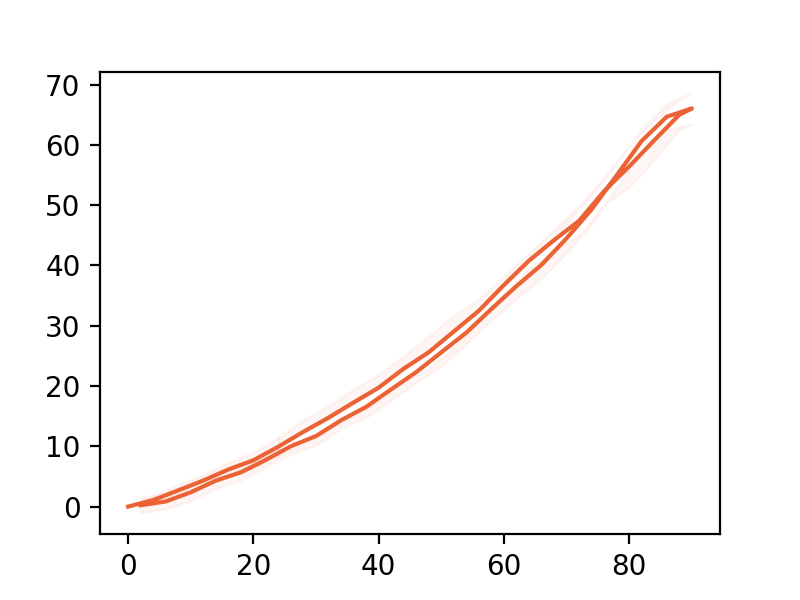

In [10]:
Strain = np.hstack((np.arange(0,90,4),np.arange(90,0,-4)))
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)

fig = plt.figure(figsize=(4,3))
plt.plot(Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:7],(C_Cycle1_mean-C_Cycle1_std)[:7],(C_Cycle1_mean+C_Cycle1_std)[:7],color=ourred,alpha=0.05)
plt.fill_between(Strain[6:],(C_Cycle1_mean-C_Cycle1_std)[6:],(C_Cycle1_mean+C_Cycle1_std)[6:],color=ourred,alpha=0.05)

# plt.plot(Strain,C_Cycle50_mean,color=ourgreen,label="50th")
# plt.fill_between(Strain[:7],(C_Cycle50_mean-C_Cycle50_std)[:7],(C_Cycle50_mean+C_Cycle50_std)[:7],color=ourgreen,alpha=0.05)
# plt.fill_between(Strain[6:],(C_Cycle50_mean-C_Cycle50_std)[6:],(C_Cycle50_mean+C_Cycle50_std)[6:],color=ourgreen,alpha=0.05)

# plt.plot(Strain,C_Cycle99_mean,color=ourblue,label="99th")
# plt.fill_between(Strain[:7],(C_Cycle99_mean-C_Cycle99_std)[:7],(C_Cycle99_mean+C_Cycle99_std)[:7],color=ourblue,alpha=0.05)
# plt.fill_between(Strain[6:],(C_Cycle99_mean-C_Cycle99_std)[6:],(C_Cycle99_mean+C_Cycle99_std)[6:],color=ourblue,alpha=0.05)

# plt.xlim([0,90])
# plt.ylim([0,80])
# plt.xticks([0,45,90],font="Arial",fontsize=fontsize)
# plt.yticks([0,40,80],font="Arial",fontsize=fontsize)
# plt.xlabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
# plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
# plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
# plt.subplots_adjust(0.2,0.22,0.95,0.96)
# plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_New.png",dpi=600,transparent=True)
# plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_New.svg",dpi=600,transparent=True)

In [ ]:
Strain = np.hstack((np.arange(0,90,4),np.arange(90,0,-4)))
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)

fig = plt.figure(figsize=(3.5,3.5))
plt.plot(Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:7],(C_Cycle1_mean-C_Cycle1_std)[:7],(C_Cycle1_mean+C_Cycle1_std)[:7],color=ourred,alpha=0.05)
plt.fill_between(Strain[6:],(C_Cycle1_mean-C_Cycle1_std)[6:],(C_Cycle1_mean+C_Cycle1_std)[6:],color=ourred,alpha=0.05)

plt.plot(Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(Strain[:7],(C_Cycle50_mean-C_Cycle50_std)[:7],(C_Cycle50_mean+C_Cycle50_std)[:7],color=ourgreen,alpha=0.05)
plt.fill_between(Strain[6:],(C_Cycle50_mean-C_Cycle50_std)[6:],(C_Cycle50_mean+C_Cycle50_std)[6:],color=ourgreen,alpha=0.05)

plt.plot(Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(Strain[:7],(C_Cycle99_mean-C_Cycle99_std)[:7],(C_Cycle99_mean+C_Cycle99_std)[:7],color=ourblue,alpha=0.05)
plt.fill_between(Strain[6:],(C_Cycle99_mean-C_Cycle99_std)[6:],(C_Cycle99_mean+C_Cycle99_std)[6:],color=ourblue,alpha=0.05)

plt.xlim([0,90])
plt.ylim([0,80])
plt.xticks([0,45,90],font="Arial",fontsize=fontsize)
plt.yticks([0,40,80],font="Arial",fontsize=fontsize)
plt.xlabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.22,0.2,0.92,0.96)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_NewV2.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_NewV2.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = np.vstack((LCR[:54],LCR[67:10000]))
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 32
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-8:i+8,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID42 2024-01-27 18-02-05 0.csv"
C1_Low, C1_High, C1 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 20
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-8:i+8,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID43 2024-01-27 17-42-06 0.csv"
C2_Low, C2_High, C2 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 14
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-8:i+8,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID50 2024-01-27 16-57-16 0.csv"
C3_Low, C3_High, C3 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 14
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-8:i+8,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID51 2024-01-27 16-38-26 0.csv"
C4_Low, C4_High, C4 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 31
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-8:i+8,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/V2/00_LCR_FixEndBending_200Cycles_0-90_SampleID52 2024-01-27 16-19-32 0.csv"
C5_Low, C5_High, C5 = find_low_high_C(csv_file)

fig = plt.figure(figsize=(10,5))
plt.plot(C5[:,0], C5[:,1]*1e12)
plt.plot(C5_Low[:,0],C5_Low[:,1]*1e12)
plt.plot(C5_High[:,0],C5_High[:,1]*1e12)
plt.ylim(90,200)

In [ ]:
C_Low_All = np.zeros((101,5))
C_High_All = np.zeros((100,5))

C_Low_All[:,0] = (C1_Low[:,1]/C1_Low[0,1]-1)*100
C_High_All[:,0] = (C1_High[:,1]/C1_Low[0,1]-1)*100
C_Low_All[:,1] = (C2_Low[:,1]/C2_Low[0,1]-1)*100
C_High_All[:,1] = (C2_High[:,1]/C2_Low[0,1]-1)*100
C_Low_All[:,2] = (C3_Low[:,1]/C3_Low[0,1]-1)*100
C_High_All[:,2] = (C3_High[:,1]/C3_Low[0,1]-1)*100
C_Low_All[:,3] = (C4_Low[:,1]/C4_Low[0,1]-1)*100
C_High_All[:,3] = (C4_High[:,1]/C4_Low[0,1]-1)*100
C_Low_All[:,4] = (C5_Low[:,1]/C5_Low[0,1]-1)*100
C_High_All[:,4] = (C5_High[:,1]/C5_Low[0,1]-1)*100

In [ ]:
Low_mean = np.mean(C_Low_All,axis=1)
Low_std = np.std(C_Low_All,axis=1)
High_mean = np.mean(C_High_All,axis=1)
High_std = np.std(C_High_All,axis=1)
fig = plt.figure(figsize=(4,3))
plt.plot(np.arange(0,101,1),Low_mean,color=ourred,label="0$^\circ$")
plt.fill_between(np.arange(0,101,1),Low_mean-Low_std,Low_mean+Low_std,color=ourred,alpha=0.5)
plt.plot(np.arange(0,100,1),High_mean,color=ourgreen,label="90$^\circ$")
plt.fill_between(np.arange(0,100,1),High_mean-High_std,High_mean+High_std,color=ourgreen,alpha=0.5)
plt.xlim([0,100])
plt.ylim([0,80])
plt.xticks([0,50,100],font="Arial",fontsize=fontsize)
plt.yticks([0,40,80],font="Arial",fontsize=fontsize)
plt.xlabel("Cycles",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="center",fontsize=fontsize*0.9,handlelength=1,framealpha=0)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/BendingCycles100New.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/BendingCycles100New.svg",dpi=600,transparent=True)

#### V1

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    return data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID1 2023-11-28 16-47-37 0.csv"
C = find_low_high_C(csv_file)
C1_Cycle1 = C[21:34]
C1_Cycle50 = C[725:738]
C1_Cycle99 = C[1453:1466]

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID21 2023-11-28 17-01-54 0.csv"
C = find_low_high_C(csv_file)
C2_Cycle1 = C[16:29]
C2_Cycle50 = C[845:858]
C2_Cycle99 = C[858+682:858+695]

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID23 2023-11-28 17-17-14 0.csv"
C = find_low_high_C(csv_file)
C3_Cycle1 = C[30:43]
C3_Cycle50 = C[972:985]
C3_Cycle99 = C[985+926:985+939]

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID26 2023-11-28 17-40-06 0.csv"
C = find_low_high_C(csv_file)
C4_Cycle1 = C[66:79]
C4_Cycle50 = C[1008:1021]
C4_Cycle99 = C[1021+908:1021+921]

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID32 2023-11-28 17-54-49 0.csv"
C = find_low_high_C(csv_file)
C5_Cycle1 = C[21:34]
C5_Cycle50 = C[951:964]
C5_Cycle99 = C[963+914:963+927]

# Strain = np.hstack((np.arange(4,-94,-98/6),np.arange(-94,5,98/6)))
# fig = plt.figure(figsize=(20,5))
# # plt.plot(C[963:,1])
# plt.plot(-Strain,C5_Cycle1[:,1])
# plt.plot(-Strain,C5_Cycle50[:,1])
# plt.plot(-Strain,C5_Cycle99[:,1])

C_Cycle1 = np.zeros((13,2,5))
C_Cycle1[:,:,0] = C1_Cycle1
C_Cycle1[:,:,1] = C2_Cycle1
C_Cycle1[:,:,2] = C3_Cycle1
C_Cycle1[:,:,3] = C4_Cycle1
C_Cycle1[:,:,4] = C5_Cycle1

C_Cycle50 = np.zeros((13,2,5))
C_Cycle50[:,:,0] = C1_Cycle50
C_Cycle50[:,:,1] = C2_Cycle50
C_Cycle50[:,:,2] = C3_Cycle50
C_Cycle50[:,:,3] = C4_Cycle50
C_Cycle50[:,:,4] = C5_Cycle50

C_Cycle99 = np.zeros((13,2,5))
C_Cycle99[:,:,0] = C1_Cycle99
C_Cycle99[:,:,1] = C2_Cycle99
C_Cycle99[:,:,2] = C3_Cycle99
C_Cycle99[:,:,3] = C4_Cycle99
C_Cycle99[:,:,4] = C5_Cycle99

In [ ]:
Strain = np.hstack((np.arange(4,-94,-98/6),np.arange(-94,5,98/6)))
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)

fig = plt.figure(figsize=(4,3))
plt.plot(-Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(-Strain[:7],(C_Cycle1_mean-C_Cycle1_std)[:7],(C_Cycle1_mean+C_Cycle1_std)[:7],color=ourred,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle1_mean-C_Cycle1_std)[6:],(C_Cycle1_mean+C_Cycle1_std)[6:],color=ourred,alpha=0.05)

plt.plot(-Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(-Strain[:7],(C_Cycle50_mean-C_Cycle50_std)[:7],(C_Cycle50_mean+C_Cycle50_std)[:7],color=ourgreen,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle50_mean-C_Cycle50_std)[6:],(C_Cycle50_mean+C_Cycle50_std)[6:],color=ourgreen,alpha=0.05)

plt.plot(-Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(-Strain[:7],(C_Cycle99_mean-C_Cycle99_std)[:7],(C_Cycle99_mean+C_Cycle99_std)[:7],color=ourblue,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle99_mean-C_Cycle99_std)[6:],(C_Cycle99_mean+C_Cycle99_std)[6:],color=ourblue,alpha=0.05)

plt.xlim([-4,94])
plt.ylim([0,50])
plt.xticks([0,45,90],font="Arial",fontsize=fontsize)
plt.yticks([0,25,50],font="Arial",fontsize=fontsize)
plt.xlabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain.svg",dpi=600,transparent=True)

In [ ]:
Strain = np.hstack((np.arange(4,-94,-98/6),np.arange(-94,5,98/6)))
C_Cycle1_mean = np.mean(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_mean = np.mean(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_mean = np.mean(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle1_std = np.std(C_Cycle1[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle50_std = np.std(C_Cycle50[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)
C_Cycle99_std = np.std(C_Cycle99[:,1,:]/C_Cycle1[0,1,:]*100-100,axis=1)

fig = plt.figure(figsize=(3.5,3.5))
plt.plot(-Strain,C_Cycle1_mean,color=ourred,label="1st")
plt.fill_between(-Strain[:7],(C_Cycle1_mean-C_Cycle1_std)[:7],(C_Cycle1_mean+C_Cycle1_std)[:7],color=ourred,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle1_mean-C_Cycle1_std)[6:],(C_Cycle1_mean+C_Cycle1_std)[6:],color=ourred,alpha=0.05)

plt.plot(-Strain,C_Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(-Strain[:7],(C_Cycle50_mean-C_Cycle50_std)[:7],(C_Cycle50_mean+C_Cycle50_std)[:7],color=ourgreen,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle50_mean-C_Cycle50_std)[6:],(C_Cycle50_mean+C_Cycle50_std)[6:],color=ourgreen,alpha=0.05)

plt.plot(-Strain,C_Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(-Strain[:7],(C_Cycle99_mean-C_Cycle99_std)[:7],(C_Cycle99_mean+C_Cycle99_std)[:7],color=ourblue,alpha=0.05)
plt.fill_between(-Strain[6:],(C_Cycle99_mean-C_Cycle99_std)[6:],(C_Cycle99_mean+C_Cycle99_std)[6:],color=ourblue,alpha=0.05)

plt.xlim([-4,94])
plt.ylim([0,50])
plt.xticks([0,45,90],font="Arial",fontsize=fontsize)
plt.yticks([0,25,50],font="Arial",fontsize=fontsize)
plt.xlabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.22,0.2,0.92,0.96)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_V2.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/FixendBending200Wash_C_Strain_V2.svg",dpi=600,transparent=True)

In [ ]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR[:1600]
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 19
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-3:i+3,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID1 2023-11-28 16-47-37 0.csv"
C1_Low, C1_High, C1 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = np.vstack((LCR[:86],LCR[147:530],LCR[602:]))
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 2
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-3:i+3,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if i>20 and data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-3:i+3,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID21 2023-11-28 17-01-54 0.csv"
C2_Low, C2_High, C2 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 21
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-5:i+5,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if i>25 and data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-6:i+6,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID23 2023-11-28 17-17-14 0.csv"
C3_Low, C3_High, C3 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 50
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-5:i+5,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if i>70 and data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-6:i+6,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID26 2023-11-28 17-40-06 0.csv"
C4_Low, C4_High, C4 = find_low_high_C(csv_file)

def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    C_Low = np.zeros((101,2))
    C_High = np.zeros((100,2))
    C_Low[0] = data[0]
    count_Low = 1
    count_High = 0
    index = 19
    C_Low[0] = data[index]
    for i in range(index,data.shape[0]-2,1):
        if data[i,1]-data[i-1,1]<0 and data[i+1,1]-data[i,1]>=0 and data[i,1] == np.min(data[i-5:i+5,1]):
            if abs(C_Low[count_Low-1,0]-data[i,0])>2 and count_Low<101:
                C_Low[count_Low] = data[i]
                count_Low += 1
        if i>20 and data[i,1]-data[i-1,1]>0 and data[i+1,1]-data[i,1]<=0 and data[i,1] == np.max(data[i-6:i+6,1]) and count_High<100:
            if count_High<=100:
                C_High[count_High] = data[i]
                count_High += 1
    return C_Low,C_High,data

csv_file = "Data/SensorCharacterization/Exp0204/00_LCR_FixEndBending_200Cycles_-4-94_SampleID32 2023-11-28 17-54-49 0.csv"
C5_Low, C5_High, C5 = find_low_high_C(csv_file)

fig = plt.figure(figsize=(16,5))
plt.plot(C5[:,0], C5[:,1]*1e12)
plt.plot(C5_Low[:,0],C5_Low[:,1]*1e12)
plt.plot(C5_High[:,0],C5_High[:,1]*1e12)
plt.ylim(90,150)

In [ ]:
C_Low_All = np.zeros((101,5))
C_High_All = np.zeros((100,5))

C_Low_All[:,0] = (C1_Low[:,1]/C1_Low[0,1]-1)*100
C_High_All[:,0] = (C1_High[:,1]/C1_Low[0,1]-1)*100
C_Low_All[:,1] = (C2_Low[:,1]/C2_Low[0,1]-1)*100
C_High_All[:,1] = (C2_High[:,1]/C2_Low[0,1]-1)*100
C_Low_All[:,2] = (C3_Low[:,1]/C3_Low[0,1]-1)*100
C_High_All[:,2] = (C3_High[:,1]/C3_Low[0,1]-1)*100
C_Low_All[:,3] = (C4_Low[:,1]/C4_Low[0,1]-1)*100
C_High_All[:,3] = (C4_High[:,1]/C4_Low[0,1]-1)*100
C_Low_All[:,4] = (C5_Low[:,1]/C5_Low[0,1]-1)*100
C_High_All[:,4] = (C5_High[:,1]/C5_Low[0,1]-1)*100


In [ ]:
Low_mean = np.mean(C_Low_All,axis=1)
Low_std = np.std(C_Low_All,axis=1)
High_mean = np.mean(C_High_All,axis=1)
High_std = np.std(C_High_All,axis=1)
fig = plt.figure(figsize=(4,3))
plt.plot(np.arange(0,101,1),Low_mean,color=ourred,label="0% Strain")
plt.fill_between(np.arange(0,101,1),Low_mean-Low_std,Low_mean+Low_std,color=ourred,alpha=0.5)
plt.plot(np.arange(0,100,1),High_mean,color=ourgreen,label="50% Strain")
plt.fill_between(np.arange(0,100,1),High_mean-High_std,High_mean+High_std,color=ourgreen,alpha=0.5)
plt.xlim([0,100])
plt.ylim([-5,50])
plt.xticks([0,50,100],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,20,40],font="Arial",fontsize=fontsize)
plt.xlabel("Cycles",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="center",fontsize=fontsize*0.9,handlelength=1,framealpha=0)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
plt.savefig("../00_Finalization/Figure/BendingCycles100.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/BendingCycles100.svg",dpi=600,transparent=True)

## Exp 02-05: Free Ends Bending (C0 = 103 +1 pF)

- Sample Index: [ID12, ID19, ID22, ID28, ID34], (ID 22 broken; replacement with ID18 102.3 pF)
- After 100 Cycles + Wash Length [mm]:
- After 100 Cycles + Wash Capacitance [pF]:

### Data Collection

In [ ]:
port = pypot.dynamixel.get_available_ports()
motor = pypot.dynamixel.DxlIO(port[0],57600,use_sync_read=False)

In [ ]:
motor.set_goal_position_speed_load({1:(-4,60,100)})

In [ ]:
def bending_cycle(cycle,start,end):
    while True:
        goal = start
        if goal<=140.0 and goal>=-10:
            motor.set_goal_position_speed_load({1:(goal,60,100)})
        time.sleep(0.2)
        current_position = motor.get_present_position([1])[0]
        time.sleep(0.2)
        if abs(current_position - goal)<1:
            break;
    
    for i in range(cycle):
        while True:
            goal = end
            if goal<=140.0 and goal>=-10:
                motor.set_goal_position_speed_load({1:(goal,60,100)})
            time.sleep(0.2)
            current_position = motor.get_present_position([1])[0]
            time.sleep(0.1)
            if current_position>90:
                time.sleep(0.1)
                break;
            else: 
                goal += 0.5
                motor.set_goal_position_speed_load({1:(goal,60,100)})
    
        while True:
            goal = start
            if goal<=140.0 and goal>=-10:
                motor.set_goal_position_speed_load({1:(goal,60,100)})
            time.sleep(0.2)
            current_position = motor.get_present_position([1])[0]
            time.sleep(0.1)
            if abs(current_position - goal)<1:
                time.sleep(0.1)
                break;
        print("Finished Cycle: "+str(i+1))

In [ ]:
bending_cycle(200,-4,94)

## Exp 02-06: Wiring Stretch Capacitance Change Test

In [3]:
file_name1 = "Data/Wire/Wire_Stretch_100Cycle_50percent_Sample1 2024-03-07 12-50-26 0.csv"
file_name2 = "Data/Wire/Wire_Stretch_100Cycle_50percent_Sample2 2024-03-07 15-06-05 0.csv"
file_name3 = "Data/Wire/Wire_Stretch_100Cycle_50percent_Sample3 2024-03-07 18-11-12 0.csv"
file_name4 = "Data/Wire/Wire_Stretch_100Cycle_50percent_Sample4 2024-03-07 20-03-59 0.csv"
file_name5 = "Data/Wire/Wire_Stretch_100Cycle_50percent_Sample5 2024-03-08 12-25-05 0.csv"

In [4]:
def find_low_high_C(csv_file):
    data = pd.read_csv(csv_file, sep=',', header=None)
    data_values = data.iloc[8:].values
    LCR = np.zeros((data_values.shape[0],2))
    LCR[:,1] = data_values[:, 1].astype(float)
    time_column = data_values[:, 0]
    LCR[:,0] = [(datetime.strptime(dt,"%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(time_column[0],"%Y-%m-%d %H:%M:%S.%f")).total_seconds() for dt in time_column]
    LCR = np.delete(LCR,np.where(LCR[:,1]>=200*1e-12),0)
    LCR = np.delete(LCR,np.where(LCR[:,1]<=20*1e-12),0)
    data = LCR
    return data

In [5]:
# !pip3 install pandas
import pandas as pd
data1 = find_low_high_C(file_name1)
data2 = find_low_high_C(file_name2)
data3 = find_low_high_C(file_name3)
data4 = find_low_high_C(file_name4)
data5 = find_low_high_C(file_name5)

/var/folders/fw/sd7j4d_57cb3dgzl5hhh375m0000gn/T/ipykernel_87093/1451993971.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file, sep=',', header=None)


In [6]:
Sensor_mean = (data1[0,1]+data2[0,1]+data3[0,1]+data4[0,1]+data5[0,1])/5.0

In [7]:
Sample5_cycle1 = data5[101:377,1]#144
Sample5_cycle50 = data5[15046:15279,1]
Sample5_cycle99 = data5[29982:30212,1]

Sample4_cycle1 = data4[80:362,1]#146
Sample4_cycle50 = data4[15037:15264,1]
Sample4_cycle99 = data4[29949:30193,1]

Sample3_cycle1 = data3[71:355,1]#153
Sample3_cycle50 = data3[15045:15288,1]
Sample3_cycle99 = data3[29984:30219,1]

Sample2_cycle1 = data2[100:375,1]#141
Sample2_cycle50 = data2[15039:15260,1]
Sample2_cycle99 = data2[29960:30173,1]

Sample1_cycle1 = data1[91:366,1]#145
Sample1_cycle50 = data1[14884:15118,1]
Sample1_cycle99 = data1[29908:30133,1]

In [8]:
def centerization(data):
    index = np.argmax(data)
    return(data[index-70:index+71])

In [9]:
Sample5_cycle1 = centerization(data5[101:377,1])
Sample5_cycle50 = centerization(data5[15046:15279,1])
Sample5_cycle99 = centerization(data5[29982:30212,1])

Sample4_cycle1 = centerization(data4[80:362,1])
Sample4_cycle50 = centerization(data4[15037:15264,1])
Sample4_cycle99 = centerization(data4[29949:30193,1])

Sample3_cycle1 = centerization(data3[71:355,1])
Sample3_cycle50 = centerization(data3[15045:15288,1])
Sample3_cycle99 = centerization(data3[29984:30219,1])

Sample2_cycle1 = centerization(data2[100:375,1])
Sample2_cycle50 = centerization(data2[15039:15260,1])
Sample2_cycle99 = centerization(data2[29960:30173,1])

Sample1_cycle1 = centerization(data1[91:366,1])
Sample1_cycle50 = centerization(data1[14884:15118,1])
Sample1_cycle99 = centerization(data1[29908:30133,1])

Cycle1 = np.zeros((141,5))
Cycle50 = np.zeros((141,5))
Cycle99 = np.zeros((141,5))

Cycle1[:,0] = Sample1_cycle1
Cycle1[:,1] = Sample2_cycle1
Cycle1[:,2] = Sample3_cycle1
Cycle1[:,3] = Sample4_cycle1
Cycle1[:,4] = Sample5_cycle1

Cycle50[:,0] = Sample1_cycle50
Cycle50[:,1] = Sample2_cycle50
Cycle50[:,2] = Sample3_cycle50
Cycle50[:,3] = Sample4_cycle50
Cycle50[:,4] = Sample5_cycle50

Cycle99[:,0] = Sample1_cycle99
Cycle99[:,1] = Sample2_cycle99
Cycle99[:,2] = Sample3_cycle99
Cycle99[:,3] = Sample4_cycle99
Cycle99[:,4] = Sample5_cycle99

<IPython.core.display.Javascript object>


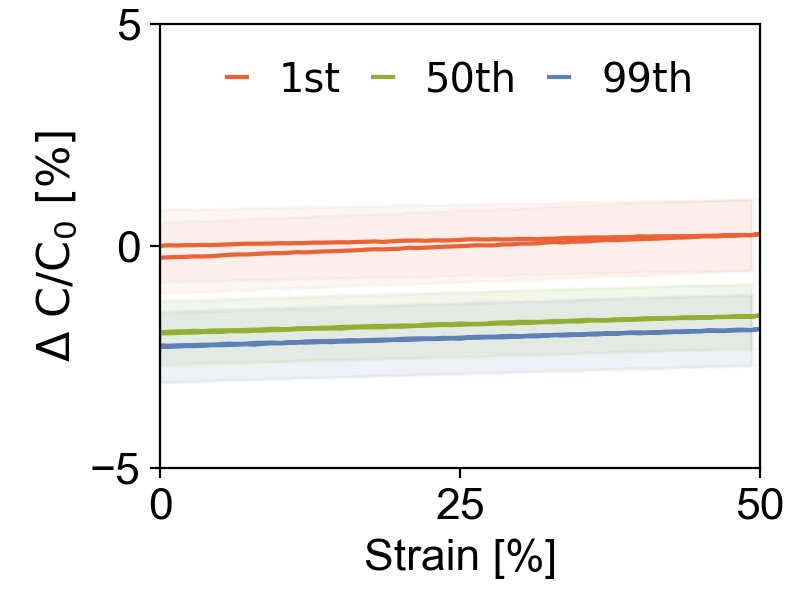

In [10]:
C_Base = Sensor_mean
x1 = np.arange(0,50+50/70,50/70)
x2 = np.arange(50-50/70,-50/70,-50/70)
Strain = np.hstack((x1,x2))
Cycle1_mean = np.mean(Cycle1/C_Base*100-100,axis=1)
Cycle50_mean = np.mean(Cycle50/C_Base*100-100,axis=1)
Cycle99_mean = np.mean(Cycle99/C_Base*100-100,axis=1)
Cycle1_std = np.std(Cycle1/C_Base*100-100,axis=1)
Cycle50_std = np.std(Cycle50/C_Base*100-100,axis=1)
Cycle99_std = np.std(Cycle99/C_Base*100-100,axis=1)

fig = plt.figure(figsize=(4,3))
plt.plot(Strain,Cycle1_mean,color=ourred,label="1st")
plt.fill_between(Strain[:72],(Cycle1_mean-Cycle1_std)[:72],(Cycle1_mean+Cycle1_std)[:72],color=ourred,alpha=0.05)
plt.fill_between(Strain[71:],(Cycle1_mean-Cycle1_std)[71:],(Cycle1_mean+Cycle1_std)[71:],color=ourred,alpha=0.05)

plt.plot(Strain,Cycle50_mean,color=ourgreen,label="50th")
plt.fill_between(Strain[:72],(Cycle50_mean-Cycle50_std)[:72],(Cycle50_mean+Cycle50_std)[:72],color=ourgreen,alpha=0.05)
plt.fill_between(Strain[71:],(Cycle50_mean-Cycle50_std)[71:],(Cycle50_mean+Cycle50_std)[71:],color=ourgreen,alpha=0.05)

plt.plot(Strain,Cycle99_mean,color=ourblue,label="99th")
plt.fill_between(Strain[:72],(Cycle99_mean-Cycle1_std)[:72],(Cycle99_mean+Cycle99_std)[:72],color=ourblue,alpha=0.05)
plt.fill_between(Strain[71:],(Cycle99_mean-Cycle1_std)[71:],(Cycle99_mean+Cycle99_std)[71:],color=ourblue,alpha=0.05)

plt.xlim([0,50])
plt.ylim([-5,5])
plt.xticks([0,25,50],font="Arial",fontsize=fontsize)
plt.yticks([-5,0,5],font="Arial",fontsize=fontsize)
plt.xlabel("Strain [%]",font="Arial",fontsize=fontsize)
plt.ylabel(r"$\Delta$ C/C$_0$ [%]",fontsize=fontsize)
plt.legend(loc="upper center",ncol=3, fontsize=fontsize*0.9,handlelength=0.5,framealpha=0,columnspacing=0.8,labelspacing=0.5)
plt.subplots_adjust(0.2,0.22,0.95,0.96)
# plt.savefig("../00_Finalization/Figure/WireStretch_C_Strain_New.png",dpi=600,transparent=True)
# plt.savefig("../00_Finalization/Figure/WireStretch_C_Strain_New.svg",dpi=600,transparent=True)

# Experiment 03: Optimal Placement

- Out of Manufacturing

    - Designed [mm] /Manufactured [mm]
    - Length: 160/158
    - Width:  10/10
    - C0 (01-52):  [ID01:101.6, ID02:102.6, ID03:102.6, ID04:102.7, ID05:102.5, ID06: 99.4, ID07: 99.9, ID08: 99.9, ID09:102.6, ID10:102.3,
                ID11: 97.9, ID12: 98.0, ID13: 97.1, ID14: 97.5, ID15: 96.9, ID16: 96.3, ID17: 97.2, ID18: 99.0, ID19:100.6, ID20: 99.8,
                ID21: 97.6, ID22: 99.0, ID23: 96.6, ID24: 99.6, ID25: 96.7, ID26: 98.9, ID27: 97.9, ID28: 97.3, ID29: 96.9, ID30: 97.3,
                ID31: 97.7, ID32: 96.7, ID33:100.4, ID34: 98.3, ID35: 97.8, ID36: 97.5, ID37: 97.4, ID38:100.0, ID39:100.9, ID40:102.4,
                ID41:100.7, ID42:102.2, ID43: 97.1, ID44: 98.9, ID45:100.2, ID46:100.0, 
                ID47:101.0, ID48:102.3, ID49:101.9, ID50:102.1, ID51: 99.7, ID52:101.3]
                
- After Stretch (5 mm/s, 80 mm, 100 Cycles)
    - Length [mm]:166,168,170,171,173,172,171,170,170,167,
                  172,172,173,174,175,175,175,174,175,170,
                  169,170,172,172,172,172,172,173,171,168,
                  171,172,175,175,174,173,173,175,175,172,
                  170,172,170,173,173,173,
                  173,172,173,172,172,174
    - Thickness [mm]: 2.51,2.47,2.39,2.41,2.36,2.39,2.39,2.43,2.38,2.45,
                  2.47,2.50,2.49,2.45,2.52,2.50,2.52,2.48,2.52,2.52,
                  2.54,2.46,2.49,2.42,2.54,2.46,2.47,2.46,2.57,2.49,
                  2.45,2.46,2.52,2.46,2.49,2.49,2.56,2.48,2.46,2.41,
                  2.44,2.45,2.61,2.47,2.43,2.46,
                  2.40,2.43,2.41,2.40,2.44,2.46
    - C0' (01-52) [pF]: 104.2,106.6,108.1,108.1,109.4,105.0,105.4,107.1,106.9,104.0,
                        105.5,105.0,104.4,105.3,105.4,104.1,105.7,107.1,109.4,109.2,
                        102.1,105.2,103.4,106.6,103.3,105.8,104.2,104.6,102.8,102.6,
                        104.3,103.4,108.4,106.7,104.6,103.9,104.0,107.7,107.2,107.9,
                        106.1,109.0,103.6,105.5,106.9,107.4,
                        105.3,107.4,108.3,107.3,105.6,107.4
                        
- After Washing (DI Water 1000 mL, TextCure 3 mL, 30 min, 30 min, 25 C; DI Water 1000 mL, 1 h 25 C; Oven 55 C 24 h)
    - Length [mm]: 161
    - Thickness [mm]:
    - C0'' (01-52) [pF]: [103.6, 104.7, 105.2, 104.4, 105.0, 101.8, 102.1, 101.7, 104.1, 102.8,
                          100.7, 101.0, 100.0, 100.6,  99.9,  98.8, 100.3, 101.8, 103.9, 102.9,
                          100.7, 102.7, 100.5, 103.1, 100.1, 102.4, 101.4, 100.9, 100.1, 100.1,
                          100.7,  99.5, 103.5, 101.8, 100.4, 100.4, 100.1, 103.1, 104.0, 105.6, 
                          101.8, 103.7,  98.6, 100.4, 101.6, 101.6,
                          100.2, 103.0, 103.1, 103.0, 100.5, 101.9]
    
    
- Wire: 4 mm Width[70% Power, 100% Speed, 1000 DPI,0.01" Thickness]

## Joint Range

In [ ]:
#--smplx joints
# 00 - Global
# 01 - L_Thigh
# 02 - R_Thigh
# 03 - Spine
# 04 - L_Calf
# 05 - R_Calf
# 06 - Spine1
# 07 - L_Foot
# 08 - R_Foot
# 09 - Spine2
# 10 - L_Toes
# 11 - R_Toes
# 12 - Neck
# 13 - L_Shoulder
# 14 - R_Shoulder
# 15 - Head
# 16 - L_UpperArm
# 17 - R_UpperArm
# 18 - L_ForeArm
# 19 - R_ForeArm
# 20 - L_Hand
# 21 - R_Hand
# 22 - Jaw
# 23 - L_Eye
# 24 - R_Eye

In [ ]:
data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,4,:]
fig = plt.figure(figsize=(3.5,2.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-10, 100]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-40, 20]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-15, 5]")
plt.xlim(-40,100)
plt.xticks([-40,0,100],font="Arial",fontsize=fontsize)
plt.ylim([0,110000])
plt.yticks([0,110000],[0,"11K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Left Knee Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.3,0.4],ncol=1, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.7,framealpha=0,columnspacing=0.8,labelspacing=0.5)

plt.subplots_adjust(0.2,0.25,0.94,0.96)
plt.savefig("../00_Finalization/Figure/Knee_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/Knee_angle.svg",dpi=600,transparent=True)

In [ ]:
data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,4,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-10, 100]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-40, 20]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-15, 5]")
plt.xlim(-50,120)
plt.xticks([-50,0,120],font="Arial",fontsize=fontsize)
plt.ylim([0,110000])
plt.yticks([0,110000],[0,"11K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Left Knee Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.4,-0.05],ncol=1, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.7,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/LeftKnee_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/LeftKnee_angle.svg",dpi=600,transparent=True)

data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,5,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-10, 110]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-20, 25]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-5, 15]")
plt.xlim(-50,120)
plt.xticks([-50,0,120],font="Arial",fontsize=fontsize)
plt.ylim([0,110000])
plt.yticks([0,110000],[0,"11K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Right Knee Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.4,-0.05],ncol=1, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.7,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/RightKnee_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/RightKnee_angle.svg",dpi=600,transparent=True)

In [ ]:
data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,1,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-70, 35]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-20, 20]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-10, 30]")
plt.xlim(-80,40)
plt.xticks([-80,0,40],font="Arial",fontsize=fontsize)
plt.ylim([0,110000])
plt.yticks([0,110000],[0,"11K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Left Thigh Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.0,-0.05],ncol=1, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.7,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/LeftThigh_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/LeftThigh_angle.svg",dpi=600,transparent=True)

data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,2,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-75, 35]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-20, 20]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-30, 10]")
plt.xlim(-80,40)
plt.xticks([-80,0,40],font="Arial",fontsize=fontsize)
plt.ylim([0,110000])
plt.yticks([0,110000],[0,"11K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Right Thigh Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.0,-0.05],ncol=1, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.7,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/RightThigh_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/RightThigh_angle.svg",dpi=600,transparent=True)

In [ ]:
data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,18,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-50, 150]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-90, 5]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-20, 150]")
plt.xlim(-160,160)
plt.xticks([-160,0,160],font="Arial",fontsize=fontsize)
plt.ylim([0,60000])
plt.yticks([0,60000],[0,"6K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Left Elbow Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[-0.01,-0.05],ncol=1, handletextpad=0.1,fontsize=fontsize*1,handlelength=0.4,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/LeftElbow_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/LeftElbow_angle.svg",dpi=600,transparent=True)

data = np.load("Data/OptimalPlacement/amass_KIT_euler_poses.npy")[:,19,:]
fig = plt.figure(figsize=(4,1.5))
plt.hist(data[:,0],bins=2000,color=ourred,alpha=0.6,label="X [-50,150]")
plt.hist(data[:,1],bins=2000,color=ourgreen,alpha=0.6,label="Y [-5,90]")
plt.hist(data[:,2],bins=2000,color=ourblue,alpha=0.6,label="Z [-150,20]")
plt.xlim(-160,160)
plt.xticks([-160,0,160],font="Arial",fontsize=fontsize)
plt.ylim([0,60000])
plt.yticks([0,60000],[0,"6K"],font="Arial",fontsize=fontsize,rotation=90)
plt.xlabel("Right Elbow Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.ylabel("Samples",font="Arial",fontsize=fontsize)
plt.legend(loc=[-0.01,-0.05],ncol=1, handletextpad=0.1,fontsize=fontsize*1,handlelength=0.4,framealpha=0,columnspacing=0.8,labelspacing=0.2)

plt.subplots_adjust(0.2,0.4,0.94,0.96)
plt.savefig("../00_Finalization/Figure/RightElbow_angle.png",dpi=600,transparent=True)
plt.savefig("../00_Finalization/Figure/RightElbow_angle.svg",dpi=600,transparent=True)

## Weight
- Raw Suit: 258.7 g
- iSuit: 566.3 g
- DAQ: 87 g (66 mm x 42 mm x 28 mm)

- 38 Channel Sensors.

In [ ]:
C = [101.6, 102.6, 102.6, 102.7, 102.5, 99.4, 99.9, 99.9, 102.6, 102.3, 97.9, 98.0, 97.1, 97.5, 96.9, 96.3, 97.2, 99.0, 100.6, 99.8, 
      97.6,  99.0,  96.6,  99.6,  96.7, 98.9, 97.9, 97.3,  96.9,  97.3, 97.7, 96.7,100.4, 98.3, 97.8, 97.5, 97.4,100.0, 100.9,102.4, 
     100.7, 102.2,  97.1,  98.9, 100.2,100.0,101.0,102.3, 101.9, 102.1, 99.7,101.3]
np.mean(C),np.std(C/np.mean(C))

# Experiment 04: Short Term (10 min) Accuracy Evaluation 

- tactile sensor data
- mocap data: marker position, joint angle (joint angle to Yao) 
    - goal: tactile sensor data -> (joint angle) -> SMPL
- optional: video

## Data Collection

In [ ]:
# Create a circle
for text in ["Right Elbow","Right Shoulder","Upper Back","Lower Back","Torso","Right Thigh","Right Knee"]:
    fig, ax = plt.subplots(figsize=(1.22,1.22))
    circle = plt.Circle((0.6, 0.6), 0.6, fill=False,color=ourred,linewidth=2)
    ax.add_artist(circle)

    # Generate curved text
#     text = "Right Elbow"
    radius = 0.48
    angle = np.linspace(-np.pi, 0, len(text)+2)[1:-1]
    x = 0.6 + radius * np.cos(angle)
    y = 0.6 + radius * np.sin(angle)
    for i, (x_i, y_i, char) in enumerate(zip(x, y, text)):
        ax.text(x_i, y_i, char, ha='center', va='center', rotation=(np.rad2deg(angle[i]) + 90), fontsize=14,color=ourred)

    # Set aspect ratio to equal and hide axes
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.xlim([-0.015,1.215])
    plt.ylim([-0.015,1.215])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure3A_"+text+".png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure3A_"+text+".svg",dpi=600,transparent=True)

In [ ]:
filename = "Exp0903" # to modify

import numpy as np
import threading
import Adafruit_BluefruitLE
from Adafruit_BluefruitLE.services import UART
import time
import sys
import matplotlib.pyplot as plt
import cv2
%matplotlib notebook

t_time = time.time()
def main():
    data = np.zeros(39)
    data_all = np.zeros((500,40))
    count = 0
    file_count = 0
    ble.clear_cached_data()
    adapter = ble.get_default_adapter()
    adapter.power_on()
    UART.disconnect_devices()
    try:
        adapter.start_scan()
        device = UART.find_device()
        if device is None:
            raise RuntimeError('Failed to find UART device!')
    finally:
        adapter.stop_scan()
    print(device)
    device.connect()
    
    try:
        UART.discover(device)
        uart = UART(device)
        start_time = time.time()
        while True:
            received = uart.read(timeout_sec=0.000001)
            if received != None and b'><' in received:
                break
        while True:
            data_all[count,0] = time.time()-start_time*0.0
            data_buffer = received
            while True:
                received = uart.read(timeout_sec=0.000001)
                if received != None:
                    if b'><' in received:
                        data_buffer += received
                        break
                    else: 
                        data_buffer += received
            for i in range(39):
                data[i] = int.from_bytes(data_buffer[data_buffer.index(b'><')+2+2*i:data_buffer.index(b'><')+2+2*(i+1)], "big",signed=False)
            data_all[count,1:] = data
            if count ==0:
                print(file_count)
            if count == 499:
                np.savetxt("../00_Finalization/Data/Raw/"+str(t_time)+filename+"_"+str(file_count)+"xx.txt",data_all)  
                count = 0
                file_count += 1
                print(file_count)
                print(data)
            count += 1
        
    finally:
        device.disconnect()
        
ble = Adafruit_BluefruitLE.get_provider()
ble.initialize()
ble.run_mainloop_with(main)

## Data Preprocessing

### README

- Exp0401: five times in one round, three rounds
    - Exp0401_Round01
    - Exp0401_Round02
    - Exp0401_Round03:V
- Exp0402: one time in one round with five repetitions
    - Exp0402_Round0105
    - Exp0402_Round0610
    - Exp0402_Round1115:V

- Exp0601: five times in one round, three rounds
    - Exp0601_Round01:V
    - Exp0601_Round02
    - Exp0601_Round03
- Exp0602: one time in one round with five repetitions
    - Exp0602_Round0105
    - Exp0602_Round0610
    - Exp0602_Round1115:V

- Exp0501: Gymnastics
    - Exp0501_Round01:V
    - Exp0501_Round02
    - Exp0501_Round03:V

- Exp0801: LowerBody Pattern Recognition
    - Exp080101: Walking Speed (PWS = 1.18m/s)
        - Exp080101_06PWS
        - Exp080101_08PWS
        - Exp080101_10PWS:V
        - Exp080101_12PWS
    - Exp080102: Walking SideWidth
        - Exp080101_10PWS_Wide
        - Exp080101_10PWS_Narrow
        - Exp080101_10PWS_Sway
        - Exp080101_10PWS_Rigid
    - Exp080103: Walking Slop
        - Exp080101_10PWS_S-6
        - Exp080101_10PWS_S-3
        - Exp080101_10PWS_S0
        - Exp080101_10PWS_S3
        - Exp080101_10PWS_S6
        - Exp080101_10PWS_S9

- Exp0802: UpperBody Pattern Recognition (100% = 90, Metronome in Google, Upper+Middle+Lower+Mix, Each 1 min)
    - Exp080102_06Ub
    - Exp080102_08Ub
    - Exp080102_10Ub:V
    - Exp080102_12Ub
    - Exp080102_14Ub
    
- Exp0901: Fatigue Modeling

### VVV - Exp0401_Round03

#### iSuit 100 Hz

In [ ]:
file = 0
for i in range(50):
    try:
        data = np.loadtxt("Data/UML_iSuitData/1701716032.748626Exp0401_Round03_"+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701716032.748626Exp0401_Round03_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701716032.748626Exp0401_Round03_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0401_Round03Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1],c=ourblue)
plt.plot(data_all[:,0]-data_all[:,1],c=ourgreen)
np.savetxt("Data/Processed/Exp0401_Round03Merged_TimeStampCorrected.txt",data_all)

data_all_ = np.delete(data_all,[7343,7344,7345,7346,7347,7348,7349,7350,7351],axis=0)
np.savetxt("Data/Processed/Exp0401_Round03Merged_TimeStampCorrected.txt",data_all_)

fig = plt.figure()
plt.plot(data_all_[:,2:])

time_stamp = np.arange(0,data_all_[-1,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp

for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all_[:,0],data_all_[:,2+i])
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all_.shape[0],1):
    if data_all_[i,0]-data_all_[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all_[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all_[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
# plt.plot(data_all[:,0],data_all[:,2:])
np.savetxt("Data/Processed/Exp0401_Round03Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap 100 Hz

- time, (x,y,z) ["LeftAnkle","RightAnkle",
                 "LeftKnee","RightKnee","LeftHip","RightHip",
                 "OverallTorsoAngle","LowerBack","UpperBack",
                 "LeftShoulder","RightShoulder","LeftElbow","RightElbow"]

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0404_Round03_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0401_Round03MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### VVV - Exp0402_Round1115

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701718214.312372Exp0402_Round10_15_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701718214.312372Exp0402_Round10_15_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701718214.312372Exp0402_Round10_15_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0402_Round1115Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp

for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
np.savetxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0402_Round010_15_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0402_Round1115MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### V - Exp0601_Round01

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701727955.26911Exp0601_Round01_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701727955.26911Exp0601_Round01_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701727955.26911Exp0601_Round01_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0601_Round01Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0601_Round01Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp

for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
np.savetxt("Data/Processed/Exp0601_Round01Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0601_Round01_1.txt",skiprows=8)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0601_Round01MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### V - Exp0602_Round1115

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701729931.4039521Exp0602_Round10_15_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701729931.4039521Exp0602_Round10_15_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701729931.4039521Exp0602_Round10_15_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0602_Round1115Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0602_Round1115Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
print(np.where(new_data_all[:,1:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
for i in range(12407-12395):
    new_data_all[12395+i,13] = i*(new_data_all[12407,13]-new_data_all[12395,13])/(12407-12395)+new_data_all[12395,13]
fig = plt.figure()
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp0602_Round1115Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0602_Round10_151.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0602_Round1115MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### VX - Exp0501_Round01

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701878490.498688Exp0501_Round01_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((file*500,40))
for file_count in range(file):
    data = np.loadtxt("Data/UML_iSuitData/1701878490.498688Exp0501_Round01_"+str(file_count)+"xx.txt")
    data_all[file_count*500:(file_count+1)*500]= data
np.savetxt("Data/Processed/Exp0501_Round01Merged.txt",data_all)

data = data_all[:,0] - data_all[0,0]
data_new = np.copy(data)
for i in range(1,data_new.shape[0]-1,1):
    if data[i]<data[i-1] and data[i]<data[i+1]:
        data_new[i] = (data[i-1]+data[i+1])/2.0

for i in range(1,data.shape[0]-1,1):
    if data_new[i]<data[i-1]:
        print(i)
fig = plt.figure()
plt.plot(data)
plt.plot(data_new)
data_all[:,0] = data_new
plt.plot(data_all[:,0])
data = data_all[:,1]
data_new = np.copy(data)-data[0]
for i in np.arange(500,data.shape[0],500):
    data_new[i] = (data_new[i-1]+data_new[i+1])/2.0

for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
plt.plot(data_new/1000.0)
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],40))
new_data_all[:,0] = time_stamp
new_data_all[:,1] = time_stamp
for i in range(38):
    new_data_all[:,i+2] = np.interp(time_stamp,data_all[:,1],data_all[:,2+i])
print(np.where(new_data_all[:,2:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,14] = i*(new_data_all[12407,14]-new_data_all[12395,14])/(12407-12395)+new_data_all[12395,14]
fig = plt.figure()
plt.plot(new_data_all[:,1],new_data_all[:,2:])

np.savetxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0501_Round01_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0501_Round01MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### V - Exp0501_Round03

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701879278.238486Exp0501_Round03_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((file*500,40))
for file_count in range(file):
    data = np.loadtxt("Data/UML_iSuitData/1701879278.238486Exp0501_Round03_"+str(file_count)+"xx.txt")
    data_all[file_count*500:(file_count+1)*500]= data
np.savetxt("Data/Processed/Exp0501_Round03Merged.txt",data_all)

data = data_all[:,0] - data_all[0,0]
data_new = np.copy(data)
for i in range(1,data_new.shape[0]-1,1):
    if data[i]<data[i-1] and data[i]<data[i+1]:
        data_new[i] = (data[i-1]+data[i+1])/2.0

for i in range(1,data.shape[0]-1,1):
    if data_new[i]<data[i-1]:
        print(i)
fig = plt.figure()
plt.plot(data)
plt.plot(data_new)
data_all[:,0] = data_new
plt.plot(data_all[:,0])
data = data_all[:,1]
data_new = np.copy(data)-data[0]
for i in np.arange(500,data.shape[0],500):
    data_new[i] = (data_new[i-1]+data_new[i+1])/2.0

for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
plt.plot(data_new/1000.0)
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],40))
new_data_all[:,0] = time_stamp
new_data_all[:,1] = time_stamp
for i in range(38):
    new_data_all[:,i+2] = np.interp(time_stamp,data_all[:,1],data_all[:,2+i])
print(np.where(new_data_all[:,2:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,14] = i*(new_data_all[12407,14]-new_data_all[12395,14])/(12407-12395)+new_data_all[12395,14]
fig = plt.figure()
plt.plot(new_data_all[:,1],new_data_all[:,2:])

np.savetxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0501_Round03_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0501_Round03MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### V - Exp080101_10PWS

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((file*500,40))
for file_count in range(file):
    data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(file_count)+"xx.txt")
    data_all[file_count*500:(file_count+1)*500]= data
np.savetxt("Data/Processed/Exp080101_10PWSMerged.txt",data_all)

data = data_all[:,0] - data_all[0,0]
data_new = np.copy(data)
for i in range(1,data_new.shape[0]-1,1):
    if data[i]<data[i-1] and data[i]<data[i+1]:
        data_new[i] = (data[i-1]+data[i+1])/2.0

for i in range(1,data.shape[0]-1,1):
    if data_new[i]<data[i-1]:
        print(i)
fig = plt.figure()
plt.plot(data)
plt.plot(data_new)
data_all[:,0] = data_new
plt.plot(data_all[:,0])
data = data_all[:,1]
data_new = np.copy(data)-data[0]
for i in np.arange(500,data.shape[0],500):
    data_new[i] = (data_new[i-1]+data_new[i+1])/2.0

for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
plt.plot(data_new/1000.0)
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_10PWSMerged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],40))
new_data_all[:,0] = time_stamp
new_data_all[:,1] = time_stamp
for i in range(38):
    new_data_all[:,i+2] = np.interp(time_stamp,data_all[:,1],data_all[:,2+i])
print(np.where(new_data_all[:,2:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,14] = i*(new_data_all[12407,14]-new_data_all[12395,14])/(12407-12395)+new_data_all[12395,14]
fig = plt.figure()
plt.plot(new_data_all[:,1],new_data_all[:,2:])

np.savetxt("Data/Processed/Exp080101_10PWSMerged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp080101_10PWS_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp080101_10PWSMoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

### V - Exp080102_10UB

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701892162.391298Exp080102_10Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((file*500,40))
for file_count in range(file):
    data = np.loadtxt("Data/UML_iSuitData/1701892162.391298Exp080102_10Ub_"+str(file_count)+"xx.txt")
    data_all[file_count*500:(file_count+1)*500]= data
np.savetxt("Data/Processed/Exp80102_10UbMerged.txt",data_all)

data = data_all[:,0] - data_all[0,0]
data_new = np.copy(data)
for i in range(1,data_new.shape[0]-1,1):
    if data[i]<data[i-1] and data[i]<data[i+1]:
        data_new[i] = (data[i-1]+data[i+1])/2.0

for i in range(1,data.shape[0]-1,1):
    if data_new[i]<data[i-1]:
        print(i)
fig = plt.figure()
plt.plot(data)
plt.plot(data_new)
data_all[:,0] = data_new
plt.plot(data_all[:,0])
data = data_all[:,1]
data_new = np.copy(data)-data[0]
for i in np.arange(500,data.shape[0],500):
    data_new[i] = (data_new[i-1]+data_new[i+1])/2.0

for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
plt.plot(data_new/1000.0)
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp80102_10UbMerged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],40))
new_data_all[:,0] = time_stamp
new_data_all[:,1] = time_stamp
for i in range(38):
    new_data_all[:,i+2] = np.interp(time_stamp,data_all[:,1],data_all[:,2+i])
print(np.where(new_data_all[:,2:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,14] = i*(new_data_all[12407,14]-new_data_all[12395,14])/(12407-12395)+new_data_all[12395,14]
fig = plt.figure()
plt.plot(new_data_all[:,1],new_data_all[:,2:])

np.savetxt("Data/Processed/Exp80102_10UbMerged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp080102_10UB_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp080102_10UBMoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

## Exp0401: five times in one round, three rounds

### Data Preparation (Synchronization)

#### iSuit_data_time_stamp

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0401_Round03Merged_TimeStampCorrected.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0401_Round03MoCap.txt")

In [ ]:
fig = plt.figure(figsize=(10,3))
i = 753
plt.plot(iSuit_data[i:9953,0]-iSuit_data[i,0],iSuit_data[i:9953,2:]-500,c='black')
plt.plot(MoCap_data[875:,0]-MoCap_data[875,0],MoCap_data[875:,1:])

iSuit = iSuit_data[753:9953]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[875:]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,2:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])

MoCap_new = np.zeros((iSuit.shape[0],MoCap.shape[1]))
for i in range(iSuit.shape[0]):
    index = np.argsort(abs(iSuit[i,0]-MoCap[:,0]))[0]
    MoCap_new[i] = MoCap[index]
np.savetxt("Data/Processed/Exp0401_Round03iSuit_PreparedV2.txt",iSuit)
np.savetxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt",MoCap_new)

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,2:]-500,color="black")
plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp0401_Round03Train_PreparedV2.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0401_Round03Valid_PreparedV2.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt",np.asarray([int(i) for i in test_index]))

#### MoCap_data_time_stamp

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0401_Round03Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0401_Round03MoCap.txt")

In [ ]:
fig = plt.figure(figsize=(10,3))
i = 2930
plt.plot(iSuit_data[i:i+38700,0]-iSuit_data[i,0],iSuit_data[i:i+38700,2:]-500,c='black')
plt.plot(MoCap_data[767:,0]-MoCap_data[767,0],MoCap_data[767:,1:])

iSuit = iSuit_data[2930:2930+38700]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[767:]
MoCap[:,0] -= MoCap[0,0]

MoCap_new = np.zeros((38700,34))
for i in range(38700):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]
    
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

np.savetxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt",iSuit)
np.savetxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt",MoCap_new)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt",np.asarray([int(i) for i in test_index]))

### Model

In [ ]:
# iSuit time-stamp based (no inteporlation)
iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV2.txt")[:,2:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV2.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
# MoCap time-stamp based (with inteporlation)
iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

#### kNN (n_neighbors=2, weights='distance')

In [ ]:
error_evaluation = []
for i in range(1,20,1):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='distance')
    neigh.fit(iSuit_norm[Train],MoCap_norm[Train])
    predict = neigh.predict(iSuit_norm[Valid])
    error = np.mean(np.linalg.norm((predict - MoCap_norm[Valid]),axis=0))
    error_evaluation += [error]
print(error_evaluation)

neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(iSuit_norm[Train],MoCap[Train])
predict = neigh.predict(iSuit_norm[Test])
i = np.random.randint(30)
fig = plt.figure()
plt.plot(predict[:,i])
plt.plot(MoCap_norm[Test,i])

# pickle.dump(neigh, open("Data/Model/knn_nointerpolation_model_clf_pickle", 'wb')) 
# pickle.dump(neigh, open("Data/Model/knn_withinterpolation_model_clf_pickle", 'wb')) 
# error_n_neighbors = [7.291184373888396, 6.822398897700736, 7.524443484662565, 7.987927983930556, 8.546169390816074, 8.934896295457724, 9.284893356484375, 9.700438570924828, 10.062282745335285, 10.333568399247564, 10.60424180351546, 10.84249110881756, 11.083951978865082, 11.312501075786614, 11.504600771391601, 11.701374983054524, 11.886930128900232, 12.120286231955623, 12.287476924826901]

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
index = np.zeros((33,38))
error_all = np.zeros((33,38))
for i in range(33):
    error_i = []
    for j in range(38):
        x_train = np.reshape(iSuit[Train,j],(-1,1))
        x_valid = np.reshape(iSuit[Valid,j],(-1,1))
        neigh.fit(x_train,MoCap[Train,i])
        predict = neigh.predict(x_valid)
        error = np.mean(abs(predict - MoCap[Valid,i]))
        error_i += [error]
    index[i,0] = np.argsort(error_i)[0]
    x_train = np.reshape(iSuit[Train,int(index[i,0])],(-1,1))
    x_test = np.reshape(iSuit[Test,int(index[i,0])],(-1,1))
    neigh.fit(x_train,MoCap[Train,i])
    predict = neigh.predict(x_test)
    error_all[i,0] = np.mean(abs(predict - MoCap[Test,i]))
print(index)
for k in range(37):
    for i in range(33):
        error_i = []
        index_i = []
        for j in range(38):
            if j in index[i,:k+1]:
                continue
            else:
                index_candidate = [int(x) for x in index[i,:k+1]]+[j]
                x_train = iSuit[Train][:,index_candidate]
                x_valid = iSuit[Valid][:,index_candidate]
                neigh.fit(x_train,MoCap[Train,i])
                predict = neigh.predict(x_valid)
                error = np.mean(abs(predict - MoCap[Valid,i]))
                error_i += [error]
                index_i += [j]
        index[i,k+1] = index_i[np.argsort(error_i)[0]]
        index_candidate = [int(x) for x in index[i,:k+2]]
        x_train = iSuit[Train][:,index_candidate]
        x_test = iSuit[Test][:,index_candidate]
        neigh.fit(x_train,MoCap[Train,i])
        predict = neigh.predict(x_test)
        error_all[i,k+1] = np.mean(abs(predict - MoCap[Test,i]))
    print(index)
    
np.savetxt("Data/Processed/Exp0401_Round03_knn_index_matrix.txt",index)
np.savetxt("Data/Processed/Exp0401_Round03_knn_error_matrix.txt",error_all)

In [ ]:
MoCapList = ["LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
             "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
             "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
print(index)

In [ ]:
index = np.loadtxt("Data/Processed/Exp0401_Round03_knn_index_matrix.txt")
error_all = np.loadtxt("Data/Processed/Exp0401_Round03_knn_error_matrix.txt")

sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
sensor_position_x = [200,320,360,378,370,360,370,350,600,486,446,426,436,456,446,476]
sensor_position_y = [175,180,200,236,340,400,455,620,170,175,200,236,340,400,455,620]

joint_index = np.asarray(([30,31,32],[24,25,26],[18,19,20],[15,16,17],[12,13,14],[9,10,11],[3,4,5],
                          [27,28,29],[21,22,23],[6,7,8],[0,1,2]))
joint_position_x = [200,320,400,400,400,370,350,600,486,446,476]
joint_position_y = [175,180,236,340,400,455,620,170,175,455,620]

def piechart(x,y,z,joint,sensor_joint):
    fig = plt.figure(figsize=(0.1,0.1))
    color_x = (0.923, 0.386, 0.209, x) 
    color_y = (0.560, 0.692, 0.195, y)
    color_z = (0.368, 0.507, 0.710, z)
    colors = [color_x,color_y,color_z]
    sizes = [1, 1, 1]
    plt.pie(sizes, colors=colors)
    plt.axis('equal')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/knn_relationship"+str(joint)+str(sensor_joint)+".png",transparent=True,dpi=500)

# for i in range(33):
#     markersize = np.zeros((38))
#     markersize[0] = 1
#     for j in range(37):
#         markersize[j+1] = abs(error_all[i,j+1]-error_all[i,j])/(error_all[i,0]-error_all[i,37])
#     markersize_ = markersize[np.argsort(index[i])]
#     for j in range(16):
#         piechart(markersize_[sensor_index[j][0]],markersize_[sensor_index[j][1]],markersize_[sensor_index[j][2]],i,j)

In [ ]:
fig = plt.figure(figsize = (2.25,2))
i = 0
plt.plot(error_all[joint_index[i][0]],c=ourred,label="LE-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="LE-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="LE-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_LE_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_LE_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 7
plt.plot(error_all[joint_index[i][0]],c=ourred,label="LS-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="LS-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="LS-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_LS_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_LS_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 1
plt.plot(error_all[joint_index[i][0]],c=ourred,label="RE-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="RE-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="RE-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_RE_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_RE_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 8
plt.plot(error_all[joint_index[i][0]],c=ourred,label="RS-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="RS-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="RS-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_RS_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_RS_knn_sensornr_error.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize = (2.25,2))
i = 2
plt.plot(error_all[joint_index[i][0]],c=ourred,label="UB-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="UB-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="UB-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_UB_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_UB_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 3
plt.plot(error_all[joint_index[i][0]],c=ourred,label="LB-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="LB-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="LB-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_LB_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_LB_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 4
plt.plot(error_all[joint_index[i][0]],c=ourred,label="T-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="T-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="T-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_T_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_T_knn_sensornr_error.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize = (2.25,2))
i = 5
plt.plot(error_all[joint_index[i][0]],c=ourred,label="LT-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="LT-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="LT-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_LT_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_LT_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 6
plt.plot(error_all[joint_index[i][0]],c=ourred,label="LK-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="LK-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="LK-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_LK_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_LK_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 9
plt.plot(error_all[joint_index[i][0]],c=ourred,label="RT-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="RT-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="RT-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_RT_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_RT_knn_sensornr_error.svg",dpi=600,transparent=True)

fig = plt.figure(figsize = (2.25,2))
i = 10
plt.plot(error_all[joint_index[i][0]],c=ourred,label="RK-X")
plt.plot(error_all[joint_index[i][1]],c=ourgreen,label="RK-Y")
plt.plot(error_all[joint_index[i][2]],c=ourblue,label="RK-Z")
plt.xlim(0,37)
plt.xticks([1,38],font="Arial",fontsize=fontsize)
plt.ylim([0,18])
plt.yticks([0,3,18],font="Arial",fontsize=fontsize)
plt.ylabel("Angle Error [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.3,0.2,0.94,0.96)
plt.savefig("Figure/0401_UpperLimbs_RK_knn_sensornr_error.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_UpperLimbs_RK_knn_sensornr_error.svg",dpi=600,transparent=True)

In [ ]:
baseImage = Image.open("Figure/VitruvianMan.png")
print(baseImage.size)
direction = ['x','y','z']
for i in range(11):
    for ii in range(3):
        fig = plt.figure(figsize=(1.5,1.5))
        plt.imshow(baseImage)
        plt.scatter(joint_position_x[i],joint_position_y[i],s=10,c=['red',"green","blue"][ii],marker=(5, 1))
        for j in range(16):
            img = Image.open("Figure/knn_relationship"+str(joint_index[i][ii])+str(j)+".png")
            small_extent = [sensor_position_x[j]-img.size[0]/2,sensor_position_x[j]+img.size[0]/2,
                            sensor_position_y[j]-img.size[0]/2,sensor_position_y[j]+img.size[0]/2]
            plt.imshow(img,extent=small_extent)
        plt.xlim(0,795)
        plt.ylim(0,821)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.subplots_adjust(0,0,1,1)
        plt.savefig("Figure/Exp0401_Round03_knn"+str(i)+direction[ii]+".png",transparent=True,dpi=600)
        plt.savefig("Figure/Exp0401_Round03_knn"+str(i)+direction[ii]+".svg",transparent=True,dpi=600)

#### SVR

In [ ]:
# c = 0 to 6
# epsilon = 0 to -8
error_C_epsilon_1 = [82.4, 64.9, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0]
error_C_epsilon_2 = [67.3, 44.9, 45.2, 45.2, 45.2, 45.2, 45.2, 45.2]
error_C_epsilon_3 = [59.2, 30.7, 31.1, 31.2, 31.2, 31.2, 31.2, 31.2]
error_C_epsilon_4 = [55.2, 18.3, 18.2, 18.3, 18.3, 18.3, 18.3, 18.3]
error_C_epsilon_5 = [54.7, 12.4, 10.8, ]
error_C_epsilon_6 = [54.7,  9.9, , ]
error_C_epsilon_7 = [54.7, ]

In [ ]:
index_c = 5
index_epsilon = 2
clf = MultiOutputRegressor(SVR(C=10**(index_c-2), epsilon =10**(-index_epsilon)))
clf.fit(iSuit_norm[Train],MoCap_norm[Train])
predict = clf.predict(iSuit_norm[Valid])
print(np.mean(np.linalg.norm((predict - MoCap_norm[Valid]),axis=0)))

In [ ]:
error_evaluation = []
for index_c  in range(5):
    error = []
    for index_epsilon in range(8):
        clf = MultiOutputRegressor(SVR(C=10**(index_c-2), epsilon =10**(-index_epsilon)))
        clf.fit(iSuit_norm[Train],MoCap_norm[Train])
        predict = clf.predict(iSuit_norm[Valid])
        error += [np.mean(np.linalg.norm((predict - MoCap_norm[Valid]),axis=0))]
        print(index_c, index_epsilon)
        print(error)
    error_evaluation += [error]

# error_C_epsilon = []

#### MLP (5 layers, 100 units)

In [ ]:
# iSuit time-stamp based (no inteporlation)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
    print(total_iteration)

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    for n in range(total_iteration):
        X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
        outputs = model(X)
        optimizer.zero_grad()
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if n%999 == 0:
            print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    torch.save(model.state_dict(), "Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV2.pth")
    print(n)
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
# MoCap time-stamp based (with inteporlation)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
    print(total_iteration)

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    for n in range(total_iteration):
        X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
        outputs = model(X)
        optimizer.zero_grad()
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if n%999 == 0:
            print("Samples: %d, loss: %1.5f" % (n, loss.item()))
#     torch.save(model.state_dict(), "Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV4.pth")
#     print(n)
#     model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV4.pth") )
#     model.eval()
#     predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
#     for i in range(predict.shape[1]):
#         predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
#     return predict

In [ ]:
model_L5_100()

### Evaluation

#### Self Evaluation

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt")]
iSuit.shape, len(Train)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt")]

np.save("Data/Processed/Exp0401_Round03Train_PreparedV4_DataiSuit.npy",iSuit[Train])
np.save("Data/Processed/Exp0401_Round03Train_PreparedV4_DataiMoCap.npy",MoCap[Train])
print(np.shape(iSuit[Train]),np.shape(MoCap[Train]))

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV2.txt")[:,2:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV2.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]

np.save("Data/Processed/Exp0401_Round03Train_PreparedV2_DataiSuit.npy",iSuit[Train])
np.save("Data/Processed/Exp0401_Round03Train_PreparedV2_DataiMoCap.npy",MoCap[Train])
print(np.shape(iSuit[Train]),np.shape(MoCap[Train]))

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV2.txt")[:,2:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV2.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

iSuit.shape

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
    print(total_iteration)

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 8624999
#     n=3628124
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(iSuit_norm[Train],MoCap_norm[Train])
predict = neigh.predict(iSuit_norm[Test])
for i in range(predict.shape[1]):
    predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]

error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_Accuracy_knnV4")

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,2.6], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 2.44*0.1, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="black")

    ax.set_xticks([])
    ax.set_yticks([0,1*0.1,2*0.1])
    ax.tick_params(axis='y', labelsize=14)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 2.6*0.1)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_Accuracy_V2")

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = 700
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.plot(xx_,MoCap[Test[xx:xx+350],21],color=ourred,linewidth=4,alpha=0.4,label="GT(X)")
plt.plot(xx_,predict[xx:xx+350,21],color=ourred,linewidth=2,label="P(X)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],22],color=ourgreen,linewidth=4,alpha=0.4,label="GT(Y)")
plt.plot(xx_,predict[xx:xx+350,22],color=ourgreen,linewidth=2,label="P(Y)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],23],color=ourblue,linewidth=4,alpha=0.4,label="GT(Z)")
plt.plot(xx_,predict[xx:xx+350,23],color=ourblue,linewidth=2,label="P(Z)",linestyle="--")

plt.xlim(0,15)
plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
plt.ylim([-80,80])
plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = 700*0
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.scatter(MoCap[Test[:],21],predict[:,21],color=ourred,alpha=0.8,s=40,linewidths=0,label="X")
plt.scatter(MoCap[Test[:],22],predict[:,22],color=ourgreen,alpha=0.4,s=40,linewidths=0,label="Y")
plt.scatter(MoCap[Test[:],23],predict[:,23],color=ourblue,alpha=0.2,s=40,linewidths=0,label="Z")
plt.plot(np.linspace(-80,80,100),np.linspace(-80,80,100),color=[0,0,0],linestyle='--',alpha=0.5)
plt.xlim([-80,60])
plt.xticks([-80,0,60],["-80","0","60"],font="Arial",fontsize=fontsize)
plt.ylim([-80,60])
plt.yticks([-80,0,60],["-80","0","60"],font="Arial",fontsize=fontsize)
plt.xlabel("Angle [$^\circ$] (Ground Truth)",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$] (Prediction)",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2_GTPComparison.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2_GTPComparison.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
data_pn = [MoCap[Test[:],21]-predict[:,21],MoCap[Test[:],22]-predict[:,22],MoCap[Test[:],23]-predict[:,23]]
ourcolors=[ourred,ourgreen,ourblue]
count=0
fig,ax = plt.subplots(figsize=(3.5,3.5))

v1n = ax.violinplot(data_pn,showmeans=False, showextrema=False, showmedians=False)
for b in v1n['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0]*2, -np.inf, m)
    b.set_color(ourcolors[count])
    b.set_alpha(1)
    count += 1

plt.hlines(0,0,4,color="gray",linestyle='--')
plt.hlines(-2,0,4,color="gray",linestyle='--')
plt.hlines(2,0,4,color="gray",linestyle='--')
plt.xlim([0.5,3.1])
plt.xticks([1,2,3],["X","Y","Z"],font="Arial",fontsize=fontsize)
plt.ylim([-4,4])
plt.yticks([-4,0,4],["-4","0","4"],font="Arial",fontsize=fontsize)
plt.xlabel("Left Shoulder Axis",font="Arial",fontsize=fontsize)
plt.ylabel("Angle Prediction Error [$^\circ$]",font="Arial",fontsize=fontsize)
# plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2_PerformanceStatistics.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2_PerformanceStatistics.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
xx = 700
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]

# Example time-sequential data
time_steps = 350
x = xx_
data_predictionx = predict[xx:xx+350,21]
data_predictiony = predict[xx:xx+350,22]
data_predictionz = predict[xx:xx+350,23]
data_GTx = MoCap[Test[xx:xx+350],21]
data_GTy = MoCap[Test[xx:xx+350],22]
data_GTz = MoCap[Test[xx:xx+350],23]

# Create a folder to store the individual frames
os.makedirs('frames', exist_ok=True)

# Generate the frames
for t in range(1,time_steps,1):
    fig = plt.figure(figsize=(3.5,3.5))
    plt.plot(x[:t],data_GTx[:t],color=ourred,linewidth=4,alpha=0.1,label="GT(X)")
    plt.plot(x[:t],data_predictionx[:t],color=ourred,linewidth=1,label="P(X)",linestyle="--")
    plt.plot(x[:t],data_GTy[:t],color=ourgreen,linewidth=4,alpha=0.1,label="GT(Y)")
    plt.plot(x[:t],data_predictiony[:t],color=ourgreen,linewidth=1,label="P(Y)",linestyle="--")
    plt.plot(x[:t],data_GTz[:t],color=ourblue,linewidth=4,alpha=0.1,label="GT(Z)")
    plt.plot(x[:t],data_predictionz[:t],color=ourblue,linewidth=1,label="P(Z)",linestyle="--")
    plt.xlim(0,15)
    plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
    plt.ylim([-80,80])
    plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
    plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
    plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
    plt.subplots_adjust(0.22,0.2,0.94,0.96)
    plt.savefig(f'frames/frame_{t:03d}.png',dpi=600,transparent=True)
    plt.close()

# Create the GIF
with imageio.get_writer('time_sequential_data_shoulder.gif', mode='I', duration=0.1) as writer:
    for t in range(1,time_steps,1):
        image = imageio.imread(f'frames/frame_{t:03d}.png')
        writer.append_data(image)

# Clean up the frames
for t in range(1,time_steps,1):
    os.remove(f'frames/frame_{t:03d}.png')
os.rmdir('frames')

print("GIF created successfully!")

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = 700+70
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.plot(xx_,MoCap[Test[xx:xx+350],6],color=ourred,linewidth=4,alpha=0.4,label="GT(X)")
plt.plot(xx_,predict[xx:xx+350,6],color=ourred,linewidth=2,label="P(X)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],7],color=ourgreen,linewidth=4,alpha=0.4,label="GT(Y)")
plt.plot(xx_,predict[xx:xx+350,7],color=ourgreen,linewidth=2,label="P(Y)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],8],color=ourblue,linewidth=4,alpha=0.4,label="GT(Z)")
plt.plot(xx_,predict[xx:xx+350,8],color=ourblue,linewidth=2,label="P(Z)",linestyle="--")

plt.xlim(0,15)
plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
plt.ylim([-80,80])
plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.00],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = (700+70)*0
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.scatter(MoCap[Test[:],6],predict[:,6],color=ourred,alpha=0.8,s=40,linewidths=0,label="X")
plt.scatter(MoCap[Test[:],7],predict[:,7],color=ourgreen,alpha=0.4,s=40,linewidths=0,label="Y")
plt.scatter(MoCap[Test[:],8],predict[:,8],color=ourblue,alpha=0.2,s=40,linewidths=0,label="Z")
plt.plot(np.linspace(-80,90,100),np.linspace(-80,90,100),color=[0,0,0],linestyle='--',alpha=0.5)
plt.xlim([-40,90])
plt.xticks([-40,0,90],["-40","0","90"],font="Arial",fontsize=fontsize)
plt.ylim([-40,90])
plt.yticks([-40,0,90],["-40","0","90"],font="Arial",fontsize=fontsize)
plt.xlabel("Angle [$^\circ$] (Ground Truth)",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$] (Prediction)",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2_GTPComparison.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2_GTPComparison.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
data_pn = [MoCap[Test[:],6]-predict[:,6],MoCap[Test[:],7]-predict[:,7],MoCap[Test[:],8]-predict[:,8]]
ourcolors=[ourred,ourgreen,ourblue]
count=0
fig,ax = plt.subplots(figsize=(3.5,3.5))

v1n = ax.violinplot(data_pn,showmeans=False, showextrema=False, showmedians=False)
for b in v1n['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color(ourcolors[count])
    b.set_alpha(1)
    count += 1

plt.hlines(0,0,4,color="gray",linestyle='--')
plt.hlines(-2,0,4,color="gray",linestyle='--')
plt.hlines(2,0,4,color="gray",linestyle='--')
plt.xlim([0.5,3.1])
plt.xticks([1,2,3],["X","Y","Z"],font="Arial",fontsize=fontsize)
plt.ylim([-4,4])
plt.yticks([-4,0,4],["-4","0","4"],font="Arial",fontsize=fontsize)
plt.xlabel("Left Thigh Axis",font="Arial",fontsize=fontsize)
plt.ylabel("Angle Prediction Error [$^\circ$]",font="Arial",fontsize=fontsize)
# plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2_PerformanceStatistics.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftThigh_angle_Prediction_ShowtimeV2_PerformanceStatistics.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
xx = 770
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]

# Example time-sequential data
time_steps = 350
x = xx_
data_predictionx = predict[xx:xx+350,6]
data_predictiony = predict[xx:xx+350,7]
data_predictionz = predict[xx:xx+350,8]
data_GTx = MoCap[Test[xx:xx+350],6]
data_GTy = MoCap[Test[xx:xx+350],7]
data_GTz = MoCap[Test[xx:xx+350],8]

# Create a folder to store the individual frames
os.makedirs('frames', exist_ok=True)

# Generate the frames
for t in range(1,time_steps,1):
    fig = plt.figure(figsize=(3.5,3.5))
    plt.plot(x[:t],data_GTx[:t],color=ourred,linewidth=4,alpha=0.1,label="GT(X)")
    plt.plot(x[:t],data_predictionx[:t],color=ourred,linewidth=1,label="P(X)",linestyle="--")
    plt.plot(x[:t],data_GTy[:t],color=ourgreen,linewidth=4,alpha=0.1,label="GT(Y)")
    plt.plot(x[:t],data_predictiony[:t],color=ourgreen,linewidth=1,label="P(Y)",linestyle="--")
    plt.plot(x[:t],data_GTz[:t],color=ourblue,linewidth=4,alpha=0.1,label="GT(Z)")
    plt.plot(x[:t],data_predictionz[:t],color=ourblue,linewidth=1,label="P(Z)",linestyle="--")
    plt.xlim(0,15)
    plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
    plt.ylim([-80,80])
    plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
    plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
    plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
    plt.subplots_adjust(0.22,0.2,0.94,0.96)
    plt.savefig(f'frames/frame_{t:03d}.png',dpi=600,transparent=True)
    plt.close()

# Create the GIF
with imageio.get_writer('time_sequential_data_thigh.gif', mode='I', duration=0.1) as writer:
    for t in range(1,time_steps,1):
        image = imageio.imread(f'frames/frame_{t:03d}.png')
        writer.append_data(image)

# Clean up the frames
for t in range(1,time_steps,1):
    os.remove(f'frames/frame_{t:03d}.png')
os.rmdir('frames')

print("GIF created successfully!")

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
    print(total_iteration)

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 8624999
    n = 3628124
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV4.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,2.6], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 2.35, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="black")

    ax.set_xticks([])
    ax.set_yticks([0,1,2])
    ax.tick_params(axis='y', labelsize=18)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 2.6)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_Accuracy_V4")

In [ ]:
np.savetxt("Data/Processed/Video_Exp0401Round03_GroundTruth.txt",MoCap[Test])
np.savetxt("Data/Processed/Video_Exp0401Round03_Prediction.txt",predict)

#### Cross Evaluation

In [ ]:
MoCapList = ["LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
             "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
             "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit1 = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV2.txt")[:,2:]
MoCap1 = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,1:]
Train1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV2.txt")]
iSuit_mean1 = np.mean(iSuit1[Train1],axis=0)
iSuit_std1 = np.std(iSuit1[Train1],axis=0)
MoCap_mean1 = np.mean(MoCap1[Train1],axis=0)
MoCap_std1 = np.std(MoCap1[Train1],axis=0)

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]
iSuit_mean2 = np.mean(iSuit2,axis=0)
iSuit_std2 = np.std(iSuit2,axis=0)
MoCap_mean2 = np.mean(MoCap2,axis=0)
MoCap_std2 = np.std(MoCap2,axis=0)
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean1[i])/iSuit_std1[i]
    return data_

iSuit_norm = normalization(iSuit2)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train1)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 8624999
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"_RealignedV2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std1[i]+MoCap_mean1[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(2.2,2.2))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,20], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

#     for angle, height, name in zip(angles, error_mean, names):
#         rotation_angle = np.degrees(angle)
#         if angle < np.pi:
#             rotation_angle -= 90
#         elif angle >= np.pi:
#             rotation_angle -= 90
#         else:
#             rotation_angle += 90
#         ax.text(angle, 18.2, name, 
#                 ha='center', va='center', 
#                 rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,8,16])
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 20)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()

In [ ]:
error_mean = np.mean(abs(predict - MoCap2)[210:1460],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_1st")

error_mean = np.mean(abs(predict - MoCap2)[1460:2710],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_2nd")

error_mean = np.mean(abs(predict - MoCap2)[2710:4000],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_3rd")

error_mean = np.mean(abs(predict - MoCap2)[4000:5400],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_4th")

error_mean = np.mean(abs(predict - MoCap2)[5400:6650],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_5th")

error_mean = np.mean(abs(predict - MoCap2)[6650:8000],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_6th")

error_mean = np.mean(abs(predict - MoCap2)[8000:9250],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_7th")

In [ ]:
for i in [0,3,6,9,12,15,18,21,24,27,30]:
    fig = plt.figure()
    plt.plot(MoCap2[:,i+0],c=ourred,linestyle='--')
    plt.plot(predict[:,i+0],c=ourred)
    plt.plot(MoCap2[:,i+0],c=ourred,linestyle='--')
    plt.plot(predict[:,i+1],c=ourgreen)
    plt.plot(MoCap2[:,i+1],c=ourgreen,linestyle='--')
    plt.plot(predict[:,i+2],c=ourblue)
    plt.plot(MoCap2[:,i+2],c=ourblue,linestyle='--')

In [ ]:
for i in range(7):
    error_mean = np.mean(abs(predict - MoCap2)[880+4500*i:880+4500*(i+1)],axis=0)[indexList]
    polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2")

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train1)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     for n in range(total_iteration):
#         X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
#         outputs = model(X)
#         optimizer.zero_grad()
#         loss = criterion(outputs, Y)
#         loss.backward()
#         optimizer.step()
#         if n%999 == 0:
#             print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    n = 3623436
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+"V2_Realigned.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std1[i]+MoCap_mean1[i]
    return predict

In [ ]:
# predict = model_L5_100()
# ground = MoCap2
# for i in [0,3,6,9,12,15,18,21,24,27,30]:
#     fig = plt.figure(figsize=(10,3))
#     ax1 = plt.subplot(311)
#     plt.plot(predict[:,i+0],c=ourred,linewidth=1)
#     plt.plot(ground[:,i+0],c=ourred,linewidth=3,alpha=0.5)
#     ax2 = plt.subplot(312)
#     plt.plot(predict[:,i+1],c=ourgreen,linewidth=1)
#     plt.plot(ground[:,i+1],c=ourgreen,linewidth=3,alpha=0.5)
#     ax3 =plt.subplot(313)
#     plt.plot(predict[:,i+2],c=ourblue,linewidth=1)
#     plt.plot(ground[:,i+2],c=ourblue,linewidth=3,alpha=0.5)
#     ax1.sharex(ax2)
#     ax2.sharex(ax3)

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(2.2,2.2))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,20], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

#     for angle, height, name in zip(angles, error_mean, names):
#         rotation_angle = np.degrees(angle)
#         if angle < np.pi:
#             rotation_angle -= 90
#         elif angle >= np.pi:
#             rotation_angle -= 90
#         else:
#             rotation_angle += 90
#         ax.text(angle, 18.2, name, 
#                 ha='center', va='center', 
#                 rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,8,16])
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 20)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
for i in range(7):
    error_mean = np.mean(abs(predict - MoCap2)[880+4500*i:880+4500*(i+1)],axis=0)[indexList]
    polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2")

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0601Round1115Accuracy")

## Exp0402: one time in one round, five rounds

### Data Preparation (Synchronization)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap.txt")
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit_data[742:40742,2:]-500,c='black')
# plt.plot(MoCap_data[306:40306,1:])

iSuit = iSuit_data[742:40742]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[306:40306]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])
np.savetxt("Data/Processed/Exp0402_Round1115iSuit_Prepared.txt",iSuit)
np.savetxt("Data/Processed/Exp0402_Round1115MoCap_Prepared.txt",MoCap)

index = [int(i) for i in np.linspace(0,40000-1,40000)]
train_index = index[1000:10343]+index[11282:23000]
valid_index = index[23000:28000]
test_index = index[28000:39000]
np.savetxt("Data/Processed/Exp0402_Round1115Train_Prepared.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0402_Round1115Valid_Prepared.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0402_Round1115Test_Prepared.txt",np.asarray([int(i) for i in test_index]))

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap.txt")
print(iSuit_data.shape,MoCap_data.shape)
iSuit = iSuit_data[185:]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[312:]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,2:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])

MoCap_new = np.zeros((iSuit.shape[0],MoCap.shape[1]))
for i in range(iSuit.shape[0]):
    index = np.argsort(abs(iSuit[i,0]-MoCap[:,0]))[0]
    MoCap_new[i] = MoCap[index]
np.savetxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt",iSuit)
np.savetxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt",MoCap_new)
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,2:]-500,color="black")
plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index = index[210:1460]
test_index = index[1460:9250]
np.savetxt("Data/Processed/Exp0402_Round1115Train_PreparedV2.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0402_Round1115Test_PreparedV2.txt",np.asarray([int(i) for i in test_index]))

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap.txt")
fig = plt.figure(figsize=(10,3))
i = 745
plt.plot(iSuit_data[i:i+40000,0]-iSuit_data[i,0],iSuit_data[i:i+40000,2:]-500,c='black')
plt.plot(MoCap_data[312:,0]-MoCap_data[312,0],MoCap_data[312:,1:])

iSuit = iSuit_data[i:i+40000]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[312:]
MoCap[:,0] -= MoCap[0,0]

MoCap_new = np.zeros((40000,34))
for i in range(40000):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]
    
# fig = plt.figure(figsize=(40,5))
# plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
# plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-500,color="black")
plt.plot(MoCap_new[:,1:])

np.savetxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt",iSuit)
np.savetxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt",MoCap_new)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index = index[900:11100]
test_index = index[11100:38000]
np.savetxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt",np.asarray([int(i) for i in test_index]))

#900-6600-11100-16700-22300-27400-33100-38000

In [ ]:
MoCapList = ["LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
             "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
             "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
indexList = [27,28,29,
             21,22,23,
             30,31,32,
             24,25,26,
             
             18,19,20,
             15,16,17,
             12,13,14,
             
             6,7,8,
             9,10,11,
             0,1,2,
             3, 4, 5]

In [ ]:
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap.txt")[312:]
data = MoCap[900-150:5700+900+150]
data[:,0] -= data[0,0]
colors__ = [ourred,ourgreen,ourblue]
labels__ = ["X","Y","Z"]
cutoff_index = [x+150 for x in [0,500,1150,1560,2050,2420,2900,3450,4150,4750,5200,5700]]
plt.figure(figsize=(17.5,3))
plt.vlines(data[200,0],-150,150,color='gray',linestyle='--')
for i in range(11):
    if i<10:
        plt.vlines(data[cutoff_index[i+1],0],-150,150,color='gray',linestyle='--')
    if i == 0:
        for j in range(3):
            plt.plot(data[:cutoff_index[i+1],0],data[:cutoff_index[i+1],1+indexList[i*3+j]],c = colors__[j],label=labels__[j],linewidth=2)
    elif i==10:
        for j in range(3):
            plt.plot(data[cutoff_index[i]:,0],data[cutoff_index[i]:,1+indexList[i*3+j]],c = colors__[j],linewidth=2)
    else:    
        for j in range(3):
            plt.plot(data[cutoff_index[i]:cutoff_index[i+1],0],data[cutoff_index[i]:cutoff_index[i+1],1+indexList[i*3+j]],c = colors__[j],linewidth=2)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.xlim(0,60)
plt.xticks([0,30,60],["0","30","60"],font="Arial",fontsize=fontsize)
plt.ylim([-150,150])
plt.yticks([-150,0,150],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.06,0.2,0.99,0.96)
plt.savefig("Figure/0402_MotionRoundShowcase.png",dpi=600,transparent=True)
plt.savefig("Figure/0402_MotionRoundShowcase.svg",dpi=600,transparent=True)

In [ ]:
MoCapList = ["LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
             "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
             "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
indexList = [
             19,13,19,
             18,12,14,
             31,33,31,
             30,32,34,
             
             21,16,17,
             37,28,29,
             36,23,22,
             
             6,11,10,
             5,0,1,
             7,9,8,
             4,2,3]

In [ ]:
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115Merged_TimeStampCorrected_Inteporlated.txt")[745:]
data = MoCap[900-150:5700+900+150]
data[:,0] -= data[0,0]
colors__ = [ourred,ourgreen,ourblue]
labels__ = ["X","Y","Z"]
cutoff_index = [x+150 for x in [0,500,1150,1560,2050,2420,2900,3450,4150,4750-89,5200-164,5700]]
plt.figure(figsize=(17.5,3))
plt.vlines(data[200,0],0,1000,color='gray',linestyle='--')
for i in range(11):
    if i<10:
        plt.vlines(data[cutoff_index[i+1],0],0,1000,color='gray',linestyle='--')
    if i == 0:
        for j in range(3):
            plt.plot(data[:cutoff_index[i+1],0],data[:cutoff_index[i+1],1+indexList[i*3+j]],c = colors__[j],label=labels__[j],linewidth=2)
    elif i==10:
        for j in range(3):
            plt.plot(data[cutoff_index[i]:,0],data[cutoff_index[i]:,1+indexList[i*3+j]],c = colors__[j],linewidth=2)
    else:    
        for j in range(3):
            plt.plot(data[cutoff_index[i]:cutoff_index[i+1],0],data[cutoff_index[i]:cutoff_index[i+1],1+indexList[i*3+j]],c = colors__[j],linewidth=2)
plt.ylabel("Sensor Readings",font="Arial",fontsize=fontsize)
plt.xlim(0,60)
plt.xticks([0,30,60],["0","30","60"],font="Arial",fontsize=fontsize)
plt.ylim([350,650])
plt.yticks([350,500,650],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.0675,0.2,0.99,0.96)
plt.savefig("Figure/0402_MotionRoundShowcase_YSuit.png",dpi=600,transparent=True)
plt.savefig("Figure/0402_MotionRoundShowcase_YSuit.svg",dpi=600,transparent=True)

In [ ]:
# Example time-sequential data
time_steps = 60
x = np.linspace(0,60,60)

with imageio.get_writer('time_sequential_data.gif', mode='I', duration=0.1) as writer:
    fig = plt.figure(figsize=(17.5,3))
    for t in range(time_steps):
        plt.clf()
        plt.vlines(t,-150,150,color='#19c7d1',linewidth=4)
        plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
        plt.xlim(0,60)
        plt.xticks([0,30,60],["0","30","60"],font="Arial",fontsize=fontsize)
        plt.ylim([-150,150])
        plt.yticks([-150,0,150],font="Arial",fontsize=fontsize)
        plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
        plt.legend(loc="upper right",ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
        plt.subplots_adjust(0.06,0.2,0.99,0.96)
        
        # Save the current frame to a temporary file
        temp_filename = f'temp_frame_{t:03d}.png'
        plt.savefig(temp_filename,dpi=600,transparent=True)
        plt.close()
        
        # Read the image and add it to the GIF
        image = imageio.imread(temp_filename)
        writer.append_data(image)
        
        # Remove the temporary file
        os.remove(temp_filename)

print("GIF created successfully!")

In [ ]:
# Example time-sequential data
time_steps = 60
x = np.linspace(0,60,60)

# Create a folder to store the individual frames
os.makedirs('frames', exist_ok=True)

# Generate the frames
for t in range(time_steps):
    fig = plt.figure(figsize=(17.5,3))
    plt.vlines(t,0,1000,color='#19c7d1',linewidth=4)
    plt.ylabel("Sensor Readings",font="Arial",fontsize=fontsize)
    plt.xlim(0,60)
    plt.xticks([0,30,60],["0","30","60"],font="Arial",fontsize=fontsize)
    plt.ylim([350,650])
    plt.yticks([350,500,650],font="Arial",fontsize=fontsize)
    plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
    plt.legend(loc="upper right",ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
    plt.subplots_adjust(0.0675,0.2,0.99,0.96)
    plt.savefig(f'frames/frame_{t:03d}.png',dpi=600,transparent=True)
    plt.close()

# Create the GIF
with imageio.get_writer('time_sequential_data.gif', mode='I', duration=0.1) as writer:
    for t in range(time_steps):
        image = imageio.imread(f'frames/frame_{t:03d}.png')
        writer.append_data(image)

# Clean up the frames
for t in range(time_steps):
    os.remove(f'frames/frame_{t:03d}.png')
os.rmdir('frames')

print("GIF created successfully!")

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(23.4,3.28), dpi=100)

# Set axis limits
ax.set_xlim(0, 60)
ax.set_ylim(0, 2.5)

# Initial width of the box
initial_width = -60
height = 2.5
plt.xticks([])
plt.yticks([])
plt.axis('off')
fig.patch.set_alpha(0.)
plt.subplots_adjust(0,0,1,1)
x = 60 
y = 0

# Create a rectangle
rect = plt.Rectangle((x, y), initial_width, height, edgecolor='white', facecolor='white')
ax.add_patch(rect)

def update(frame):
    rect.set_width(initial_width + frame * 0.4)
    return rect,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 151), blit=True)

# Save the animation as a gif
ani.save("decreasing_box.gif", writer='imagemagick',savefig_kwargs={"transparent": True, 'facecolor': 'none'})

### Model

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)
# n = 1502496
# model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V2.pth") )
for n in range(0,total_iteration,1):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
# n = 2890624
torch.save(model.state_dict(), "Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4.pth")

## Exp0401+Exp0402

In [ ]:
iSuit1 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap1 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]

iSuit2 = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap2 = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]

iSuit = np.vstack((iSuit1,iSuit2))
MoCap = np.vstack((MoCap1,MoCap2))

Train1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV2.txt")]

Train2 = [int(i+10295) for i in np.linspace(0,iSuit2.shape[0]-1,iSuit2.shape[0])]
Train = Train1+Train2

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)
# n = 1502496
# model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V2.pth") )
for n in range(0,total_iteration,1):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
# n = 2890624
torch.save(model.state_dict(), "Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4V2_E0401+E0402.pth")

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     n = 1953124
    n = 6242186
    model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4V2_E0401+E0402.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict=model_L5_100()
fig = plt.figure()
index = np.random.randint(33)
plt.plot(predict[Test,index])
plt.plot(MoCap[Test,index],c='black')

In [ ]:
# error_mean = np.mean(abs(predict - MoCap)[2740:4150],axis=0)[indexList]
# polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_3rd_V2_E0401+E0402")

# error_mean = np.mean(abs(predict - MoCap)[4150:5450],axis=0)[indexList]
# polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_4th_V2_E0401+E0402")

# error_mean = np.mean(abs(predict - MoCap)[5450:6700],axis=0)[indexList]
# polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_5th_V2_E0401+E0402")

# error_mean = np.mean(abs(predict - MoCap)[6700:8075],axis=0)[indexList]
# polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_6th_V2_E0401+E0402")

# error_mean = np.mean(abs(predict - MoCap)[8075:9230],axis=0)[indexList]
# polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_7th_V2_E0401+E0402")

## E0402V4+E0402V2

In [ ]:
iSuit1 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap1 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV2.txt")]

MoCap_mean = np.mean(MoCap1[Train],axis=0)
MoCap_std = np.std(MoCap1[Train],axis=0)
iSuit_mean = np.mean(iSuit1[Train],axis=0)
iSuit_std = np.std(iSuit1[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit1,Train)
MoCap_norm = normalization(MoCap1,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)
# n = 1502496
# model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V2.pth") )
for n in range(0,total_iteration,1):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
# n = 2890624
torch.save(model.state_dict(), "Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4V2_E0402+E0402.pth")

In [ ]:
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit2)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     n = 1953124
    n = 1593749
    model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(1593749)+"Realigned_V4V2_E0402+E0402.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict=model_L5_100()
fig = plt.figure()
index = np.random.randint(33)
plt.plot(predict[:,index])
plt.plot(MoCap2[:,index],c='black')

In [ ]:
error_mean = np.mean(abs(predict - MoCap2)[2740:4150],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_3rd_V4V2")

error_mean = np.mean(abs(predict - MoCap2)[4150:5450],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_4th_V4V2")

error_mean = np.mean(abs(predict - MoCap2)[5450:6700],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_5th_V4V2")

error_mean = np.mean(abs(predict - MoCap2)[6700:8075],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_6th_V4V2")

error_mean = np.mean(abs(predict - MoCap2)[8075:9230],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_7th_V4V2")

### Evaluation

#### Self Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt")]

iSuit.shape[0],len(Train),len(Test)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt")]

np.save("Data/Processed/Exp0402_Round1115Train_PreparedV4_kNNiSuitData.npy",iSuit[Train])
np.save("Data/Processed/Exp0402_Round1115Train_PreparedV4_kNNMoCapData.npy",MoCap[Train])
print(np.shape(iSuit[Train]),np.shape(MoCap[Train]))

iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]

iSuit_norm = normalization(iSuit2)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV2.txt")]

np.save("Data/Processed/Exp0402_Round1115Train_PreparedV2_kNNiSuitData.npy",iSuit[Train])
np.save("Data/Processed/Exp0402_Round1115Train_PreparedV2_kNNMoCapData.npy",MoCap[Train])
print(np.shape(iSuit[Train]),np.shape(MoCap[Train]))

iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV2.txt")[:,2:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV2.txt")[:,1:]

iSuit_norm = normalization(iSuit2)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     n = 1953124
    n = 1593749
    model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict=model_L5_100()
fig = plt.figure()
plt.plot(predict)
plt.plot(MoCap2,c='black')
print(predict.shape,MoCap2.shape)

In [ ]:
np.savetxt("Data/Processed/Video_Exp0402Round1115_GroundTruth.txt",MoCap2)
np.savetxt("Data/Processed/Video_Exp0402Round1115_Prediction.txt",predict)

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3.5,3.5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 9.2, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,4,8])
    ax.tick_params(axis='y', labelsize=14)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 10)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3.5,3.5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,20], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=40, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 14.8, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,6,12])
    ax.tick_params(axis='y', labelsize=14)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 16)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
error_mean = np.mean(abs(predict - MoCap2)[2740:4150],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_3rd")

error_mean = np.mean(abs(predict - MoCap2)[4150:5450],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_4th")

error_mean = np.mean(abs(predict - MoCap2)[5450:6700],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_5th")

error_mean = np.mean(abs(predict - MoCap2)[6700:8075],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_6th")

error_mean = np.mean(abs(predict - MoCap2)[8075:9230],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2_7th")

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(iSuit[Train],MoCap[Train])
pickle.dump(neigh, open("Data/Model/shorttermknn_nointerpolation_model_clf_pickle", 'wb'))

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(iSuit[Train],MoCap[Train])
predict = neigh.predict(iSuit2)

error_mean = np.mean(abs(predict - MoCap2)[2740:4150],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2knn_3rd")

error_mean = np.mean(abs(predict - MoCap2)[4150:5450],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2knn_4th")

error_mean = np.mean(abs(predict - MoCap2)[5450:6700],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2knn_5th")

error_mean = np.mean(abs(predict - MoCap2)[6700:8075],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2knn_6th")

error_mean = np.mean(abs(predict - MoCap2)[8075:9230],axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0402Round1115Accuracy_V2knn_7th")

In [ ]:
predict = model_L5_100()
xx = 770
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]

# Example time-sequential data
time_steps = 350
x = xx_
data_predictionx = predict[xx:xx+350,6]
data_predictiony = predict[xx:xx+350,7]
data_predictionz = predict[xx:xx+350,8]
data_GTx = MoCap[Test[xx:xx+350],6]
data_GTy = MoCap[Test[xx:xx+350],7]
data_GTz = MoCap[Test[xx:xx+350],8]

# Create a folder to store the individual frames
os.makedirs('frames', exist_ok=True)

# Generate the frames
for t in range(1,time_steps,1):
    fig = plt.figure(figsize=(3.5,3.5))
    plt.plot(x[:t],data_GTx[:t],color=ourred,linewidth=4,alpha=0.4,label="GT(X)")
    plt.plot(x[:t],data_predictionx[:t],color=ourred,linewidth=2,label="P(X)",linestyle="--")
    plt.plot(x[:t],data_GTy[:t],color=ourgreen,linewidth=4,alpha=0.4,label="GT(Y)")
    plt.plot(x[:t],data_predictiony[:t],color=ourgreen,linewidth=2,label="P(Y)",linestyle="--")
    plt.plot(x[:t],data_GTz[:t],color=ourblue,linewidth=4,alpha=0.4,label="GT(Z)")
    plt.plot(x[:t],data_predictionz[:t],color=ourblue,linewidth=2,label="P(Z)",linestyle="--")
    plt.xlim(0,15)
    plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
    plt.ylim([-80,80])
    plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
    plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
    plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
    plt.subplots_adjust(0.22,0.2,0.94,0.96)
    plt.savefig(f'frames/frame_{t:03d}.png',dpi=600,transparent=True)
    plt.close()

# Create the GIF
with imageio.get_writer('time_sequential_data.gif', mode='I', duration=0.1) as writer:
    for t in range(1,time_steps,1):
        image = imageio.imread(f'frames/frame_{t:03d}.png')
        writer.append_data(image)

# Clean up the frames
for t in range(1,time_steps,1):
    os.remove(f'frames/frame_{t:03d}.png')
os.rmdir('frames')

print("GIF created successfully!")

#### Cross Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     n = 2890624
#     model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+".pth") )
    n = 3290706
    model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"V2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(2.2,2.2))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,20], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

#     for angle, height, name in zip(angles, error_mean, names):
#         rotation_angle = np.degrees(angle)
#         if angle < np.pi:
#             rotation_angle -= 90
#         elif angle >= np.pi:
#             rotation_angle -= 90
#         else:
#             rotation_angle += 90
#         ax.text(angle, 18.2, name, 
#                 ha='center', va='center', 
#                 rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,8,16])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 20)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0402Round1115_crossto_Exp0602Round1115Accuracy")

## Exp0601: five times in one round, three rounds

### Data Preparation (Synchronization)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0601_Round01Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0601_Round01MoCap.txt")
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit_data[246:28750+246,2:]-500,c='black')
plt.plot(MoCap_data[:28750,1:])

iSuit = iSuit_data[246:28750+246]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[:28750]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])
np.savetxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt",iSuit)
np.savetxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt",MoCap)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp0601_Round01Train_Prepared.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0601_Round01Valid_Prepared.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0601_Round01Test_Prepared.txt",np.asarray([int(i) for i in test_index]))

### Model

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Train_Prepared.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Valid_Prepared.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    for i in range(data.shape[1]):
        data[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp0601_MPL_5Layers100units_"+str(n)+".pth")

### Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Train_Prepared.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Valid_Prepared.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2695311
    model.load_state_dict(torch.load("Data/Model/Exp0601_MPL_5Layers100units_"+str(n)+".pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0601Round01_Accuracy")

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 1.18, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,0.5,1])
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 1.3)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(12,3))
i = np.random.randint(predict.shape[1])
plt.plot(MoCap[Test][:,i],c=ourgreen,linewidth=4,alpha=0.5)
plt.plot(predict[:,i],c=ourred,linewidth=1)

## Exp0602: one time in one round, five rounds

### Data Preparation (Synchronization)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0602_Round1115Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap.txt")
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit_data[300:30750+300,1:]-500,c='black')
plt.plot(MoCap_data[192:30750+192,1:])

iSuit = iSuit_data[300:30750+300]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[192:30750+192]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])
np.savetxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt",iSuit)
np.savetxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt",MoCap)

index = [int(i) for i in np.linspace(0,30750-1,30750)]
train_index = index[:14400]
valid_index = index[14400:19000]
test_index = index[19000:28900]
np.savetxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0602_Round1115Valid_Prepared.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt",np.asarray([int(i) for i in test_index]))

### Model

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Valid_Prepared.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
        
torch.save(model.state_dict(), "Data/Model/Exp0602_MPL_5Layers100units_"+str(n)+"V2.pth")

### Evaluation

#### Self Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Valid_Prepared.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2249999
    model.load_state_dict(torch.load("Data/Model/Exp0602_MPL_5Layers100units_"+str(n)+"V2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
# error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0602Round1115_Accuracy")

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 10.8, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,5,10])
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 12)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()[:,:3]
i=2000
fig = plt.figure(figsize=(4,3))
plt.plot(MoCap[Test[i:i+1500],0],color=ourred,linewidth=2,alpha=0.5,label="GT(X)")
plt.plot(predict[i:i+1500,0],color=ourred,linewidth=0.5,label="P(X)")
plt.plot(MoCap[Test[i:i+1500],1],color=ourgreen,linewidth=2,alpha=0.5,label="GT(Y)")
plt.plot(predict[i:i+1500,1],color=ourgreen,linewidth=0.5,label="P(Y)")
plt.plot(MoCap[Test[i:i+1500],2],color=ourblue,linewidth=2,alpha=0.5,label="GT(Z)")
plt.plot(predict[i:i+1500,2],color=ourblue,linewidth=0.5,label="P(Z)")

plt.xlim(0,1500)
plt.xticks([0,1500],["0","1.5k"],font="Arial",fontsize=fontsize)
plt.ylim([-50,50])
plt.yticks([-50,0,50],font="Arial",fontsize=fontsize)
plt.xlabel("Sample Nr.",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.78],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.2,0.2,0.94,0.96)
plt.savefig("Figure/0402_Knee_angle_Prediction_Showtime.png",dpi=600,transparent=True)
plt.savefig("Figure/0402_Knee_angle_Prediction_Showtime.svg",dpi=600,transparent=True)

#### Cross Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2249999
    model.load_state_dict(torch.load("Data/Model/Exp0602_MPL_5Layers100units_"+str(n)+"V2.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(2.2,2.2))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,20], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

#     for angle, height, name in zip(angles, error_mean, names):
#         rotation_angle = np.degrees(angle)
#         if angle < np.pi:
#             rotation_angle -= 90
#         elif angle >= np.pi:
#             rotation_angle -= 90
#         else:
#             rotation_angle += 90
#         ax.text(angle, 18.2, name, 
#                 ha='center', va='center', 
#                 rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,8,16])
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 20)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0602Round1115_crossto_Exp0601Round01Accuracy")

# Experiment 05: Pose Diversity Accuracy Evaluation

Broadcast Gymnastics, three rounds
- tactile sensor data
- mocap data: joint angle

## Data Collection

In [ ]:
filename = "Exp0903" # to modify

import numpy as np
import threading
import Adafruit_BluefruitLE
from Adafruit_BluefruitLE.services import UART
import time
import sys
import matplotlib.pyplot as plt
import cv2
%matplotlib notebook

t_time = time.time()
def main():
    data = np.zeros(39)
    data_all = np.zeros((500,40))
    count = 0
    file_count = 0
    ble.clear_cached_data()
    adapter = ble.get_default_adapter()
    adapter.power_on()
    UART.disconnect_devices()
    try:
        adapter.start_scan()
        device = UART.find_device()
        if device is None:
            raise RuntimeError('Failed to find UART device!')
    finally:
        adapter.stop_scan()
    print(device)
    device.connect()
    
    try:
        UART.discover(device)
        uart = UART(device)
        start_time = time.time()
        while True:
            received = uart.read(timeout_sec=0.000001)
            if received != None and b'><' in received:
                break
        while True:
            data_all[count,0] = time.time()-start_time*0.0
            data_buffer = received
            while True:
                received = uart.read(timeout_sec=0.000001)
                if received != None:
                    if b'><' in received:
                        data_buffer += received
                        break
                    else: 
                        data_buffer += received
            for i in range(39):
                data[i] = int.from_bytes(data_buffer[data_buffer.index(b'><')+2+2*i:data_buffer.index(b'><')+2+2*(i+1)], "big",signed=False)
            data_all[count,1:] = data
            if count ==0:
                print(file_count)
            if count == 499:
                np.savetxt("../00_Finalization/Data/Raw/"+str(t_time)+filename+"_"+str(file_count)+"xx.txt",data_all)  
                count = 0
                file_count += 1
                print(file_count)
                print(data)
            count += 1
        
    finally:
        device.disconnect()
        
ble = Adafruit_BluefruitLE.get_provider()
ble.initialize()
ble.run_mainloop_with(main)

## Data Preprocessing

### Exp0501_Round01

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701878490.498688Exp0501_Round01_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701878490.498688Exp0501_Round01_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701878490.498688Exp0501_Round01_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0501_Round01Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp

for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
    
for i in range(12407-12395):
    new_data_all[12395+i,13] = i*(new_data_all[12407,13]-new_data_all[12395,13])/(12407-12395)+new_data_all[12395,13]
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
np.savetxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0501_Round01_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
data[10791:10794,31] = -data[10791:10794,31]
data[15391:15465,28] = -data[15391:15465,28]
data[16238:16290,31] = -data[16238:16290,31]
data[16296:16319,31] = -data[16296:16319,31]
# data_ = np.delete(data,np.arange(18875,18891,1),axis=0)
np.savetxt("Data/Processed/Exp0501_Round01MoCap.txt",data)
for i in range(data.shape[1]-1):
    fig = plt.figure(figsize=(10,4))
    plt.plot(data_[18870:18895,1+i])
    plt.title(str(i+1))

### Exp0501_Round02

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701878828.43001Exp0501_Round02_"+str(i)+"xx.txt")
        file = i+1
    except:
        break
        
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701878828.43001Exp0501_Round02_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701878828.43001Exp0501_Round02_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0501_Round02Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0501_Round02Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

for i in range(8246-8233):
    new_data_all[8233+i,3] = i*(new_data_all[8246,3]-new_data_all[8233,3])/(8246-8233)+new_data_all[8233,3]

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
np.savetxt("Data/Processed/Exp0501_Round02Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

### Exp0501_Round03

#### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701879278.238486Exp0501_Round03_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701879278.238486Exp0501_Round03_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701879278.238486Exp0501_Round03_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0501_Round03Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)            
fig = plt.figure(figsize=(16,4))
plt.plot(new_data_all[:,0],new_data_all[:,1:])
np.savetxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

#### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp0501_Round03_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp0501_Round03MoCap.txt",data)
fig = plt.figure(figsize=(50,4))
plt.plot(data[:,0],data[:,1:])

## Exp0501: Gynmastics

### Data Preparation (Synchronization)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0501_Round01MoCap.txt")

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit_data[222+1850:24500+222,2:]-500,c='black')
plt.plot(MoCap_data[1850:24500,1:])
iSuit = iSuit_data[222+1850:24500+222]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[1850:]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])
print(iSuit.shape, MoCap.shape)
MoCap_new = np.zeros((22650,34))

for i in range(22650):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]

i = 750
j = 22650-1700
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[i:j,0],iSuit[i:j,1:]-500,color="black")
plt.plot(MoCap_new[i:j,0],MoCap_new[i:j,1:])

iSuitV4 = np.delete(iSuit,np.arange(17025,17042,1),axis=0)[i:j]
MoCapV4 = np.delete(MoCap_new,np.arange(17025,17042,1),axis=0)[i:j]
np.savetxt("Data/Processed/Exp0501_Round01iSuit_PreparedV4.txt",iSuitV4)
np.savetxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt",MoCapV4)

# index = [int(i) for i in np.linspace(0,iSuitV4.shape[0]-1,iSuitV4.shape[0])]
# train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
# valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
# test_index = np.sort(test_index)
# np.savetxt("Data/Processed/Exp0501_Round01Train_PreparedV4.txt",np.asarray([int(i) for i in train_index]))
# np.savetxt("Data/Processed/Exp0501_Round01Valid_PreparedV4.txt",np.asarray([int(i) for i in valid_index]))
# np.savetxt("Data/Processed/Exp0501_Round01Test_PreparedV4.txt",np.asarray([int(i) for i in test_index]))

### Model

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000*len(Train)/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+"RealignedV4.pth")

### Combined Model 1,2,3,4

In [ ]:
iSuit1 = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap1 = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
Train1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_Prepared.txt")]
Valid1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_Prepared.txt")]
Test1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_Prepared.txt")]

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_Prepared.txt")[:,1:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_Prepared.txt")[:,1:]
Train2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_Prepared.txt")]
Valid2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Valid_Prepared.txt")]
Test2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_Prepared.txt")]

iSuit3 = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap3 = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]
Train3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Train_Prepared.txt")]
Valid3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Valid_Prepared.txt")]
Test3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]

iSuit4 = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap4 = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]
Train4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt")]
Valid4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Valid_Prepared.txt")]
Test4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt")]

iSuit_Train = np.vstack((iSuit1[Train1],iSuit2[Train2],iSuit3[Train3],iSuit4[Train4]))
MoCap_Train = np.vstack((MoCap1[Train1],MoCap2[Train2],MoCap3[Train3],MoCap4[Train4]))

MoCap_mean = np.mean(MoCap_Train,axis=0)
MoCap_std = np.std(MoCap_Train,axis=0)

def normalization(data):
    for i in range(data.shape[1]):
        data[:,i] = (data[:,i]-np.mean(data[:,i]))/np.std(data[:,i])
    return data

iSuit_norm = normalization(iSuit_Train)
MoCap_norm = normalization(MoCap_Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *iSuit_norm.shape[0]/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm,MoCap_norm,batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+"_CommbinedModel1234.pth")

### Evaluation

#### Self Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,1:]
MoCap_time = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,0]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_PreparedV4.txt")]

iSuit.shape,len(Train),len(Valid),len(Test)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,1:]
MoCap_time = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,0]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2123436
    n = 1893749
    model.load_state_dict(torch.load("Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+"RealignedV4.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 4.6, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="black")

    ax.set_xticks([])
    ax.set_yticks([0,2,4])
    ax.tick_params(axis='y', labelsize=18)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,5)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0501Round01_Accuracy_RealignedV4")

In [ ]:
np.savetxt("Data/Processed/Video_Exp0501Round01_GroundTruth.txt",MoCap[Test])
np.savetxt("Data/Processed/Video_Exp0501Round01_Prediction.txt",predict)

In [ ]:
predict = model_L5_100()[:,:3]
fig = plt.figure(figsize=(4,3.5))
xx = 1000
plt.plot(MoCap_time[Test[xx:xx+1500]],MoCap[Test[xx:xx+1500],0],color=ourred,linewidth=4,alpha=0.4,label="GT(X)")
plt.plot(MoCap_time[Test[xx:xx+1500]],predict[xx:xx+1500,0],color=ourred,linewidth=2,label="P(X)",linestyle="--")
plt.plot(MoCap_time[Test[xx:xx+1500]],MoCap[Test[xx:xx+1500],1],color=ourgreen,linewidth=4,alpha=0.4,label="GT(Y)")
plt.plot(MoCap_time[Test[xx:xx+1500]],predict[xx:xx+1500,1],color=ourgreen,linewidth=2,label="P(Y)",linestyle="--")
plt.plot(MoCap_time[Test[xx:xx+1500]],MoCap[Test[xx:xx+1500],2],color=ourblue,linewidth=4,alpha=0.4,label="GT(Z)")
plt.plot(MoCap_time[Test[xx:xx+1500]],predict[xx:xx+1500,2],color=ourblue,linewidth=2,label="P(Z)",linestyle="--")

plt.xlim(60,75)
plt.xticks([60,75],["0","15"],font="Arial",fontsize=fontsize)
plt.ylim([-90,20])
plt.yticks([-90,-45,0,20],font="Arial",fontsize=fontsize)
plt.xlabel("Times [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.06,0.02],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0.5,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.2,0.16,0.94,0.96)
plt.savefig("Figure/0501_Knee_angle_Prediction_Showtime.png",dpi=600,transparent=True)
plt.savefig("Figure/0501_Knee_angle_Prediction_Showtime.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = 700*0
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.scatter(MoCap[Test[:],0],predict[:,0],color=ourred,alpha=0.3,s=20,linewidths=0,label="X")
plt.scatter(MoCap[Test[:],1],predict[:,1],color=ourgreen,alpha=0.2,s=20,linewidths=0,label="Y")
plt.scatter(MoCap[Test[:],2],predict[:,2],color=ourblue,alpha=0.1,s=20,linewidths=0,label="Z")
plt.plot(np.linspace(-120,80,100),np.linspace(-120,80,100),color=[0,0,0],linestyle='--',alpha=0.5)

plt.xticks([-120,0,20],["-120","0","20"],font="Arial",fontsize=fontsize)
plt.xlim([-120,30])
plt.yticks([-120,0,20],["-120","0","20"],font="Arial",fontsize=fontsize)
plt.ylim([-120,30])
plt.xlabel("Angle [$^\circ$] (Ground Truth)",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$] (Prediction)",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.24,0.2,0.94,0.96)
plt.savefig("Figure/0501_LeftShoulder_angle_Prediction_ShowtimeV2_GTPComparison.png",dpi=600,transparent=True)
plt.savefig("Figure/0501_LeftShoulder_angle_Prediction_ShowtimeV2_GTPComparison.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
data_pn = [MoCap[Test[:],0]-predict[:,0],MoCap[Test[:],1]-predict[:,1],MoCap[Test[:],2]-predict[:,2]]
ourcolors=[ourred,ourgreen,ourblue]
count=0
fig,ax = plt.subplots(figsize=(3.5,3.5))

v1n = ax.violinplot(data_pn,showmeans=False, showextrema=False, showmedians=False)
for b in v1n['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color(ourcolors[count])
    b.set_alpha(1)
    count += 1

plt.hlines(0,0,4,color="gray",linestyle='--')
plt.hlines(-2,0,4,color="gray",linestyle='--')
plt.hlines(2,0,4,color="gray",linestyle='--')
plt.hlines(-4,0,4,color="gray",linestyle='--')
plt.hlines(4,0,4,color="gray",linestyle='--')
plt.xlim([0.5,3.1])
plt.xticks([1,2,3],["X","Y","Z"],font="Arial",fontsize=fontsize)
plt.ylim([-6,6])
plt.yticks([-6,-4,-2,0,2,4,6],["-6","-4","-2","0","2","4","6"],font="Arial",fontsize=fontsize)
plt.xlabel("Left Shoulder Axis",font="Arial",fontsize=fontsize)
plt.ylabel("Angle Prediction Error [$^\circ$]",font="Arial",fontsize=fontsize)
# plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0501_LeftShoulder_angle_Prediction_ShowtimeV2_PerformanceStatistics.png",dpi=600,transparent=True)
plt.savefig("Figure/0501_LeftShoulder_angle_Prediction_ShowtimeV2_PerformanceStatistics.svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
fig = plt.figure(figsize=(3.5,3.5))
xx = 700
xx_time = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV2.txt")[:,0]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV2.txt")]
xx_ = xx_time[Test[xx:xx+350]]-xx_time[Test[xx]]
plt.plot(xx_,MoCap[Test[xx:xx+350],21],color=ourred,linewidth=4,alpha=0.4,label="GT(X)")
plt.plot(xx_,predict[xx:xx+350,21],color=ourred,linewidth=2,label="P(X)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],22],color=ourgreen,linewidth=4,alpha=0.4,label="GT(Y)")
plt.plot(xx_,predict[xx:xx+350,22],color=ourgreen,linewidth=2,label="P(Y)",linestyle="--")
plt.plot(xx_,MoCap[Test[xx:xx+350],23],color=ourblue,linewidth=4,alpha=0.4,label="GT(Z)")
plt.plot(xx_,predict[xx:xx+350,23],color=ourblue,linewidth=2,label="P(Z)",linestyle="--")

plt.xlim(0,15)
plt.xticks([0,15],["0","15"],font="Arial",fontsize=fontsize)
plt.ylim([-80,80])
plt.yticks([-80,0,80],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Angle [$^\circ$]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0,0.82],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2.png",dpi=600,transparent=True)
plt.savefig("Figure/0401_LeftShoulder_angle_Prediction_ShowtimeV2.svg",dpi=600,transparent=True)

#### Cross Evaluation

##### Exp0401Round3_crossto_Exp0501Round01

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     for n in range(total_iteration):
#         X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
#         outputs = model(X)
#         optimizer.zero_grad()
#         loss = criterion(outputs, Y)
#         loss.backward()
#         optimizer.step()
#         if n%999 == 0:
#             print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    n = 3623436
    model.load_state_dict(torch.load("Data/Model/Exp0401_MPL_5Layers100units_"+str(n)+".pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,24], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 22, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,10,20])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,24)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)
    
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0401Round3_crossto_Exp0501Round01Accuracy")

##### Exp0501Round01_crossto_Exp0401Round03

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     for n in range(total_iteration):
#         X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
#         outputs = model(X)
#         optimizer.zero_grad()
#         loss = criterion(outputs, Y)
#         loss.backward()
#         optimizer.step()
#         if n%999 == 0:
#             print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    n = 2123436
    model.load_state_dict(torch.load("Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+".pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,24], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 22, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,10,20])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,24)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)
    
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0501Round01_crossto_Exp0401Round03Accuracy")

##### 1234_crossto_Exp0501Round01

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
iSuit1 = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_Prepared.txt")[:,1:]
MoCap1 = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_Prepared.txt")[:,1:]
Train1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_Prepared.txt")]
Valid1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_Prepared.txt")]
Test1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_Prepared.txt")]

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_Prepared.txt")[:,1:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_Prepared.txt")[:,1:]
Train2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_Prepared.txt")]
Valid2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Valid_Prepared.txt")]
Test2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_Prepared.txt")]

iSuit3 = np.loadtxt("Data/Processed/Exp0601_Round01iSuit_Prepared.txt")[:,1:]
MoCap3 = np.loadtxt("Data/Processed/Exp0601_Round01MoCap_Prepared.txt")[:,1:]
Train3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Train_Prepared.txt")]
Valid3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Valid_Prepared.txt")]
Test3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0601_Round01Test_Prepared.txt")]

iSuit4 = np.loadtxt("Data/Processed/Exp0602_Round1115iSuit_Prepared.txt")[:,1:]
MoCap4 = np.loadtxt("Data/Processed/Exp0602_Round1115MoCap_Prepared.txt")[:,1:]
Train4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Train_Prepared.txt")]
Valid4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Valid_Prepared.txt")]
Test4 = [int(i) for i in np.loadtxt("Data/Processed/Exp0602_Round1115Test_Prepared.txt")]

iSuit_Train = np.vstack((iSuit1[Train1],iSuit2[Train2],iSuit3[Train3],iSuit4[Train4]))
MoCap_Train = np.vstack((MoCap1[Train1],MoCap2[Train2],MoCap3[Train3],MoCap4[Train4]))

MoCap_mean = np.mean(MoCap_Train,axis=0)
MoCap_std = np.std(MoCap_Train,axis=0)
iSuit_mean = np.mean(iSuit_Train,axis=0)
iSuit_std = np.std(iSuit_Train,axis=0)
iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)
    n = 9753280
    model.load_state_dict(torch.load("Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+"_CommbinedModel1234.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,24], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 22, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,10,20])


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,24)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)
    
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp1234_crossto_Exp0501Round01Accuracy")

#### Angle Complexity

In [ ]:
iSuit1 = np.loadtxt("Data/Processed/Exp0401_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap1 = np.loadtxt("Data/Processed/Exp0401_Round03MoCap_PreparedV4.txt")[:,1:]
Train1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Train_PreparedV4.txt")]
Valid1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Valid_PreparedV4.txt")]
Test1 = [int(i) for i in np.loadtxt("Data/Processed/Exp0401_Round03Test_PreparedV4.txt")]

iSuit2 = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap2 = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]
Train2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test2 = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt")]

iSuit3 = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_PreparedV4.txt")[:,1:]
MoCap3 = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_PreparedV4.txt")[:,1:]
Train3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_PreparedV4.txt")]
Valid3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Valid_PreparedV4.txt")]
Test3 = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Test_PreparedV4.txt")]

In [ ]:
MoCap1.shape, MoCap2.shape, MoCap3.shape
# fig = plt.figure()
# plt.plot(iSuit3)

In [ ]:
MoCap1_new = np.zeros((MoCap1.shape[0]))
MoCap1_new[0] = 0
for i in range(1,MoCap1.shape[0]-1,1):
    MoCap1_new[i] = np.sum(abs(MoCap1[i]-MoCap1[i-1]))
    
MoCap2_new = np.zeros((MoCap2.shape[0]))
MoCap2_new[0] = 0
for i in range(1,MoCap2.shape[0]-1,1):
    MoCap2_new[i] = np.sum(abs(MoCap2[i]-MoCap2[i-1]))
    
MoCap3_new = np.zeros((MoCap3.shape[0]))
MoCap3_new[0] = 0
for i in range(1,MoCap3.shape[0]-1,1):
    MoCap3_new[i] = np.sum(abs(MoCap3[i]-MoCap3[i-1]))
    
# MoCap3_new[8941] = (MoCap3_new[8940]+MoCap3_new[8942])/2.0
# MoCap3_new[8944] = (MoCap3_new[8943]+MoCap3_new[8945])/2.0
# MoCap3_new[13541] = (MoCap3_new[13540]+MoCap3_new[13542])/2.0
# MoCap3_new[13615] = (MoCap3_new[13614]+MoCap3_new[13616])/2.0
# MoCap3_new[14388] = (MoCap3_new[14387]+MoCap3_new[14389])/2.0
# MoCap3_new[14440] = (MoCap3_new[14439]+MoCap3_new[14441])/2.0
# MoCap3_new[14446] = (MoCap3_new[14445]+MoCap3_new[14447])/2.0
# MoCap3_new[14469] = (MoCap3_new[14468]+MoCap3_new[14470])/2.0
# MoCap3_new[17026] = MoCap3_new[17025]
# MoCap3_new[17027] = (MoCap3_new[17026]+MoCap3_new[17028])/2.0
# MoCap3_new[17039] = MoCap3_new[17038]
# MoCap3_new[17040] = (MoCap3_new[17039]+MoCap3_new[17041])/2.0

In [ ]:
fig = plt.figure(figsize=(4,3.5))
plt.plot(MoCap1_new[:20000],c=ourred,alpha=0.8,label="Dataset A",zorder=3)
plt.plot(MoCap2_new[:20000],c=ourgreen,alpha=0.9,label="Dataset B",zorder=2)
plt.plot(MoCap3_new[:20000],c=ourblue,alpha=1,label="Dataset C",zorder=1)
plt.hlines(np.mean(MoCap1_new[:20000]),0,20000,linestyles="--",color="white",zorder=4)
plt.hlines(np.mean(MoCap2_new[:20000]),0,20000,linestyles="--",color="white",zorder=4)
plt.hlines(np.mean(MoCap3_new[:20000]),0,20000,linestyles="--",color="white",zorder=4)
plt.xlim([0,20000])
plt.ylim([0,60])
plt.xticks([0,10000,20000],["0","100","200"],font="Arial",fontsize=fontsize)
plt.yticks([0,20,40,60],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Angle Rate [$^\circ$/10 ms]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.025,0.85],ncol=3, handletextpad=0.1,fontsize=fontsize*0.75,handlelength=0.5,framealpha=0.95,columnspacing=0.2,labelspacing=0.2)
plt.subplots_adjust(0.16,0.16,0.94,0.96)
plt.savefig("Figure/AngleComplexity.png",dpi=600,transparent=True)
plt.savefig("Figure/AngleComplexity.svg",dpi=600,transparent=True)

In [ ]:
np.mean(MoCap1_new[:20000]),np.mean(MoCap2_new[:20000]),np.mean(MoCap3_new[:20000])

## Exp0502: Sweat Check

### Data Preparation

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0501_Round02Merged_TimeStampCorrected_Inteporlated.txt")

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit_data[225+1850:24500+225,2:]-500,c='black')
iSuit = iSuit_data[225+1850:24500+225]
iSuit[:,0] -= iSuit[0,0]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
np.savetxt("Data/Processed/Exp0501_Round02iSuit_Prepared.txt",iSuit)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.6,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp0501_Round02Train_Prepared.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0501_Round02Valid_Prepared.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0501_Round02Test_Prepared.txt",np.asarray([int(i) for i in test_index]))

## Exp0503: Sweat

### Data Preparation (Synchronization)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp0501_Round03MoCap.txt")
fig = plt.figure(figsize=(10,5))
i = 316
plt.plot(iSuit_data[i+1500:24000+i,2:]-np.mean(iSuit_data[i+1500:24000+i,2:],axis=0),c='black')
plt.plot(MoCap_data[1500:24000,1:])
iSuit = iSuit_data[i+1500:24000+i]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[1500:]
MoCap[:,0] -= MoCap[0,0]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0),color="black")
plt.plot(MoCap[:,0],MoCap[:,1:])

MoCap_new = np.zeros((22500,34))

for i in range(22500):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]

i = 850
j = 22500-1800
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[i:j,0],iSuit[i:j,1:]-np.mean(iSuit[i:j,1:],axis=0),color="black")
plt.plot(MoCap_new[i:j,0],MoCap_new[i:j,1:])

iSuitV4 = iSuit[i:j]
MoCapV4 = MoCap_new[i:j]
np.savetxt("Data/Processed/Exp0501_Round03iSuit_PreparedV4.txt",iSuitV4)
np.savetxt("Data/Processed/Exp0501_Round03MoCap_PreparedV4.txt",MoCapV4)

index = [int(i) for i in np.linspace(0,iSuitV4.shape[0]-1,iSuitV4.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp0501_Round03Train_PreparedV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp0501_Round03Valid_PreparedV4.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp0501_Round03Test_PreparedV4.txt",np.asarray([int(i) for i in test_index]))

### Model

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp0503_MPL_5Layers100units_"+str(n)+"RealignedV4.pth")

### Evaluation

#### Self Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Test_PreparedV4.txt")]

iSuit.shape, len(Train), len(Valid), len(Test)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0501_Round03iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round03MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2109374
    n = 1860936
    model.load_state_dict(torch.load("Data/Model/Exp0503_MPL_5Layers100units_"+str(n)+"RealignedV4.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3.5,3.5))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=12, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 4.6, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=16,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,2,4])
    ax.tick_params(axis='y', labelsize=14)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,5)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0502Round03_AccuracyV4")

In [ ]:
np.savetxt("Data/Processed/Video_Exp0501Round03_GroundTruth.txt",MoCap[Test])
np.savetxt("Data/Processed/Video_Exp0501Round03_Prediction.txt",predict)

#### Cross Evaluation

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

iSuit = np.loadtxt("Data/Processed/Exp0501_Round01iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round01MoCap_Prepared.txt")[:,1:]
Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round01Train_Prepared.txt")]
iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

iSuit = np.loadtxt("Data/Processed/Exp0501_Round03iSuit_Prepared.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0501_Round03MoCap_Prepared.txt")[:,1:]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0501_Round03Test_Prepared.txt")]
def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit_norm = normalization(iSuit)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     for n in range(total_iteration):
#         X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
#         outputs = model(X)
#         optimizer.zero_grad()
#         loss = criterion(outputs, Y)
#         loss.backward()
#         optimizer.step()
#         if n%999 == 0:
#             print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    n = 2123436
    model.load_state_dict(torch.load("Data/Model/Exp0501_MPL_5Layers100units_"+str(n)+".pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,24], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=24, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 22, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,10,20])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0,24)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)
    
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp0501Round01_crossto_Exp0501Round03Accuracy")

#### Sweat Distribution Visualization

In [ ]:
path1 = "Data/UML_iSuitData/1701878828.43001Exp0501_Round02_12xx.txt"
path2 = "Data/UML_iSuitData/1701879278.238486Exp0501_Round03_0xx.txt"
time_gap = int(np.round(os.path.getmtime(path2)-os.path.getmtime(path1),decimals=2)*100)

iSuit1 = np.loadtxt("Data/Processed/Exp0501_Round01Merged_TimeStampCorrected_Inteporlated.txt")[:,1:]
iSuit2 = np.loadtxt("Data/Processed/Exp0501_Round02Merged_TimeStampCorrected_Inteporlated.txt")[:,1:]
iSuit3 = np.loadtxt("Data/Processed/Exp0501_Round03Merged_TimeStampCorrected_Inteporlated.txt")[:,1:]
print(iSuit2.shape)
iSuit_pseudo = np.zeros((time_gap,38))
for i in range(19624):
    iSuit_pseudo[i] = (np.mean(iSuit3[:6000],axis=0)-np.mean(iSuit2[20956:],axis=0))/19624.0*i+np.mean(iSuit2[20956:],axis=0)
iSuit = np.vstack((iSuit1,iSuit2,iSuit_pseudo,iSuit3))

In [ ]:
iSuit_new1= np.zeros((iSuit.shape[0],38))
iSuit_new2= np.zeros((iSuit.shape[0],38))
for i in range(38):
    iSuit_new1[:,i] = savgol_filter(iSuit[:,i], 18000, 1, mode='nearest')
    iSuit_new2[:,i] = savgol_filter(iSuit_new1[:,i], 18000, 1, mode='nearest')

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
index_name = ["LE","LU","LS","LUB","LLB","LT","LTH","LK","RE","RU","RS","RUB","RLB","RT","RTH","RK"]
colors = [ourred,ourgreen,ourblue]
labelss = ["X","Y","Z"]
for i in range(16):
    fig = plt.figure(figsize=(4.4,3))
    plt.subplot(121)
    plt.vlines(24000,0,700,color="gray",linewidth=1,linestyle='--')
    plt.vlines(48000,0,700,color="gray",linewidth=1,linestyle='--')
    plt.vlines(72000,0,700,color="gray",linewidth=1,linestyle='--')
    for j in range(3):
        index = sensor_index[i][j]
        plt.plot(iSuit[1800:,index],c=colors[j],linewidth=0.5,alpha=0.5,label="R."+labelss[j])
        plt.plot(iSuit_new2[1800:,index],c=colors[j],linewidth=2,label="S."+labelss[j])

    plt.xlim([0,96000])
    plt.xticks([0,24000,48000,72000,96000],["0","4","8","12","16"],font="Arial",fontsize=fontsize)
    plt.ylim([0,700])
    plt.yticks([0,700],font="Arial",fontsize=fontsize,rotation=90)
    plt.xlabel("Times [min]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Reading",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0.01,0.01],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.4,framealpha=0.8,columnspacing=0.2,labelspacing=0.1)

    plt.subplot(122)    
    plt.vlines(24000,-100,100,color="gray",linewidth=1,linestyle='--')
    plt.vlines(48000,-100,100,color="gray",linewidth=1,linestyle='--')
    plt.vlines(72000,-100,100,color="gray",linewidth=1,linestyle='--')
    for j in range(3):
        index = sensor_index[i][j]
        plt.plot(iSuit[:,index]-iSuit_new2[:,index],c=colors[j],linewidth=0.5,alpha=0.5,label="F."+labelss[j])
    plt.xlim([0,96000])
    plt.xticks([0,48000,96000],["0","8","16"],font="Arial",fontsize=fontsize)
    plt.ylim([-100,100])
    plt.yticks([-100,100],font="Arial",fontsize=fontsize,rotation=90)
    plt.xlabel("Times [min]",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0.01,0.01],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.4,framealpha=0.8,columnspacing=0.2,labelspacing=0.1)
#     plt.legend(loc=[0.30,0.02],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.95,columnspacing=0.2,labelspacing=0.2)
    plt.subplots_adjust(0.14,0.2,0.96,0.96,wspace=0.3)
    plt.savefig("Figure/0501_Sweat_fiteringShow"+index_name[i]+".png",dpi=600,transparent=True)
    plt.savefig("Figure/0501_Sweat_fiteringShow"+index_name[i]+".svg",dpi=600,transparent=True)

In [ ]:
iSuit.shape

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
index_name = ["LE","LU","LS","LUB","LLB","LT","LTH","LK","RE","RU","RS","RUB","RLB","RT","RTH","RK"]
colors = [ourred,ourgreen,ourblue]
labelss = ["X","Y","Z"]
for i in [15]:
    fig = plt.figure(figsize=(6.5,3.5))
    plt.vlines(24000,0,700,color="gray",linewidth=1,linestyle='--')
    plt.vlines(48000,0,700,color="gray",linewidth=1,linestyle='--')
    plt.vlines(72000,0,700,color="gray",linewidth=1,linestyle='--')
    for j in range(3):
        index = sensor_index[i][j]
        plt.plot(iSuit[1800:,index],c=colors[j],linewidth=0.5,alpha=0.5,label="Raw "+labelss[j])
        plt.plot(iSuit_new2[1800:,index],c=colors[j],linewidth=2,label="Drift "+labelss[j])

    plt.xlim([0,96000])
    plt.xticks([0,24000,48000,72000,96000],["0","4","8","12","16"],font="Arial",fontsize=fontsize)
    plt.ylim([0,700])
    plt.yticks([0,700],font="Arial",fontsize=fontsize,rotation=90)
    plt.xlabel("Times [min]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Reading",font="Arial",fontsize=fontsize)
    plt.legend(loc=[0.06,0.01],ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.4,framealpha=0,columnspacing=0.2,labelspacing=0.1)

    plt.subplots_adjust(0.1,0.16,0.98,0.96,wspace=0.3)
    plt.savefig("Figure/Figure3Di_0501_Sweat_fiteringShow"+index_name[i]+".png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure3Di_0501_Sweat_fiteringShow"+index_name[i]+".svg",dpi=600,transparent=True)

In [ ]:
# iSuit_new1 = np.zeros((iSuit.shape[0],38))
# for i in range(38):
#     x = np.linspace(0,iSuit_new1.shape[0]-1,iSuit_new1.shape[0])
#     if i== 4 or i==6:
#         ss = 1e8
#     else:
#         ss = 4e7
#     tck_s = splrep(x, iSuit[:,i], s=ss)
#     y_ = BSpline(*tck_s)(x)
#     iSuit_new1[:,i] = y_

iSuit_new1= np.zeros((iSuit.shape[0],38))
iSuit_new2= np.zeros((iSuit.shape[0],38))
iSuit_new3= np.zeros((iSuit.shape[0],38))
iSuit_new4= np.zeros((iSuit.shape[0],38))
for i in range(38):
    iSuit_new1[:,i] = savgol_filter(iSuit[:,i], 18000, 1, mode='nearest')
    iSuit_new2[:,i] = savgol_filter(iSuit_new1[:,i], 18000, 1, mode='nearest')
#     iSuit_new3[:,i] = savgol_filter(iSuit_new2[:,i], 12000, 1, mode='nearest')
for i in range(38):
    fig = plt.figure()
    plt.subplot(121)
    plt.plot(iSuit[:,i]-iSuit[0,i],c=ourblue)
    plt.plot(iSuit_new2[:,i]-iSuit_new2[0,i],c=ourred)
    plt.subplot(122)
    plt.plot(iSuit[:,i]-iSuit[0,i]-(iSuit_new2[:,i]-iSuit_new2[0,i]),c=ourblue)
np.savetxt("Data/Processed/Exp0503_Smoothed_Qualitative_Sweat.txt",iSuit_new2)

In [ ]:
sweat = np.loadtxt("Data/Processed/Exp0503_Smoothed_Qualitative_Sweat.txt")
sweat_mean = np.zeros((5,38))
sweat_mean[0] = np.mean(sweat[6000*0:int(6000*0.5)],axis=0)
sweat_mean[1] = np.mean(sweat[6000*3:6000*5],axis=0)
sweat_mean[2] = np.mean(sweat[6000*7:6000*9],axis=0)
sweat_mean[3] = np.mean(sweat[6000*11:6000*13],axis=0)
sweat_mean[4] = np.mean(sweat[int(6000*15.5):6000*16],axis=0)
sweat_max = np.max(sweat_mean[0]-sweat_mean[4])
sweat_4 = np.zeros((4,38))
sweat_4[0] = (sweat_mean[0]-sweat_mean[1])/sweat_max
sweat_4[1] = (sweat_mean[0]-sweat_mean[2])/sweat_max
sweat_4[2] = (sweat_mean[0]-sweat_mean[3])/sweat_max
sweat_4[3] = (sweat_mean[0]-sweat_mean[4])/sweat_max
sweat_4[np.where(sweat_4<0)] = 0

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
sensor_position_x = [200,320,360,378,370,360,370,350,600,486,446,426,436,456,446,476]
sensor_position_y = [175,180,200,236,340,400,455,620,170,175,200,236,340,400,455,620]

def piechart(x,y,z,time,sensor_joint):
    fig = plt.figure(figsize=(0.1,0.1))
    color_x = (0.923, 0.386, 0.209, x) 
    color_y = (0.560, 0.692, 0.195, y)
    color_z = (0.368, 0.507, 0.710, z)
    colors = [color_x,color_y,color_z]
    sizes = [1, 1, 1]
    plt.pie(sizes, colors=colors)
    plt.axis('equal')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Sweat"+str(time)+str(sensor_joint)+".png",transparent=True,dpi=500)
for i in range(4):
    markersize_ = sweat_4[i]
    for j in range(16):
        piechart(markersize_[sensor_index[j][0]],markersize_[sensor_index[j][1]],markersize_[sensor_index[j][2]],i,j)

In [ ]:
baseImage = Image.open("Figure/VitruvianMan.png")
direction = ['x','y','z']
for i in range(4):
    fig = plt.figure(figsize=(1.5,1.5))
    plt.imshow(baseImage)
    for j in range(16):
        img = Image.open("Figure/Sweat"+str(i)+str(j)+".png")
        small_extent = [sensor_position_x[j]-img.size[0]/2,sensor_position_x[j]+img.size[0]/2,
                        sensor_position_y[j]-img.size[0]/2,sensor_position_y[j]+img.size[0]/2]
        plt.imshow(img,extent=small_extent)
    plt.xlim(0,795)
    plt.ylim(0,821)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Sweat"+str(i)+".png",transparent=True,dpi=600)
    plt.savefig("Figure/Sweat"+str(i)+".svg",transparent=True,dpi=600)

In [ ]:
sweat = np.loadtxt("Data/Processed/Exp0503_Smoothed_Qualitative_Sweat.txt")
sweat_mean = np.zeros((17,38))
sweat_mean[0] = np.mean(sweat[:3000],axis=0)
for i in range(15):
    sweat_mean[i+1] = np.mean(sweat[6000*(i+1)-3000:6000*(i+1)+3000],axis=0)
sweat_mean[16] = np.mean(sweat[int(6000*15.5):6000*16],axis=0)
sweat_max = np.max(sweat_mean[0]-sweat_mean[16])

sweat_16 = np.zeros((16,38))
for i in range(16):
    sweat_16[i] = (sweat_mean[0]-sweat_mean[i+1])/sweat_max
sweat_16[np.where(sweat_16<0)] = 0

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
sensor_position_x = [200,320,360,378,370,360,370,350,600,486,446,426,436,456,446,476]
sensor_position_y = [175,180,200,236,340,400,455,620,170,175,200,236,340,400,455,620]

def piechart(x,y,z,time,sensor_joint):
    fig = plt.figure(figsize=(0.1,0.1))
    color_x = (0.923, 0.386, 0.209, x) 
    color_y = (0.560, 0.692, 0.195, y)
    color_z = (0.368, 0.507, 0.710, z)
    colors = [color_x,color_y,color_z]
    sizes = [1, 1, 1]
    plt.pie(sizes, colors=colors)
    plt.axis('equal')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Sweat_SI"+str(time)+"_"+str(sensor_joint)+".png",transparent=True,dpi=500)
for i in range(16):
# for i in [1]:
    markersize_ = sweat_16[i]
    for j in range(16):
        piechart(markersize_[sensor_index[j][0]],markersize_[sensor_index[j][1]],markersize_[sensor_index[j][2]],i,j)

In [ ]:
baseImage = Image.open("Figure/VitruvianMan.png")
direction = ['x','y','z']
for i in range(16):
    fig = plt.figure(figsize=(1.5,1.5))
    plt.imshow(baseImage)
    for j in range(16):
        img = Image.open("Figure/Sweat_SI"+str(i)+"_"+str(j)+".png")
        small_extent = [sensor_position_x[j]-img.size[0]/2,sensor_position_x[j]+img.size[0]/2,
                        sensor_position_y[j]-img.size[0]/2,sensor_position_y[j]+img.size[0]/2]
        plt.imshow(img,extent=small_extent)
    plt.xlim(0,795)
    plt.ylim(0,821)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Sweat_SI_all"+str(i)+".png",transparent=True,dpi=600)
    plt.savefig("Figure/Sweat_SI_all"+str(i)+".svg",transparent=True,dpi=600)

# Experiment 06: Pattern Recognition

## UpperBody: 90/min

- Upperbody at Different Speeds (54@60%=0.9Hz,72@80%=1.2Hz,90@100%=1.5Hz,108@120%=1.8Hz,126@140%=2.1Hz) and Different Object Height (Upper, Middle, Lower, Combined)  for 1 min (4 min in a file) per each trial
    - a.  60% Speed: fm_06_1_12xx.txt
    - b.  80% Speed: fm_08_1_11xx.txt
    - c. 100% Speed: fm_10_1_12xx.txt
    - d. 120% Speed: fm_12_1_12xx.txt
    - e. 140% Speed: fm_14_1_12xx.txt

### Angle Accuracy Evaluation

#### Preprocessing

##### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701892162.391298Exp080102_10Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701892162.391298Exp080102_10Ub_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701892162.391298Exp080102_10Ub_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080102_10UB_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080102_10UB_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080102_10UB_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701891571.769702Exp080102_06Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701891571.769702Exp080102_06Ub_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701891571.769702Exp080102_06Ub_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080102_06UB_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080102_06UB_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080102_06UB_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701891870.9504051Exp080102_08Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701891870.9504051Exp080102_08Ub_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701891870.9504051Exp080102_08Ub_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080102_08UB_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080102_08UB_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080102_08UB_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701892448.244385Exp080102_12Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701892448.244385Exp080102_12Ub_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701892448.244385Exp080102_12Ub_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080102_12UB_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080102_12UB_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080102_12UB_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701892750.912063Exp080102_14Ub_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701892750.912063Exp080102_14Ub_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701892750.912063Exp080102_14Ub_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080102_14UB_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080102_14UB_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080102_14UB_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

##### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp080102_10UB_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp080102_10UB_MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

#### Data Preparation (Synchronization)

##### Regression

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_10UB_Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap.txt")
i = 157
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit_data[i:24600+i,2:]-np.mean(iSuit_data[i:24600+i,2:],axis=0),c='black')
plt.plot((MoCap_data[:24600,1:]-np.mean(MoCap_data[:24600,1:],axis=0))/2.0)
iSuit = iSuit_data[i:24600+i]
iSuit[:,0] -= iSuit[0,0]
MoCap = MoCap_data[:]
MoCap[:,0] -= MoCap[0,0]

MoCap_new = np.zeros((24600,34))
for i in range(24600):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]
    
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

np.savetxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt",iSuit)
np.savetxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt",MoCap_new)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=49)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=50)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp080102_10UB_Train_PreparedV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Valid_PreparedV4.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Test_PreparedV4.txt",np.asarray([int(i) for i in test_index]))

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")
iSuit.shape

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")
fig = plt.figure(figsize=(10,5))
# plt.plot(iSuit[:,1:]-500)
plt.plot(MoCap[:,1:]-np.mean(MoCap[:,1:],axis=0))
index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[400:6100]
C_index = index[6500:12200]
L_index = index[12500:18200]
M_index = index[18800:24500]

train_index,valid_index = train_test_split(U_index+C_index+L_index,test_size=0.2,random_state=51)
test_index = M_index
np.savetxt("Data/Processed/Exp080102_10UB_Train_Prepared_UCL_MV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Valid_Prepared_UCL_MV4.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Test_Prepared_UCL_MV4.txt",np.asarray([int(i) for i in test_index]))

train_index,valid_index = train_test_split(M_index,test_size=0.2,random_state=52)
np.savetxt("Data/Processed/Exp080102_10UB_Train_Prepared_M_UCLV4.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Valid_Prepared_M_UCLV4.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_UV4.txt",np.asarray([int(i) for i in U_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_CV4.txt",np.asarray([int(i) for i in C_index]))
np.savetxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_LV4.txt",np.asarray([int(i) for i in L_index]))

##### Pattern Recognition

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_06UB_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[:]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[1060:6800]
C_index = index[7000:12400]
# L_index = index[12700:15400] + index[16000:18400]
L_index = index[12700:18400]
M_index = index[18700:24500]

np.savetxt("Data/Processed/Exp080102_06UB_UV4.txt",iSuit[np.asarray([int(i) for i in U_index])])
np.savetxt("Data/Processed/Exp080102_06UB_CV4.txt",iSuit[np.asarray([int(i) for i in C_index])])
np.savetxt("Data/Processed/Exp080102_06UB_LV4.txt",iSuit[np.asarray([int(i) for i in L_index])])
np.savetxt("Data/Processed/Exp080102_06UB_MV4.txt",iSuit[np.asarray([int(i) for i in M_index])])

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_08UB_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[:]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[750:6525]
# C_index = index[6625:11400]+index[11980:12850]
C_index = index[6625:12850]
L_index = index[13150:18500]
M_index = index[18800:24750]

np.savetxt("Data/Processed/Exp080102_08UB_UV4.txt",iSuit[np.asarray([int(i) for i in U_index])])
np.savetxt("Data/Processed/Exp080102_08UB_CV4.txt",iSuit[np.asarray([int(i) for i in C_index])])
np.savetxt("Data/Processed/Exp080102_08UB_LV4.txt",iSuit[np.asarray([int(i) for i in L_index])])
np.savetxt("Data/Processed/Exp080102_08UB_MV4.txt",iSuit[np.asarray([int(i) for i in M_index])])

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_10UB_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[:]
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[630:6425]
# C_index = index[6575:8400]+index[8850:12100]
C_index = index[6575:12100]
L_index = index[12400:18520]
M_index = index[18560:24620]

np.savetxt("Data/Processed/Exp080102_10UB_UV4.txt",iSuit[np.asarray([int(i) for i in U_index])])
np.savetxt("Data/Processed/Exp080102_10UB_CV4.txt",iSuit[np.asarray([int(i) for i in C_index])])
np.savetxt("Data/Processed/Exp080102_10UB_LV4.txt",iSuit[np.asarray([int(i) for i in L_index])])
np.savetxt("Data/Processed/Exp080102_10UB_MV4.txt",iSuit[np.asarray([int(i) for i in M_index])])

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_12UB_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[:]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[1960:7950]
C_index = index[8000:13820]
L_index = index[13950:19840]
M_index = index[19880:25850]

np.savetxt("Data/Processed/Exp080102_12UB_UV4.txt",iSuit[np.asarray([int(i) for i in U_index])])
np.savetxt("Data/Processed/Exp080102_12UB_CV4.txt",iSuit[np.asarray([int(i) for i in C_index])])
np.savetxt("Data/Processed/Exp080102_12UB_LV4.txt",iSuit[np.asarray([int(i) for i in L_index])])
np.savetxt("Data/Processed/Exp080102_12UB_MV4.txt",iSuit[np.asarray([int(i) for i in M_index])])

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080102_14UB_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[:]
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:]-np.mean(iSuit[:,1:],axis=0))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
U_index = index[700:6650]
C_index = index[6700:12550]
L_index = index[13160:18840]
M_index = index[18870:25020]

np.savetxt("Data/Processed/Exp080102_14UB_UV4.txt",iSuit[np.asarray([int(i) for i in U_index])])
np.savetxt("Data/Processed/Exp080102_14UB_CV4.txt",iSuit[np.asarray([int(i) for i in C_index])])
np.savetxt("Data/Processed/Exp080102_14UB_LV4.txt",iSuit[np.asarray([int(i) for i in L_index])])
np.savetxt("Data/Processed/Exp080102_14UB_MV4.txt",iSuit[np.asarray([int(i) for i in M_index])])

#### Model

##### Model 1

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp080102_10UB_MPL_5Layers100units_"+str(n)+"RealignedV4.pth")

##### Model 2

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_Prepared_UCL_MV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_Prepared_UCL_MV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_UCL_MV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
# n = 2249999
torch.save(model.state_dict(), "Data/Model/Exp080102_10UB_MPL_5Layers100units_"+str(n)+"_UCL_MRealignedV4.pth")

##### Model3

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_Prepared_M_UCLV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_Prepared_M_UCLV4.txt")]
Test_U = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_UV4.txt")]
Test_C = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_CV4.txt")]
Test_L = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_LV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ =  np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(30000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
# n = 2249999
torch.save(model.state_dict(), "Data/Model/Exp080102_10UB_MPL_5Layers100units_"+str(n)+"_M_UCLRealignedV4.pth")

#### Evaluation

##### Evaluation 1

In [ ]:
MoCapList = [    "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", " ", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_PreparedV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_PreparedV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    model.load_state_dict(torch.load("Data/Model/Exp080102_10UB_MPL_5Layers100units_2306249RealignedV4.pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 4.42, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,2,4])
    ax.tick_params(axis='y', labelsize=14)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 4.8)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp080102_10UB_AccuracyV4")

In [ ]:
np.savetxt("Data/Processed/Video_Exp080102_10UB_GroundTruth.txt",MoCap[Test])
np.savetxt("Data/Processed/Video_Exp080102_10UB_Prediction.txt",predict)

##### Evaluation 2

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_Prepared_UCL_MV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_Prepared_UCL_MV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_UCL_MV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2249999
    model.load_state_dict(torch.load("Data/Model/Exp080102_10UB_MPL_5Layers100units_2137499_UCL_MRealignedV4.pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,22], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 13.0, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=12,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,6,12])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 14)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp080102_10UB_Accuracy_UCL_MV4")

##### Evaluation 3

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,22], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=20, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 18.5, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=12,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,8,16])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 20)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080102_10UB_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080102_10UB_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Train_Prepared_M_UCLV4.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Valid_Prepared_M_UCLV4.txt")]
Test_U = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_UV4.txt")]
Test_C = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_CV4.txt")]
Test_L = [int(i) for i in np.loadtxt("Data/Processed/Exp080102_10UB_Test_Prepared_M_UCL_LV4.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    n = 2249999
    model.load_state_dict(torch.load("Data/Model/Exp080102_10UB_MPL_5Layers100units_2137499_M_UCLRealignedV4.pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test_U]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test_U]),axis=0)[indexList]
polarplot(error_mean,"Exp080102_10UB_Accuracy_M_U")

### Pattern Evaluation

#### Qualitative Evaluation

In [ ]:
U_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_UV4.txt")[:,1:]
C_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_CV4.txt")[:,1:]
L_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_LV4.txt")[:,1:]
M_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_MV4.txt")[:,1:]

U_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_UV4.txt")[:,1:]
C_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_CV4.txt")[:,1:]
L_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_LV4.txt")[:,1:]
M_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_MV4.txt")[:,1:]

U_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_UV4.txt")[:,1:]
C_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_CV4.txt")[:,1:]
L_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_LV4.txt")[:,1:]
M_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_MV4.txt")[:,1:]

U_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_UV4.txt")[:,1:]
C_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_CV4.txt")[:,1:]
L_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_LV4.txt")[:,1:]
M_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_MV4.txt")[:,1:]

U_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_UV4.txt")[:,1:]
C_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_CV4.txt")[:,1:]
L_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_LV4.txt")[:,1:]
M_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_MV4.txt")[:,1:]

In [ ]:
sensor_index=np.asarray(([19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8],
                         [31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3]))

In [ ]:
def plot_FFT(data,fig):
    for i in range(38):
        signal = data[:,i]
        N = len(signal)
        n = np.arange(N)
        sampling_rate = 100
        T = N/sampling_rate
        freq = n/T 
        x = rfftfreq(N, d=1/sampling_rate)
        y =  2*np.abs(rfft(signal))/N
        y[np.where(y<=1)] = 0
        plt.plot(x,y)   
    plt.xlim([0,3])
    plt.ylim([0,20])

In [ ]:
fig = plt.figure(figsize = (10, 2))
plt.subplot(151)
plot_FFT(U_UB06,fig)
plt.subplot(152)
plot_FFT(U_UB08,fig)
plt.subplot(153)
plot_FFT(U_UB10,fig)
plt.subplot(154)
plot_FFT(U_UB12,fig)
plt.subplot(155)
plot_FFT(U_UB14,fig)
plt.subplots_adjust(0.04,0.12,0.98,0.96)

fig = plt.figure(figsize = (10, 2))
plt.subplot(151)
plot_FFT(C_UB06,fig)
plt.subplot(152)
plot_FFT(C_UB08,fig)
plt.subplot(153)
plot_FFT(C_UB10,fig)
plt.subplot(154)
plot_FFT(C_UB12,fig)
plt.subplot(155)
plot_FFT(C_UB14,fig)
plt.subplots_adjust(0.04,0.12,0.98,0.96)

fig = plt.figure(figsize = (10, 2))
plt.subplot(151)
plot_FFT(L_UB06,fig)
plt.subplot(152)
plot_FFT(L_UB08,fig)
plt.subplot(153)
plot_FFT(L_UB10,fig)
plt.subplot(154)
plot_FFT(L_UB12,fig)
plt.subplot(155)
plot_FFT(L_UB14,fig)
plt.subplots_adjust(0.04,0.12,0.98,0.96)

In [ ]:
def normalization(data):
#     data_ = (data-np.min(data))/(np.max(data)-np.min(data))
    data_ = data-np.min(data)
    return data_
fig = plt.figure(figsize=(3,3))
plt.plot(normalization(C_UB10[1840:3840,31]),color=ourred,linewidth=2,alpha=1,label="Left Elbow")
plt.plot(normalization(C_UB10[1840:3840,19]),color=ourgreen,linewidth=2,alpha=1,label="Right Elbow")

plt.xlim(0,1000)
plt.xticks([0,500,1000],["0","5","10"],font="Arial",fontsize=fontsize)
plt.ylim([0,40])
plt.yticks([0,20,40],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Value Change",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.2,0.75],ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Aiii_Elbow_Time.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Aiii_Elbow_Time.svg",dpi=600,transparent=True)

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T 
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
#     y[np.where(y<=0)] = 0
    return x,y

In [ ]:
fig = plt.figure(figsize=(3,3))
x,y = plot_FFT(C_UB10[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Left Elbow")
x,y = plot_FFT(C_UB10[:,19])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Right Elbow")

plt.xlim(0,1.5)
plt.xticks([0,0.375,0.75,0.375*3,0.375*4],['0','0.375','0.75','1.125',"1.5"],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.3,0.75],ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Aiii_Elbow_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Aiii_Elbow_Frequency.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(U_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(U_UB08[:,31])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(U_UB10[:,31])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(U_UB12[:,31])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(U_UB14[:,31])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_U.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_U.svg",dpi=600,transparent=True)


fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(U_UB06[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(U_UB08[:,19])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(U_UB10[:,19])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(U_UB12[:,19])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(U_UB14[:,19])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_U.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_U.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(C_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(C_UB08[:,31])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(C_UB10[:,31])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(C_UB12[:,31])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(C_UB14[:,31])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_C.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_C.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(C_UB06[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(C_UB08[:,19])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(C_UB10[:,19])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(C_UB12[:,19])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(C_UB14[:,19])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_C.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_C.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(L_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_UB08[:,31])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_UB10[:,31])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_UB12[:,31])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(L_UB14[:,31])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_L.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LeftElbow_Frequency_Speed_L.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(6,3))
x,y = plot_FFT(L_UB06[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_UB08[:,19])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_UB10[:,19])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_UB12[:,19])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
x,y = plot_FFT(L_UB14[:,19])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="1.4x")

plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper center",ncol=5, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_L.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_RightElbow_Frequency_Speed_L.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
plt.subplot(131)
x,y = plot_FFT(U_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-LE")
x,y = plot_FFT(U_UB06[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-LS")
plt.xlim(0,1.5)
plt.xticks([0,0.45,1.5],['0','0.45','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-LE")
x,y = plot_FFT(C_UB06[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB06[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-LE")
x,y = plot_FFT(L_UB06[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_06.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_06.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
plt.subplot(131)
x,y = plot_FFT(U_UB08[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-LE")
x,y = plot_FFT(U_UB08[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-LS")
plt.xlim(0,1.5)
plt.xticks([0,0.6,1.5],['0','0.6','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB08[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-LE")
x,y = plot_FFT(C_UB08[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB08[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-LE")
x,y = plot_FFT(L_UB08[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_08.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_08.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6.9,3))
plt.subplot(131)
x,y = plot_FFT(U_UB10[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-LE")
x,y = plot_FFT(U_UB10[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-LS")
plt.hlines(2,0,1.5,linestyles='--',color='gray')
plt.hlines(4,0,1.5,linestyles='--',color='gray')
plt.hlines(6,0,1.5,linestyles='--',color='gray')
plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB10[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-LE")
x,y = plot_FFT(C_UB10[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-LS")
plt.hlines(2,0,1.5,linestyles='--',color='gray')
plt.hlines(4,0,1.5,linestyles='--',color='gray')
plt.hlines(6,0,1.5,linestyles='--',color='gray')
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB10[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-LE")
x,y = plot_FFT(L_UB10[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-LS")
plt.hlines(2,0,1.5,linestyles='--',color='gray')
plt.hlines(4,0,1.5,linestyles='--',color='gray')
plt.hlines(6,0,1.5,linestyles='--',color='gray')
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.08,0.2,0.96,0.96,wspace=0.05)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_10.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_10.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(6,3))
plt.subplot(131)
x,y = plot_FFT(U_UB10[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-RE")
x,y = plot_FFT(U_UB10[:,18])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-RS")
plt.xlim(0,1.5)
plt.xticks([0,0.75,1.5],['0','0.75','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB10[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-RE")
x,y = plot_FFT(C_UB10[:,18])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-RS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB10[:,19])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-RE")
x,y = plot_FFT(L_UB10[:,18])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-RS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_RERS_Frequency_Motion_10.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_RERS_Frequency_Motion_10.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
plt.subplot(131)
x,y = plot_FFT(U_UB12[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-LE")
x,y = plot_FFT(U_UB12[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-LS")
plt.xlim(0,1.5)
plt.xticks([0,0.9,1.5],['0','0.9','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB12[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-LE")
x,y = plot_FFT(C_UB12[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB12[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-LE")
x,y = plot_FFT(L_UB12[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_12.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_12.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(6,3))
plt.subplot(131)
x,y = plot_FFT(U_UB14[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Upper-LE")
x,y = plot_FFT(U_UB14[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Upper-LS")
plt.xlim(0,1.5)
plt.xticks([0,1.05,1.5],['0','1.05','1.5'],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(132)
x,y = plot_FFT(C_UB14[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Middle-LE")
x,y = plot_FFT(C_UB14[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Middle-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplot(133)
x,y = plot_FFT(L_UB14[:,31])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.8,label="Lower-LE")
x,y = plot_FFT(L_UB14[:,30])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.8,label="Lower-LS")
plt.xlim(0,1.5)
plt.ylim([0,8])
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(0.10,0.2,0.96,0.96)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_14.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASI_Bi_LELS_Frequency_Motion_14.svg",dpi=600,transparent=True)

#### Quantitative Evaluation

##### Data Preparation

- V4: LSTM for Future Prediction (Data Split along Time, first 60% for Training, 60%-80% for Validataion, 80-100% for Testing)
- V5: kNN (Data Split along Time, first 60% for Training, 60%-80% for Validataion, 80-100% for Testing)
- V6: Multilayer (Data Split along Time, first 60% for Training, 60%-80% for Validataion, 80-100% for Testing)

###### V4

In [ ]:
U_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_UV4.txt")[:,1:]
C_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_CV4.txt")[:,1:]
L_UB06 = np.loadtxt("Data/Processed/Exp080102_06UB_LV4.txt")[:,1:]

U_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_UV4.txt")[:,1:]
C_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_CV4.txt")[:,1:]
L_UB08 = np.loadtxt("Data/Processed/Exp080102_08UB_LV4.txt")[:,1:]

U_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_UV4.txt")[:,1:]
C_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_CV4.txt")[:,1:]
L_UB10 = np.loadtxt("Data/Processed/Exp080102_10UB_LV4.txt")[:,1:]

U_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_UV4.txt")[:,1:]
C_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_CV4.txt")[:,1:]
L_UB12 = np.loadtxt("Data/Processed/Exp080102_12UB_LV4.txt")[:,1:]

U_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_UV4.txt")[:,1:]
C_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_CV4.txt")[:,1:]
L_UB14 = np.loadtxt("Data/Processed/Exp080102_14UB_LV4.txt")[:,1:]

In [ ]:
L_UB06.shape,L_UB08.shape,L_UB10.shape,L_UB12.shape,L_UB14.shape

In [ ]:
M1_Data_train = np.vstack((U_UB06[:int(U_UB06.shape[0]*0.6)],
                           U_UB08[:int(U_UB08.shape[0]*0.6)],
                           U_UB10[:int(U_UB10.shape[0]*0.6)],
                           U_UB12[:int(U_UB12.shape[0]*0.6)],
                           U_UB14[:int(U_UB14.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06[int(U_UB06.shape[0]*0.6):int(U_UB06.shape[0]*0.8)],
                           U_UB08[int(U_UB08.shape[0]*0.6):int(U_UB08.shape[0]*0.8)],
                           U_UB10[int(U_UB10.shape[0]*0.6):int(U_UB10.shape[0]*0.8)],
                           U_UB12[int(U_UB12.shape[0]*0.6):int(U_UB12.shape[0]*0.8)],
                           U_UB14[int(U_UB14.shape[0]*0.6):int(U_UB14.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06[int(U_UB06.shape[0]*0.8):],
                          U_UB08[int(U_UB08.shape[0]*0.8):],
                          U_UB10[int(U_UB10.shape[0]*0.8):],
                          U_UB12[int(U_UB12.shape[0]*0.8):],
                          U_UB14[int(U_UB14.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Train_INV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Valid_INV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Test_INV4.txt",M1_Data_test)

U_UB06_ = np.zeros((U_UB06.shape[0],5))
U_UB06_[:,0] = 1
U_UB08_ = np.zeros((U_UB08.shape[0],5))
U_UB08_[:,1] = 1
U_UB10_ = np.zeros((U_UB10.shape[0],5))
U_UB10_[:,2] = 1
U_UB12_ = np.zeros((U_UB12.shape[0],5))
U_UB12_[:,3] = 1
U_UB14_ = np.zeros((U_UB14.shape[0],5))
U_UB14_[:,4] = 1
M1_Data_train = np.vstack((U_UB06_[:int(U_UB06_.shape[0]*0.6)],
                           U_UB08_[:int(U_UB08_.shape[0]*0.6)],
                           U_UB10_[:int(U_UB10_.shape[0]*0.6)],
                           U_UB12_[:int(U_UB12_.shape[0]*0.6)],
                           U_UB14_[:int(U_UB14_.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.6):int(U_UB06_.shape[0]*0.8)],
                           U_UB08_[int(U_UB08_.shape[0]*0.6):int(U_UB08_.shape[0]*0.8)],
                           U_UB10_[int(U_UB10_.shape[0]*0.6):int(U_UB10_.shape[0]*0.8)],
                           U_UB12_[int(U_UB12_.shape[0]*0.6):int(U_UB12_.shape[0]*0.8)],
                           U_UB14_[int(U_UB14_.shape[0]*0.6):int(U_UB14_.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.8):],
                          U_UB08_[int(U_UB08_.shape[0]*0.8):],
                          U_UB10_[int(U_UB10_.shape[0]*0.8):],
                          U_UB12_[int(U_UB12_.shape[0]*0.8):],
                          U_UB14_[int(U_UB14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Train_OUTV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Valid_OUTV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M1_Test_OUTV4.txt",M1_Data_test)

In [ ]:
M2_Data_train = np.vstack((C_UB06[:int(C_UB06.shape[0]*0.6)],
                           C_UB08[:int(C_UB08.shape[0]*0.6)],
                           C_UB10[:int(C_UB10.shape[0]*0.6)],
                           C_UB12[:int(C_UB12.shape[0]*0.6)],
                           C_UB14[:int(C_UB14.shape[0]*0.6)]))
M2_Data_valid = np.vstack((C_UB06[int(C_UB06.shape[0]*0.6):int(C_UB06.shape[0]*0.8)],
                           C_UB08[int(C_UB08.shape[0]*0.6):int(C_UB08.shape[0]*0.8)],
                           C_UB10[int(C_UB10.shape[0]*0.6):int(C_UB10.shape[0]*0.8)],
                           C_UB12[int(C_UB12.shape[0]*0.6):int(C_UB12.shape[0]*0.8)],
                           C_UB14[int(C_UB14.shape[0]*0.6):int(C_UB14.shape[0]*0.8)]))
M2_Data_test = np.vstack((C_UB06[int(C_UB06.shape[0]*0.8):],
                          C_UB08[int(C_UB08.shape[0]*0.8):],
                          C_UB10[int(C_UB10.shape[0]*0.8):],
                          C_UB12[int(C_UB12.shape[0]*0.8):],
                          C_UB14[int(C_UB14.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Train_INV4.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Valid_INV4.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Test_INV4.txt",M2_Data_test)

C_UB06_ = np.zeros((C_UB06.shape[0],5))
C_UB06_[:,0] = 1
C_UB08_ = np.zeros((C_UB08.shape[0],5))
C_UB08_[:,1] = 1
C_UB10_ = np.zeros((C_UB10.shape[0],5))
C_UB10_[:,2] = 1
C_UB12_ = np.zeros((C_UB12.shape[0],5))
C_UB12_[:,3] = 1
C_UB14_ = np.zeros((C_UB14.shape[0],5))
C_UB14_[:,4] = 1

M2_Data_train = np.vstack((C_UB06_[:int(C_UB06_.shape[0]*0.6)],
                           C_UB08_[:int(C_UB08_.shape[0]*0.6)],
                           C_UB10_[:int(C_UB10_.shape[0]*0.6)],
                           C_UB12_[:int(C_UB12_.shape[0]*0.6)],
                           C_UB14_[:int(C_UB14_.shape[0]*0.6)]))
M2_Data_valid = np.vstack((C_UB06_[int(C_UB06_.shape[0]*0.6):int(C_UB06_.shape[0]*0.8)],
                           C_UB08_[int(C_UB08_.shape[0]*0.6):int(C_UB08_.shape[0]*0.8)],
                           C_UB10_[int(C_UB10_.shape[0]*0.6):int(C_UB10_.shape[0]*0.8)],
                           C_UB12_[int(C_UB12_.shape[0]*0.6):int(C_UB12_.shape[0]*0.8)],
                           C_UB14_[int(C_UB14_.shape[0]*0.6):int(C_UB14_.shape[0]*0.8)]))
M2_Data_test = np.vstack((C_UB06_[int(C_UB06_.shape[0]*0.8):],
                          C_UB08_[int(C_UB08_.shape[0]*0.8):],
                          C_UB10_[int(C_UB10_.shape[0]*0.8):],
                          C_UB12_[int(C_UB12_.shape[0]*0.8):],
                          C_UB14_[int(C_UB14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Train_OUTV4.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Valid_OUTV4.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M2_Test_OUTV4.txt",M2_Data_test)

In [ ]:
M3_Data_train = np.vstack((L_UB06[:int(L_UB06.shape[0]*0.6)],
                           L_UB08[:int(L_UB08.shape[0]*0.6)],
                           L_UB10[:int(L_UB10.shape[0]*0.6)],
                           L_UB12[:int(L_UB12.shape[0]*0.6)],
                           L_UB14[:int(L_UB14.shape[0]*0.6)]))
M3_Data_valid = np.vstack((L_UB06[int(L_UB06.shape[0]*0.6):int(L_UB06.shape[0]*0.8)],
                           L_UB08[int(L_UB08.shape[0]*0.6):int(L_UB08.shape[0]*0.8)],
                           L_UB10[int(L_UB10.shape[0]*0.6):int(L_UB10.shape[0]*0.8)],
                           L_UB12[int(L_UB12.shape[0]*0.6):int(L_UB12.shape[0]*0.8)],
                           L_UB14[int(L_UB14.shape[0]*0.6):int(L_UB14.shape[0]*0.8)]))
M3_Data_test = np.vstack((L_UB06[int(L_UB06.shape[0]*0.8):],
                          L_UB08[int(L_UB08.shape[0]*0.8):],
                          L_UB10[int(L_UB10.shape[0]*0.8):],
                          L_UB12[int(L_UB12.shape[0]*0.8):],
                          L_UB14[int(L_UB14.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Train_INV4.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Valid_INV4.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Test_INV4.txt",M3_Data_test)

L_UB06_ = np.zeros((L_UB06.shape[0],5))
L_UB06_[:,0] = 1
L_UB08_ = np.zeros((L_UB08.shape[0],5))
L_UB08_[:,1] = 1
L_UB10_ = np.zeros((L_UB10.shape[0],5))
L_UB10_[:,2] = 1
L_UB12_ = np.zeros((L_UB12.shape[0],5))
L_UB12_[:,3] = 1
L_UB14_ = np.zeros((L_UB14.shape[0],5))
L_UB14_[:,4] = 1
M3_Data_train = np.vstack((L_UB06_[:int(L_UB06_.shape[0]*0.6)],
                           L_UB08_[:int(L_UB08_.shape[0]*0.6)],
                           L_UB10_[:int(L_UB10_.shape[0]*0.6)],
                           L_UB12_[:int(L_UB12_.shape[0]*0.6)],
                           L_UB14_[:int(L_UB14_.shape[0]*0.6)]))
M3_Data_valid = np.vstack((L_UB06_[int(L_UB06_.shape[0]*0.6):int(L_UB06_.shape[0]*0.8)],
                           L_UB08_[int(L_UB08_.shape[0]*0.6):int(L_UB08_.shape[0]*0.8)],
                           L_UB10_[int(L_UB10_.shape[0]*0.6):int(L_UB10_.shape[0]*0.8)],
                           L_UB12_[int(L_UB12_.shape[0]*0.6):int(L_UB12_.shape[0]*0.8)],
                           L_UB14_[int(L_UB14_.shape[0]*0.6):int(L_UB14_.shape[0]*0.8)]))
M3_Data_test = np.vstack((L_UB06_[int(L_UB06_.shape[0]*0.8):],
                          L_UB08_[int(L_UB08_.shape[0]*0.8):],
                          L_UB10_[int(L_UB10_.shape[0]*0.8):],
                          L_UB12_[int(L_UB12_.shape[0]*0.8):],
                          L_UB14_[int(L_UB14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Train_OUTV4.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Valid_OUTV4.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Speed_M3_Test_OUTV4.txt",M3_Data_test)

In [ ]:
M1_Data_train = np.vstack((U_UB06[:int(U_UB06.shape[0]*0.6)],
                           C_UB06[:int(C_UB06.shape[0]*0.6)],
                           L_UB06[:int(L_UB06.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06[int(U_UB06.shape[0]*0.6):int(U_UB06.shape[0]*0.8)],
                           C_UB06[int(C_UB06.shape[0]*0.6):int(C_UB06.shape[0]*0.8)],
                           L_UB06[int(L_UB06.shape[0]*0.6):int(L_UB06.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06[int(U_UB06.shape[0]*0.8):],
                          C_UB06[int(C_UB06.shape[0]*0.8):],
                          L_UB06[int(L_UB06.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Train_INV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Valid_INV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Test_INV4.txt",M1_Data_test)

U_UB06_ = np.zeros((U_UB06.shape[0],3))
U_UB06_[:,0] = 1
C_UB06_ = np.zeros((C_UB06.shape[0],3))
C_UB06_[:,1] = 1
L_UB06_ = np.zeros((L_UB06.shape[0],3))
L_UB06_[:,2] = 1

M1_Data_train = np.vstack((U_UB06_[:int(U_UB06_.shape[0]*0.6)],
                           C_UB06_[:int(C_UB06_.shape[0]*0.6)],
                           L_UB06_[:int(L_UB06_.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.6):int(U_UB06_.shape[0]*0.8)],
                           C_UB06_[int(C_UB06_.shape[0]*0.6):int(C_UB06_.shape[0]*0.8)],
                           L_UB06_[int(L_UB06_.shape[0]*0.6):int(L_UB06_.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.8):],
                          C_UB06_[int(C_UB06_.shape[0]*0.8):],
                          L_UB06_[int(L_UB06_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Train_OUTV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Valid_OUTV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M1_Test_OUTV4.txt",M1_Data_test)

In [ ]:
M2_Data_train = np.vstack((U_UB08[:int(U_UB08.shape[0]*0.6)],
                           C_UB08[:int(C_UB08.shape[0]*0.6)],
                           L_UB08[:int(L_UB08.shape[0]*0.6)]))
M2_Data_valid = np.vstack((U_UB08[int(U_UB08.shape[0]*0.6):int(U_UB08.shape[0]*0.8)],
                           C_UB08[int(C_UB08.shape[0]*0.6):int(C_UB08.shape[0]*0.8)],
                           L_UB08[int(L_UB08.shape[0]*0.6):int(L_UB08.shape[0]*0.8)]))
M2_Data_test = np.vstack((U_UB08[int(U_UB08.shape[0]*0.8):],
                          C_UB08[int(C_UB08.shape[0]*0.8):],
                          L_UB08[int(L_UB08.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Train_INV4.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Valid_INV4.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Test_INV4.txt",M2_Data_test)

U_UB08_ = np.zeros((U_UB08.shape[0],3))
U_UB08_[:,0] = 1
C_UB08_ = np.zeros((C_UB08.shape[0],3))
C_UB08_[:,1] = 1
L_UB08_ = np.zeros((L_UB08.shape[0],3))
L_UB08_[:,2] = 1

M2_Data_train = np.vstack((U_UB08_[:int(U_UB08_.shape[0]*0.6)],
                           C_UB08_[:int(C_UB08_.shape[0]*0.6)],
                           L_UB08_[:int(L_UB08_.shape[0]*0.6)]))
M2_Data_valid = np.vstack((U_UB08_[int(U_UB08_.shape[0]*0.6):int(U_UB08_.shape[0]*0.8)],
                           C_UB08_[int(C_UB08_.shape[0]*0.6):int(C_UB08_.shape[0]*0.8)],
                           L_UB08_[int(L_UB08_.shape[0]*0.6):int(L_UB08_.shape[0]*0.8)]))
M2_Data_test = np.vstack((U_UB08_[int(U_UB08_.shape[0]*0.8):],
                          C_UB08_[int(C_UB08_.shape[0]*0.8):],
                          L_UB08_[int(L_UB08_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Train_OUTV4.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Valid_OUTV4.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M2_Test_OUTV4.txt",M2_Data_test)

In [ ]:
M3_Data_train = np.vstack((U_UB10[:int(U_UB10.shape[0]*0.6)],
                           C_UB10[:int(C_UB10.shape[0]*0.6)],
                           L_UB10[:int(L_UB10.shape[0]*0.6)]))
M3_Data_valid = np.vstack((U_UB10[int(U_UB10.shape[0]*0.6):int(U_UB10.shape[0]*0.8)],
                           C_UB10[int(C_UB10.shape[0]*0.6):int(C_UB10.shape[0]*0.8)],
                           L_UB10[int(L_UB10.shape[0]*0.6):int(L_UB10.shape[0]*0.8)]))
M3_Data_test = np.vstack((U_UB10[int(U_UB10.shape[0]*0.8):],
                          C_UB10[int(C_UB10.shape[0]*0.8):],
                          L_UB10[int(L_UB10.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Train_INV4.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Valid_INV4.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Test_INV4.txt",M3_Data_test)

U_UB10_ = np.zeros((U_UB10.shape[0],3))
U_UB10_[:,0] = 1
C_UB10_ = np.zeros((C_UB10.shape[0],3))
C_UB10_[:,1] = 1
L_UB10_ = np.zeros((L_UB10.shape[0],3))
L_UB10_[:,2] = 1

M3_Data_train = np.vstack((U_UB10_[:int(U_UB10_.shape[0]*0.6)],
                           C_UB10_[:int(C_UB10_.shape[0]*0.6)],
                           L_UB10_[:int(L_UB10_.shape[0]*0.6)]))
M3_Data_valid = np.vstack((U_UB10_[int(U_UB10_.shape[0]*0.6):int(U_UB10_.shape[0]*0.8)],
                           C_UB10_[int(C_UB10_.shape[0]*0.6):int(C_UB10_.shape[0]*0.8)],
                           L_UB10_[int(L_UB10_.shape[0]*0.6):int(L_UB10_.shape[0]*0.8)]))
M3_Data_test = np.vstack((U_UB10_[int(U_UB10_.shape[0]*0.8):],
                          C_UB10_[int(C_UB10_.shape[0]*0.8):],
                          L_UB10_[int(L_UB10_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Train_OUTV4.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Valid_OUTV4.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M3_Test_OUTV4.txt",M3_Data_test)

In [ ]:
M4_Data_train = np.vstack((U_UB12[:int(U_UB12.shape[0]*0.6)],
                           C_UB12[:int(C_UB12.shape[0]*0.6)],
                           L_UB12[:int(L_UB12.shape[0]*0.6)]))
M4_Data_valid = np.vstack((U_UB12[int(U_UB12.shape[0]*0.6):int(U_UB12.shape[0]*0.8)],
                           C_UB12[int(C_UB12.shape[0]*0.6):int(C_UB12.shape[0]*0.8)],
                           L_UB12[int(L_UB12.shape[0]*0.6):int(L_UB12.shape[0]*0.8)]))
M4_Data_test = np.vstack((U_UB12[int(U_UB12.shape[0]*0.8):],
                          C_UB12[int(C_UB12.shape[0]*0.8):],
                          L_UB12[int(L_UB12.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Train_INV4.txt",M4_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Valid_INV4.txt",M4_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Test_INV4.txt",M4_Data_test)

U_UB12_ = np.zeros((U_UB12.shape[0],3))
U_UB12_[:,0] = 1
C_UB12_ = np.zeros((C_UB12.shape[0],3))
C_UB12_[:,1] = 1
L_UB12_ = np.zeros((L_UB12.shape[0],3))
L_UB12_[:,2] = 1

M4_Data_train = np.vstack((U_UB12_[:int(U_UB12_.shape[0]*0.6)],
                           C_UB12_[:int(C_UB12_.shape[0]*0.6)],
                           L_UB12_[:int(L_UB12_.shape[0]*0.6)]))
M4_Data_valid = np.vstack((U_UB12_[int(U_UB12_.shape[0]*0.6):int(U_UB12_.shape[0]*0.8)],
                           C_UB12_[int(C_UB12_.shape[0]*0.6):int(C_UB12_.shape[0]*0.8)],
                           L_UB12_[int(L_UB12_.shape[0]*0.6):int(L_UB12_.shape[0]*0.8)]))
M4_Data_test = np.vstack((U_UB12_[int(U_UB12_.shape[0]*0.8):],
                          C_UB12_[int(C_UB12_.shape[0]*0.8):],
                          L_UB12_[int(L_UB12_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Train_OUTV4.txt",M4_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Valid_OUTV4.txt",M4_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M4_Test_OUTV4.txt",M4_Data_test)

In [ ]:
M5_Data_train = np.vstack((U_UB14[:int(U_UB14.shape[0]*0.6)],
                           C_UB14[:int(C_UB14.shape[0]*0.6)],
                           L_UB14[:int(L_UB14.shape[0]*0.6)]))
M5_Data_valid = np.vstack((U_UB14[int(U_UB14.shape[0]*0.6):int(U_UB14.shape[0]*0.8)],
                           C_UB14[int(C_UB14.shape[0]*0.6):int(C_UB14.shape[0]*0.8)],
                           L_UB14[int(L_UB14.shape[0]*0.6):int(L_UB14.shape[0]*0.8)]))
M5_Data_test = np.vstack((U_UB14[int(U_UB14.shape[0]*0.8):],
                          C_UB14[int(C_UB14.shape[0]*0.8):],
                          L_UB14[int(L_UB14.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Train_INV4.txt",M5_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Valid_INV4.txt",M5_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Test_INV4.txt",M5_Data_test)

U_UB14_ = np.zeros((U_UB14.shape[0],3))
U_UB14_[:,0] = 1
C_UB14_ = np.zeros((C_UB14.shape[0],3))
C_UB14_[:,1] = 1
L_UB14_ = np.zeros((L_UB14.shape[0],3))
L_UB14_[:,2] = 1
M5_Data_train = np.vstack((U_UB14_[:int(U_UB14_.shape[0]*0.6)],
                           C_UB14_[:int(C_UB14_.shape[0]*0.6)],
                           L_UB14_[:int(L_UB14_.shape[0]*0.6)]))
M5_Data_valid = np.vstack((U_UB14_[int(U_UB14_.shape[0]*0.6):int(U_UB14_.shape[0]*0.8)],
                           C_UB14_[int(C_UB14_.shape[0]*0.6):int(C_UB14_.shape[0]*0.8)],
                           L_UB14_[int(L_UB14_.shape[0]*0.6):int(L_UB14_.shape[0]*0.8)]))
M5_Data_test = np.vstack((U_UB14_[int(U_UB14_.shape[0]*0.8):],
                          C_UB14_[int(C_UB14_.shape[0]*0.8):],
                          L_UB14_[int(L_UB14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Train_OUTV4.txt",M5_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Valid_OUTV4.txt",M5_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_Height_M5_Test_OUTV4.txt",M5_Data_test)

In [ ]:
M1_Data_train = np.vstack((U_UB06[:int(U_UB06.shape[0]*0.6)],
                           U_UB08[:int(U_UB08.shape[0]*0.6)],
                           U_UB10[:int(U_UB10.shape[0]*0.6)],
                           U_UB12[:int(U_UB12.shape[0]*0.6)],
                           U_UB14[:int(U_UB14.shape[0]*0.6)],
                           C_UB06[:int(C_UB06.shape[0]*0.6)],
                           C_UB08[:int(C_UB08.shape[0]*0.6)],
                           C_UB10[:int(C_UB10.shape[0]*0.6)],
                           C_UB12[:int(C_UB12.shape[0]*0.6)],
                           C_UB14[:int(C_UB14.shape[0]*0.6)],
                           L_UB06[:int(L_UB06.shape[0]*0.6)],
                           L_UB08[:int(L_UB08.shape[0]*0.6)],
                           L_UB10[:int(L_UB10.shape[0]*0.6)],
                           L_UB12[:int(L_UB12.shape[0]*0.6)],
                           L_UB14[:int(L_UB14.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06[int(U_UB06.shape[0]*0.6):int(U_UB06.shape[0]*0.8)],
                           U_UB08[int(U_UB08.shape[0]*0.6):int(U_UB08.shape[0]*0.8)],
                           U_UB10[int(U_UB10.shape[0]*0.6):int(U_UB10.shape[0]*0.8)],
                           U_UB12[int(U_UB12.shape[0]*0.6):int(U_UB12.shape[0]*0.8)],
                           U_UB14[int(U_UB14.shape[0]*0.6):int(U_UB14.shape[0]*0.8)],
                           C_UB06[int(C_UB06.shape[0]*0.6):int(C_UB06.shape[0]*0.8)],
                           C_UB08[int(C_UB08.shape[0]*0.6):int(C_UB08.shape[0]*0.8)],
                           C_UB10[int(C_UB10.shape[0]*0.6):int(C_UB10.shape[0]*0.8)],
                           C_UB12[int(C_UB12.shape[0]*0.6):int(C_UB12.shape[0]*0.8)],
                           C_UB14[int(C_UB14.shape[0]*0.6):int(C_UB14.shape[0]*0.8)],
                           L_UB06[int(L_UB06.shape[0]*0.6):int(L_UB06.shape[0]*0.8)],
                           L_UB08[int(L_UB08.shape[0]*0.6):int(L_UB08.shape[0]*0.8)],
                           L_UB10[int(L_UB10.shape[0]*0.6):int(L_UB10.shape[0]*0.8)],
                           L_UB12[int(L_UB12.shape[0]*0.6):int(L_UB12.shape[0]*0.8)],
                           L_UB14[int(L_UB14.shape[0]*0.6):int(L_UB14.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06[int(U_UB06.shape[0]*0.8):],
                          U_UB08[int(U_UB08.shape[0]*0.8):],
                          U_UB10[int(U_UB10.shape[0]*0.8):],
                          U_UB12[int(U_UB12.shape[0]*0.8):],
                          U_UB14[int(U_UB14.shape[0]*0.8):],
                          C_UB06[int(C_UB06.shape[0]*0.8):],
                          C_UB08[int(C_UB08.shape[0]*0.8):],
                          C_UB10[int(C_UB10.shape[0]*0.8):],
                          C_UB12[int(C_UB12.shape[0]*0.8):],
                          C_UB14[int(C_UB14.shape[0]*0.8):],
                          L_UB06[int(L_UB06.shape[0]*0.8):],
                          L_UB08[int(L_UB08.shape[0]*0.8):],
                          L_UB10[int(L_UB10.shape[0]*0.8):],
                          L_UB12[int(L_UB12.shape[0]*0.8):],
                          L_UB14[int(L_UB14.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Train_INV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Valid_INV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Test_INV4.txt",M1_Data_test)

U_UB06_ = np.zeros((U_UB06.shape[0],15))
U_UB06_[:,0] = 1
U_UB08_ = np.zeros((U_UB08.shape[0],15))
U_UB08_[:,1] = 1
U_UB10_ = np.zeros((U_UB10.shape[0],15))
U_UB10_[:,2] = 1
U_UB12_ = np.zeros((U_UB12.shape[0],15))
U_UB12_[:,3] = 1
U_UB14_ = np.zeros((U_UB14.shape[0],15))
U_UB14_[:,4] = 1

C_UB06_ = np.zeros((C_UB06.shape[0],15))
C_UB06_[:,5] = 1
C_UB08_ = np.zeros((C_UB08.shape[0],15))
C_UB08_[:,6] = 1
C_UB10_ = np.zeros((C_UB10.shape[0],15))
C_UB10_[:,7] = 1
C_UB12_ = np.zeros((C_UB12.shape[0],15))
C_UB12_[:,8] = 1
C_UB14_ = np.zeros((C_UB14.shape[0],15))
C_UB14_[:,9] = 1

L_UB06_ = np.zeros((L_UB06.shape[0],15))
L_UB06_[:,10] = 1
L_UB08_ = np.zeros((L_UB08.shape[0],15))
L_UB08_[:,11] = 1
L_UB10_ = np.zeros((L_UB10.shape[0],15))
L_UB10_[:,12] = 1
L_UB12_ = np.zeros((L_UB12.shape[0],15))
L_UB12_[:,13] = 1
L_UB14_ = np.zeros((L_UB14.shape[0],15))
L_UB14_[:,14] = 1

M1_Data_train = np.vstack((U_UB06_[:int(U_UB06_.shape[0]*0.6)],
                           U_UB08_[:int(U_UB08_.shape[0]*0.6)],
                           U_UB10_[:int(U_UB10_.shape[0]*0.6)],
                           U_UB12_[:int(U_UB12_.shape[0]*0.6)],
                           U_UB14_[:int(U_UB14_.shape[0]*0.6)],
                           C_UB06_[:int(C_UB06_.shape[0]*0.6)],
                           C_UB08_[:int(C_UB08_.shape[0]*0.6)],
                           C_UB10_[:int(C_UB10_.shape[0]*0.6)],
                           C_UB12_[:int(C_UB12_.shape[0]*0.6)],
                           C_UB14_[:int(C_UB14_.shape[0]*0.6)],
                           L_UB06_[:int(L_UB06_.shape[0]*0.6)],
                           L_UB08_[:int(L_UB08_.shape[0]*0.6)],
                           L_UB10_[:int(L_UB10_.shape[0]*0.6)],
                           L_UB12_[:int(L_UB12_.shape[0]*0.6)],
                           L_UB14_[:int(L_UB14_.shape[0]*0.6)]))
M1_Data_valid = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.6):int(U_UB06_.shape[0]*0.8)],
                           U_UB08_[int(U_UB08_.shape[0]*0.6):int(U_UB08_.shape[0]*0.8)],
                           U_UB10_[int(U_UB10_.shape[0]*0.6):int(U_UB10_.shape[0]*0.8)],
                           U_UB12_[int(U_UB12_.shape[0]*0.6):int(U_UB12_.shape[0]*0.8)],
                           U_UB14_[int(U_UB14_.shape[0]*0.6):int(U_UB14_.shape[0]*0.8)],
                           C_UB06_[int(C_UB06_.shape[0]*0.6):int(C_UB06_.shape[0]*0.8)],
                           C_UB08_[int(C_UB08_.shape[0]*0.6):int(C_UB08_.shape[0]*0.8)],
                           C_UB10_[int(C_UB10_.shape[0]*0.6):int(C_UB10_.shape[0]*0.8)],
                           C_UB12_[int(C_UB12_.shape[0]*0.6):int(C_UB12_.shape[0]*0.8)],
                           C_UB14_[int(C_UB14_.shape[0]*0.6):int(C_UB14_.shape[0]*0.8)],
                           L_UB06_[int(L_UB06_.shape[0]*0.6):int(L_UB06_.shape[0]*0.8)],
                           L_UB08_[int(L_UB08_.shape[0]*0.6):int(L_UB08_.shape[0]*0.8)],
                           L_UB10_[int(L_UB10_.shape[0]*0.6):int(L_UB10_.shape[0]*0.8)],
                           L_UB12_[int(L_UB12_.shape[0]*0.6):int(L_UB12_.shape[0]*0.8)],
                           L_UB14_[int(L_UB14_.shape[0]*0.6):int(L_UB14_.shape[0]*0.8)]))
M1_Data_test = np.vstack((U_UB06_[int(U_UB06_.shape[0]*0.8):],
                          U_UB08_[int(U_UB08_.shape[0]*0.8):],
                          U_UB10_[int(U_UB10_.shape[0]*0.8):],
                          U_UB12_[int(U_UB12_.shape[0]*0.8):],
                          U_UB14_[int(U_UB14_.shape[0]*0.8):],
                          C_UB06_[int(C_UB06_.shape[0]*0.8):],
                          C_UB08_[int(C_UB08_.shape[0]*0.8):],
                          C_UB10_[int(C_UB10_.shape[0]*0.8):],
                          C_UB12_[int(C_UB12_.shape[0]*0.8):],
                          C_UB14_[int(C_UB14_.shape[0]*0.8):],
                          L_UB06_[int(L_UB06_.shape[0]*0.8):],
                          L_UB08_[int(L_UB08_.shape[0]*0.8):],
                          L_UB10_[int(L_UB10_.shape[0]*0.8):],
                          L_UB12_[int(L_UB12_.shape[0]*0.8):],
                          L_UB14_[int(L_UB14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Train_OUTV4.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Valid_OUTV4.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080102_PatternRecognition_UB_All_M1_Test_OUTV4.txt",M1_Data_test)

###### V5

In [ ]:
name = 'All_M1'
Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")

###### V6

In [ ]:
name = 'All_M1'
Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")

##### Model

###### V4

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']

def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index6_s = np.where(self.labels[:,6]==1)[0][0]
        self.index7_s = np.where(self.labels[:,7]==1)[0][0]
        self.index8_s = np.where(self.labels[:,8]==1)[0][0]
        self.index9_s = np.where(self.labels[:,9]==1)[0][0]
        self.index10_s = np.where(self.labels[:,10]==1)[0][0]
        self.index11_s = np.where(self.labels[:,11]==1)[0][0]
        self.index12_s = np.where(self.labels[:,12]==1)[0][0]
        self.index13_s = np.where(self.labels[:,13]==1)[0][0]
        self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
        self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
        self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
        self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
        self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
        self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
        self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
        self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
        self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        print(out.size())
        out = self.sm(out)
        print(out.size())
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(names[8])
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 15
    learning_rate = 0.001
    num_epochs = 10000
    # Define parameters
    
    for look_back in [1,2,4,10,20,40,100,200,400,1000]:
        accuracy_ = []

        # Prepare DataLoader
        train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
        valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
        test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

        # Initialize model, loss function, and optimizer
        model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            total_loss = 0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item() * inputs.size(0)
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

            # Validation
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in valid_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    _, predicted = torch.max(outputs.data, 1)
                    _, labels_ = torch.max(labels,1)
                    total += labels.size(0)
                    correct += (predicted == labels_).sum().item()
                    accuracy = 100 * correct / total
                    print(accuracy)
                    accuracy_ += [accuracy]
        np.savetxt("Data/Model/Figure4iv-lookback"+str(look_back)+names[1]+"accuracy_10KRealignedV4.txt",accuracy_)
        torch.save(model.state_dict(), "Data/Model/Figure4iv-lookback"+str(look_back)+names[1]+"10KRealignedV4.pth")

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, labels_ = torch.max(labels,1)
        total += labels.size(0)
#         print(predicted,labels_)
        correct += (predicted == labels_).sum().item()
    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy:.2f}%")

In [ ]:
model.eval()
count = 0 
with torch.no_grad():
    for inputs, labels in test_loader:
        count +=1
        outputs = model(inputs)
        _,predicted = torch.max(outputs.data, 1)
        _,labels_ = torch.max(labels,1)
        total = labels.size(0)
        correct = (predicted == labels_).sum().item()
        print(correct/total)
print(count)   
fig = plt.plot(figsize=(4,3))
plt.plot(predicted.cpu().detach().numpy(),c=ourred)
plt.plot(labels_.cpu().detach().numpy(),c=ourgreen)
plt.savefig("Figure/Figure4iv-i-lookback"+str(look_back)+".png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4iv-i-lookback"+str(look_back)+".svg",dpi=600,transparent=True)

In [ ]:
## 200 epochs lookback check
fig = plt.figure(figsize=(6,2))
count = 0
for i in [1,2,4,10,20,40,100,200,400,1000]:
    data= np.loadtxt("Data/Model/Figure4iv-lookback"+str(i)+"Speed_M2accuracy_10KRealignedV4.txt")
    print(data.shape)
    plt.plot(data,label=str(i),c=colors__[count],linewidth=2)
    count += 1
plt.xlim(151,200)
plt.xticks([151,200],font="Arial",fontsize=fontsize)
plt.ylim([80,100])
plt.yticks([80,85,90,95,100],font="Arial",fontsize=fontsize)

plt.subplots_adjust(0.08,0.15,0.96,0.96)
plt.savefig("Figure/Figure4A_lookback_test_200epochs_zoomin.png",dpi=1200,transparent=True)
plt.savefig("Figure/Figure4A_lookback_test_200epochs_zoomin.svg",dpi=1200,transparent=True)

In [ ]:
## 200 epochs lookback check
fig = plt.figure(figsize=(17.5,3))
count = 0
for i in [1,2,4,10,20,40,100,200,400,1000]:
    data= np.loadtxt("Data/Model/Figure4iv-lookback"+str(i)+"Speed_M2accuracy_10KRealignedV4.txt")
    print(data.shape)
    plt.plot(data,label=str(i),c=colors__[count],linewidth=2)
    count += 1
plt.xlim(1,200)
plt.xticks([1,100,200],font="Arial",fontsize=fontsize)
plt.ylim([0,100])
plt.yticks([0,50,100],font="Arial",fontsize=fontsize)
plt.xlabel("Epochs",font="Arial",fontsize=fontsize)
plt.ylabel("Accuracy [%]",font="Arial",fontsize=fontsize)
plt.legend(loc="center",ncol=5, handletextpad=0.3,fontsize=fontsize*1,handlelength=0.5,framealpha=0.8,columnspacing=0.8,labelspacing=0.2)
plt.subplots_adjust(0.05,0.2,0.98,0.96)
plt.savefig("Figure/Figure4A_lookback_test_200epochs.png",dpi=1200,transparent=True)
plt.savefig("Figure/Figure4A_lookback_test_200epochs.svg",dpi=1200,transparent=True)

In [ ]:
## 200 epochs lookback check
fig = plt.figure(figsize=(6,1.6))
count = 0
for i in [1,2,4,10,20,40,100,200,400,1000]:
    data= np.loadtxt("Data/Model/Figure4iv-lookback"+str(i)+"Speed_M2accuracy_10KRealignedV4.txt")
    print(data.shape)
    plt.plot(data,label=str(i),c=colors__[count],linewidth=2)
    count += 1
plt.xlim(151,200)
plt.xticks([151,200],font="Arial",fontsize=fontsize)
plt.ylim([80,100])
plt.yticks([80,85,90,95,100],font="Arial",fontsize=fontsize)

plt.subplots_adjust(0.08,0.18,0.96,0.94)
plt.savefig("Figure/Figure4A_lookback_test_200epochs_zoomin.png",dpi=1200,transparent=True)
plt.savefig("Figure/Figure4A_lookback_test_200epochs_zoomin.svg",dpi=1200,transparent=True)

In [ ]:
## 200 epochs lookback check

for name in ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5']:
    fig = plt.figure(figsize=(4,3))
    count = 0
    for i in [1,2,4,10,20,40,100]:
        data= np.loadtxt("Data/Model/Figure4iv-lookback"+str(i)+name+"accuracy_200EpochsRealignedV4.txt")
        plt.plot(data,label=str(i),c=colors__[count],linewidth=2)
        count += 1
    plt.xlim(1,200)
    plt.xticks([1,100,200],font="Arial",fontsize=fontsize)
    plt.ylim([0,100])
    plt.yticks([0,50,100],font="Arial",fontsize=fontsize)
    plt.xlabel("Epochs",font="Arial",fontsize=fontsize)
    plt.ylabel("Accuracy [%]",font="Arial",fontsize=fontsize)
    plt.legend(loc="lower center",ncol=9, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.8,framealpha=0.8,columnspacing=0.2,labelspacing=0.1)
    plt.subplots_adjust(0.2,0.2,0.94,0.96)
    plt.savefig("Figure/Figure4A_lookback"+str(i)+name+"_test_200epochs.png",dpi=1200,transparent=True)
    plt.savefig("Figure/Figure4A_lookback"+str(i)+name+"_test_200epochs.svg",dpi=1200,transparent=True)

###### V5

In [ ]:
name = "All_M1"
Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")

In [ ]:
accuracy_evaluation = []
for i in range(1,20,1):
    neigh = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neigh.fit(Train_IN,Train_OUT)
    predict = neigh.predict(Valid_IN)
    count = 0.0
    for kk in range(Valid_IN.shape[0]):
        if (np.argmax(predict[kk]) == np.argmax(Valid_OUT[kk])) and (np.sum(predict[kk])==1):
            count += 1.0
    accuracy = count/Valid_IN.shape[0] 
    accuracy_evaluation += [accuracy]
print(accuracy_evaluation)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(Train_IN,Train_OUT)
y_predicted = neigh.predict(Test_IN)
y_gt = np.copy(Test_OUT)
predicted = np.argmax(y_predicted,1)
labels = np.argmax(y_gt,1)

accuracies_ = confusion_matrix(predicted, labels)*1.0
accuracies = np.copy(accuracies_)
for i in range(15):
    accuracies[:,i] = accuracies_[:,i]/np.sum(accuracies_[:,i])
    print(accuracies[i,i])

In [ ]:
fig = plt.figure(figsize=(17.5,2))
plt.imshow(accuracies)
cmap = LinearSegmentedColormap.from_list("ourpurples", [[1,1,1],ourpurple], N=256, gamma=1.0)
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap,extent=[0,10,0,1])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.xticks([])
plt.yticks([])
plt.savefig("Figure/Figure4SIPage2A_knn_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4SIPage2A_knn_accuracies.svg",dpi=600,transparent=True)

###### V6

In [ ]:
name = "All_M1"
Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")

def normalization(data,Train_IN):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(Train_IN[:,i]))/np.std(Train_IN[:,i])
    return data_

iSuit_Train = normalization(Train_IN,Train_IN)
iSuit_Valid = normalization(Valid_IN,Train_IN)
iSuit_Test = normalization(Test_IN,Train_IN)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 15),
    nn.Softmax()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

learning_rate = 0.001
num_epochs = 100
batchsize = 64
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, eps=1e-04)
total_iteration = int(10000 *Train_IN.shape[0]/batchsize) #100 epochs
print(total_iteration)

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_Train,Train_OUT,batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))
        
        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            predict = model(torch.Tensor(iSuit_Valid).to(device)).detach().numpy()
            count = 0.0
            for kk in range(Valid_IN.shape[0]):
                if (np.argmax(predict[kk]) == np.argmax(Valid_OUT[kk])) and (np.sum(predict[kk])==1):
                    count += 1.0
            accuracy = count/Valid_IN.shape[0] 
            print(accuracy)
torch.save(model.state_dict(), "Data/Model/Exp080102_ALL_M1_MPL_5Layers100units_"+str(n)+"RealignedV6.pth")

In [ ]:
y_predicted = predict = model(torch.Tensor(iSuit_Test).to(device)).detach().numpy()
y_gt = np.copy(Test_OUT)
predicted = np.argmax(y_predicted,1)
labels = np.argmax(y_gt,1)

accuracies_ = confusion_matrix(predicted, labels)*1.0
accuracies = np.copy(accuracies_)
for i in range(15):
    accuracies[:,i] = accuracies_[:,i]/np.sum(accuracies_[:,i])
    print(accuracies[i,i])

In [ ]:
fig = plt.figure(figsize=(17.5,2))
plt.imshow(accuracies)
cmap = LinearSegmentedColormap.from_list("ourpurples", [[1,1,1],ourpurple], N=256, gamma=1.0)
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap,extent=[0,10,0,1])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.xticks([])
plt.yticks([])
plt.savefig("Figure/Figure4SIPage2A_mlp_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4SIPage2A_mlp_accuracies.svg",dpi=600,transparent=True)

###### Height Model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[3]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4iv-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth")

###### Speed

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[0]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]#+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4iv-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth")

###### All in All

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[8]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index6_s = np.where(self.labels[:,6]==1)[0][0]
        self.index7_s = np.where(self.labels[:,7]==1)[0][0]
        self.index8_s = np.where(self.labels[:,8]==1)[0][0]
        self.index9_s = np.where(self.labels[:,9]==1)[0][0]
        self.index10_s = np.where(self.labels[:,10]==1)[0][0]
        self.index11_s = np.where(self.labels[:,11]==1)[0][0]
        self.index12_s = np.where(self.labels[:,12]==1)[0][0]
        self.index13_s = np.where(self.labels[:,13]==1)[0][0]
        self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
        self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
        self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
        self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
        self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
        self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
        self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
        self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
        self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 15
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4iv-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth")

##### Evaluation

###### Speed

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[0]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]#+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(5):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(5):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[1]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]#+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(5):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(5):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[2]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]#+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(5):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(5):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

###### Height

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[3]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(3):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[4]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(3):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[5]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(3):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[6]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(3):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[7]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
#         self.index3_s = np.where(self.labels[:,3]==1)[0][0]
#         self.index4_s = np.where(self.labels[:,4]==1)[0][0]
#         self.index5_s = np.where(self.labels[:,5]==1)[0][0]
#         self.index6_s = np.where(self.labels[:,6]==1)[0][0]
#         self.index7_s = np.where(self.labels[:,7]==1)[0][0]
#         self.index8_s = np.where(self.labels[:,8]==1)[0][0]
#         self.index9_s = np.where(self.labels[:,9]==1)[0][0]
#         self.index10_s = np.where(self.labels[:,10]==1)[0][0]
#         self.index11_s = np.where(self.labels[:,11]==1)[0][0]
#         self.index12_s = np.where(self.labels[:,12]==1)[0][0]
#         self.index13_s = np.where(self.labels[:,13]==1)[0][0]
#         self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
#         self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
#         self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
#         self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
#         self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
#         self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
#         self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
#         self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
#         self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
#         self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
#         self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
#         self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
#         self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]#+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 3
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(3):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Aiv-"+name+"_lookback1_accuracy.txt")
    cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
    fig = plt.figure(figsize=(2,2))
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4iv-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

###### All in All

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load and preprocess data
names = ['Speed_M1','Speed_M2','Speed_M3','Height_M1','Height_M2','Height_M3','Height_M4','Height_M5','All_M1']
name = names[8]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_INV4.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_INV4.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_INV4.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Train_OUTV4.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Valid_OUTV4.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080102_PatternRecognition_UB_"+name+"_Test_OUTV4.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index6_s = np.where(self.labels[:,6]==1)[0][0]
        self.index7_s = np.where(self.labels[:,7]==1)[0][0]
        self.index8_s = np.where(self.labels[:,8]==1)[0][0]
        self.index9_s = np.where(self.labels[:,9]==1)[0][0]
        self.index10_s = np.where(self.labels[:,10]==1)[0][0]
        self.index11_s = np.where(self.labels[:,11]==1)[0][0]
        self.index12_s = np.where(self.labels[:,12]==1)[0][0]
        self.index13_s = np.where(self.labels[:,13]==1)[0][0]
        self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
        self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
        self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
        self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
        self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
        self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
        self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
        self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
        self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = self.index_all[np.random.randint(len(self.index_all))]
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 15
    learning_rate = 0.001
    num_epochs = 1000
    # Define parameters
    
    look_back = 1
    accuracy_ = []

    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    model.load_state_dict(torch.load("Data/Model/Figure4iv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total)
    
    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(15):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
    np.savetxt("Data/Processed/Figure4Avi-"+name+"_lookback1_accuracy.txt",accuracies_)

    accuracies = np.loadtxt("Data/Processed/Figure4Avi-"+name+"_lookback1_accuracy.txt")
    fig = plt.figure(figsize=(9,9))
    cmap = LinearSegmentedColormap.from_list("ourpurples", [[1,1,1],ourpurple], N=256, gamma=1.0)
    plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap,extent=[0,1,0,1])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.xticks([])
    plt.yticks([])
    for i in range(15):
        print(accuracies[i,i])
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    plt.savefig("Figure/Figure4vi-"+name+"_lookback1_accuracies.png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure4vi-"+name+"_lookback1_accuracies.svg",dpi=600,transparent=True)

## LowerBody: 1.18 m/s

- L = 0.89 m, g = 9.8 m/s2
- W1. Walking at Different Speeds for 5 min per Trial (V = 0.4 * (g * L)^0.5 = 1.18 m/s)
    - a.  60% Speed: walk_06PWS_16xx.txt
    - b.  80% Speed: walk_08PWS_15xx.txt
    - c. 100% Speed: walk_10PWS_16xx.txt
    - d. 120% Speed: walk_12PWS_19xx.txt
- W2. Walking at Different Side Width for 5 min per Trial (V = 0.4 * (g * L)^0.5 = 1.18 m/s)
    - a. Wide:     walk_10PWS_wide_17xx.txt
    - b. Narrow:   walk_10PWS_narrow_18xx.txt
    - c. Sway: walk_10PWS_sway_17xx.txt
    - d. Rigid:    walk_10PWS_rigid_16xx.txt
- W3. Walking Slop at -6, -3, 0, 3, 6, 9 with V = 1.18 m/s for 2 min each
    - a. SW_decline_to_flat_1_19xx.txt
    - b. SW_incline_1_19xx.txt       
- W4. Walking Long Duration for 10 min at V = 1.18 m/s: walk_10PWS_long_31xx.txt

### Angle Accuracy Evaluation

#### Preprocessing

##### iSuit

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_10PWS_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

In [ ]:
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_10PWS_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
    
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_10PWS_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

##### MoCap

In [ ]:
raw_data = np.loadtxt("Data/UML_MotionJointData/Joint_kinematics_Exp080101_10PWS_1.txt",skiprows=5)
data = np.zeros((raw_data.shape[0],raw_data.shape[1]-6))
data[:,0] = raw_data[:,0]*0.01
data[:,1:] = raw_data[:,7:]
np.savetxt("Data/Processed/Exp080101_10PWS_MoCap.txt",data)
fig = plt.figure()
plt.plot(data[:,0],data[:,1:])

#### Data Preparation (Synchronization)

In [ ]:
x = [16968,17063,17173,17281,17377,17478,17599,17686,17791,17898]
y = 17921
iSuit_data = np.loadtxt("Data/Processed/Exp080101_10PWS_Merged_TimeStampCorrected_Inteporlated.txt")
MoCap_data = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap.txt")
for ii in [4]:
    i = 1776+x[ii]-y
    print(i)
    LK_x = iSuit_data[i:,1+5]
    LK_y = MoCap_data[:,1+0]
    fig = plt.figure(figsize=(50,3))
    plt.plot((iSuit_data[i:,0]-iSuit_data[1776+17377,0]),(LK_x-np.min(LK_x,axis=0))/(np.max(LK_x,axis=0)-np.min(LK_x,axis=0)),c=ourred,linewidth=2,alpha=0.5)
    plt.plot((MoCap_data[:,0]-MoCap_data[17921,0]),(LK_y-np.min(LK_y,axis=0))/(np.max(LK_y,axis=0)-np.min(LK_y,axis=0)),c=ourblue,linewidth=1,linestyle='--')

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_10PWS_Merged_TimeStampCorrected_Inteporlated.txt")[1232:]
MoCap_data = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap.txt")
iSuit = np.copy(iSuit_data)
iSuit[:,0] = iSuit_data[:,0]-iSuit_data[544+17377+4,0]+MoCap_data[17921,0]
MoCap = np.copy(MoCap_data)
MoCap[:,0] -= MoCap[0,0]
iSuit = iSuit[250:17750+250]
fig = plt.figure(figsize=(10,3))
plt.scatter(iSuit[:,0],(iSuit[:,6]-np.min(iSuit[:,6]))/(np.max(iSuit[:,6])-np.min(iSuit[:,6])),c="black")
plt.scatter(MoCap[:,0],(MoCap[:,1]-np.min(MoCap[:,1]))/(np.max(MoCap[:,1])-np.min(MoCap[:,1])))

MoCap_new = np.zeros((17750,34))
for i in range(17750):
    x = np.where(np.round(iSuit[i,0],decimals=3)==np.round(MoCap[:,0],decimals=3))[0]
    MoCap_new[i] = MoCap[x]
    
fig = plt.figure(figsize=(40,5))
plt.plot(iSuit[:,0],iSuit[:,1:]-500,color="black")
plt.plot(MoCap_new[:,0],MoCap_new[:,1:])

np.savetxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt",iSuit)
np.savetxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt",MoCap_new)

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index = index[:10650]
valid_index = index[10650:14200]
test_index = index[14200:]
np.savetxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_1.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_1.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_1.txt",np.asarray([int(i) for i in test_index]))

index = [int(i) for i in np.linspace(0,iSuit.shape[0]-1,iSuit.shape[0])]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=49)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=50)
test_index = np.sort(test_index)
np.savetxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_2.txt",np.asarray([int(i) for i in train_index]))
np.savetxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_2.txt",np.asarray([int(i) for i in valid_index]))
np.savetxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_2.txt",np.asarray([int(i) for i in test_index]))

#### Model

##### Model 1

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_1.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_1.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_1.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp080101_10PWS_MPL_5Layers100units_"+str(n)+"RealignedV4_1.pth")

##### Model 2

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_2.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_2.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
model = nn.Sequential(
    nn.Linear(38, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 33),
    nn.LeakyReLU()
)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
cudnn = torch.backends.cudnn
cudnn.benchmark = True

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
num_epochs = 100
batchsize = 64
total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

def get_batch(n_X, n_Y, batchsize):
    batch = np.random.randint(0,n_X.shape[0],batchsize)
    for i in range(batchsize):
        dataX = n_X[batch]
        dataY = n_Y[batch]
    return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

for n in range(total_iteration):
    X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if n%999 == 0:
        print("Samples: %d, loss: %1.5f" % (n, loss.item()))

torch.save(model.state_dict(), "Data/Model/Exp080101_10PWS_MPL_5Layers100units_"+str(n)+"RealignedV4_2.pth")

#### Evaluation

##### Model 1

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", " ", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt")[:,1:]
iSuit.shape

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_1.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_1.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_1.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    model.load_state_dict(torch.load("Data/Model/Exp080101_10PWS_MPL_5Layers100units_1664061RealignedV4_1.pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 8.9, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,4,8])
    ax.tick_params(axis='y', labelsize=14)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 9.6)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp080101_1WPWS_AccuracyV4_1")

In [ ]:
# i =0
# print(np.mean(abs(predict[:,i]-MoCap[Test,i])))
# fig = plt.figure()
# plt.plot(predict[:,i])
# plt.plot(MoCap[Test,i])

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 4.4, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,2,4])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 4.8)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

##### Model 2

In [ ]:
MoCapList = [
                 "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", " ", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp080101_10PWS_iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp080101_10PWS_MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Train_PreparedV4_2.txt")]
Valid = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Valid_PreparedV4_2.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp080101_10PWS_Test_PreparedV4_2.txt")]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    model.load_state_dict(torch.load("Data/Model/Exp080101_10PWS_MPL_5Layers100units_1664061RealignedV4_2.pth"))
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Valid]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 4.42, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,2,4])
    ax.tick_params(axis='y', labelsize=14)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 4.8)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

In [ ]:
predict = model_L5_100()
error_mean = np.mean(abs(predict - MoCap[Test]),axis=0)[indexList]
error_std = np.std(abs(predict - MoCap[Test]),axis=0)[indexList]
polarplot(error_mean,"Exp080101_10PWS_AccuracyV4_2")

In [ ]:
np.savetxt("Data/Processed/Video_Exp080101_10PWS_GroundTruth.txt",MoCap[Test])
np.savetxt("Data/Processed/Video_Exp080101_10PWS_Prediction.txt",predict)

In [ ]:
def polarplot(error_data,filename):
    error_mean_x = np.reshape(error_data,(14,3))[:,0]
    error_mean_y = np.reshape(error_data,(14,3))[:,1]
    error_mean_z = np.reshape(error_data,(14,3))[:,2]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(3,3))

    indexes = list(range(0, len(names)))
    indexes_x = np.reshape(indexes,(14,3))[:,0]
    indexes_y = np.reshape(indexes,(14,3))[:,1]
    indexes_z = np.reshape(indexes,(14,3))[:,2]

    width = 2*np.pi / len(names)
    angles = np.linspace(np.pi/2.0+np.pi/42.+0, np.pi/2.0+np.pi/42.+2*np.pi, len(names), endpoint=False)
    angles_x = [np.pi/2.0+np.pi/42.+element * width for element in indexes_x]
    angles_y = [np.pi/2.0+np.pi/42.+element * width for element in indexes_y]
    angles_z = [np.pi/2.0+np.pi/42.+element * width for element in indexes_z]
    label_loc = np.linspace(start=np.pi/2.0+np.pi/42., stop=2 * np.pi+np.pi/2.0+np.pi/42., num=len(names))

    angles_ = np.linspace(0+np.pi/2, 2*np.pi+np.pi/2, 14, endpoint=False)
    for angle in angles_:
        ax.plot([angle, angle], [0,12], color='white',alpha=0.4)

    bars_bg = ax.bar(x = angles_x[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[:7], height=error_mean_x[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    bars_bg = ax.bar(x = angles_y[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[:7], height=error_mean_y[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[:7], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[:7], height=error_mean_z[:7], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_x[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_x[7:], height=error_mean_x[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourblue)

    bars_bg = ax.bar(x = angles_y[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_y[7:], height=error_mean_y[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourgreen)

    bars_bg = ax.bar(x = angles_z[7:], height=10, width=width, color='lightgrey',edgecolor=None, zorder=1, alpha=0.3)
    bars = ax.bar(x = angles_z[7:], height=error_mean_z[7:], width=width, edgecolor=None, zorder=1, alpha=1,color=ourred)

    for angle, height, name in zip(angles, error_mean, names):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle >= np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 8.8, name, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14,color="gray")

    ax.set_xticks([])
    ax.set_yticks([0,4,8])
    ax.tick_params(axis='y', labelsize=10)


    ax.grid(alpha=0.4, color='white', lw=2)

    plt.ylim(0, 8)
    plt.subplots_adjust(0.01,0.01,0.99,0.99)
    # plt.show()
    plt.savefig("Figure/"+filename+".png",dpi=600,transparent=True)
    plt.savefig("Figure/"+filename+".svg",dpi=600,transparent=True)

### Pattern Evaluation

#### Qualitative Evaluation

##### Visualization

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_10PWS_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[760:19500]
iSuit[:,0] -= iSuit[0,0]
iSuit_post = iSuit

In [ ]:
sensor_index=np.asarray(([19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8],
                         [31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3]))

In [ ]:
def normalization(data):
#     data_ = (data-np.min(data))/(np.max(data)-np.min(data))
    data_ = data-np.min(data)
    return data_
fig = plt.figure(figsize=(4,3))
plt.plot(normalization(iSuit_post[1840:3840,5]),color=ourred,linewidth=2,alpha=1,label="Left Knee")
plt.plot(normalization(iSuit_post[1840:3840,8]),color=ourgreen,linewidth=2,alpha=1,label="Right Knee")

plt.xlim(0,1000)
plt.xticks([0,500,1000],["0","5","10"],font="Arial",fontsize=fontsize)
plt.ylim([0,60])
plt.yticks([0,30,60],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Value Change",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.1,0.85],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.18,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Biii_Knee_Time.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Biii_Knee_Time.svg",dpi=600,transparent=True)

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T 
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
#     y[np.where(y<=0)] = 0
    return x,y

In [ ]:
fig = plt.figure(figsize=(4,3))
x,y = plot_FFT(iSuit_post[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Left Knee")
x,y = plot_FFT(iSuit_post[:,8])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Right Knee")

plt.xlim(0,1.5)
plt.xticks([0,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,8])
plt.yticks([0,4,8],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.1,0.85],ncol=3, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.18,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Biii_Knee_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Biii_Knee_Frequency.svg",dpi=600,transparent=True)

##### Frequency Analysis

In [ ]:
L_S06 = np.loadtxt("Data/Processed/Exp080101_Speed06.txt")[:18200,1:]
L_S08 = np.loadtxt("Data/Processed/Exp080101_Speed08.txt")[:18200,1:]
L_S10 = np.loadtxt("Data/Processed/Exp080101_Speed10.txt")[:18200,1:]
L_S12 = np.loadtxt("Data/Processed/Exp080101_Speed12.txt")[:18200,1:]

L_SW06 = np.loadtxt("Data/Processed/Exp080101_WidthRIGID.txt")[:18200,1:]
L_SW08 = np.loadtxt("Data/Processed/Exp080101_WidthNARROW.txt")[:18200,1:]
L_SW10 = np.loadtxt("Data/Processed/Exp080101_WidthREGULAR.txt")[:18200,1:]
L_SW12 = np.loadtxt("Data/Processed/Exp080101_WidthWIDE.txt")[:18200,1:]
L_SW14 = np.loadtxt("Data/Processed/Exp080101_WidthSWAY.txt")[:18200,1:]

L_SP_6 = np.loadtxt("Data/Processed/Exp080101_Slop-6.txt")[:18200,1:]
L_SP_3 = np.loadtxt("Data/Processed/Exp080101_Slop-3.txt")[:18200,1:]
L_SP0 = np.loadtxt("Data/Processed/Exp080101_Slop0.txt")[:18200,1:]
L_SP3 = np.loadtxt("Data/Processed/Exp080101_Slop3.txt")[:18200,1:]
L_SP6 = np.loadtxt("Data/Processed/Exp080101_Slop6.txt")[:18200,1:]
L_SP9 = np.loadtxt("Data/Processed/Exp080101_Slop9.txt")[:18200,1:]

In [ ]:
sensor_index=np.asarray(([19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8],
                         [31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3])

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T 
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
#     y[np.where(y<=0)] = 0
    return x,y

In [ ]:
fig = plt.figure(figsize=(13,3))
plt.subplot(141)
x,y = plot_FFT(L_S06[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,5])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,5])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,5])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.hlines(4,0.5,1.5,linestyles='--',color='gray')
plt.hlines(8,0.5,1.5,linestyles='--',color='gray')
plt.hlines(12,0.5,1.5,linestyles='--',color='gray')
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)

plt.subplot(142)
x,y = plot_FFT(L_S06[:,4])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,4])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,4])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,4])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.hlines(4,0.5,1.5,linestyles='--',color='gray')
plt.hlines(8,0.5,1.5,linestyles='--',color='gray')
plt.hlines(12,0.5,1.5,linestyles='--',color='gray')
plt.xlim(0.5,1.5)
plt.xticks([])
plt.ylim([0,16])
plt.yticks([])

plt.subplot(143)
x,y = plot_FFT(L_S06[:,6])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,6])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,6])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,6])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.hlines(4,0.5,1.5,linestyles='--',color='gray')
plt.hlines(8,0.5,1.5,linestyles='--',color='gray')
plt.hlines(12,0.5,1.5,linestyles='--',color='gray')
plt.xlim(0.5,1.5)
plt.xticks([])
plt.ylim([0,16])
plt.yticks([])

plt.subplot(144)
x,y = plot_FFT(L_S06[:,7])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,7])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,7])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,7])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.hlines(4,0.5,1.5,linestyles='--',color='gray')
plt.hlines(8,0.5,1.5,linestyles='--',color='gray')
plt.hlines(12,0.5,1.5,linestyles='--',color='gray')
plt.xlim(0.5,1.5)
plt.xticks([])
plt.ylim([0,16])
plt.yticks([])

plt.subplots_adjust(0.06,0.2,0.99,0.96,wspace=0.05)
plt.savefig("Figure/Figure4ASIPage3_Bi_LELS_Frequency_Motion_10.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LELS_Frequency_Motion_10.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_S06[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,5])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,5])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,5])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")

plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_Speed.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_Speed.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_S06[:,4])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,4])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,4])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,4])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_Speed.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_Speed.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_S06[:,6])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,6])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,6])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,6])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_Speed.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_Speed.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_S06[:,7])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,7])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,7])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,7])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="1.2x")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_Speed.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_Speed.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_S12[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=0.5,label="Left Thigh")
x,y = plot_FFT(L_S12[:,4])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=0.5,label="Left Knee")
x,y = plot_FFT(L_S12[:,7])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=0.5,label="Right Knee")
x,y = plot_FFT(L_S12[:,6])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=0.5,label="Right Thigh")

plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
# plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_Speed.png",dpi=600,transparent=True)
# plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_Speed.svg",dpi=600,transparent=True)

In [ ]:
i,j

In [ ]:
i = np.argsort(abs(x-0.5))[0]
j = np.argsort(abs(x-1.5))[0]
x,y1 = plot_FFT(L_S12[:,5])
# plt.plot(x,y1,color=ourred,linewidth=2,alpha=0.5,label="Left Thigh")
x,y2 = plot_FFT(L_S12[:,4])
# plt.plot(x,y2,color=ourgreen,linewidth=2,alpha=0.5,label="Left Knee")
x,y3 = plot_FFT(L_S12[:,7])
# plt.plot(x,y3,color=ourbrown,linewidth=2,alpha=0.5,label="Right Knee")
x,y4 = plot_FFT(L_S12[:,6])
# plt.plot(x,y4,color=ourblue,linewidth=2,alpha=0.5,label="Right Thigh")
frequency_data = x[i:j].tolist()
sensor_amplitude_data = np.asarray([y1[i:j].tolist(),y2[i:j].tolist(),y3[i:j].tolist(),y4[i:j].tolist()])
channel_data = [1,2,3,4]
frequency_mesh, channel_mesh = np.meshgrid(frequency_data, channel_data)
fig = plt.figure(figsize=(4.5,3))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(frequency_mesh, channel_mesh, sensor_amplitude_data,alpha=0.3,cmap='coolwarm')

ax.set_xlabel('Frequency [Hz]',font="Arial",fontsize=12)
ax.set_ylabel('Joints',font="Arial",fontsize=12)
ax.set_zlabel('Sensor Amplitude',font="Arial",fontsize=12)

ax.set_xlim(0.5,1.5)
ax.set_ylim(1,4)
ax.set_zlim([0,10])
ax.set_xticks([0.5,1.0,1.5],[0.5,1.0,1.5],font="Arial",fontsize=12)
ax.set_yticks([1,2,3,4],["LT","LK","RK","RT"],font="Arial",fontsize=12)
ax.set_zticks([0,5,10],[0,5,10],font="Arial",fontsize=12)

# Show plot
plt.show()
plt.subplots_adjust(0,0,1.0,1.0)
plt.savefig("Figure/Figure1HumanExpert.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure1HumanExpert.svg",dpi=600,transparent=True)

In [ ]:
plt.savefig("Figure/Figure1HumanExpert.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure1HumanExpert.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SW06[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Narrow-")
x,y = plot_FFT(L_SW08[:,5])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,5])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="Regular")
x,y = plot_FFT(L_SW12[:,5])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="Wide")
x,y = plot_FFT(L_SW14[:,5])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="Sway")

plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_SW.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_SW.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SW06[:,4])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Narrow-")
x,y = plot_FFT(L_SW08[:,4])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,4])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="Regular")
x,y = plot_FFT(L_SW12[:,4])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="Wide")
x,y = plot_FFT(L_SW14[:,4])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="Sway")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_SW.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_SW.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SW06[:,6])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Narrow-")
x,y = plot_FFT(L_SW08[:,6])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,6])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="Regular")
x,y = plot_FFT(L_SW12[:,6])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="Wide")
x,y = plot_FFT(L_SW14[:,6])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="Sway")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_SW.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_SW.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SW06[:,7])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="Narrow-")
x,y = plot_FFT(L_SW08[:,7])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,7])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="Regular")
x,y = plot_FFT(L_SW12[:,7])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="Wide")
x,y = plot_FFT(L_SW14[:,7])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="Sway")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_SW.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_SW.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SP_6[:,5])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,5])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,5])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,5])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,5])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,5])
plt.plot(x,y,color=ourorange,linewidth=2,alpha=1,label="9$^\circ$")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_SL.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftThigh_Frequency_SL.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SP_6[:,4])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,4])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,4])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,4])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,4])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,4])
plt.plot(x,y,color=ourorange,linewidth=2,alpha=1,label="9$^\circ$")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_SL.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_LeftKnee_Frequency_SL.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SP_6[:,6])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,6])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,6])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,6])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,6])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,6])
plt.plot(x,y,color=ourorange,linewidth=2,alpha=1,label="9$^\circ$")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_SL.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightThigh_Frequency_SL.svg",dpi=600,transparent=True)

fig = plt.figure(figsize=(4.5,3))
x,y = plot_FFT(L_SP_6[:,7])
plt.plot(x,y,color=ourbrown,linewidth=2,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,7])
plt.plot(x,y,color=ourred,linewidth=2,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,7])
plt.plot(x,y,color=ourgreen,linewidth=2,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,7])
plt.plot(x,y,color=ourblue,linewidth=2,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,7])
plt.plot(x,y,color=ourpurple,linewidth=2,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,7])
plt.plot(x,y,color=ourorange,linewidth=2,alpha=1,label="9$^\circ$")
plt.xlim(0.5,1.5)
plt.xticks([0.5,0.96,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,16])
plt.yticks([0,8,16],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.8,columnspacing=0.5,labelspacing=0.2)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_SL.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4ASIPage3_Bi_RightKnee_Frequency_SL.svg",dpi=600,transparent=True)

#### Quantitative Evaluation

##### Data Preprocessing

###### Speed

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701721406.050883Exp80101_06PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701721406.050883Exp80101_06PWS_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701721406.050883Exp80101_06PWS_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Speed06_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Speed06_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Speed06_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701721711.069314Exp80101_08PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701721711.069314Exp80101_08PWS_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701721711.069314Exp80101_08PWS_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Speed08_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Speed08_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Speed08_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701721967.5548642Exp80101_10PWS_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Speed10_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Speed10_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)      
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Speed10_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701722227.7899451Exp80101_12PWS_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701722227.7899451Exp80101_12PWS_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701722227.7899451Exp80101_12PWS_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Speed12_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Speed12_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)   
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Speed12_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

###### Side Width

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701722955.596811Exp80101_10PWS_WIDE_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701722955.596811Exp80101_10PWS_WIDE_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701722955.596811Exp80101_10PWS_WIDE_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_WidthWIDE_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_WidthWIDE_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_WidthWIDE_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701723218.023344Exp80101_10PWS_NARROW_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701723218.023344Exp80101_10PWS_NARROW_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701723218.023344Exp80101_10PWS_NARROW_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_WidthNARROW_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_WidthNARROW_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_WidthNARROW_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701723486.588824Exp80101_10PWS_SWAY_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701723486.588824Exp80101_10PWS_SWAY_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701723486.588824Exp80101_10PWS_SWAY_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_WidthSWAY_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_WidthSWAY_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_WidthSWAY_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701723749.6477811Exp80101_10PWS_RIGID_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701723749.6477811Exp80101_10PWS_RIGID_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701723749.6477811Exp80101_10PWS_RIGID_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_WidthRIGID_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_WidthRIGID_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)

fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_WidthRIGID_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

###### Slop

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701724225.677545Exp80101_10PWS_S-6_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701724225.677545Exp80101_10PWS_S-6_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701724225.677545Exp80101_10PWS_S-6_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop-6_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop-6_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop-6_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701724499.11225Exp80101_10PWS_S-3_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701724499.11225Exp80101_10PWS_S-3_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701724499.11225Exp80101_10PWS_S-3_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop-3_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop-3_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop-3_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701724758.975822Exp80101_10PWS_S0_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701724758.975822Exp80101_10PWS_S0_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701724758.975822Exp80101_10PWS_S0_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop0_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop0_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop0_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701725103.0249732Exp80101_10PWS_S3_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701725103.0249732Exp80101_10PWS_S3_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701725103.0249732Exp80101_10PWS_S3_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop3_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop3_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
    
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop3_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701725369.036881Exp80101_10PWS_S6_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701725369.036881Exp80101_10PWS_S6_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701725369.036881Exp80101_10PWS_S6_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop6_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop6_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop6_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(50):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701725634.665401Exp80101_10PWS_S9_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701725634.665401Exp80101_10PWS_S9_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701725634.665401Exp80101_10PWS_S9_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp080101_Slop9_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp080101_Slop9_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
delete_index_start = []
delete_index_end = []
for i in range(1,data_all.shape[0],1):
    if data_all[i,0]-data_all[i-1,0]>=1:
        delete_index_start += [np.argsort(abs(new_data_all[:,0]-data_all[i-1,0]))[0]]
        delete_index_end += [np.argsort(abs(new_data_all[:,0]-data_all[i,0]))[0]]
print(delete_index_start,delete_index_end)
index_all = np.arange(0,new_data_all.shape[0],1)
delete_index = []
for i in index_all:
    for j in range(len(delete_index_start)):
        if i>=delete_index_start[j] and i<=delete_index_end[j]:
            delete_index += [i]
new_data_all = np.delete(new_data_all,delete_index,axis=0)  
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp080101_Slop9_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

##### Data Preparation

###### Speed

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Speed06_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[1800:20750]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Speed06.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Speed08_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[600:19100]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Speed08.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Speed10_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[800:19300]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Speed10.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Speed12_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[800:19300]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Speed12.txt",iSuit)

###### Side Width

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_WidthRIGID_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = np.vstack(( iSuit_data[500:1159],iSuit_data[1166:4656],iSuit_data[4668:6821],iSuit_data[6836:7308],iSuit_data[7316:7504],
                   iSuit_data[7516:7796],iSuit_data[7804:8144],iSuit_data[8153:8187],iSuit_data[8208:8292],iSuit_data[8308:11644],
                   iSuit_data[11652:11844],iSuit_data[11864:12636],iSuit_data[12648:13969],iSuit_data[13980:16588],iSuit_data[16600:16984],
                   iSuit_data[16996:17536],iSuit_data[17545:18080],iSuit_data[18089:]))

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:18500,1:11])

np.savetxt("Data/Processed/Exp080101_WidthRIGID.txt",iSuit[:18500])

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_WidthNARROW_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[1000:19500]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_WidthNARROW.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Speed10_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[800:19300]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_WidthREGULAR.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_WidthWIDE_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[900:19400]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_WidthWIDE.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_WidthSWAY_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[900:19400]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_WidthSWAY.txt",iSuit)

###### Slop

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop-6_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[800:19300]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop-6.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop-3_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[1300:19800]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop-3.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop0_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[600:19800]
print(iSuit.shape) # 18229
fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop0.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop3_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[1300:19800]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop3.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop6_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[1000:19500]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop6.txt",iSuit)

In [ ]:
iSuit_data = np.loadtxt("Data/Processed/Exp080101_Slop9_Merged_TimeStampCorrected_Inteporlated.txt")
iSuit = iSuit_data[950:19450]

fig = plt.figure(figsize=(10,5))
plt.plot(iSuit[:,1:11])

np.savetxt("Data/Processed/Exp080101_Slop9.txt",iSuit)

###### Data

In [ ]:
L_S06 = np.loadtxt("Data/Processed/Exp080101_Speed06.txt")[:18200,1:]
L_S08 = np.loadtxt("Data/Processed/Exp080101_Speed08.txt")[:18200,1:]
L_S10 = np.loadtxt("Data/Processed/Exp080101_Speed10.txt")[:18200,1:]
L_S12 = np.loadtxt("Data/Processed/Exp080101_Speed12.txt")[:18200,1:]

L_SW06 = np.loadtxt("Data/Processed/Exp080101_WidthRIGID.txt")[:18200,1:]
L_SW08 = np.loadtxt("Data/Processed/Exp080101_WidthNARROW.txt")[:18200,1:]
L_SW10 = np.loadtxt("Data/Processed/Exp080101_WidthREGULAR.txt")[:18200,1:]
L_SW12 = np.loadtxt("Data/Processed/Exp080101_WidthWIDE.txt")[:18200,1:]
L_SW14 = np.loadtxt("Data/Processed/Exp080101_WidthSWAY.txt")[:18200,1:]

L_SP_6 = np.loadtxt("Data/Processed/Exp080101_Slop-6.txt")[:18200,1:]
L_SP_3 = np.loadtxt("Data/Processed/Exp080101_Slop-3.txt")[:18200,1:]
L_SP0 = np.loadtxt("Data/Processed/Exp080101_Slop0.txt")[:18200,1:]
L_SP3 = np.loadtxt("Data/Processed/Exp080101_Slop3.txt")[:18200,1:]
L_SP6 = np.loadtxt("Data/Processed/Exp080101_Slop6.txt")[:18200,1:]
L_SP9 = np.loadtxt("Data/Processed/Exp080101_Slop9.txt")[:18200,1:]

In [ ]:
M1_Data_train = np.vstack((L_S06[:int(L_S06.shape[0]*0.6)],
                           L_S08[:int(L_S08.shape[0]*0.6)],
                           L_S10[:int(L_S10.shape[0]*0.6)],
                           L_S12[:int(L_S12.shape[0]*0.6)]))
M1_Data_valid = np.vstack((L_S06[int(L_S06.shape[0]*0.6):int(L_S06.shape[0]*0.8)],
                           L_S08[int(L_S08.shape[0]*0.6):int(L_S08.shape[0]*0.8)],
                           L_S10[int(L_S10.shape[0]*0.6):int(L_S10.shape[0]*0.8)],
                           L_S12[int(L_S12.shape[0]*0.6):int(L_S12.shape[0]*0.8)]))
M1_Data_test = np.vstack((L_S06[int(L_S06.shape[0]*0.8):],
                          L_S08[int(L_S08.shape[0]*0.8):],
                          L_S10[int(L_S10.shape[0]*0.8):],
                          L_S12[int(L_S12.shape[0]*0.8):]))
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Train_IN.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Valid_IN.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Test_IN.txt",M1_Data_test)

L_S06_ = np.zeros((L_S06.shape[0],4))
L_S06_[:,0] = 1
L_S08_ = np.zeros((L_S08.shape[0],4))
L_S08_[:,1] = 1
L_S10_ = np.zeros((L_S10.shape[0],4))
L_S10_[:,2] = 1
L_S12_ = np.zeros((L_S12.shape[0],4))
L_S12_[:,3] = 1

M1_Data_train = np.vstack((L_S06_[:int(L_S06_.shape[0]*0.6)],
                           L_S08_[:int(L_S08_.shape[0]*0.6)],
                           L_S10_[:int(L_S10_.shape[0]*0.6)],
                           L_S12_[:int(L_S12_.shape[0]*0.6)]))
M1_Data_valid = np.vstack((L_S06_[int(L_S06_.shape[0]*0.6):int(L_S06_.shape[0]*0.8)],
                           L_S08_[int(L_S08_.shape[0]*0.6):int(L_S08_.shape[0]*0.8)],
                           L_S10_[int(L_S10_.shape[0]*0.6):int(L_S10_.shape[0]*0.8)],
                           L_S12_[int(L_S12_.shape[0]*0.6):int(L_S12_.shape[0]*0.8)]))
M1_Data_test = np.vstack((L_S06_[int(L_S06_.shape[0]*0.8):],
                          L_S08_[int(L_S08_.shape[0]*0.8):],
                          L_S10_[int(L_S10_.shape[0]*0.8):],
                          L_S12_[int(L_S12_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Train_OUT.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Valid_OUT.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Speed_M1_Test_OUT.txt",M1_Data_test)

In [ ]:
M2_Data_train = np.vstack((L_SW06[:int(L_SW06.shape[0]*0.6)],
                           L_SW08[:int(L_SW08.shape[0]*0.6)],
                           L_SW10[:int(L_SW10.shape[0]*0.6)],
                           L_SW12[:int(L_SW12.shape[0]*0.6)],
                           L_SW14[:int(L_SW14.shape[0]*0.6)]))
M2_Data_valid = np.vstack((L_SW06[int(L_SW06.shape[0]*0.6):int(L_SW06.shape[0]*0.8)],
                           L_SW08[int(L_SW08.shape[0]*0.6):int(L_SW08.shape[0]*0.8)],
                           L_SW10[int(L_SW10.shape[0]*0.6):int(L_SW10.shape[0]*0.8)],
                           L_SW12[int(L_SW12.shape[0]*0.6):int(L_SW12.shape[0]*0.8)],
                           L_SW14[int(L_SW14.shape[0]*0.6):int(L_SW14.shape[0]*0.8)]))
M2_Data_test = np.vstack((L_SW06[int(L_SW06.shape[0]*0.8):],
                          L_SW08[int(L_SW08.shape[0]*0.8):],
                          L_SW10[int(L_SW10.shape[0]*0.8):],
                          L_SW12[int(L_SW12.shape[0]*0.8):],
                          L_SW14[int(L_SW14.shape[0]*0.8):]))
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Train_IN.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Valid_IN.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Test_IN.txt",M2_Data_test)

L_SW06_ = np.zeros((L_SW06.shape[0],5))
L_SW06_[:,0] = 1
L_SW08_ = np.zeros((L_SW08.shape[0],5))
L_SW08_[:,1] = 1
L_SW10_ = np.zeros((L_SW10.shape[0],5))
L_SW10_[:,2] = 1
L_SW12_ = np.zeros((L_SW12.shape[0],5))
L_SW12_[:,3] = 1
L_SW14_ = np.zeros((L_SW14.shape[0],5))
L_SW14_[:,4] = 1

M2_Data_train = np.vstack((L_SW06_[:int(L_SW06_.shape[0]*0.6)],
                           L_SW08_[:int(L_SW08_.shape[0]*0.6)],
                           L_SW10_[:int(L_SW10_.shape[0]*0.6)],
                           L_SW12_[:int(L_SW12_.shape[0]*0.6)],
                           L_SW14_[:int(L_SW14_.shape[0]*0.6)]))
M2_Data_valid = np.vstack((L_SW06_[int(L_SW06_.shape[0]*0.6):int(L_SW06_.shape[0]*0.8)],
                           L_SW08_[int(L_SW08_.shape[0]*0.6):int(L_SW08_.shape[0]*0.8)],
                           L_SW10_[int(L_SW10_.shape[0]*0.6):int(L_SW10_.shape[0]*0.8)],
                           L_SW12_[int(L_SW12_.shape[0]*0.6):int(L_SW12_.shape[0]*0.8)],
                           L_SW14_[int(L_SW14_.shape[0]*0.6):int(L_SW14_.shape[0]*0.8)]))
M2_Data_test = np.vstack((L_SW06_[int(L_SW06_.shape[0]*0.8):],
                          L_SW08_[int(L_SW08_.shape[0]*0.8):],
                          L_SW10_[int(L_SW10_.shape[0]*0.8):],
                          L_SW12_[int(L_SW12_.shape[0]*0.8):],
                          L_SW14_[int(L_SW14_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Train_OUT.txt",M2_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Valid_OUT.txt",M2_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_SideWidth_M2_Test_OUT.txt",M2_Data_test)

In [ ]:
M3_Data_train = np.vstack((L_SP_6[:int(L_SP_6.shape[0]*0.6)],
                           L_SP_3[:int(L_SP_3.shape[0]*0.6)],
                           L_SP0[:int(L_SP0.shape[0]*0.6)],
                           L_SP3[:int(L_SP3.shape[0]*0.6)],
                           L_SP6[:int(L_SP6.shape[0]*0.6)],
                           L_SP9[:int(L_SP9.shape[0]*0.6)]))
M3_Data_valid = np.vstack((L_SP_6[int(L_SP_6.shape[0]*0.6):int(L_SP_6.shape[0]*0.8)],
                           L_SP_3[int(L_SP_3.shape[0]*0.6):int(L_SP_3.shape[0]*0.8)],
                           L_SP0[int(L_SP0.shape[0]*0.6):int(L_SP0.shape[0]*0.8)],
                           L_SP3[int(L_SP3.shape[0]*0.6):int(L_SP3.shape[0]*0.8)],
                           L_SP6[int(L_SP6.shape[0]*0.6):int(L_SP6.shape[0]*0.8)],
                           L_SP9[int(L_SP9.shape[0]*0.6):int(L_SP9.shape[0]*0.8)]))
M3_Data_test = np.vstack((L_SP_6[int(L_SP_6.shape[0]*0.8):],
                          L_SP_3[int(L_SP_3.shape[0]*0.8):],
                          L_SP0[int(L_SP0.shape[0]*0.8):],
                          L_SP3[int(L_SP3.shape[0]*0.8):],
                          L_SP6[int(L_SP6.shape[0]*0.8):],
                          L_SP9[int(L_SP9.shape[0]*0.8):]))
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Train_IN.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Valid_IN.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Test_IN.txt",M3_Data_test)

L_SP_6_ = np.zeros((L_SP_6.shape[0],6))
L_SP_6_[:,0] = 1
L_SP_3_ = np.zeros((L_SP_3.shape[0],6))
L_SP_3_[:,1] = 1
L_SP0_ = np.zeros((L_SP0.shape[0],6))
L_SP0_[:,2] = 1
L_SP3_ = np.zeros((L_SP3.shape[0],6))
L_SP3_[:,3] = 1
L_SP6_ = np.zeros((L_SP6.shape[0],6))
L_SP6_[:,4] = 1
L_SP9_ = np.zeros((L_SP9.shape[0],6))
L_SP9_[:,5] = 1

M3_Data_train = np.vstack((L_SP_6_[:int(L_SP_6_.shape[0]*0.6)],
                           L_SP_3_[:int(L_SP_3_.shape[0]*0.6)],
                           L_SP0_[:int(L_SP0_.shape[0]*0.6)],
                           L_SP3_[:int(L_SP3_.shape[0]*0.6)],
                           L_SP6_[:int(L_SP6_.shape[0]*0.6)],
                           L_SP9_[:int(L_SP9_.shape[0]*0.6)]))
M3_Data_valid = np.vstack((L_SP_6_[int(L_SP_6_.shape[0]*0.6):int(L_SP_6_.shape[0]*0.8)],
                           L_SP_3_[int(L_SP_3_.shape[0]*0.6):int(L_SP_3_.shape[0]*0.8)],
                           L_SP0_[int(L_SP0_.shape[0]*0.6):int(L_SP0_.shape[0]*0.8)],
                           L_SP3_[int(L_SP3_.shape[0]*0.6):int(L_SP3_.shape[0]*0.8)],
                           L_SP6_[int(L_SP6_.shape[0]*0.6):int(L_SP6_.shape[0]*0.8)],
                           L_SP9_[int(L_SP9_.shape[0]*0.6):int(L_SP9_.shape[0]*0.8)]))
M3_Data_test = np.vstack((L_SP_6_[int(L_SP_6_.shape[0]*0.8):],
                          L_SP_3_[int(L_SP_3_.shape[0]*0.8):],
                          L_SP0_[int(L_SP0_.shape[0]*0.8):],
                          L_SP3_[int(L_SP3_.shape[0]*0.8):],
                          L_SP6_[int(L_SP6_.shape[0]*0.8):],
                          L_SP9_[int(L_SP9_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Train_OUT.txt",M3_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Valid_OUT.txt",M3_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_Slop_M3_Test_OUT.txt",M3_Data_test)

In [ ]:
M1_Data_train = np.vstack((L_S06[:int(L_S06.shape[0]*0.6)],
                           L_S08[:int(L_S08.shape[0]*0.6)],
                           L_S10[:int(L_S10.shape[0]*0.6)],
                           L_S12[:int(L_S12.shape[0]*0.6)],
                           L_SW06[:int(L_SW06.shape[0]*0.6)],
                           L_SW08[:int(L_SW08.shape[0]*0.6)],
                           L_SW10[:int(L_SW10.shape[0]*0.6)],
                           L_SW12[:int(L_SW12.shape[0]*0.6)],
                           L_SW14[:int(L_SW14.shape[0]*0.6)],
                           L_SP_6[:int(L_SP_6.shape[0]*0.6)],
                           L_SP_3[:int(L_SP_3.shape[0]*0.6)],
                           L_SP0[:int(L_SP0.shape[0]*0.6)],
                           L_SP3[:int(L_SP3.shape[0]*0.6)],
                           L_SP6[:int(L_SP6.shape[0]*0.6)],
                           L_SP9[:int(L_SP9.shape[0]*0.6)]))

M1_Data_valid = np.vstack((L_S06[int(L_S06.shape[0]*0.6):int(L_S06.shape[0]*0.8)],
                           L_S08[int(L_S08.shape[0]*0.6):int(L_S08.shape[0]*0.8)],
                           L_S10[int(L_S10.shape[0]*0.6):int(L_S10.shape[0]*0.8)],
                           L_S12[int(L_S12.shape[0]*0.6):int(L_S12.shape[0]*0.8)],
                           L_SW06[int(L_SW06.shape[0]*0.6):int(L_SW06.shape[0]*0.8)],
                           L_SW08[int(L_SW08.shape[0]*0.6):int(L_SW08.shape[0]*0.8)],
                           L_SW10[int(L_SW10.shape[0]*0.6):int(L_SW10.shape[0]*0.8)],
                           L_SW12[int(L_SW12.shape[0]*0.6):int(L_SW12.shape[0]*0.8)],
                           L_SW14[int(L_SW14.shape[0]*0.6):int(L_SW14.shape[0]*0.8)],
                           L_SP_6[int(L_SP_6.shape[0]*0.6):int(L_SP_6.shape[0]*0.8)],
                           L_SP_3[int(L_SP_3.shape[0]*0.6):int(L_SP_3.shape[0]*0.8)],
                           L_SP0[int(L_SP0.shape[0]*0.6):int(L_SP0.shape[0]*0.8)],
                           L_SP3[int(L_SP3.shape[0]*0.6):int(L_SP3.shape[0]*0.8)],
                           L_SP6[int(L_SP6.shape[0]*0.6):int(L_SP6.shape[0]*0.8)],
                           L_SP9[int(L_SP9.shape[0]*0.6):int(L_SP9.shape[0]*0.8)]))


M1_Data_test = np.vstack((L_S06[int(L_S06.shape[0]*0.8):],
                           L_S08[int(L_S08.shape[0]*0.8):],
                           L_S10[int(L_S10.shape[0]*0.8):],
                           L_S12[int(L_S12.shape[0]*0.8):],
                           L_SW06[int(L_SW06.shape[0]*0.8):],
                           L_SW08[int(L_SW08.shape[0]*0.8):],
                           L_SW10[int(L_SW10.shape[0]*0.8):],
                           L_SW12[int(L_SW12.shape[0]*0.8):],
                           L_SW14[int(L_SW14.shape[0]*0.8):],
                           L_SP_6[int(L_SP_6.shape[0]*0.8):],
                           L_SP_3[int(L_SP_3.shape[0]*0.8):],
                           L_SP0[int(L_SP0.shape[0]*0.8):],
                           L_SP3[int(L_SP3.shape[0]*0.8):],
                           L_SP6[int(L_SP6.shape[0]*0.8):],
                           L_SP9[int(L_SP9.shape[0]*0.8):]))
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Train_IN.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Valid_IN.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Test_IN.txt",M1_Data_test)

L_S06_ = np.zeros((L_S06.shape[0],15))
L_S06_[:,0] = 1
L_S08_ = np.zeros((L_S08.shape[0],15))
L_S08_[:,1] = 1
L_S10_ = np.zeros((L_S10.shape[0],15))
L_S10_[:,2] = 1
L_S12_ = np.zeros((L_S12.shape[0],15))
L_S12_[:,3] = 1

L_SW06_ = np.zeros((L_SW06.shape[0],15))
L_SW06_[:,4] = 1
L_SW08_ = np.zeros((L_SW08.shape[0],15))
L_SW08_[:,5] = 1
L_SW10_ = np.zeros((L_SW10.shape[0],15))
L_SW10_[:,6] = 1
L_SW12_ = np.zeros((L_SW12.shape[0],15))
L_SW12_[:,7] = 1
L_SW14_ = np.zeros((L_SW14.shape[0],15))
L_SW14_[:,8] = 1

L_SP_6_ = np.zeros((L_SP_6.shape[0],15))
L_SP_6_[:,9] = 1
L_SP_3_ = np.zeros((L_SP_3.shape[0],15))
L_SP_3_[:,10] = 1
L_SP0_ = np.zeros((L_SP0.shape[0],15))
L_SP0_[:,11] = 1
L_SP3_ = np.zeros((L_SP3.shape[0],15))
L_SP3_[:,12] = 1
L_SP6_ = np.zeros((L_SP6.shape[0],15))
L_SP6_[:,13] = 1
L_SP9_ = np.zeros((L_SP9.shape[0],15))
L_SP9_[:,14] = 1

M1_Data_train = np.vstack((L_S06_[:int(L_S06_.shape[0]*0.6)],
                           L_S08_[:int(L_S08_.shape[0]*0.6)],
                           L_S10_[:int(L_S10_.shape[0]*0.6)],
                           L_S12_[:int(L_S12_.shape[0]*0.6)],
                           L_SW06_[:int(L_SW06_.shape[0]*0.6)],
                           L_SW08_[:int(L_SW08_.shape[0]*0.6)],
                           L_SW10_[:int(L_SW10_.shape[0]*0.6)],
                           L_SW12_[:int(L_SW12_.shape[0]*0.6)],
                           L_SW14_[:int(L_SW14_.shape[0]*0.6)],
                           L_SP_6_[:int(L_SP_6_.shape[0]*0.6)],
                           L_SP_3_[:int(L_SP_3_.shape[0]*0.6)],
                           L_SP0_[:int(L_SP0_.shape[0]*0.6)],
                           L_SP3_[:int(L_SP3_.shape[0]*0.6)],
                           L_SP6_[:int(L_SP6_.shape[0]*0.6)],
                           L_SP9_[:int(L_SP9_.shape[0]*0.6)]))

M1_Data_valid = np.vstack((L_S06_[int(L_S06_.shape[0]*0.6):int(L_S06_.shape[0]*0.8)],
                           L_S08_[int(L_S08_.shape[0]*0.6):int(L_S08_.shape[0]*0.8)],
                           L_S10_[int(L_S10_.shape[0]*0.6):int(L_S10_.shape[0]*0.8)],
                           L_S12_[int(L_S12_.shape[0]*0.6):int(L_S12_.shape[0]*0.8)],
                           L_SW06_[int(L_SW06_.shape[0]*0.6):int(L_SW06_.shape[0]*0.8)],
                           L_SW08_[int(L_SW08_.shape[0]*0.6):int(L_SW08_.shape[0]*0.8)],
                           L_SW10_[int(L_SW10_.shape[0]*0.6):int(L_SW10_.shape[0]*0.8)],
                           L_SW12_[int(L_SW12_.shape[0]*0.6):int(L_SW12_.shape[0]*0.8)],
                           L_SW14_[int(L_SW14_.shape[0]*0.6):int(L_SW14_.shape[0]*0.8)],
                           L_SP_6_[int(L_SP_6_.shape[0]*0.6):int(L_SP_6_.shape[0]*0.8)],
                           L_SP_3_[int(L_SP_3_.shape[0]*0.6):int(L_SP_3_.shape[0]*0.8)],
                           L_SP0_[int(L_SP0_.shape[0]*0.6):int(L_SP0_.shape[0]*0.8)],
                           L_SP3_[int(L_SP3_.shape[0]*0.6):int(L_SP3_.shape[0]*0.8)],
                           L_SP6_[int(L_SP6_.shape[0]*0.6):int(L_SP6_.shape[0]*0.8)],
                           L_SP9_[int(L_SP9_.shape[0]*0.6):int(L_SP9_.shape[0]*0.8)]))


M1_Data_test = np.vstack((L_S06_[int(L_S06_.shape[0]*0.8):],
                           L_S08_[int(L_S08_.shape[0]*0.8):],
                           L_S10_[int(L_S10_.shape[0]*0.8):],
                           L_S12_[int(L_S12_.shape[0]*0.8):],
                           L_SW06_[int(L_SW06_.shape[0]*0.8):],
                           L_SW08_[int(L_SW08_.shape[0]*0.8):],
                           L_SW10_[int(L_SW10_.shape[0]*0.8):],
                           L_SW12_[int(L_SW12_.shape[0]*0.8):],
                           L_SW14_[int(L_SW14_.shape[0]*0.8):],
                           L_SP_6_[int(L_SP_6_.shape[0]*0.8):],
                           L_SP_3_[int(L_SP_3_.shape[0]*0.8):],
                           L_SP0_[int(L_SP0_.shape[0]*0.8):],
                           L_SP3_[int(L_SP3_.shape[0]*0.8):],
                           L_SP6_[int(L_SP6_.shape[0]*0.8):],
                           L_SP9_[int(L_SP9_.shape[0]*0.8):]))

np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Train_OUT.txt",M1_Data_train)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Valid_OUT.txt",M1_Data_valid)
np.savetxt("Data/Processed/Exp080101_PatternRecognition_L_All_M1_Test_OUT.txt",M1_Data_test)

##### Model

###### Speed

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[0]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 4
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

        # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4Biv-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4Biv-"+name+"_lookback1_1KRealignedV4.pth")

###### SideWidth

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[1]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+[int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

        # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4Bv-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4Bv-"+name+"_lookback1_1KRealignedV4.pth")

###### Slope

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[2]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+[int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+[int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 6
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

        # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4Bvi-"+name+"accuracy_lookback1_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4Bvi-"+name+"_lookback1_1KRealignedV4.pth")

###### All in All

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3',"All_M1"]
name = names[3]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index6_s = np.where(self.labels[:,6]==1)[0][0]
        self.index7_s = np.where(self.labels[:,7]==1)[0][0]
        self.index8_s = np.where(self.labels[:,8]==1)[0][0]
        self.index9_s = np.where(self.labels[:,9]==1)[0][0]
        self.index10_s = np.where(self.labels[:,10]==1)[0][0]
        self.index11_s = np.where(self.labels[:,11]==1)[0][0]
        self.index12_s = np.where(self.labels[:,12]==1)[0][0]
        self.index13_s = np.where(self.labels[:,13]==1)[0][0]
        self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
        self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
        self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
        self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
        self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
        self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
        self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
        self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
        self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 15
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

        # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader.dataset):.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                _, labels_ = torch.max(labels,1)
                total += labels.size(0)
                correct += (predicted == labels_).sum().item()
                accuracy = 100 * correct / total
                print(accuracy)
                accuracy_ += [accuracy]
    np.savetxt("Data/Model/Figure4Bvii-"+name+"accuracy_1KRealignedV4.txt",accuracy_)
    torch.save(model.state_dict(), "Data/Model/Figure4Bvii-"+name+"1KRealignedV4.pth")

##### Evaluation

######  Frequency

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T 
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
#     y[np.where(y<=0)] = 0
    return x,y

L_S06 = np.loadtxt("Data/Processed/Exp080101_Speed06.txt")[:,1:]
L_S08 = np.loadtxt("Data/Processed/Exp080101_Speed08.txt")[:,1:]
L_S10 = np.loadtxt("Data/Processed/Exp080101_Speed10.txt")[:,1:]
L_S12 = np.loadtxt("Data/Processed/Exp080101_Speed12.txt")[:,1:]

L_SW06 = np.loadtxt("Data/Processed/Exp080101_WidthRIGID.txt")[:,1:]
L_SW08 = np.loadtxt("Data/Processed/Exp080101_WidthNARROW.txt")[:,1:]
L_SW10 = np.loadtxt("Data/Processed/Exp080101_WidthWIDE.txt")[:,1:]
L_SW12 = np.loadtxt("Data/Processed/Exp080101_WidthSWAY.txt")[:,1:]

L_SP_6 = np.loadtxt("Data/Processed/Exp080101_Slop-6.txt")[:,1:]
L_SP_3 = np.loadtxt("Data/Processed/Exp080101_Slop-3.txt")[:,1:]
L_SP0 = np.loadtxt("Data/Processed/Exp080101_Slop0.txt")[:,1:]
L_SP3 = np.loadtxt("Data/Processed/Exp080101_Slop3.txt")[:,1:]
L_SP6 = np.loadtxt("Data/Processed/Exp080101_Slop6.txt")[:,1:]
L_SP9 = np.loadtxt("Data/Processed/Exp080101_Slop9.txt")[:,1:]

In [ ]:
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_S06[:,4])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,4])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,4])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,4])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="1.2x")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Biv_Knee_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Biv_Knee_Frequency.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_S06[:,5])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="0.6x")
x,y = plot_FFT(L_S08[:,5])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="0.8x")
x,y = plot_FFT(L_S10[:,5])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="1.0x")
x,y = plot_FFT(L_S12[:,5])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="1.2x")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=1,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Biv_Thigh_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Biv_Thigh_Frequency.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_SW06[:,4])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="Rigid")
x,y = plot_FFT(L_SW08[:,4])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,4])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="Wide")
x,y = plot_FFT(L_SW12[:,4])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="Sway")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=0,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Bv_Knee_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bv_Knee_Frequency.svg",dpi=600,transparent=True)

In [ ]:
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_SW06[:,5])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="Rigid")
x,y = plot_FFT(L_SW08[:,5])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="Narrow")
x,y = plot_FFT(L_SW10[:,5])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="Wide")
x,y = plot_FFT(L_SW12[:,5])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="Sway")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper right",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=0,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Bv_Thigh_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bv_Thigh_Frequency.svg",dpi=600,transparent=True)

In [ ]:
i = 4
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_SP_6[:,i])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,i])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,i])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,i])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,i])
plt.plot(x,y,color='gray',linewidth=1,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,i])
plt.plot(x,y,color='black',linewidth=1,alpha=0.5,label="9$^\circ$")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=0,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Bvi_Knee_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bvi_Knee_Frequency.svg",dpi=600,transparent=True)

In [ ]:
i = 5
fig = plt.figure(figsize=(2.8,2.8))
x,y = plot_FFT(L_SP_6[:,i])
plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="-6$^\circ$")
x,y = plot_FFT(L_SP_3[:,i])
plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="-3$^\circ$")
x,y = plot_FFT(L_SP0[:,i])
plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="0$^\circ$")
x,y = plot_FFT(L_SP3[:,i])
plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="3$^\circ$")
x,y = plot_FFT(L_SP6[:,i])
plt.plot(x,y,color='gray',linewidth=1,alpha=1,label="6$^\circ$")
x,y = plot_FFT(L_SP9[:,i])
plt.plot(x,y,color='black',linewidth=1,alpha=0.5,label="9$^\circ$")

plt.xlim(0.5,1.5)
plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
plt.ylim([0,14])
plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=0,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.96)
plt.savefig("Figure/Figure4Bvi_Thigh_Frequency.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bvi_Thigh_Frequency.svg",dpi=600,transparent=True)

In [ ]:
for i in [4,5,29,30,31]:
    fig = plt.figure(figsize=(2.8,2.8))
    x,y = plot_FFT(L_SP_6[:,i])
    plt.plot(x,y,color=ourred,linewidth=1,alpha=1,label="-6$^\circ$")
    x,y = plot_FFT(L_SP_3[:,i])
    plt.plot(x,y,color=ourgreen,linewidth=1,alpha=1,label="-3$^\circ$")
    x,y = plot_FFT(L_SP0[:,i])
    plt.plot(x,y,color=ourblue,linewidth=1,alpha=1,label="0$^\circ$")
    x,y = plot_FFT(L_SP3[:,i])
    plt.plot(x,y,color=ourbrown,linewidth=1,alpha=1,label="3$^\circ$")
    x,y = plot_FFT(L_SP6[:,i])
    plt.plot(x,y,color='gray',linewidth=1,alpha=1,label="6$^\circ$")
    x,y = plot_FFT(L_SP9[:,i])
    plt.plot(x,y,color='black',linewidth=1,alpha=0.5,label="9$^\circ$")

    plt.xlim(0.5,1.5)
    plt.xticks([0.5,1,1.5],font="Arial",fontsize=fontsize)
    plt.ylim([0,14])
    plt.yticks([0,7,14],font="Arial",fontsize=fontsize)
    plt.xlabel("Frequency [Hz]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Amplitude",font="Arial",fontsize=fontsize)
    plt.legend(loc="upper left",ncol=1, handletextpad=0.1,fontsize=fontsize*0.8,handlelength=0.5,framealpha=0.2,columnspacing=0,labelspacing=0.2)
    plt.subplots_adjust(0.25,0.2,0.94,0.96)
    plt.savefig("Figure/Figure4Bvi_"+str(i)+"_Frequency.png",dpi=600,transparent=True)

###### Confusion Matrix

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[0]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 4
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    model.load_state_dict(torch.load("Data/Model/Figure4Biv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(4):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
        print(accuracies_[i,i])
    np.savetxt("Data/Processed/Figure4Biv_"+name+"_lookback1_LSpeed_accuracy.txt",accuracies_)

accuracies = np.loadtxt("Data/Processed/Figure4Biv_"+name+"_lookback1_LSpeed_accuracy.txt")
cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
fig = plt.figure(figsize=(2.8,2.8))
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.savefig("Figure/Figure4Biv-"+name+"_lookback1_LSpeed_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Biv-"+name+"_lookback1_LSpeed_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[1]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+[int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 5
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4Bv-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(5):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
        print(accuracies_[i,i])
    np.savetxt("Data/Processed/Figure4Bv-"+name+"_lookback1_LSW_accuracy.txt",accuracies_)

accuracies = np.loadtxt("Data/Processed/Figure4Bv-"+name+"_lookback1_LSW_accuracy.txt")
cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
fig = plt.figure(figsize=(2.8,2.8))
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.savefig("Figure/Figure4Bv-"+name+"_lookback1_LSW_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bv-"+name+"_lookback1_LSW_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3']
name = names[2]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+[int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+[int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+[int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 6
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)

    model.load_state_dict(torch.load("Data/Model/Figure4Bvi-"+name+"_lookback1_1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(6):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
        print(accuracies_[i,i])
    np.savetxt("Data/Processed/Figure4Bvi-"+name+"_lookback1_LSlope_accuracy.txt",accuracies_)

accuracies = np.loadtxt("Data/Processed/Figure4Bvi-"+name+"_lookback1_LSlope_accuracy.txt")
cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1],ourgreen], N=256, gamma=1.0)
fig = plt.figure(figsize=(2.8,2.8))
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.savefig("Figure/Figure4Bvi-"+name+"_lookback1_LSlope_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bvi-"+name+"_lookback1_LSlope_accuracies.svg",dpi=600,transparent=True)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess data
names = ['Speed_M1','SideWidth_M2','Slop_M3',"All_M1"]
name = names[3]
def load_data(name):
    Train_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_IN.txt")
    Valid_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_IN.txt")
    Test_IN = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_IN.txt")

    Train_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Train_OUT.txt")
    Valid_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Valid_OUT.txt")
    Test_OUT = np.loadtxt("Data/Processed/Exp080101_PatternRecognition_L_"+name+"_Test_OUT.txt")
    train_min = np.min(Train_IN,axis=0)
    train_max = np.max(Train_IN,axis=0)
    
    Train_IN_ = np.copy(Train_IN)
    Valid_IN_ = np.copy(Valid_IN)
    Test_IN_ = np.copy(Test_IN)
    for i in range(38):
        Train_IN_[:,i] = (Train_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Valid_IN_[:,i] = (Valid_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
        Test_IN_[:,i] = (Test_IN[:,i]-train_min[i])/(train_max[i]-train_min[i])
    return Train_IN_, Valid_IN_, Test_IN_, Train_OUT, Valid_OUT, Test_OUT

class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels, look_back):
        self.data = data
        self.labels = labels
        self.look_back = look_back
        self.index0_s = np.where(self.labels[:,0]==1)[0][0]
        self.index1_s = np.where(self.labels[:,1]==1)[0][0]
        self.index2_s = np.where(self.labels[:,2]==1)[0][0]
        self.index3_s = np.where(self.labels[:,3]==1)[0][0]
        self.index4_s = np.where(self.labels[:,4]==1)[0][0]
        self.index5_s = np.where(self.labels[:,5]==1)[0][0]
        self.index6_s = np.where(self.labels[:,6]==1)[0][0]
        self.index7_s = np.where(self.labels[:,7]==1)[0][0]
        self.index8_s = np.where(self.labels[:,8]==1)[0][0]
        self.index9_s = np.where(self.labels[:,9]==1)[0][0]
        self.index10_s = np.where(self.labels[:,10]==1)[0][0]
        self.index11_s = np.where(self.labels[:,11]==1)[0][0]
        self.index12_s = np.where(self.labels[:,12]==1)[0][0]
        self.index13_s = np.where(self.labels[:,13]==1)[0][0]
        self.index14_s = np.where(self.labels[:,14]==1)[0][0]
        
        self.index0_e = np.where(self.labels[:,0]==1)[0][-1]-self.look_back-1
        self.index1_e = np.where(self.labels[:,1]==1)[0][-1]-self.look_back-1
        self.index2_e = np.where(self.labels[:,2]==1)[0][-1]-self.look_back-1
        self.index3_e = np.where(self.labels[:,3]==1)[0][-1]-self.look_back-1
        self.index4_e = np.where(self.labels[:,4]==1)[0][-1]-self.look_back-1
        self.index5_e = np.where(self.labels[:,5]==1)[0][-1]-self.look_back-1
        self.index6_e = np.where(self.labels[:,6]==1)[0][-1]-self.look_back-1
        self.index7_e = np.where(self.labels[:,7]==1)[0][-1]-self.look_back-1
        self.index8_e = np.where(self.labels[:,8]==1)[0][-1]-self.look_back-1
        self.index9_e = np.where(self.labels[:,9]==1)[0][-1]-self.look_back-1
        self.index10_e = np.where(self.labels[:,10]==1)[0][-1]-self.look_back-1
        self.index11_e = np.where(self.labels[:,11]==1)[0][-1]-self.look_back-1
        self.index12_e = np.where(self.labels[:,12]==1)[0][-1]-self.look_back-1
        self.index13_e = np.where(self.labels[:,13]==1)[0][-1]-self.look_back-1
        self.index14_e = np.where(self.labels[:,14]==1)[0][-1]-self.look_back-1
        self.index_all = [int(x) for x in np.linspace(self.index0_s,self.index0_e,self.index0_e-self.index0_s)]+[int(x) for x in np.linspace(self.index1_s,self.index1_e,self.index1_e-self.index1_s)]+[int(x) for x in np.linspace(self.index2_s,self.index2_e,self.index2_e-self.index2_s)]+ [int(x) for x in np.linspace(self.index3_s,self.index3_e,self.index3_e-self.index3_s)]+ [int(x) for x in np.linspace(self.index4_s,self.index4_e,self.index4_e-self.index4_s)]+ [int(x) for x in np.linspace(self.index5_s,self.index5_e,self.index5_e-self.index5_s)]+ [int(x) for x in np.linspace(self.index6_s,self.index6_e,self.index6_e-self.index6_s)]+ [int(x) for x in np.linspace(self.index7_s,self.index7_e,self.index7_e-self.index7_s)]+ [int(x) for x in np.linspace(self.index8_s,self.index8_e,self.index8_e-self.index8_s)]+ [int(x) for x in np.linspace(self.index9_s,self.index9_e,self.index9_e-self.index9_s)]+ [int(x) for x in np.linspace(self.index10_s,self.index10_e,self.index10_e-self.index10_s)]+ [int(x) for x in np.linspace(self.index11_s,self.index11_e,self.index11_e-self.index11_s)]+ [int(x) for x in np.linspace(self.index12_s,self.index12_e,self.index12_e-self.index12_s)]+ [int(x) for x in np.linspace(self.index13_s,self.index13_e,self.index13_e-self.index13_s)]+ [int(x) for x in np.linspace(self.index14_s,self.index14_e,self.index14_e-self.index14_s)]

    def __len__(self):
        return len(self.data) - self.look_back

    def __getitem__(self, idx):
        if idx in self.index_all:
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )
        else:
            idx = int(idx-self.look_back-1)
            return (
                torch.tensor(self.data[idx:idx+self.look_back], dtype=torch.float32),
                torch.tensor(self.labels[idx+self.look_back], dtype=torch.float32)
            )

# Define DataLoader
def prepare_dataloader(data, labels, look_back, batch_size, shuffle=True):
    dataset = TimeSeriesDataset(data, labels, look_back)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sm(out)
        return out

# Main code
if __name__ == "__main__":
    # Load and preprocess data
    Train_IN, Valid_IN, Test_IN, Train_OUT, Valid_OUT, Test_OUT = load_data(name)

    # Define parameters
    look_back = 1
    batch_size = 64
    input_size = 38
    hidden_size = 50
    num_layers = 3
    num_classes = 15
    learning_rate = 0.001
    num_epochs = 1000
    accuracy_ = []
    # Prepare DataLoader
    train_loader = prepare_dataloader(Train_IN, Train_OUT, look_back, batch_size)
    valid_loader = prepare_dataloader(Valid_IN, Valid_OUT, look_back, batch_size=Valid_OUT.shape[0], shuffle=False)
    test_loader = prepare_dataloader(Test_IN, Test_OUT, look_back, batch_size=Test_OUT.shape[0], shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,eps=1e-4)
    
    model.load_state_dict(torch.load("Data/Model/Figure4Bvii-"+name+"1KRealignedV4.pth"))
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            count +=1
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data, 1)
            _,labels_ = torch.max(labels,1)
            total = labels.size(0)
            correct = (predicted == labels_).sum().item()
            print(look_back,correct/total) 

    accuracies = confusion_matrix(predicted.cpu().detach().numpy(), labels_.cpu().detach().numpy())*1.0
    accuracies_ = np.copy(accuracies)
    for i in range(15):
        accuracies_[:,i] = accuracies[:,i]/np.sum(accuracies[:,i])
        print(accuracies_[i,i])
    np.savetxt("Data/Processed/Figure4Bvii-"+name+"_lookback1_LAll_accuracy.txt",accuracies_)

accuracies = np.loadtxt("Data/Processed/Figure4Bvii-"+name+"_lookback1_LAll_accuracy.txt")
fig = plt.figure(figsize=(9,9))
cmap = LinearSegmentedColormap.from_list("ourpurples", [[1,1,1],ourpurple], N=256, gamma=1.0)
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap,extent=[0,1,0,1])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.xticks([])
plt.yticks([])
for i in range(15):
    print(accuracies[i,i])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
# plt.savefig("Figure/Figure4Bvii-"+name+"_lookback1_LAll_accuracies.png",dpi=600,transparent=True)
# plt.savefig("Figure/Figure4Bvii-"+name+"_lookback1_LAll_accuracies.svg",dpi=600,transparent=True)

In [ ]:
accuracies = np.loadtxt("Data/Processed/Figure4Bvii-"+name+"_lookback1_LAll_accuracy.txt")
accuracies[2,6] = accuracies[6,6]
accuracies[6,6] = 0.8346153846153846
fig = plt.figure(figsize=(9,9))
cmap = LinearSegmentedColormap.from_list("ourpurples", [[1,1,1],ourpurple], N=256, gamma=1.0)
plt.imshow(accuracies[::-1],vmin=0,vmax=1,cmap=cmap,extent=[0,1,0,1])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.xticks([])
plt.yticks([])
for i in range(15):
    print(accuracies[i,i])
plt.subplots_adjust(0.01,0.01,0.99,0.99)
plt.savefig("Figure/Figure4Bvii-"+name+"_lookback1_LAll_accuracies.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure4Bvii-"+name+"_lookback1_LAll_accuracies.svg",dpi=600,transparent=True)

# Experiment 07: Human Behavior Understanding (24-hours whole-day monitoring)

## Schedule Plan

In [ ]:
# Define time intervals
time_intervals = [
    (0, 8, 'Sleep'),
    (8, 8.75, 'Morning Routine'),
    (8.75, 9, 'Commute'),
    (9, 12, 'Work'),
    (12, 12.75, 'Lunch'),
    (12.75, 17.75, 'Work'),
    (17.75, 18, 'Commute'),
    (18, 24, 'Evening Routine')
]

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((6 - hour) / 24) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
colors = [ourgreen,ourorange,ourpurple,ourblue,ourred,"#19c7d1"]
start, end, label = time_intervals[0]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[0],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[1]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[1],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[2]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[3]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[4]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[4],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[5]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[6]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[7]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[5],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

# Set angle ticks as time labels
angle_ticks = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours
angle_labels = [f'{int(6 - (hour % 24)) % 24}:00' for hour in range(24)]  # Start from 18:00
plt.xticks(angle_ticks,fontsize=10)
ax.set_xticklabels(angle_labels)
ax.set_yticks([])
ax.set_ylim([0,1])
ax.grid(False)

# Add a legend
ax.legend(ncols=3, loc=[0.07,-.18],handlelength=1,columnspacing=1)
plt.subplots_adjust(0.06,0.16,0.94,0.95)
# Show plot
plt.show()
plt.savefig("Figure/Figure5A_Activities.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities.svg",dpi=600,transparent=True)

## Data Collection

In [ ]:
filename = "Exp1006_24hDataCollection_April10_" # to modify
# filename = "Exp1006_24hDataCollectionTest" # to modify
import numpy as np
import threading
import Adafruit_BluefruitLE
from Adafruit_BluefruitLE.services import UART
import time
import sys
import matplotlib.pyplot as plt
import cv2
%matplotlib notebook

t_time = time.time()
def main():
    data = np.zeros(39)
    data_all = np.zeros((500,40))
    count = 0
    file_count = 0
    ble.clear_cached_data()
    adapter = ble.get_default_adapter()
    adapter.power_on()
    UART.disconnect_devices()
    try:
        adapter.start_scan()
        device = UART.find_device()
        if device is None:
            raise RuntimeError('Failed to find UART device!')
    finally:
        adapter.stop_scan()
    print(device)
    device.connect()
    
    try:
        UART.discover(device)
        uart = UART(device)
        start_time = time.time()
        while True:
            received = uart.read(timeout_sec=0.000001)
            if received != None and b'><' in received:
                break
        while True:
            data_all[count,0] = time.time()-start_time*0.0
            data_buffer = received
            while True:
                received = uart.read(timeout_sec=0.000001)
                if received != None:
                    if b'><' in received:
                        data_buffer += received
                        break
                    else: 
                        data_buffer += received
            for i in range(39):
                data[i] = int.from_bytes(data_buffer[data_buffer.index(b'><')+2+2*i:data_buffer.index(b'><')+2+2*(i+1)], "big",signed=False)
            data_all[count,1:] = data
            if count ==0:
                print(file_count)
            if count == 499:
                np.savetxt("../00_Finalization/Data/Raw/"+str(t_time)+filename+"_"+str(file_count)+"xx.txt",data_all)  
                count = 0
                file_count += 1
                print(file_count)
                print(data)
            count += 1
        
    finally:
        device.disconnect()
        
ble = Adafruit_BluefruitLE.get_provider()
ble.initialize()
ble.run_mainloop_with(main)

In [ ]:
filename_ = str(t_time)+filename+"_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename_+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename_+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename_+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data

for i in range(0,38,1):   
    fig = plt.figure()
    plt.plot(data_all[:,i+2])
    plt.title(str(i))
    plt.ylim(0,1024)

## iSuit Data

### Preprocessing

In [ ]:
filename= "1712762383.487187Exp1006_24hDataCollection_April10__"
file = 0
for i in range(500):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged1.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712762383.487187
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712762383.487187
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected1.txt",data_all)

In [ ]:
filename= "1712771807.358634Exp1006_24hDataCollection_April10__"
file = 0
for i in range(500):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged2.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712771807.358634
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712771807.358634
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected2.txt",data_all)

In [ ]:
filename= "1712778759.25214Exp1006_24hDataCollection_April10__"
file = 0
for i in range(500):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged3.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712778759.25214
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712778759.25214
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected3.txt",data_all)

In [ ]:
filename= "1712779347.243055Exp1006_24hDataCollection_April10__"
file = 0
for i in range(1000):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged4.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712779347.243055
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712779347.243055
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected4.txt",data_all)

In [ ]:
filename= "1712797324.310106Exp1006_24hDataCollection_April10__"
file = 0
for i in range(1000):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged5.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712797324.310106
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712797324.310106
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected5.txt",data_all)

In [ ]:
filename= "1712801089.621536Exp1006_24hDataCollection_April10__"
file = 0
for i in range(3000):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged6.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712801089.621536
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712801089.621536
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected6.txt",data_all)

In [ ]:
filename= "1712855252.3093178Exp1006_24hDataCollection_April10__"
file = 0
for i in range(3000):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged7.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1712855252.3093178
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1712855252.3093178
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected7.txt",data_all)

In [ ]:
filename= "1711716425.4753191Exp1006_24hDataCollection_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1006_Merged1.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]+1711716425.4753191-1711716425.4753191
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0+1711716425.4753191-1711716425.4753191
np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected1.txt",data_all)

# time_stamp = np.arange(0,data_all[-1,1],0.01)
# new_data_all = np.zeros((time_stamp.shape[0],39))
# new_data_all[:,0] = time_stamp+1711716425.4753191-1711716425.4753191
# for i in range(38):
#     new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

# np.savetxt("Data/Processed/Exp1006_Merged_TimeStampCorrected_Inteporlated1.txt",new_data_all)

In [ ]:
data  = np.loadtxt("Data/Processed/Exp1006_Merged_TimeStampCorrected1.txt")
for i in range(6):
    data_ = np.loadtxt("Data/Processed/Exp1006_Merged_TimeStampCorrected"+str(i+1)+".txt")
    data = np.vstack((data,data_))
    print(data.shape,data_.shape)
np.savetxt("Data/Processed/Exp1006_All.txt",data)

for i in range(data.shape[1]):
    np.savetxt("Data/Processed/Exp1006_All"+str(i)+".txt",data[:,i])
    print(i)

### Outlier Processing

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))

#### V-Left Knee

In [ ]:
x,y,z = [4,2,3]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<200.0 or abs(sensor_x[i+1])>600.0 or abs(sensor_y[i+1])<200.0 or abs(sensor_y[i+1])>600.0 or abs(sensor_z[i+1])<200.0 or abs(sensor_z[i+1])>600.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [4,2,3]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LK.txt",sensor)

#### V-Right Knee

In [ ]:
x,y,z = [7,9,8]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<150.0 or abs(sensor_x[i+1])>600.0 or abs(sensor_y[i+1])<150.0 or abs(sensor_y[i+1])>600.0 or abs(sensor_z[i+1])<150.0 or abs(sensor_z[i+1])>600.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [7,9,8]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RK.txt",sensor)

#### V-Left Thigh

In [ ]:
x,y,z = [5,0,1]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<200.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<200.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<200.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [5,0,1]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LT.txt",sensor)

#### V-Right Thigh

In [ ]:
x,y,z = [6,11,10]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<200.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<200.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<200.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [6,11,10]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RT.txt",sensor)

#### V-Left Pelvis

In [ ]:
x,y,z = [36,27,26]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<400.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<400.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<400.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [36,27,26]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LP.txt",sensor)

#### V-Right Pelvis

In [ ]:
x,y,z = [36,23,22]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<400.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<400.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<400.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [36,23,22]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RP.txt",sensor)

#### V-Left Lower Back

In [ ]:
x,y,z = [37,28,29]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<80.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<80.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<80.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [37,28,29]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LLB.txt",sensor)

#### V-Right Lower Back

In [ ]:
x,y,z = [37,16,17]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<80.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<80.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<80.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [37,16,17]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RLB.txt",sensor)

#### V-Left Elbow

In [ ]:
x,y,z = [31,33,31]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<30.0 or abs(sensor_x[i+1])>650.0 or abs(sensor_y[i+1])<30.0 or abs(sensor_y[i+1])>650.0 or abs(sensor_z[i+1])<30.0 or abs(sensor_z[i+1])>650.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [31,33,31]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LE.txt",sensor)

#### V-Right Elbow

In [ ]:
x,y,z = [19,13,19]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<56.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<56.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<56.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [19,13,19]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RE.txt",sensor)

#### V-Left Shoulder

In [ ]:
x,y,z = [30,32,34]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<30.0 or abs(sensor_x[i+1])>900.0 or abs(sensor_y[i+1])<30.0 or abs(sensor_y[i+1])>900.0 or abs(sensor_z[i+1])<30.0 or abs(sensor_z[i+1])>900.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [30,32,34]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LS.txt",sensor)

#### V-Right Shoulder

In [ ]:
x,y,z = [18,12,14]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<45.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<45.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<45.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [18,12,14]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RS.txt",sensor)

#### V-Left Inner Shoulder

In [ ]:
x,y,z = [35,30,24]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<30.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<30.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<30.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [35,30,24]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LIS.txt",sensor)

#### V-Right Inner Shoulder

In [ ]:
x,y,z = [15,18,20]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<30.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<30.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<30.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [15,18,20]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RIS.txt",sensor)

#### V-Left Upper Back

In [ ]:
x,y,z = [25,28,29]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<80.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<80.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<80.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [25,28,29]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_LUB.txt",sensor)

#### V-Right Upper Back

In [ ]:
x,y,z = [21,16,17]
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
delete_index = []
for i in range(sensor_x.shape[0]-2):
    if (abs(sensor_x[i+1]-sensor_x[i])>30.0 and abs(sensor_x[i+1]-sensor_x[i+2])>30.0) or (abs(sensor_y[i+1]-sensor_y[i])>30.0 and abs(sensor_y[i+1]-sensor_y[i+2])>30.0) or (abs(sensor_z[i+1]-sensor_z[i])>30.0 and abs(sensor_z[i+1]-sensor_z[i+2])>30.0)or abs(sensor_x[i+1])<80.0 or abs(sensor_x[i+1])>800.0 or abs(sensor_y[i+1])<80.0 or abs(sensor_y[i+1])>800.0 or abs(sensor_z[i+1])<80.0 or abs(sensor_z[i+1])>800.0:
        delete_index += [i+1]
print(len(delete_index))
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.scatter((np.linspace(0,sensor_x.shape[0]-1,sensor_x.shape[0]))[delete_index],sensor_x[delete_index],c='black')
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
plt.ylim([0,1024])

In [ ]:
x,y,z = [21,16,17]
time_stamp = np.loadtxt("Data/Processed/Exp1006_All"+str(0)+".txt")
sensor_x = np.loadtxt("Data/Processed/Exp1006_All"+str(x+2)+".txt")
sensor_y = np.loadtxt("Data/Processed/Exp1006_All"+str(y+2)+".txt")
sensor_z = np.loadtxt("Data/Processed/Exp1006_All"+str(z+2)+".txt")
time_stamp = np.delete(time_stamp,delete_index)
sensor_x = np.delete(sensor_x,delete_index)
sensor_y = np.delete(sensor_y,delete_index)
sensor_z = np.delete(sensor_z,delete_index)
fig = plt.figure(figsize=(10,4))
plt.plot(sensor_x,c=ourred)
plt.plot(sensor_y,c=ourgreen)
plt.plot(sensor_z,c=ourblue)
sensor = np.zeros((sensor_x.shape[0],4))
sensor[:,0] = time_stamp
sensor[:,1] = sensor_x
sensor[:,2] = sensor_y
sensor[:,3] = sensor_z
np.savetxt("Data/Processed/Exp1006_All_Post_RUB.txt",sensor)

### Interpolation

In [ ]:
RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS.txt")
RT = np.loadtxt("Data/Processed/Exp1006_All_Post_RT.txt")

time_stamp = np.arange(0,RS[-1,0]-RS[0,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],4))
new_data_all[:,0] = time_stamp
for i in range(3):
    new_data_all[:,i+1] = np.interp(time_stamp,RS[:,0]-RS[0,0],RS[:,1+i])
    print(i)
new_data_all[:,0] += RS[0,0]
np.savetxt("Data/Processed/Exp1006_All_Post_RS_Post.txt",new_data_all)

time_stamp = np.arange(0,RT[-1,0]-RT[0,0],0.01)
new_data_all = np.zeros((time_stamp.shape[0],4))
new_data_all[:,0] = time_stamp
for i in range(3):
    new_data_all[:,i+1] = np.interp(time_stamp,RT[:,0]-RT[0,0],RT[:,1+i])
    print(i)
new_data_all[:,0] += RT[0,0]
np.savetxt("Data/Processed/Exp1006_All_Post_RT_Post.txt",new_data_all)

In [ ]:
time_tuple = time.strptime("2024-04-10 12:00:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-11 12:00:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)

RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
x1 = int(np.where(np.round(RS[:,0]-12*3600,2)==x1_)[0])
x2 = int(np.where(np.round(RS[:,0]-12*3600,2)==x2_)[0])
RS_Values = RS[x1:x2,1]

RT = np.loadtxt("Data/Processed/Exp1006_All_Post_RT_Post.txt")
x1 = int(np.where(np.round(RT[:,0]-12*3600,2)==x1_)[0])
x2 = int(np.where(np.round(RT[:,0]-12*3600,2)==x2_)[0])
RT_Values = RT[x1:x2,1]

In [ ]:
print(max(RS_Values),min(RS_Values))
print(max(RT_Values),min(RT_Values))

In [ ]:
# Define time intervals
time_intervals = [
    (0, 9, 'Sleep'),
    (9, 9+22./60, 'Morning Routine'),
    (9+22./60, 9+32./60, 'Commute'),
    (9+32./60, 12, 'Work'),
    (12-24, 12.75-24, 'Lunch'),
    (12.75-24, 18.75-24, 'Work'),
    (18.75-24, 19-24, 'Commute'),
    (19-24, 24-24, 'Evening Routine')
]

fig, ax = plt.subplots(figsize=(17.5, 6))
colors = [ourgreen,ourorange,ourpurple,ourblue,ourred,"#19c7d1"]
start, end, label = time_intervals[0]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[0],alpha=.1)

start, end, label = time_intervals[1]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[1],alpha=.1)

start, end, label = time_intervals[2]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[2],alpha=.1)

start, end, label = time_intervals[3]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[3],alpha=.1)

start, end, label = time_intervals[4]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[4],alpha=.1)

start, end, label = time_intervals[5]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[3],alpha=.1)

start, end, label = time_intervals[6]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[2],alpha=.1)

start, end, label = time_intervals[7]
ax.bar(start, 1, width=end - start, align='edge', label=label,color=colors[5],alpha=.1)

ax.set_ylim([0,1])
ax.set_yticks([])
ax.set_xticks(np.linspace(-12, 12,13),["12:00","14:00","16:00","18:00","20:00","22:00","24:00/00:00","02:00","04:00","06:00","08:00","10:00","12:00"],fontsize=fontsize)
ax.set_xlim([-12,12])
ax.set_xlabel("Time [h]",fontsize=fontsize)
hours = np.linspace(-12, 12, 8640000)
plt.hlines(0.5,-12,12,color='gray',linestyles="--")
plt.plot(hours, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.5+0.5,color=ourred,alpha=1,label="RS-X",zorder=100)
plt.plot(hours, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.5+0.0,color=ourblue,alpha=1,label="RT-X",zorder=100)
plt.subplots_adjust(0.02,0.12,0.98,0.98)
plt.show()
plt.savefig("Figure/Figure5A_Activities_flat.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_flat.svg",dpi=600,transparent=True)

In [ ]:
# Define time intervals
time_intervals = [
    (0, 9, 'Sleep'),
    (9, 9+22./60, 'Morning Routine'),
    (9+22./60, 9+32./60, 'Commute'),
    (9+32./60, 12, 'Work'),
    (12, 12.75, 'Lunch'),
    (12.75, 18.75, 'Work'),
    (18.75, 19, 'Commute'),
    (19, 24, 'Evening Routine')
]

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((6 - hour) / 24) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
colors = [ourgreen,ourorange,ourpurple,ourblue,ourred,"#19c7d1"]
start, end, label = time_intervals[0]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[0],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[1]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[1],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[2]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[3]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[4]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[4],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[5]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[6]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[7]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[5],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

# Set angle ticks as time labels
angle_ticks = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours
angle_labels = [f'{int(6 - (hour % 24)) % 24}:00 ' for hour in range(24)]  # Start from 18:00
plt.xticks(angle_ticks,fontsize=12)
ax.set_xticklabels(angle_labels)
ax.set_yticks([])
ax.set_ylim([0,1])
ax.grid(False)
hours = np.linspace(-12, 12, 8640000)
theta = hours_to_radians(hours)
plt.plot(theta, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.4+0.5,color=ourred,alpha=0.4,label="RS-X")
plt.plot(theta, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.4+0.5,color=ourblue,alpha=0.4,label="RT-X")
# Add a legend
ax.legend(ncols=4, loc=[-0.11,-.18],handlelength=1,columnspacing=1,fontsize=12)
plt.subplots_adjust(0.06,0.16,0.94,0.95)
# Show plot
plt.show()
plt.savefig("Figure/Figure5A_Activities_.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_.svg",dpi=600,transparent=True)

## Apple Watch Data

### Sleep

In [ ]:
# inbed from Apple Watch
Inbed_start = [
"2024-04-11 00:22:27",
"2024-04-11 01:10:27",
"2024-04-11 01:38:57",
"2024-04-11 01:49:57",
"2024-04-11 02:00:27",
"2024-04-11 03:10:57",
"2024-04-11 06:40:57",
"2024-04-11 07:08:57",
"2024-04-11 07:23:57",
"2024-04-11 07:30:57",
"2024-04-11 08:24:27",
"2024-04-11 08:32:27",
"2024-04-11 08:55:57"]

Inbed_end = [
"2024-04-11 01:09:57",
"2024-04-11 01:37:57",
"2024-04-11 01:48:27",
"2024-04-11 01:58:57",
"2024-04-11 03:08:57",
"2024-04-11 06:39:27",
"2024-04-11 06:47:27",
"2024-04-11 07:22:57",
"2024-04-11 07:29:27",
"2024-04-11 08:23:27",
"2024-04-11 08:31:57",
"2024-04-11 08:52:27",
"2024-04-11 08:58:57"]
# inbed from iPhone
# [00:15:37-06:53:21,
# 06:56:10-08:30:02]

In [ ]:
# Awake from Apple Watch
Awake_color = "#ff816c"
Awake_start = [
"2024-04-11 00:00:00",
"2024-04-11 01:09:57",
"2024-04-11 01:37:57",
"2024-04-11 01:48:27",
"2024-04-11 01:58:57",
"2024-04-11 03:08:57",
"2024-04-11 06:39:27",
"2024-04-11 06:47:27",
"2024-04-11 07:22:57",
"2024-04-11 07:29:27",
"2024-04-11 08:23:27",
"2024-04-11 08:31:57",
"2024-04-11 08:52:27"]
    
Awake_end = [
"2024-04-11 00:22:27",
"2024-04-11 01:10:27",
"2024-04-11 01:38:57",
"2024-04-11 01:49:57",
"2024-04-11 02:00:27",
"2024-04-11 03:10:57",
"2024-04-11 06:40:57",
"2024-04-11 07:08:57",
"2024-04-11 07:23:57",
"2024-04-11 07:30:57",
"2024-04-11 08:24:27",
"2024-04-11 08:32:27",
"2024-04-11 08:55:57"]

In [ ]:
# REM from Apple Watch
REM_color = "#33ade6"
REM_start =[
"2024-04-11 01:43:27",
"2024-04-11 01:54:57",
"2024-04-11 03:26:57",
"2024-04-11 05:23:27",
"2024-04-11 06:46:57",
"2024-04-11 07:36:27",
"2024-04-11 07:40:27",
"2024-04-11 07:51:27",
"2024-04-11 08:44:57"]

REM_end =[
"2024-04-11 01:48:27",
"2024-04-11 01:58:57",
"2024-04-11 04:08:57",
"2024-04-11 05:36:27",
"2024-04-11 06:47:27",
"2024-04-11 07:39:57",
"2024-04-11 07:49:27",
"2024-04-11 07:54:27",
"2024-04-11 08:52:27"]

In [ ]:
# Core from Apple Watch
Core_color = "#007afe"
Core_start =[
"2024-04-11 00:22:27",
"2024-04-11 00:54:57",
"2024-04-11 01:10:27",
"2024-04-11 01:25:57",
"2024-04-11 01:29:57",
"2024-04-11 01:38:57",
"2024-04-11 01:49:57",
"2024-04-11 02:00:27",
"2024-04-11 02:50:57",
"2024-04-11 03:10:57",
"2024-04-11 04:08:57",
"2024-04-11 04:59:57",
"2024-04-11 05:36:27",
"2024-04-11 06:40:57",
"2024-04-11 07:08:57",
"2024-04-11 07:23:57",
"2024-04-11 07:30:57",
"2024-04-11 07:39:57",
"2024-04-11 07:49:27",
"2024-04-11 07:54:27",
"2024-04-11 08:24:27",
"2024-04-11 08:32:27",
"2024-04-11 08:55:57"]
    
Core_end =[
"2024-04-11 00:44:57",
"2024-04-11 01:00:57",
"2024-04-11 01:18:27",
"2024-04-11 01:27:57",
"2024-04-11 01:37:57",
"2024-04-11 01:43:27",
"2024-04-11 01:54:57",
"2024-04-11 02:16:57",
"2024-04-11 03:08:57",
"2024-04-11 03:26:57",
"2024-04-11 04:43:57",
"2024-04-11 05:23:27",
"2024-04-11 06:39:27",
"2024-04-11 06:46:57",
"2024-04-11 07:22:57",
"2024-04-11 07:29:27",
"2024-04-11 07:36:27",
"2024-04-11 07:40:57",
"2024-04-11 07:51:27",
"2024-04-11 08:23:27",
"2024-04-11 08:31:57",
"2024-04-11 08:44:57",
"2024-04-11 08:58:57"]

In [ ]:
# Deep from Apple Watch
Deep_color = "#3534a2"
Deep_start =[
"2024-04-11 00:44:57",
"2024-04-11 01:00:57",
"2024-04-11 01:18:27",
"2024-04-11 01:27:57",
"2024-04-11 02:16:57",
"2024-04-11 04:43:57"]
    
Deep_end =[
"2024-04-11 00:54:57",
"2024-04-11 01:09:57",
"2024-04-11 01:25:57",
"2024-04-11 01:29:57",
"2024-04-11 02:50:57",
"2024-04-11 04:59:57"]

In [ ]:
# Heart Rate
Hear_Rate = [64,
60,
70,
64,
58,
56,
53,
55,
55,
55,
54,
54,
55,
55,
53,
53,
55,
55,
53,
55,
48,
54,
53,
58,
66,
59,
53,
51,
50,
50,
52,
52,
52,
48,
49,
48,
48,
49,
48,
47,
48,
52,
48,
52,
51,
48,
48,
48,
49,
55,
54,
53,
54,
54,
53,
51,
50,
51,
51,
52,
52,
52,
50,
49,
49,
51,
49,
52,
53,
48,
50,
53,
53,
50,
50,
52,
53,
53,
53,
54,
55,
54,
54,
54,
54,
62,
60,
52,
53,
53,
53,
54,
54,
54,
55,
55,
59,
59,
60,
59,
59,
60,
60,
60,
60,
72,
73,
66,
64,
88]
Heart_Rate = np.asarray(Hear_Rate)
Heart_Rate_Time = [
"2024-04-11 09:00:06",
"2024-04-11 08:53:59",
"2024-04-11 08:47:44",
"2024-04-11 08:42:16",
"2024-04-11 08:39:02",
"2024-04-11 08:31:56",
"2024-04-11 08:27:02",
"2024-04-11 08:21:09",
"2024-04-11 08:17:52",
"2024-04-11 08:11:40",
"2024-04-11 08:07:44",
"2024-04-11 08:01:12",
"2024-04-11 07:55:12",
"2024-04-11 07:50:18",
"2024-04-11 07:49:07",
"2024-04-11 07:42:06",
"2024-04-11 07:36:13",
"2024-04-11 07:32:48",
"2024-04-11 07:30:00",
"2024-04-11 07:23:00",
"2024-04-11 07:16:02",
"2024-04-11 07:12:48",
"2024-04-11 07:07:25",
"2024-04-11 07:01:03",
"2024-04-11 06:57:12",
"2024-04-11 06:54:45",
"2024-04-11 06:46:39",
"2024-04-11 06:44:56",
"2024-04-11 06:35:32",
"2024-04-11 06:34:28",
"2024-04-11 06:26:26",
"2024-04-11 06:20:48",
"2024-04-11 06:19:24",
"2024-04-11 06:14:12",
"2024-04-11 06:11:04",
"2024-04-11 06:05:27",
"2024-04-11 06:01:01",
"2024-04-11 05:59:26",
"2024-04-11 05:50:44",
"2024-04-11 05:45:26",
"2024-04-11 05:44:02",
"2024-04-11 05:36:30",
"2024-04-11 05:34:02",
"2024-04-11 05:26:27",
"2024-04-11 05:24:50",
"2024-04-11 05:15:58",
"2024-04-11 05:10:50",
"2024-04-11 05:09:48",
"2024-04-11 05:05:06",
"2024-04-11 04:57:20",
"2024-04-11 04:53:58",
"2024-04-11 04:47:02",
"2024-04-11 04:41:38",
"2024-04-11 04:36:09",
"2024-04-11 04:31:26",
"2024-04-11 04:25:15",
"2024-04-11 04:21:56",
"2024-04-11 04:19:39",
"2024-04-11 04:11:00",
"2024-04-11 04:09:57",
"2024-04-11 04:03:44",
"2024-04-11 03:59:52",
"2024-04-11 03:54:14",
"2024-04-11 03:45:36",
"2024-04-11 03:40:13",
"2024-04-11 03:38:29",
"2024-04-11 03:34:58",
"2024-04-11 03:28:03",
"2024-04-11 03:23:58",
"2024-04-11 03:18:42",
"2024-04-11 03:12:25",
"2024-04-11 03:05:42",
"2024-04-11 03:02:40",
"2024-04-11 02:58:52",
"2024-04-11 02:55:00",
"2024-04-11 02:48:27",
"2024-04-11 02:44:41",
"2024-04-11 02:37:57",
"2024-04-11 02:35:10",
"2024-04-11 02:25:42",
"2024-04-11 02:20:17",
"2024-04-11 02:18:47",
"2024-04-11 02:14:08",
"2024-04-11 02:10:38",
"2024-04-11 02:07:08",
"2024-04-11 02:00:32",
"2024-04-11 01:57:50",
"2024-04-11 01:52:05",
"2024-04-11 01:45:42",
"2024-04-11 01:40:52",
"2024-04-11 01:35:15",
"2024-04-11 01:32:54",
"2024-04-11 01:27:25",
"2024-04-11 01:22:24",
"2024-04-11 01:17:14",
"2024-04-11 01:12:24",
"2024-04-11 01:06:09",
"2024-04-11 01:05:02",
"2024-04-11 00:55:23",
"2024-04-11 00:51:13",
"2024-04-11 00:46:51",
"2024-04-11 00:41:49",
"2024-04-11 00:37:00",
"2024-04-11 00:33:13",
"2024-04-11 00:28:50",
"2024-04-11 00:21:02",
"2024-04-11 00:18:29",
"2024-04-11 00:14:40",
"2024-04-11 00:07:34",
"2024-04-11 00:03:29"
]

time_tuple = time.strptime("2024-04-11 00:00:00", "%Y-%m-%d %H:%M:%S")
x0_ = time.mktime(time_tuple)
heart_rate_time = []
for i in range(len(Heart_Rate_Time)):
    time_tuple = time.strptime(Heart_Rate_Time[i], "%Y-%m-%d %H:%M:%S")
    x1_ = time.mktime(time_tuple)
    heart_rate_time += [(x1_-x0_)/3600.0]

In [ ]:
print(len(Awake_start),len(REM_start),len(Core_start),len(Deep_start))
labels=[]
label_colors = []
for i in range(13):
    labels += ["Awake"]
    label_colors += [Awake_color]
for i in range(9):
    labels += ["REM"]
    label_colors += [REM_color]
for i in range(23):
    labels += ["Core"]
    label_colors += [Core_color]
for i in range(6):
    labels += ["Deep"]
    label_colors += [Deep_color]
    
time_start = Awake_start + REM_start +  Core_start +Deep_start
time_end =  Awake_end + REM_end + Core_end + Deep_end

In [ ]:
time_tuple = time.strptime(time_start[0], "%Y-%m-%d %H:%M:%S")
x0_ = time.mktime(time_tuple)
time_intervals = []
for i in range(len(time_start)):
    time_tuple = time.strptime(time_start[i], "%Y-%m-%d %H:%M:%S")
    x1_ = time.mktime(time_tuple)
    time_tuple = time.strptime(time_end[i], "%Y-%m-%d %H:%M:%S")
    x2_ = time.mktime(time_tuple)
    time_intervals += [((x1_-x0_)/3600.0,(x2_-x0_)/3600.0, labels[i],label_colors[i])]

In [ ]:
time_tuple = time.strptime("2024-04-11 00:00:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-11 09:00:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)

RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
x1 = int(np.where(np.round(RS[:,0],2)-12*3600.0==x1_)[0])
x2 = int(np.where(np.round(RS[:,0],2)-12*3600.0==x2_)[0])
RS_Values = RS[x1:x2,1]

RT = np.loadtxt("Data/Processed/Exp1006_All_Post_RT_Post.txt")
x1 = int(np.where(np.round(RT[:,0],2)-12*3600.0==x1_)[0])
x2 = int(np.where(np.round(RT[:,0],2)-12*3600.0==x2_)[0])
RT_Values = RT[x1:x2,1]

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((9./4-hour) / 9) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
for i in range(len(time_start)):
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Awake" and i != 0 :
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=color)
        ax.bar(start_rad+0.05, 0.95, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="REM" and i != 13 :
        ax.bar(start_rad, 0.95, width=end_rad - start_rad, align='edge', color=color)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Core" and i != 22 :
        ax.bar(start_rad, 0.9, width=end_rad - start_rad, align='edge',color=color)
        ax.bar(start_rad+0.05, 0.85, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Deep" and i != 45 :
        ax.bar(start_rad, 0.85, width=end_rad - start_rad, align='edge', color=color)
        ax.bar(start_rad+0.05, 0.8, width=end_rad - start_rad-0.1, align='edge',color='white')
for i in [0,13,22,45]:
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Awake":
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=color)
        ax.bar(start_rad+0.05, 0.95, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="REM":
        ax.bar(start_rad, 0.95, width=end_rad - start_rad, align='edge', label=label,color=color)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Core":
        ax.bar(start_rad, 0.9, width=end_rad - start_rad, align='edge', label=label,color=color)
        ax.bar(start_rad+0.05, 0.85, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Deep":
        ax.bar(start_rad, 0.85, width=end_rad - start_rad, align='edge', label=label,color=color)
        ax.bar(start_rad+0.05, 0.8, width=end_rad - start_rad-0.1, align='edge',color='white')

angle_ticks = [np.pi*1./2,np.pi*(1./2+2./9),np.pi*(1./2+4./9),np.pi*(1./2+6./9),np.pi*(1./2+8./9),np.pi*(1./2+10./9),np.pi*(1./2+12./9),np.pi*(1./2-2./9),np.pi*(1./2-4./9)]  # 24 hours
angle_labels = [f'0:00',f'8:00',f'7:00',f'6:00',f'5:00',f'4:00',f'3:00',f'1:00',f'2:00']  # Start from 18:00
plt.xticks(angle_ticks,fontsize=12)
ax.set_xticklabels(angle_labels)
ax.set_yticks([])
ax.set_ylim([0,1])
ax.grid(False)

hours = np.linspace(0, 9, 9*360000)
theta = hours_to_radians(hours)
plt.plot(theta, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.4+0.5,color=ourred,alpha=0.4,label="RS-X")
plt.plot(theta, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.4+0.5,color=ourblue,alpha=0.4,label="RT-X")
plt.plot(theta, (1+0*(RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values)))*np.mean((Heart_Rate[::-1]-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5),color=ourgreen,alpha=0.4,linestyle="--")
theta = hours_to_radians(np.asarray(heart_rate_time))
plt.plot(theta[::-1], (Heart_Rate[::-1]-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5,color=ourgreen,alpha=0.8,label="Heart Rate")
# Add a legend
ax.legend(ncols=4, loc=[0.13,-.18],handlelength=0.6,columnspacing=0.6,fontsize=12)
plt.subplots_adjust(0.06,0.16,0.94,0.95)
# Show plot
plt.show()
plt.savefig("Figure/Figure5A_Activities_Sleeping.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_Sleeping.svg",dpi=600,transparent=True)

In [ ]:
# Create a figure and axis
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
fig, ax = plt.subplots(figsize=(17.5, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((9./4-hour) / 9) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
for i in range(len(time_start)):
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Awake" and i != 0 :
        ax.bar(start, 1.2, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.15, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
    if label=="REM" and i != 13 :
        ax.bar(start, 1.15, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.1, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
    if label=="Core" and i != 22 :
        ax.bar(start, 1.1, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.05, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge',color=color,alpha=0.1)
    if label=="Deep" and i != 45 :
        ax.bar(start, 1.05, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.0, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
        
for i in [0,13,22,45]:
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Awake":
        ax.bar(start, 1.2, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.15, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="REM":
        ax.bar(start, 1.15, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.1, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="Core":
        ax.bar(start, 1.1, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.05, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="Deep":
        ax.bar(start, 1.05, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.0, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)

hours = np.linspace(0, 9, 9*360000)
plt.hlines(0.333,0,9,linestyles="--",color="gray")
plt.hlines(0.666,0,9,linestyles="--",color="gray")
plt.hlines(1,0,9,linestyles="-",color="black",linewidth=0.5)
plt.plot(hours, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.333+0.666,color=ourred,alpha=1,label="RS-X")
plt.plot(hours, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.333+0.333,color=ourblue,alpha=1,label="RT-X")
plt.plot(heart_rate_time, (Heart_Rate-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.333,color=ourgreen,alpha=1,label="Heart Rate")


plt.subplots_adjust(0.02,0.12,0.98,0.98)

plt.ylim([0,1.2])
plt.xlim([0,9])
plt.xticks([0,1,2,3,4,5,6,7,8,9],["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00"],fontsize=fontsize)
plt.yticks([])
plt.xlabel("Time [h]",fontsize=fontsize)
plt.savefig("Figure/Figure5A_Activities_Sleeping_Flat.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_Sleeping_Flat.svg",dpi=600,transparent=True)
print(np.max(RS_Values),np.min(RS_Values),np.max(RT_Values),np.min(RT_Values),np.max(Heart_Rate),np.min(Heart_Rate))

### Working

In [ ]:
# Heart Rate
Hear_Rate = [
78,
80,
85,
91,
72,
88,
91,
85,
78,
74,
66,
65,
70,
70,
71,
71,
71,
73,
74,
74,
68,
63,
63,
63,
65,
71,
74,
76,
76,
72,
70,
65,
62,
61,
61,
60,
61,
71,
83,
80,
75,
71,
76,
77,
77,
71,
77,
83,
73,
75,
75,
75,
74,
74,
80,
79,
84,
76,
70,
105,
83,
82,
80,
78,
80,
82,
80,
77,
76,
77,
81,
80,
79,
77,
79,
78,
80,
77,
80,
98,
86,
78,
84,
82.6197,
80,
80,
83,
85,
94,
82,
80,
80,
85,
88,
84,
90,
84,
96,
100,
91,
97,
87,
94,
87,
87,
95,
104,
97,
95,
92,
90,
86,
86.7507,
91,
92,
101,
95,
81,    
71,
91,
73,
72,
72,
79,
84,
77,
80,
79,
80,
84,
80,
74,
81,
77,
85,
88,
85,
94,
90.3317,
98,
91,
93,
94,
93,
88,
87,
94,
98,
100,
99,
110,
129,
127,
129,
130,
130,
133,
135,
142,
146,
140,
129,
126,
127,
131,
129,
128,
126,
123,
134,
133,
133,
131,
134,
133,
132,
132,
136,
138,
135,
136,
136,
136,
138,
137,
137,
135,
134,
133,
133,
137,
137,
138,
138,
138,
137,
129,
134,
130,
128,
127,
128,
129,
128,
128,
129,
128,
131,
131,
137,
137,
137,
135,
117,
112,
88]
Heart_Rate = np.asarray(Hear_Rate)
Heart_Rate_Time = [
"2024-04-11 18:46:04",
"2024-04-11 18:43:28",
"2024-04-11 18:35:28",
"2024-04-11 18:32:39",
"2024-04-11 18:25:20",
"2024-04-11 18:22:07",
"2024-04-11 18:19:54",
"2024-04-11 18:14:35",
"2024-04-11 18:08:24",
"2024-04-11 18:03:54",
"2024-04-11 18:01:47",
"2024-04-11 18:01:46",
"2024-04-11 18:01:45",
"2024-04-11 18:01:44",
"2024-04-11 18:01:43",
"2024-04-11 18:01:42",
"2024-04-11 18:01:41",
"2024-04-11 18:01:40",
"2024-04-11 18:01:39",
"2024-04-11 18:01:38",
"2024-04-11 18:01:37",
"2024-04-11 18:01:36",
"2024-04-11 18:01:35",
"2024-04-11 18:01:34",
"2024-04-11 18:01:33",
"2024-04-11 18:01:32",
"2024-04-11 18:01:31",
"2024-04-11 18:01:30",
"2024-04-11 18:01:29",
"2024-04-11 18:01:28",
"2024-04-11 18:01:27",
"2024-04-11 18:01:26",
"2024-04-11 18:01:25",
"2024-04-11 18:01:24",
"2024-04-11 18:01:23",
"2024-04-11 18:01:22",
"2024-04-11 18:01:21",
"2024-04-11 17:58:10",
"2024-04-11 17:53:42",
"2024-04-11 17:50:39",
"2024-04-11 17:47:43",
"2024-04-11 17:44:40",
"2024-04-11 17:38:10",
"2024-04-11 17:26:14",
"2024-04-11 17:22:05",
"2024-04-11 17:17:07",
"2024-04-11 17:12:02",
"2024-04-11 17:02:15",
"2024-04-11 16:50:34",
"2024-04-11 16:46:18",
"2024-04-11 16:45:02",
"2024-04-11 16:36:35",
"2024-04-11 16:30:26",
"2024-04-11 16:27:21",
"2024-04-11 16:23:35",
"2024-04-11 16:16:59",
"2024-04-11 16:15:06",
"2024-04-11 16:10:08",
"2024-04-11 16:04:13",
"2024-04-11 16:02:10",
"2024-04-11 15:57:51",
"2024-04-11 15:57:27",
"2024-04-11 15:51:20",
"2024-04-11 15:48:10",
"2024-04-11 15:44:39",
"2024-04-11 15:39:55",
"2024-04-11 15:36:43",
"2024-04-11 15:35:08",
"2024-04-11 15:26:56",
"2024-04-11 15:24:03",
"2024-04-11 15:18:14",
"2024-04-11 15:12:31",
"2024-04-11 15:05:25",
"2024-04-11 15:00:20",
"2024-04-11 14:57:28",
"2024-04-11 14:53:17",
"2024-04-11 14:47:23",
"2024-04-11 14:44:15",
"2024-04-11 14:39:08",
"2024-04-11 14:30:13",
"2024-04-11 14:27:26",
"2024-04-11 14:25:08",
"2024-04-11 14:16:43",
"2024-04-11 14:16:17",
"2024-04-11 14:14:40",
"2024-04-11 14:07:15",
"2024-04-11 14:04:10",
"2024-04-11 13:58:24",
"2024-04-11 13:56:53",
"2024-04-11 13:45:20",
"2024-04-11 13:43:28",
"2024-04-11 13:36:59",
"2024-04-11 13:31:21",
"2024-04-11 13:27:09",
"2024-04-11 13:24:26",
"2024-04-11 13:16:56",
"2024-04-11 13:11:04",
"2024-04-11 13:08:37",
"2024-04-11 13:04:58",
"2024-04-11 13:02:47",
"2024-04-11 13:01:22",
"2024-04-11 12:58:59",
"2024-04-11 12:51:23",
"2024-04-11 12:49:51",
"2024-04-11 12:43:58",
"2024-04-11 12:37:58",
"2024-04-11 12:35:43",
"2024-04-11 12:31:27",
"2024-04-11 12:28:34",
"2024-04-11 12:25:43",
"2024-04-11 12:20:38",
"2024-04-11 12:17:31",
"2024-04-11 12:16:30",
"2024-04-11 12:14:30",
"2024-04-11 12:11:38",
"2024-04-11 12:09:16",
"2024-04-11 12:06:54",
"2024-04-11 12:04:05",
"2024-04-11 12:03:38",
"2024-04-11 12:02:06",
"2024-04-11 11:56:23",
"2024-04-11 11:52:57",
"2024-04-11 11:46:14",
"2024-04-11 11:40:34",
"2024-04-11 11:35:59",
"2024-04-11 11:34:02",
"2024-04-11 11:25:58",
"2024-04-11 11:24:42",
"2024-04-11 11:15:38",
"2024-04-11 11:10:36",
"2024-04-11 11:08:30",
"2024-04-11 11:05:09",
"2024-04-11 10:58:57",
"2024-04-11 10:51:45",
"2024-04-11 10:47:00",
"2024-04-11 10:41:56",
"2024-04-11 10:38:54",
"2024-04-11 10:32:16",
"2024-04-11 10:30:19",
"2024-04-11 10:28:53",
"2024-04-11 10:27:33",
"2024-04-11 10:21:17",
"2024-04-11 10:19:50",
"2024-04-11 10:15:57",
"2024-04-11 10:10:17",
"2024-04-11 10:09:13",
"2024-04-11 10:00:41",
"2024-04-11 09:59:39",
"2024-04-11 09:52:20",
"2024-04-11 09:48:53",
"2024-04-11 09:43:30",
"2024-04-11 09:41:46",
"2024-04-11 09:41:39",
"2024-04-11 09:41:33",
"2024-04-11 09:41:31",
"2024-04-11 09:41:23",
"2024-04-11 09:41:20",
"2024-04-11 09:41:15",
"2024-04-11 09:41:08",
"2024-04-11 09:41:04",
"2024-04-11 09:40:59",
"2024-04-11 09:40:54",
"2024-04-11 09:40:50",
"2024-04-11 09:40:45",
"2024-04-11 09:40:39",
"2024-04-11 09:40:33",
"2024-04-11 09:40:32",
"2024-04-11 09:40:27",
"2024-04-11 09:40:21",
"2024-04-11 09:40:14",
"2024-04-11 09:40:08",
"2024-04-11 09:40:07",
"2024-04-11 09:40:01",
"2024-04-11 09:39:54",
"2024-04-11 09:39:48",
"2024-04-11 09:39:46",
"2024-04-11 09:39:42",
"2024-04-11 09:39:35",
"2024-04-11 09:39:29",
"2024-04-11 09:39:25",
"2024-04-11 09:39:18",
"2024-04-11 09:39:13",
"2024-04-11 09:39:11",
"2024-04-11 09:39:05",
"2024-04-11 09:38:59",
"2024-04-11 09:38:53",
"2024-04-11 09:38:48",
"2024-04-11 09:38:43",
"2024-04-11 09:38:40",
"2024-04-11 09:38:37",
"2024-04-11 09:38:28",
"2024-04-11 09:38:27",
"2024-04-11 09:38:20",
"2024-04-11 09:38:16",
"2024-04-11 09:38:10",
"2024-04-11 09:38:07",
"2024-04-11 09:37:58",
"2024-04-11 09:37:53",
"2024-04-11 09:37:48",
"2024-04-11 09:37:46",
"2024-04-11 09:37:38",
"2024-04-11 09:37:33",
"2024-04-11 09:37:29",
"2024-04-11 09:37:24",
"2024-04-11 09:37:20",
"2024-04-11 09:37:15",
"2024-04-11 09:37:12",
"2024-04-11 09:37:07",
"2024-04-11 09:37:02",
"2024-04-11 09:36:53",
"2024-04-11 09:36:50",
"2024-04-11 09:36:47",
"2024-04-11 09:36:42",
"2024-04-11 09:35:53",
"2024-04-11 09:33:32",
"2024-04-11 09:30:57"]

time_tuple = time.strptime("2024-04-11 09:30:00", "%Y-%m-%d %H:%M:%S")
x0_ = time.mktime(time_tuple)
heart_rate_time = []
for i in range(len(Heart_Rate_Time)):
    time_tuple = time.strptime(Heart_Rate_Time[i], "%Y-%m-%d %H:%M:%S")
    x1_ = time.mktime(time_tuple)
    heart_rate_time += [(x1_-x0_)/3600.0]

In [ ]:
RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
RT = np.loadtxt("Data/Processed/Exp1006_All_Post_RT_Post.txt")

time_tuple = time.strptime("2024-04-11 09:30:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-11 12:00:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)
x1 = int(np.where(np.round(RS[:,0]-12*3600.0,2)==x1_)[0])
x2 = int(np.where(np.round(RS[:,0]-12*3600.0,2)==x2_)[0])
RS_Values = np.asarray(RS[x1:x2,1])

time_tuple = time.strptime("2024-04-10 12:00:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-10 18:45:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)
x1 = int(np.where(np.round(RS[:,0]-12*3600.0,2)==x1_)[0])
x2 = int(np.where(np.round(RS[:,0]-12*3600.0,2)==x2_)[0])
RS_Values = np.hstack((RS_Values,np.asarray(RS[x1:x2,1])))

time_tuple = time.strptime("2024-04-11 09:30:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-11 12:00:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)
x1 = int(np.where(np.round(RT[:,0]-12*3600.0,2)==x1_)[0])
x2 = int(np.where(np.round(RT[:,0]-12*3600.0,2)==x2_)[0])
RT_Values = np.asarray(RT[x1:x2,1])

time_tuple = time.strptime("2024-04-10 12:00:00", "%Y-%m-%d %H:%M:%S")
x1_ = time.mktime(time_tuple)
time_tuple = time.strptime("2024-04-10 18:45:00", "%Y-%m-%d %H:%M:%S")
x2_ = time.mktime(time_tuple)
x1 = int(np.where(np.round(RT[:,0]-12*3600.0,2)==x1_)[0])
x2 = int(np.where(np.round(RT[:,0]-12*3600.0,2)==x2_)[0])
RT_Values = np.hstack((RT_Values,np.asarray(RT[x1:x2,1])))

In [ ]:
time_intervals = [   (0,0.0227, "Office Work",ourblue),
    (0.1922,0.53, "Office Work",ourblue),
    (0.96,1.06, "Office Work",ourblue),
    (1.56,2.5, "Office Work",ourblue),
    (3.25,3.49, "Office Work",ourblue),
    (3.62,3.91, "Office Work",ourblue),
    (4.58,4.8, "Office Work",ourblue),
    (6.548,7.4, "Office Work",ourblue),
    (8.4,9.25, "Office Work",ourblue),
    (0.0227,0.1922, "Lab Work",ourred),
    (0.53,0.96, "Lab Work",ourred),
    (1.06,1.56, "Lab Work",ourred),
    (3.49,3.62, "Lab Work",ourred),
    (3.91,4.06, "Lab Work",ourred),
    (4.46,4.58, "Lab Work",ourred),
    (4.8,6.548, "Lab Work",ourred),
    (7.4,8.4, "Lab Work",ourred),
    (4.06,4.46, "Rest Room",ourpurple),
    (2.5,3.25, "Lunch",ourgreen),
]

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((9.25/4-hour) / 9.25) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
for i in range(len(time_intervals)):
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Office Work" and i != 0:
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Lab Work" and i != 9:
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Rest Room" and i != 17:
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge',color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Lunch" and i != 18:
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
for i in [0,9,17,18]:
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Office Work":
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Lab Work":
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Rest Room":
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')
    if label=="Lunch":
        ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=color,alpha=0.5)
        ax.bar(start_rad+0.05, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

angle_ticks = [np.pi*1./2,np.pi*(1./2-2./9.25*1./2),np.pi*(1./2-2./9.25*3./2),np.pi*(1./2+2./9.25*3./4),np.pi*(1./2+2./9.25*7./4),np.pi*(1./2+2./9.25*11./4),np.pi*(1./2++2./9.25*15./4),np.pi*(1./2+2./9.25*19./4),np.pi*(1./2+2./9.25*23./4),np.pi*(1./2+2./9.25*27./4)]  # 24 hours
angle_labels = [f'18:45/9:30',f'10:00',f'11:00',f'18:00',f'17:00',f'16:00',f'15:00',f'14:00',f'13:00',f'12:00']  # Start from 18:00
plt.xticks(angle_ticks,fontsize=12)
ax.set_xticklabels(angle_labels)
ax.set_yticks([])
ax.set_ylim([0,1])
ax.grid(False)

hours = np.linspace(0, 9.25, int(9.25*360000))
theta = hours_to_radians(hours)
plt.plot(theta, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.4+0.5,color=ourred,alpha=0.4,label="RS-X")
plt.plot(theta, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.4+0.5,color=ourblue,alpha=0.4,label="RT-X")
# plt.plot(theta, (1+0*(RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values)))*np.mean((Heart_Rate[::-1]-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5),color=ourgreen,alpha=0.4,linestyle="--")
theta = hours_to_radians(np.asarray(heart_rate_time))
plt.plot(theta[::-1], (Heart_Rate[::-1]-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5,color=ourgreen,alpha=0.8,label="Heart Rate")
plt.plot(theta[::-1], (1+0*Heart_Rate)*np.median((Heart_Rate[::-1]-np.min(Heart_Rate)))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5,color=ourgreen,alpha=0.4,linestyle="--")

# Add a legend
ax.legend(ncols=4, loc=[0,-.18],handlelength=1,columnspacing=1,fontsize=12)
plt.subplots_adjust(0.06,0.16,0.94,0.95)
# Show plot
plt.show()
plt.savefig("Figure/Figure5A_Activities_Working.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_Working.svg",dpi=600,transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(17.5, 6))

for i in range(len(time_intervals)):
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Office Work" and i != 0:
        ax.bar(start, 1.2, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.15, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
    if label=="Lab Work" and i != 9:
        ax.bar(start, 1.15, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.1, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
    if label=="Rest Room" and i != 17:
        ax.bar(start, 1.1, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.05, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge',color=color,alpha=0.1)
    if label=="Lunch" and i != 18:
        ax.bar(start, 1.05, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.0, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', color=color,alpha=0.1)
        
for i in [0,9,17,18]:
    start, end, label,color =  time_intervals[i]
    start_rad = hours_to_radians(start)
    end_rad = hours_to_radians(end)
    if label=="Office Work":
        ax.bar(start, 1.2, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.15, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="Lab Work":
        ax.bar(start, 1.15, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.1, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="Rest Room":
        ax.bar(start, 1.1, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.05, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)
    if label=="Lunch":
        ax.bar(start, 1.05, width=end - start, align='edge', color=color,alpha=1)
        ax.bar(start, 1.0, width=end - start, align='edge',color='white')
        ax.bar(start, 1, width=end - start, align='edge', label=label,color=color,alpha=0.1)

hours = np.linspace(0, 9.25, int(9.25*360000))
plt.hlines(0.333,0,9.25,linestyles="--",color="gray")
plt.hlines(0.666,0,9.25,linestyles="--",color="gray")
plt.hlines(1,0,9.25,linestyles="-",color="black",linewidth=0.5)
plt.plot(hours, (RS_Values-np.min(RS_Values))/(np.max(RS_Values)-np.min(RS_Values))*0.333+0.666,color=ourred,alpha=1,label="RS-X")
plt.plot(hours, (RT_Values-np.min(RT_Values))/(np.max(RT_Values)-np.min(RT_Values))*0.333+0.333,color=ourblue,alpha=1,label="RT-X")
plt.plot(heart_rate_time, (Heart_Rate-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.333,color=ourgreen,alpha=1,label="Heart Rate")


plt.xticks([0,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.25],["09:30","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","18:45"],fontsize=fontsize)
plt.yticks([])
plt.ylim([0,1.2])
plt.xlim([0,9.25])
plt.xlabel("Time [h]",fontsize=fontsize)
plt.subplots_adjust(0.02,0.12,0.98,0.98)
plt.savefig("Figure/Figure5A_Activities_Working_Flat.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities_Working_Flat.svg",dpi=600,transparent=True)
print(np.max(RS_Values),np.min(RS_Values),np.max(RT_Values),np.min(RT_Values),np.max(Heart_Rate),np.min(Heart_Rate))

In [ ]:
fig = plt.figure()
plt.plot((Heart_Rate[::-1]-np.min(Heart_Rate))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5,color=ourgreen,alpha=0.8,label="Heart Rate")
plt.plot((1+0*Heart_Rate)*np.median((Heart_Rate[::-1]-np.min(Heart_Rate)))/(np.max(Heart_Rate)-np.min(Heart_Rate))*0.4+0.5,color=ourgreen,alpha=0.4,linestyle="--")

## Frequency Analysis

### Frequency Pre-Processing

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
    return x,y

In [ ]:
RS_AmplitudeX = []
RS_FrequencyX = []
RS_AmplitudeY = []
RS_FrequencyY = []
RS_AmplitudeZ = []
RS_FrequencyZ = []
RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
for i in range(RS.shape[0]):
    if i<1500:
        x,y = plot_FFT(RS[:3000,1])
        RS_AmplitudeX += [np.max(y[1:20])]
        RS_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[:3000,2])
        RS_AmplitudeY += [np.max(y[1:20])]
        RS_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[:3000,3])
        RS_AmplitudeZ += [np.max(y[1:20])]
        RS_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]

    elif i>=RS.shape[0]-1500:
        x,y = plot_FFT(RS[RS.shape[0]-3000:,1])
        RS_AmplitudeX += [np.max(y[1:20])]
        RS_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[RS.shape[0]-3000:,2])
        RS_AmplitudeY += [np.max(y[1:20])]
        RS_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[RS.shape[0]-3000:,3])
        RS_AmplitudeZ += [np.max(y[1:20])]
        RS_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]
    else:
        x,y = plot_FFT(RS[i-1500:i+1500,1])
        RS_AmplitudeX += [np.max(y[1:20])]
        RS_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[i-1500:i+1500,2])
        RS_AmplitudeY += [np.max(y[1:20])]
        RS_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RS[i-1500:i+1500,3])
        RS_AmplitudeZ += [np.max(y[1:20])]
        RS_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]
        
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_X.txt",RS_FrequencyX)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_Y.txt",RS_FrequencyY)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_Z.txt",RS_FrequencyZ)

np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_X.txt",RS_AmplitudeX)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_Y.txt",RS_AmplitudeY)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_Z.txt",RS_AmplitudeZ)

In [ ]:
RS_AmplitudeX = []
RS_FrequencyX = []
RS_AmplitudeY = []
RS_FrequencyY = []
RS_AmplitudeZ = []
RS_FrequencyZ = []
RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
i = np.random.randint(RS.shape[0])
if i<1500:
    x,y = plot_FFT(RS[:3000,1])
    x1 = RS[:3000,0]
    y1 = RS[:3000,1]

elif i>=RS.shape[0]-1500:
    x,y = plot_FFT(RS[RS.shape[0]-3000:,1])
    x1 = RS[RS.shape[0]-3000:,0]
    y1 = RS[RS.shape[0]-3000:,1]
    
else:
    x,y = plot_FFT(RS[i-1500:i+1500,1])
    x1 = RS[i-1500:i+1500,0]
    y1 = RS[i-1500:i+1500,1]
    
fig = plt.subplots()
plt.subplot(121)
plt.plot(x1,y1)
plt.subplot(122)
plt.plot(x,y)
plt.xlim(0,2)
plt.ylim(0,20)

In [ ]:
RT_AmplitudeX = []
RT_FrequencyX = []
RT_AmplitudeY = []
RT_FrequencyY = []
RT_AmplitudeZ = []
RT_FrequencyZ = []
RT = np.loadtxt("Data/Processed/Exp1006_All_Post_RT_Post.txt")
for i in range(RT.shape[0]):
    if i<1500:
        x,y = plot_FFT(RT[:3000,1])
        RT_AmplitudeX += [np.max(y[1:20])]
        RT_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[:3000,2])
        RT_AmplitudeY += [np.max(y[1:20])]
        RT_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[:3000,3])
        RT_AmplitudeZ += [np.max(y[1:20])]
        RT_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]

    elif i>=RT.shape[0]-1500:
        x,y = plot_FFT(RT[RT.shape[0]-3000:,1])
        RT_AmplitudeX += [np.max(y[1:20])]
        RT_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[RT.shape[0]-3000:,2])
        RT_AmplitudeY += [np.max(y[1:20])]
        RT_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[RT.shape[0]-3000:,3])
        RT_AmplitudeZ += [np.max(y[1:20])]
        RT_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]
    else:
        x,y = plot_FFT(RT[i-1500:i+1500,1])
        RT_AmplitudeX += [np.max(y[1:20])]
        RT_FrequencyX += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[i-1500:i+1500,2])
        RT_AmplitudeY += [np.max(y[1:20])]
        RT_FrequencyY += [(np.argmax(y[1:20])+1)*0.1]
        x,y = plot_FFT(RT[i-1500:i+1500,3])
        RT_AmplitudeZ += [np.max(y[1:20])]
        RT_FrequencyZ += [(np.argmax(y[1:20])+1)*0.1]
        
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RT_X.txt",RT_FrequencyX)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RT_Y.txt",RT_FrequencyY)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RT_Z.txt",RT_FrequencyZ)

np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RT_X.txt",RT_AmplitudeX)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RT_Y.txt",RT_AmplitudeY)
np.savetxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RT_Z.txt",RT_AmplitudeZ)

In [ ]:
RT.shape,len(RT_FrequencyX)

### Frequency Visualization

In [ ]:
RS_Time = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")[:,0]
RS = np.loadtxt("Data/Processed/Exp1006_All_Post_RS_Post.txt")
RS_FrequencyX = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_X.txt")
RS_FrequencyY = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_Y.txt")
RS_FrequencyZ = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Frequency_RS_Z.txt")

RS_AmplitudeX = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_X.txt")
RS_AmplitudeY = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_Y.txt")
RS_AmplitudeZ = np.loadtxt("Data/Processed/Figure5A_iSuitData_FrequencyAnalysis_Amplitude_RS_Z.txt")

In [ ]:
x = RS_Time
y = RS_FrequencyX
z = (RS_AmplitudeX)**(1/3)
cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1,0.1],ourred])
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap)
lc.set_array(z)
lc.set_linewidth(1)
fig = plt.figure()
plt.gca().add_collection(lc)
plt.plot(RS_Time,(RS[:,1]-min(RS[:,1]))/(max(RS[:,1])-min(RS[:,1])))
plt.xlim(x.min(), x.max())
plt.ylim(0, 2.0)

In [ ]:
x = RS_Time
y = RS_FrequencyX
z = np.sqrt(RS_AmplitudeX)
cmap = LinearSegmentedColormap.from_list("ourgreens", [[1,1,1,0.1],ourred])
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap)
lc.set_array(z)
lc.set_linewidth(0.2)

fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
ax.add_collection(lc)
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_xticklabels(np.arange(0, 360, 30))
ax.set_ylim(0, 2.0)

plt.show()

In [ ]:
# Define time intervals
time_intervals = [
    (0, 8, 'Sleeping'),
    (8, 8.75, 'Morning Routine'),
    (8.75, 9, 'Commute'),
    (9, 12, 'Work'),
    (12, 12.75, 'Lunch'),
    (12.75, 17.75, 'Work'),
    (17.75, 18, 'Commute'),
    (18, 24, 'Evening Routine')
]

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Convert time intervals to radians
def hours_to_radians(hour):
    return ((6 - hour) / 24) * 2 * np.pi  # Subtracting from 6 to make it clockwise

# Draw time intervals
colors = [ourgreen,ourorange,ourpurple,ourblue,ourred,"#19c7d1"]
start, end, label = time_intervals[0]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[0],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[1]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[1],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[2]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[3]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[4]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[4],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[5]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[3],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[6]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', color=colors[2],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

start, end, label = time_intervals[7]
start_rad = hours_to_radians(start)
end_rad = hours_to_radians(end)
ax.bar(start_rad, 1, width=end_rad - start_rad, align='edge', label=label,color=colors[5],alpha=0.5)
ax.bar(start_rad+0.1, 0.9, width=end_rad - start_rad-0.1, align='edge',color='white')

# Set angle ticks as time labels
angle_ticks = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours
angle_labels = [f'{int(6 - (hour % 24)) % 24}:00' for hour in range(24)]  # Start from 18:00
plt.xticks(angle_ticks,fontsize=10)
ax.set_xticklabels(angle_labels)
ax.set_yticks([])
ax.set_ylim([0,1])
ax.grid(False)

# Add a legend
ax.legend(ncols=3, loc=[0.07,-.18],handlelength=1,columnspacing=1)
plt.subplots_adjust(0.06,0.16,0.94,0.95)
# Show plot
plt.show()
plt.savefig("Figure/Figure5A_Activities.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5A_Activities.svg",dpi=600,transparent=True)

## Data Intepretation

In [ ]:
names = ['LK','RK','LT',"RT",'LP','RP','LLB','RLB','LUB','RUB','LIS','RIS','LS','RS','LE','RE']
for i in range(16):
    x = np.loadtxt("Data/Processed/Exp1006_All_Post_"+names[i]+".txt")
    print(i)

# Experiment 08: Fatigue Modeling and Evaluation

W5. Walking Extra Long Duration for 30 min at V = 1.06 m/s: Prolonged_walking_90xx.txt, slop up to ten degrees, and jumping

## Data Preprocessing

In [ ]:
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701895036.004407Exp0901_familiarization_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701895036.004407Exp0901_familiarization_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701895036.004407Exp0901_familiarization_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0901_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0901_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
print(np.where(new_data_all[:,1:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,13] = i*(new_data_all[12407,13]-new_data_all[12395,13])/(12407-12395)+new_data_all[12395,13]
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp0901_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701895428.899742Exp0902_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701895428.899742Exp0902_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701895428.899742Exp0902_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0902_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0902_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
print(np.where(new_data_all[:,1:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,13] = i*(new_data_all[12407,13]-new_data_all[12395,13])/(12407-12395)+new_data_all[12395,13]
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp0902_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

In [ ]:
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/UML_iSuitData/1701898996.004976Exp0903_"+str(i)+"xx.txt")
        file = i+1
    except:
        break

data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/UML_iSuitData/1701898996.004976Exp0903_0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/UML_iSuitData/1701898996.004976Exp0903_"+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp0903_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
fig = plt.figure()
plt.plot(data_all[:,0],c=ourred)

data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
plt.plot(data_all[:,1])
np.savetxt("Data/Processed/Exp0903_Merged_TimeStampCorrected.txt",data_all)

time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])
print(np.where(new_data_all[:,1:]<40))
# new_data_all[12398:12406,14] = new_data_all[12397,14]
# for i in range(12407-12395):
#     new_data_all[12395+i,13] = i*(new_data_all[12407,13]-new_data_all[12395,13])/(12407-12395)+new_data_all[12395,13]
fig = plt.figure(figsize=(16,5))
plt.plot(new_data_all[:,0],new_data_all[:,1:])

np.savetxt("Data/Processed/Exp0903_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

## Data Preparation

### Data

In [ ]:
Data0 = np.loadtxt("Data/Processed/Exp0901_Merged_TimeStampCorrected_Inteporlated.txt")
Data1 = np.loadtxt("Data/Processed/Exp0902_Merged_TimeStampCorrected_Inteporlated.txt")
Data2 = np.loadtxt("Data/Processed/Exp0903_Merged_TimeStampCorrected_Inteporlated.txt")

In [ ]:
Data00 = np.vstack((Data0[:9542],Data0[9555:]))
DataSet0 = np.copy(Data00)

Data01 = np.vstack((Data1[:36432],Data1[36450:75865],Data1[75875:95579],Data1[95595:]))
DataSet1 = np.vstack((Data01[:20000],
                    Data01[20000:25958],Data01[26508:30000],
                    Data01[30000:31135],Data01[31185:32195],Data01[32245:35845],Data01[35930:37200],Data01[37290:39715],Data01[39770:40000],
                    Data01[40000:40340],Data01[40405:49100],Data01[49150:50000],
                    Data01[50000:56095],Data01[56145:57285],Data01[57355:58910],Data01[58950:60000],
                    Data01[60000:60680],Data01[60725:62540],Data01[62640:67960],Data01[68050:68870],Data01[68920:70000],
                    Data01[70000:73345],Data01[73390:74805],Data01[74870:77700],Data01[77830:79625],Data01[79700:80000],
                    Data01[80000:86780],Data01[86820:90000],
                    Data01[90000:94600],Data01[94710:100000],
                    Data01[100000:105270],Data01[105310:108800],Data01[108910:110000],
                    Data01[110000:115150],Data01[115250:120000],
                    Data01[120000:122840],Data01[122980:126150],Data01[126200:128250],Data01[128450:128750],Data01[128800:130000],
                    Data01[130000:132175],Data01[132230:135870],Data01[135920:140000],
                    Data01[140000:148280],Data01[148335:150000],
                    Data01[150000:151880],Data01[151980:159240],Data01[159300:160000],
                    Data01[160000:190000],
                    Data01[190000:192050],Data01[192400:193890],Data01[194030:195800],Data01[195850:200000],
                    Data01[200000:201460],Data01[201600:201680],Data01[201760:210000],
                    Data01[210000:218450],Data01[219100:]
                    ))
Data02 = np.vstack((Data2[:50615],Data2[50645:50940],Data2[50945:134214],Data2[134219:140102],Data2[140120:]))
DataSet2 = np.vstack((Data02[:3130],Data02[3200:4550],Data02[4630:10210],Data02[10380:10890],Data02[10970:20000],
                      Data02[20000:23640],Data02[23730:24560],Data02[24633:30214],Data02[30378:30888],Data02[30965:35170],Data02[35260:37800],Data02[37950:40000],
                      Data02[40000:41050],Data02[41134:58195],Data02[58350:60000],
                      Data02[60000:62500],Data02[62554:66165],Data02[66394:70378],Data02[70506:80000],
                      Data02[80000:120000],
                      Data02[120000:122218],Data02[122333:128430],Data02[128550:140000],
                      Data02[140000:]))

DataSet1[:,0] += DataSet0[-1,0]+52.0
DataSet2[:,0] += DataSet1[-1,0]+17*60.0-3-20

DataSet = np.vstack((DataSet0,DataSet1,DataSet2))
np.savetxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt",DataSet)

In [ ]:
def datetime_to_float(dt):
    epoch = datetime.utcfromtimestamp(0)
    delta = dt - epoch
    return delta.total_seconds()

columns_to_import = [1,2,3,4]
df = pd.read_excel('Data/UML_FatigueModelingData/23120600.xlsx', usecols=columns_to_import,skiprows=127)

for i in range(468+154-127):
    dt = datetime.strptime(str(df.iloc[i,0]), "%Y-%m-%d %H:%M:%S.%f")
    df.iloc[i,0] = datetime_to_float(dt)
    
df.to_csv("Data/Processed/Exp0902_FatigueModelingHR.txt",sep='\t',header=False,index=False)

In [ ]:
datetime.fromtimestamp(1701898996.004976)

In [ ]:
# DataSet0 ends at 15:42:57 
# DataSet1 starts at 15:43:49  --> datetime.fromtimestamp(1701895428.899742)
# for i in ["0","1","2","3"]:
#     path = "Data/Raw/S01_12062023_3/S"+i+"_1_1.cap"
#     m_time = os.path.getmtime(path)
#     print(datetime.datetime.fromtimestamp(m_time)) 
# for i in ["0","1","2","3"]:
#     path = "Data/Raw/S01_12062023_3/S"+i+"_1_1.trc"
#     m_time = os.path.getmtime(path)
#     print(datetime.datetime.fromtimestamp(m_time))
# for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
#     path = "Data/Raw/S01_12062023_3/S4_1_"+str(i)+".cap"
#     m_time = os.path.getmtime(path)
#     print(datetime.datetime.fromtimestamp(m_time))  
# for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
#     path = "Data/Raw/S01_12062023_3/S4_1_"+str(i)+".trc"
#     m_time = os.path.getmtime(path)
#     print(datetime.datetime.fromtimestamp(m_time))

### Figure 5B(i)

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")
HR = np.loadtxt("Data/Processed/Exp0902_FatigueModelingHR.txt")
fig, ax1 = plt.subplots(figsize=(17.5,3))
i = 5
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-X",c=ourred,linestyle='-',linewidth=1,alpha=0.8)
i = 0
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Y",c=ourgreen,linestyle='-',linewidth=1,alpha=0.8)
i = 1
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Z",c=ourblue,linestyle='-',linewidth=1,alpha=0.8)

# # i = 5
# # plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-X",c=ourred,linestyle='--',linewidth=1)
# # i = 0
# # plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Y",c=ourgreen,linestyle='--',linewidth=1)
# # i = 1
# # plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Z",c=ourblue,linestyle='--',linewidth=1)

plt.xlim([0,5400])
plt.ylim([0,600])
plt.vlines(8,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(324,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(396,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(485,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(661,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(985.5,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1296+7,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1618,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1925,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2027,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2322,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2478,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2679,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2834,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2940,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4036-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4176-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4312-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4454-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4596-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4761-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4875-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5021-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5130-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5309-27-20-12,0,600,color="gray",linestyles='--',alpha=0.8)
plt.ylabel("Sensor Reading [$^\circ$]",font="Arial",fontsize=fontsize)
plt.xticks([0,660,2700,60*87.5,5400],["0","11","45","87.5","90"],font="Arial",fontsize=fontsize)
plt.yticks([0,300,600],font="Arial",fontsize=fontsize)
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.58,0.85],ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

ax2 = plt.twinx(ax1)
plt.plot(HR[:,0]-HR[0,0]-12,HR[:,1],c=ourbrown,linewidth=2,alpha=0.8)
plt.hlines(92,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.hlines(186,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.hlines(167,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.xlim([0,5400])
plt.ylim([80,200])
plt.ylabel("Heart Rate (HR) [bpm]",font="Arial",fontsize=fontsize,c=ourbrown)
plt.yticks([80,92,167,186,200],font="Arial",fontsize=fontsize,c=ourbrown)
plt.subplots_adjust(0.06,0.2,0.95,0.96)
plt.savefig("Figure/FatigueModelingFlow.png",dpi=1200,transparent=True)
plt.savefig("Figure/FatigueModelingFlow.svg",dpi=1200,transparent=True)

### Figure 5B(ii)

In [ ]:
Borg_RPE_X = [11,16,21,27,32,34,41,47,53,58,64,68,73,78,82,87.5]
Borg_RPE_Y = [ 6, 7, 8,11,13,14,14,14,14,15,15,16,17,17,18,19]

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(Borg_RPE_X,Borg_RPE_Y,c=ourgreen)
for i in range(len(Borg_RPE_X)):
    plt.scatter(Borg_RPE_X[i],Borg_RPE_Y[i],c=ourgreen,s=40)

plt.xticks([11,20,30,40,50,60,70,80,88],font="Arial",fontsize=fontsize)
plt.yticks([3,5,7,9,11,13,15,17,19,21],font="Arial",fontsize=fontsize)
plt.xlim([10,90])
plt.ylim([3,21])
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.ylabel("Borg RPE Scale",font="Arial",fontsize=fontsize)
plt.subplots_adjust(0.16,0.2,0.94,0.96)
plt.savefig("Figure/Figure5Bii.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bii.svg",dpi=600,transparent=True)

### Figure 5 B(iii)

In [ ]:
Height_X_ = [                   0,   0,    0,   1, 1,  2, 2, 3, 3, 4,   4,   5,   5,  6, 6, 7, 7,   8,   8,   9,   9, 10,  10, 11,  11, 12, 12]
Height_Y_ = [x*25.4 for x in[17.5,  18, 17.5,18.5,19, 19,19,19,19,19,19.5,19.5, 19.5,19,19,19,18,18.5,17.5,17.5,18.5, 18,17.5, 18,18.5, 16, 15]]
Height_X = [                                0,    1, 2, 3,   4,    5,  6,    7,  8, 9,   10,    11,   12]
Height_Y = [x*25.4 for x in [(17.5+18+17.5)/3,18.75,19,19,19.25,19.5, 19, 18.5, 18,18,17.75, 18.25, 15.5]]

In [ ]:
fig = plt.figure(figsize=(4,3))
for i in range(len(Height_X)):
    if i==0 or i == 12:
        plt.scatter(Height_X[i],Height_Y[i],c=ourred,s=60,marker="*")
    else:
        plt.scatter(Height_X[i],Height_Y[i],c=ourgreen,s=40)
plt.plot(Height_X,Height_Y,c=ourgreen)
plt.hlines(396,-1,13,color='gray',linestyle='--')
plt.xlim([-1,13])
plt.ylim([355,500])
plt.xticks([0,2,4,6,8,10,12],["Pre",'2nd','4th','6th','8th','10th','12th'],font="Arial",fontsize=fontsize)
plt.yticks([355,396,508],font="Arial",fontsize=fontsize)
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.ylabel("Jump Height [mm]",font="Arial",fontsize=fontsize)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/Figure5Biii.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Biii.svg",dpi=600,transparent=True)

### Figure 5 B(iv)

In [ ]:
HR_Time_X = [1,2,3,4,5,6,7,8,9,10,11,12]
HR_Time_Y = [2027-661,2469-2322,2808-2679,3158-3047,3472-3362,3803-3691,4079-3989,4350-4265,4657-4550,4924-4828,5176-5083,5633-5523]

In [ ]:
fig = plt.figure(figsize=(4,3))
for i in range(len(HR_Time_X)):
    if i==0:
        plt.scatter(HR_Time_X[i],HR_Time_Y[i],c=ourred,s=60,marker="*",zorder=10)
    else:
        plt.scatter(HR_Time_X[i],HR_Time_Y[i],c=ourgreen,s=40)
plt.plot(HR_Time_X,HR_Time_Y,c=ourgreen)
plt.xlim([0,13])
plt.ylim([50,1500])
plt.hlines(100,0,13,color='gray',linestyle='--',zorder=0)
plt.xticks([1,4,6,8,10,12],["1st",'4th','6th','8th','10th','12th'],font="Arial",fontsize=fontsize)
plt.yticks([50,1400],font="Arial",fontsize=fontsize)
plt.xlabel("Time [s]",font="Arial",fontsize=fontsize)
plt.ylabel("Threshold Time of HR [s]",font="Arial",fontsize=fontsize)
plt.yscale('log')
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/Figure5Biv.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Biv.svg",dpi=600,transparent=True)

### Figure 5 B(v)

In [ ]:
def plot_FFT(data):
    signal = data
    N = len(signal)
    n = np.arange(N)
    sampling_rate = 100
    T = N/sampling_rate
    freq = n/T 
    x = rfftfreq(N, d=1/sampling_rate)
    y =  2*np.abs(rfft(signal))/N
    return x,y

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")[:,1:]
T0 = DataSet[800:32387]
T1 = DataSet[60352:92188]
T2 = DataSet[92188:122565]
T3 = DataSet[122565:154389]
T4 = DataSet[154389:184389]
T5 = DataSet[184389:194529]
T6 = DataSet[223679:238869]
T7 = DataSet[258319:273819]
T8 = DataSet[289620:303220]
T9 = DataSet[316657:330292]
T10 = DataSet[344457:360391]
T11 = DataSet[371791:386391]
T12 = DataSet[397291:414956]
T = [T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]

In [ ]:
def gaussian(x, amplitude, mean, stddev,offset):
    return amplitude * np.exp(-((x - mean) / stddev)**2)+offset

initial_guess = [8, 1, 0.02,0.01]  # Initial guess for amplitude, mean, stddev
bounds = ([0, 0.9, 0.,0], [1000, 1.2,0.05,0.02])  # Define lower and upper bounds for each parameter

In [ ]:
data_name = ['T1','T2','T3','T4','T5','T6','T7','T8','T12','T13','T14','T15','T16']
for i in range(13):
    fig = plt.figure(figsize=(3,2))
    x,y = plot_FFT(T[i][:,5])
    index_start = np.argsort(abs(x-0.8))[0]
    index_end= np.argsort(abs(x-1.3))[0]
    params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
    ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
    plt.vlines(np.round(params[1],3),0,np.round(max(y[index_start:index_end])+1,0),color='gray',linestyle='--',alpha=0.5)
    plt.plot(x,y,color=ourred,linewidth=2,alpha=0.5,label=data_name[i]+" Raw")
    plt.plot(x[index_start:index_end],ym,color=ourgreen,linewidth=2,alpha=1,linestyle='--',label=data_name[i]+" Fitted")
    plt.xlim([0.60,1.50])
    plt.ylim([0.0,np.max([10.0,np.round(max(y[index_start:index_end])+1,0)])])
    plt.xticks([0.60,np.round(params[1],2),1.50],font="Arial",fontsize=fontsize)
    plt.yticks([0.0,np.max([10.0,np.round(max(y[index_start:index_end])+1,0)])],font="Arial",fontsize=fontsize)
    plt.xlabel("Gait Freq. (LT) [Hz]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Amplit.",font="Arial",fontsize=fontsize)
    plt.legend(loc=[-0.02,0.6],ncol=1, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

    plt.subplots_adjust(0.24,0.3,0.92,0.96)
    plt.savefig("Figure/Figure5Bvii"+str(i)+".png",dpi=600,transparent=True)
    plt.savefig("Figure/Figure5Bvii"+str(i)+".svg",dpi=600,transparent=True)

In [ ]:
Frequency_X = [1,2,3,4,5,6,7,8,12,13,14,15,16]
Frequency_Y = [1.06,1.05,1.04,1.04,1.05,1.06,1.10,1.10,1.02,1.04,1.01,1.03,1.00]
fig = plt.figure(figsize=(4,3))
plt.plot(Frequency_X,Frequency_Y,c=ourgreen)
plt.scatter(Frequency_X,Frequency_Y,c=ourgreen)
plt.xlim([1,16])
plt.ylim([0.99,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Frequency (LT) [Hz]",font="Arial",fontsize=fontsize)
plt.subplots_adjust(0.22,0.2,0.94,0.96)
plt.savefig("Figure/Figure5Bv.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bv.svg",dpi=600,transparent=True)

In [ ]:
def frequency_report(index):
    Frequency_Y_x = []
    Frequency_Y_y = []
    Frequency_Y_z = []
    for i in range(13):
        x,y = plot_FFT(T[i][:,index[0]])
        index_start = np.argsort(abs(x-0.5))[0]
        index_end= np.argsort(abs(x-1.5))[0]
        params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
        ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
        Frequency_Y_x += [np.round(params[1],2)]

    for i in range(13):
        x,y = plot_FFT(T[i][:,index[1]])
        index_start = np.argsort(abs(x-0.5))[0]
        index_end= np.argsort(abs(x-1.5))[0]
        params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
        ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
        Frequency_Y_y += [np.round(params[1],2)]
        
    for i in range(13):
        x,y = plot_FFT(T[i][:,index[2]])
        index_start = np.argsort(abs(x-0.5))[0]
        index_end= np.argsort(abs(x-1.5))[0]
        params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
        ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
        Frequency_Y_z += [np.round(params[1],2)]
    return(Frequency_Y_x,Frequency_Y_y,Frequency_Y_z)

sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))

Frequency_X = [1,2,3,4,5,6,7,8,12,13,14,15,16]
x,y,z = frequency_report([5,0,1])
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='LT-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='LT-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='LT-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_LT.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_LT.svg",dpi=600,transparent=True)

x,y,z = frequency_report([4,2,3])
y[5] =1.04
y[6]=1.10
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='LK-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='LK-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='LK-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_LK.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_LK.svg",dpi=600,transparent=True)

x,y,z = frequency_report([6,11,10])
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='RT-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='RT-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='RT-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_RT.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_RT.svg",dpi=600,transparent=True)

x,y,z = frequency_report([7,9,8])
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='RK-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='RK-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='RK-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_RK.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_RK.svg",dpi=600,transparent=True)

x,y,z = frequency_report([36,27,26])
x[0] = 1.05
x[2] = 1.04
z[8] = 1.02
z[9] = 1.04
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='LP-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='LP-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='LP-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_LP.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_LP.svg",dpi=600,transparent=True)

x,y,z = frequency_report([36,23,22])
x[0] = 1.05
x[2] = 1.04
fig = plt.figure(figsize=(3,3))
plt.plot(Frequency_X,x,c=ourred,label='RP-X',alpha=0.6)
plt.scatter(Frequency_X,x,c=ourred)
plt.plot(Frequency_X,y,c=ourgreen,label='RP-Y',alpha=0.6)
plt.scatter(Frequency_X,y,c=ourgreen,)
plt.plot(Frequency_X,z,c=ourblue,label='RP-Z',alpha=0.6)
plt.scatter(Frequency_X,z,c=ourblue,)
plt.xlim([1,16])
plt.ylim([0.89,1.11])
plt.hlines(1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(1.1,0,16,color='gray',linestyle='--',zorder=0)
plt.hlines(0.9,0,16,color='gray',linestyle='--',zorder=0)
plt.xticks([1,2,3,4,5,6,7,8,12,14,16],font="Arial",fontsize=fontsize)
plt.yticks([0.9,1.0,1.1],font="Arial",fontsize=fontsize)
plt.xlabel("Walk Trials",font="Arial",fontsize=fontsize)
plt.ylabel("Gait Freq. [Hz]",font="Arial",fontsize=fontsize)
plt.legend(loc='lower center',ncol=3, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.3,labelspacing=0.2)
plt.subplots_adjust(0.25,0.2,0.94,0.95)
plt.savefig("Figure/Figure5Bviii_RP.png",dpi=600,transparent=True)
plt.savefig("Figure/Figure5Bviii_RP.svg",dpi=600,transparent=True)

In [ ]:
# initial_guess = [8, 1, 0.02,0.01]  # Initial guess for amplitude, mean, stddev
# bounds = ([0, 0.9, 0.,0], [1000, 1.2,0.05,0.02])  # Define lower and upper bounds for each parameter

initial_guess = [8, 1, 0.02,0.01]  # Initial guess for amplitude, mean, stddev
bounds = ([0, 0.9, 0.,0], [1000, 1.4,0.08,0.02])  # Define lower and upper bounds for each parameter

data_name = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(13):
    fig = plt.figure(figsize=(3,2))
    x,y = plot_FFT(T[i][:,26])
    index_start = np.argsort(abs(x-0.8))[0]
    index_end= np.argsort(abs(x-1.3))[0]
    params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
    ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
    plt.vlines(np.round(params[1],3),0,np.round(max(y[index_start:index_end])+1,0),color='gray',linestyle='--',alpha=0.5)
    plt.plot(x,y,color=ourred,linewidth=2,alpha=0.5,label=data_name[i]+" Raw")
    plt.plot(x[index_start:index_end],ym,color=ourgreen,linewidth=2,alpha=1,linestyle='--',label=data_name[i]+" Fitted")
    plt.xlim([0.6,1.5])
    plt.ylim([0,np.round(max(y[index_start:index_end])+1,0)])
    plt.xticks([0.60,np.round(params[1],2),1.50],font="Arial",fontsize=fontsize)
    plt.yticks([0,np.round(max(y[index_start:index_end])+1,0)],font="Arial",fontsize=fontsize)
    plt.xlabel("Gait Freq. (LT) [Hz]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Amplit.",font="Arial",fontsize=fontsize)
    plt.legend(loc=[-0.02,0.6],ncol=1, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

    plt.subplots_adjust(0.18,0.3,0.92,0.96)

In [ ]:
def gaussian(x, amplitude, mean, stddev,offset):
    return amplitude * np.exp(-((x - mean) / stddev)**2)+offset

# Fit the data
initial_guess = [8, 1, 0.02,0.01]  # Initial guess for amplitude, mean, stddev
bounds = ([0, 0.95, 0.,0], [100, 1.5,0.05,1])  # Define lower and upper bounds for each parameter

In [ ]:
data_name = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(13):
    fig = plt.figure(figsize=(4,2))
    x,y = plot_FFT(T[i][:,36])
    index_start = np.argsort(abs(x-0.5))[0]
    index_end= np.argsort(abs(x-1.5))[0]
    params, cov = curve_fit(gaussian, x[index_start:index_end], y[index_start:index_end], p0=initial_guess, bounds=bounds)
    ym = gaussian(x[index_start:index_end],params[0], params[1], params[2],params[3])
    plt.vlines(np.round(params[1],3),0,np.round(max(y[index_start:index_end])+1,0),color='gray',linestyle='--',alpha=0.5)
    plt.plot(x,y,color=ourred,linewidth=2,alpha=0.5,label=data_name[i]+" Raw")
    plt.plot(x[index_start:index_end],ym,color=ourgreen,linewidth=2,alpha=1,linestyle='--',label=data_name[i]+" Fitted")
    plt.xlim([0.6,1.5])
    plt.ylim([0,np.round(max(y[index_start:index_end])+1,0)])
    plt.xticks([0.60,np.round(params[1],2),1.50],font="Arial",fontsize=fontsize)
    plt.yticks([0,np.round(max(y[index_start:index_end])+1,0)],font="Arial",fontsize=fontsize)
    plt.xlabel("Gait Frequency (LT) [Hz]",font="Arial",fontsize=fontsize)
    plt.ylabel("Sensor Amplit.",font="Arial",fontsize=fontsize)
    plt.legend(loc='upper right',ncol=1, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

    plt.subplots_adjust(0.15,0.3,0.94,0.96)
#     plt.savefig("Figure/Figure5Bvii"+str(i)+".png",dpi=600,transparent=True)
#     plt.savefig("Figure/Figure5Bvii"+str(i)+".svg",dpi=600,transparent=True)

### Figure 5 B(vi)

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")
T0 = DataSet[800:32387]
T1 = DataSet[60352:92188]
T2 = DataSet[92188:122565]
T3 = DataSet[122565:154389]
T4 = DataSet[154389:184389]
T5 = DataSet[184389:194529]
T6 = DataSet[223679:238869]
T7 = DataSet[258319:273819]
T8 = DataSet[289620:303220]
T9 = DataSet[316657:330292]
T10 = DataSet[344457:360391]
T11 = DataSet[371791:386391]
T12 = DataSet[397291:414956]
T = [T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]

sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
index_name = ["LE","LU","LS","LUB","LLB","LT","LTH","LK","RE","RU","RS","RUB","RLB","RT","RTH","RK"]

data_name = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']

In [ ]:
for count in range(13):
    data = np.copy(T[count][:,1:])
    iSuit_new1= np.zeros((data.shape[0],38))
    iSuit_new2= np.zeros((data.shape[0],38))
    for i in range(38):
        iSuit_new1[:,i] = savgol_filter(data[:,i], 1800, 1, mode='nearest')
        iSuit_new2[:,i] = savgol_filter(iSuit_new1[:,i], 1800, 1, mode='nearest')
        print(count,i)
#         fig = plt.figure(figsize=(4,3))
#         plt.subplot(121)
#         plt.plot(data[:,i],c=ourblue)
#         plt.plot(iSuit_new2[:,i],c=ourred)
    np.savetxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[count]+".txt",iSuit_new2)

In [ ]:
# data = np.loadtxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[0]+".txt")
# Data_all = T0
# for i in range(12):
#     data_ = np.loadtxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[i+1]+".txt")
#     data = np.vstack((data,data_))
#     Data_all = np.vstack((Data_all,T[i+1]))

# for i in range(38):
#     fig = plt.figure()
#     plt.plot(Data_all[:,1+i],c=ourgreen)
#     plt.plot(data[:,i],c=ourred)

In [ ]:
sweat_median = np.zeros((13,38))
count = 0
sweat = np.loadtxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[count]+".txt")
sweat_median[0] = np.median(sweat,axis=0)
for i in range(11):
    sweat = np.loadtxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[i+1]+".txt")
    sweat_median[i+1] = np.median(sweat,axis=0)
count = 12    
sweat = np.loadtxt("Data/Processed/Figure5Bvi_Exp09_Smoothed_Qualitative_Sweat_"+data_name[count]+".txt")
sweat_median[12] = np.median(sweat,axis=0)
sweat_max = np.max(sweat_median[0]-sweat_median[12])

sweat_12 = np.zeros((12,38))
for i in range(12):
    sweat_12[i] = (sweat_median[0]-sweat_median[i+1])/sweat_max
sweat_12[np.where(sweat_12<0)] = 0

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))
sensor_position_x = [200,320,360,378,370,360,370,350,600,486,446,426,436,456,446,476]
sensor_position_y = [175,180,200,236,340,400,455,620,170,175,200,236,340,400,455,620]

def piechart(x,y,z,time,sensor_joint):
    fig = plt.figure(figsize=(0.1,0.1))
    color_x = (0.923, 0.386, 0.209, x) 
    color_y = (0.560, 0.692, 0.195, y)
    color_z = (0.368, 0.507, 0.710, z)
    colors = [color_x,color_y,color_z]
    sizes = [1, 1, 1]
    plt.pie(sizes, colors=colors)
    plt.axis('equal')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Figure5Bvi_Exp09_"+str(time)+"_"+str(sensor_joint)+".png",transparent=True,dpi=500)
for i in range(12):
    markersize_ = sweat_12[i]
    for j in range(16):
        piechart(markersize_[sensor_index[j][0]],markersize_[sensor_index[j][1]],markersize_[sensor_index[j][2]],i,j)

In [ ]:
baseImage = Image.open("Figure/VitruvianMan.png")
direction = ['x','y','z']
for i in range(12):
    fig = plt.figure(figsize=(1.5,1.5))
    plt.imshow(baseImage)
    for j in range(16):
        img = Image.open("Figure/Figure5Bvi_Exp09_"+str(i)+"_"+str(j)+".png")
        small_extent = [sensor_position_x[j]-img.size[0]/2,sensor_position_x[j]+img.size[0]/2,
                        sensor_position_y[j]-img.size[0]/2,sensor_position_y[j]+img.size[0]/2]
        plt.imshow(img,extent=small_extent)
    plt.xlim(0,795)
    plt.ylim(0,821)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)
    plt.savefig("Figure/Figure5Bvi_Exp09_all"+str(i)+".png",transparent=True,dpi=600)
    plt.savefig("Figure/Figure5Bvi_Exp09_all"+str(i)+".svg",transparent=True,dpi=600)

### Figure 5 B(vii)

In [ ]:
sensor_index=np.asarray(([31,33,31],[30,32,34],[35,30,24],[25,28,29],[37,28,29],[36,27,26],[ 5, 0, 1],[ 4, 2, 3],
                         [19,13,19],[18,12,14],[15,18,20],[21,16,17],[37,16,17],[36,23,22],[ 6,11,10],[ 7, 9, 8]))

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")
HR = np.loadtxt("Data/Processed/Exp0902_FatigueModelingHR.txt")
fig, ax1 = plt.subplots(figsize=(17.5,3))
i = 5
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-X",c=ourred,linestyle='-',linewidth=1,alpha=0.8)
i = 4
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LK-X",c=ourgreen,linestyle='-',linewidth=1,alpha=0.8)
i = 6
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RT-X",c=ourblue,linestyle='-',linewidth=1,alpha=0.8)
i = 7
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RK-X",c=ourpurple,linestyle='-',linewidth=1,alpha=0.8)

plt.xlim([0,5400])
plt.ylim([0,600])
plt.vlines(8,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(324,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(396,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(485,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(661,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(985.5,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1296+7,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1618,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1925,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2027,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2322,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2478,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2679,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2834,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2940,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4036-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4176-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4312-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4454-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4596-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4761-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4875-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5021-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5130-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5309-27-20-12,0,600,color="gray",linestyles='--',alpha=0.8)
plt.ylabel("Sensor Reading [$^\circ$]",font="Arial",fontsize=fontsize)
plt.xticks([0,660,2700,60*87.5,5400],["0","11","45","87.5","90"],font="Arial",fontsize=fontsize)
plt.yticks([0,300,600],font="Arial",fontsize=fontsize)
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.58,0.85],ncol=4, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

ax2 = plt.twinx(ax1)
plt.plot(HR[:,0]-HR[0,0]-12,HR[:,1],c=ourbrown,linewidth=2,alpha=0.8)
plt.hlines(92,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
# plt.hlines(158,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.hlines(167,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.xlim([0,5400])
plt.ylim([80,200])
plt.ylabel("Heart Rate (HR) [bpm]",font="Arial",fontsize=fontsize,c=ourbrown)
plt.yticks([80,92,167,200],font="Arial",fontsize=fontsize,c=ourbrown)
plt.subplots_adjust(0.06,0.2,0.95,0.96)
plt.savefig("Figure/FatigueModelingFlowBvii-X.png",dpi=1200,transparent=True)
plt.savefig("Figure/FatigueModelingFlowBvii-X.svg",dpi=1200,transparent=True)

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")
HR = np.loadtxt("Data/Processed/Exp0902_FatigueModelingHR.txt")
fig, ax1 = plt.subplots(figsize=(17.5,3))
i = 0
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Y",c=ourred,linestyle='-',linewidth=1,alpha=0.8)
i = 2
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LK-Y",c=ourgreen,linestyle='-',linewidth=1,alpha=0.8)
i = 11
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RT-Y",c=ourblue,linestyle='-',linewidth=1,alpha=0.8)
i = 9
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RK-Y",c=ourpurple,linestyle='-',linewidth=1,alpha=0.8)

plt.xlim([0,5400])
plt.ylim([0,600])
plt.vlines(8,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(324,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(396,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(485,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(661,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(985.5,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1296+7,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1618,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1925,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2027,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2322,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2478,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2679,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2834,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2940,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4036-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4176-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4312-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4454-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4596-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4761-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4875-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5021-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5130-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5309-27-20-12,0,600,color="gray",linestyles='--',alpha=0.8)
plt.ylabel("Sensor Reading [$^\circ$]",font="Arial",fontsize=fontsize)
plt.xticks([0,660,2700,60*87.5,5400],["0","11","45","87.5","90"],font="Arial",fontsize=fontsize)
plt.yticks([0,300,600],font="Arial",fontsize=fontsize)
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.58,0.85],ncol=4, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

ax2 = plt.twinx(ax1)
plt.plot(HR[:,0]-HR[0,0]-12,HR[:,1],c=ourbrown,linewidth=2,alpha=0.8)
plt.hlines(92,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
# plt.hlines(158,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.hlines(167,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.xlim([0,5400])
plt.ylim([80,200])
plt.ylabel("Heart Rate (HR) [bpm]",font="Arial",fontsize=fontsize,c=ourbrown)
plt.yticks([80,92,167,200],font="Arial",fontsize=fontsize,c=ourbrown)
plt.subplots_adjust(0.06,0.2,0.95,0.96)
plt.savefig("Figure/FatigueModelingFlowBvii-Y.png",dpi=1200,transparent=True)
plt.savefig("Figure/FatigueModelingFlowBvii-Y.svg",dpi=1200,transparent=True)

In [ ]:
DataSet = np.loadtxt("Data/Processed/Exp09_FatigueModelingiSuitData.txt")
HR = np.loadtxt("Data/Processed/Exp0902_FatigueModelingHR.txt")
fig, ax1 = plt.subplots(figsize=(17.5,3))
i = 1
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LT-Y",c=ourred,linestyle='-',linewidth=1,alpha=0.8)
i = 3
plt.plot(DataSet[:,0],DataSet[:,1+i],label="LK-Y",c=ourgreen,linestyle='-',linewidth=1,alpha=0.8)
i = 10
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RT-Y",c=ourblue,linestyle='-',linewidth=1,alpha=0.8)
i = 8
plt.plot(DataSet[:,0],DataSet[:,1+i],label="RK-Y",c=ourpurple,linestyle='-',linewidth=1,alpha=0.8)

plt.xlim([0,5400])
plt.ylim([0,600])
plt.vlines(8,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(324,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(396,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(485,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(661,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(985.5,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1296+7,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1618,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(1925,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2027,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2322,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2478,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2679,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2834,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(2940,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4036-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4176-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4312-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4454-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4596-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4761-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(4875-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5021-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5130-27-20,0,600,color="gray",linestyles='--',alpha=0.8)
plt.vlines(5309-27-20-12,0,600,color="gray",linestyles='--',alpha=0.8)
plt.ylabel("Sensor Reading [$^\circ$]",font="Arial",fontsize=fontsize)
plt.xticks([0,660,2700,60*87.5,5400],["0","11","45","87.5","90"],font="Arial",fontsize=fontsize)
plt.yticks([0,300,600],font="Arial",fontsize=fontsize)
plt.xlabel("Time [min]",font="Arial",fontsize=fontsize)
plt.legend(loc=[0.58,0.85],ncol=4, handletextpad=0.4,fontsize=fontsize*0.8,handlelength=1,framealpha=0,columnspacing=0.6,labelspacing=0.2)

ax2 = plt.twinx(ax1)
plt.plot(HR[:,0]-HR[0,0]-12,HR[:,1],c=ourbrown,linewidth=2,alpha=0.8)
plt.hlines(92,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
# plt.hlines(158,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.hlines(167,0,5400,color=ourbrown,linestyle="--",alpha=0.4)
plt.xlim([0,5400])
plt.ylim([80,200])
plt.ylabel("Heart Rate (HR) [bpm]",font="Arial",fontsize=fontsize,c=ourbrown)
plt.yticks([80,92,167,200],font="Arial",fontsize=fontsize,c=ourbrown)
plt.subplots_adjust(0.06,0.2,0.95,0.96)
plt.savefig("Figure/FatigueModelingFlowBvii-Z.png",dpi=1200,transparent=True)
plt.savefig("Figure/FatigueModelingFlowBvii-Z.svg",dpi=1200,transparent=True)

# Experiment 09: ChatGPT-4V

## Data Collection

In [ ]:
filename = "Exp1006_24hDataCollection" # to modify
import numpy as np
import threading
import Adafruit_BluefruitLE
from Adafruit_BluefruitLE.services import UART
import time
import sys
import matplotlib.pyplot as plt
import cv2
%matplotlib notebook

t_time = time.time()
def main():
    data = np.zeros(39)
    data_all = np.zeros((500,40))
    count = 0
    file_count = 0
    ble.clear_cached_data()
    adapter = ble.get_default_adapter()
    adapter.power_on()
    UART.disconnect_devices()
    try:
        adapter.start_scan()
        device = UART.find_device()
        if device is None:
            raise RuntimeError('Failed to find UART device!')
    finally:
        adapter.stop_scan()
    print(device)
    device.connect()
    
    try:
        UART.discover(device)
        uart = UART(device)
        start_time = time.time()
        while True:
            received = uart.read(timeout_sec=0.000001)
            if received != None and b'><' in received:
                break
        while True:
            data_all[count,0] = time.time()-start_time*0.0
            data_buffer = received
            while True:
                received = uart.read(timeout_sec=0.000001)
                if received != None:
                    if b'><' in received:
                        data_buffer += received
                        break
                    else: 
                        data_buffer += received
            for i in range(39):
                data[i] = int.from_bytes(data_buffer[data_buffer.index(b'><')+2+2*i:data_buffer.index(b'><')+2+2*(i+1)], "big",signed=False)
            data_all[count,1:] = data
            if count ==0:
                print(file_count)
            if count == 499:
                np.savetxt("../00_Finalization/Data/Raw/"+str(t_time)+filename+"_"+str(file_count)+"xx.txt",data_all)  
                count = 0
                file_count += 1
                print(file_count)
                print(data)
            count += 1
        
    finally:
        device.disconnect()
        
ble = Adafruit_BluefruitLE.get_provider()
ble.initialize()
ble.run_mainloop_with(main)

## Data Visualization

In [ ]:
filename= "1711465647.069885Exp1004Test_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp1004_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
np.savetxt("Data/Processed/Exp1004_Merged_TimeStampCorrected.txt",data_all)

In [ ]:
time_stamp = np.arange(0,data_all[-1,1],0.01)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_all[:,0],data_all[:,2+i])

fig = plt.figure(figsize=(16,3))
for i in [16,32,36]:
    plt.plot(new_data_all[:,0],new_data_all[:,i],label=str(i))
plt.legend() 
plt.ylim([400,700])
np.savetxt("Data/Processed/Exp1004_Merged_TimeStampCorrected_Inteporlated.txt",new_data_all)

fig = plt.figure(figsize=(16,3))
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,37,38]:
    plt.plot(new_data_all[:,0],new_data_all[:,i],label=str(i))
plt.legend()

## Data Processing

In [ ]:
iSuit = np.loadtxt("Data/Processed/Exp0402_Round1115iSuit_PreparedV4.txt")[:,1:]
MoCap = np.loadtxt("Data/Processed/Exp0402_Round1115MoCap_PreparedV4.txt")[:,1:]

Train = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Train_PreparedV4.txt")]
Test = [int(i) for i in np.loadtxt("Data/Processed/Exp0402_Round1115Test_PreparedV4.txt")]

iSuit_mean = np.mean(iSuit[Train],axis=0)
iSuit_std = np.std(iSuit[Train],axis=0)
MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-iSuit_mean[i])/iSuit_std[i]
    return data_

iSuit2 = np.loadtxt("Data/Processed/Exp1004_Merged_TimeStampCorrected_Inteporlated.txt")[:,1:]
print(iSuit2.shape)
iSuit_norm = normalization(iSuit2)                  

In [ ]:
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 33),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

#     n = 1953124
    n = 1593749
    model.load_state_dict(torch.load("Data/Model/Exp0402_MPL_5Layers100units_"+str(n)+"Realigned_V4.pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict=model_L5_100()
fig = plt.figure()
plt.plot(predict[:,:6])

In [ ]:
MoCapList = [    "LeftKnee0,1,2","RightKnee3,4,5","LeftHip6,7,8","RightHip9,10,11",
                 "OverallTorsoAngle12,13,14","LowerBack15,16,17","UpperBack18,19,20",
                 "LeftShoulder21,22,23","RightShoulder24,25,26","LeftElbow27,28,29","RightElbow30,31,32"]
# names = [" ", "RElbow",    " ",
#          " ", "RShoulder", " ",
#          " ", "UpperBack", " ",
#          " ", "LowerBack", " ",
#          " ", "Torso",     " ",
#          " ", "RThigh",    " ",
#          " ", "RKnee",     " ",
#          " ", "LKnee",     " ",
#          " ", "LThigh",    " ",
#          " ", "Torso",     " ",
#          " ", "LowerBack", " ",
#          " ", "UpperBack", " ",
#          " ", "LShoulder", " ",
#          " ", "LElbow",    " ",
#          ]
names = [" ", "RE", " ",
         " ", "RS", " ",
         " ", "UB", " ",
         " ", "LB", " ",
         " ", "T",  " ",
         " ", "RT", " ",
         " ", "RK", " ",
         " ", "LK", " ",
         " ", "LT", " ",
         " ", "T",  " ",
         " ", "LB", " ",
         " ", "UB", " ",
         " ", "LS", " ",
         " ", "LE", " ",
         ]
indexList = [30,31,32,
             24,25,26,
             18,19,20,
             15,16,17,
             12,13,14,
              9,10,11,
              3, 4, 5,
              2, 1, 0,
              8, 7, 6,
             14,13,12,
             17,16,15,
             20,19,18,
             23,22,21,
             29,28,27]

# Experiment 10: Video Calibration Pipeline

## Data Collection

In [ ]:
# filename = "Exp11_VideoCalibrationPipeline_Record29th" # to modify
# filename = "Exp12_VideoCalibrationPipeline_Record26thMayV3_" # to modify
filename = "Exp15_VideoCalibrationPipeline_Record28thMay" # to modify
# filename = "test" # to modify
import numpy as np
import threading
import Adafruit_BluefruitLE
from Adafruit_BluefruitLE.services import UART
import time
import sys
import matplotlib.pyplot as plt
import cv2
# %matplotlib notebook

t_time = time.time()
def main():
    data = np.zeros(39)
    data_all = np.zeros((500,40))
    count = 0
    file_count = 0
    ble.clear_cached_data()
    adapter = ble.get_default_adapter()
    adapter.power_on()
    UART.disconnect_devices()
    try:
        adapter.start_scan()
        device = UART.find_device()
        if device is None:
            raise RuntimeError('Failed to find UART device!')
    finally:
        adapter.stop_scan()
    print(device)
    device.connect()
    
    try:
        UART.discover(device)
        uart = UART(device)
        start_time = time.time()
        while True:
            received = uart.read(timeout_sec=0.000001)
            if received != None and b'><' in received:
                break
        while True:
            data_all[count,0] = time.time()-start_time*0.0
            data_buffer = received
            while True:
                received = uart.read(timeout_sec=0.000001)
                if received != None:
                    if b'><' in received:
                        data_buffer += received
                        break
                    else: 
                        data_buffer += received
            for i in range(39):
                data[i] = int.from_bytes(data_buffer[data_buffer.index(b'><')+2+2*i:data_buffer.index(b'><')+2+2*(i+1)], "big",signed=False)
            data_all[count,1:] = data
            if count ==0:
                print(file_count)
            if count == 499:
                np.savetxt("../00_Finalization/Data/Raw/"+str(t_time)+filename+"_"+str(file_count)+"xx.txt",data_all)  
                count = 0
                file_count += 1
                print(file_count)
                print(data)
            count += 1
        
    finally:
        device.disconnect()
        
ble = Adafruit_BluefruitLE.get_provider()
ble.initialize()
ble.run_mainloop_with(main)

In [ ]:
# 1716607254.962764realdemotest_new_0xx

filename= "1716905270.762042Exp15_VideoCalibrationPipeline_Record28thMay_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
print(file)
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data

data_all[:,0] = data_all[:,0] - data_all[0,0]
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0

# data_all = np.loadtxt("Data/Processed/Exp11_Merged_TimeStampCorrected.txt")
# for i in range(38):
#     np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_all[:,i+2])
#     print(i)
    
for i in range(38):
    fig = plt.figure(figsize=(12,5))
    plt.plot(data_all[:,2+i])
    plt.title(i)
    plt.ylim([0,1024])

## Data Preprocessing

### Exp11

In [ ]:
filename= "1714408537.922397Exp11_VideoCalibrationPipeline_Record29th_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
print(file)
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp11_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
np.savetxt("Data/Processed/Exp11_Merged_TimeStampCorrected.txt",data_all)

data_all = np.loadtxt("Data/Processed/Exp11_Merged_TimeStampCorrected.txt")
for i in range(38):
    np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_all[:,i+2])
    print(i)
    
for i in range(38):
    fig = plt.figure()
    plt.plot(data_all[:,2+i])
    plt.title(i)
    plt.ylim([0,1024])

In [ ]:
i = 6
data = np.loadtxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
fig = plt.figure(figsize=(10,5))
plt.plot(data)
plt.title(i)
data[np.where(data>=650)]=np.mean(data)
data[2270:2276] -= (data[2270]-data[2269])
data[2272] = (data[2271]+data[2273])/2
data[2338:2341] -= (data[2338]-data[2337])
data[2389] = data[2388]+1/4*(data[2392]-data[2388])
data[2390] = data[2388]+2/4*(data[2392]-data[2388])
data[2391] = data[2388]+3/4*(data[2392]-data[2388])
data[2628:2630] -= (data[2628]-data[2627])
data[2829] = data[2828]+1/3*(data[2831]-data[2828])
data[2830] = data[2828]+2/3*(data[2831]-data[2828])

data[2871:2873] -= (data[2871]-data[2870])
data[1267] = (data[1266]+data[1268])/2.0
data[540] = data[539]+1/4*(data[543]-data[539])
data[541] = data[539]+2/4*(data[543]-data[539])
data[542] = data[539]+3/4*(data[543]-data[539])
data[1915:1923] -= (data[1915]-data[1914])
data[1512] = data[1511]+1/3*(data[1514]-data[1511])
data[1513] = data[1511]+2/3*(data[1514]-data[1511])
data[1290] = data[1289]+1/3*(data[1292]-data[1289])
data[1291] = data[1289]+2/3*(data[1292]-data[1289])
data_ = np.copy(data)
for j in range(data.shape[0]-2):
    if data[j+1]-data[j]>10.0 and data[j+1]-data[j+2]>10.0:
        data_[j+1] = (data[j+2]+data[j])/2.0
        
data__ = savgol_filter(data_, 6, 1, mode='nearest')     
plt.plot(data__)
np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data__)

In [ ]:
i = 17
data = np.loadtxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
fig = plt.figure(figsize=(15,5))
plt.plot(data)
plt.title(i)

data_ = np.copy(data)
for j in range(data.shape[0]-2):
    if abs(data[j+1]-data[j])>20.0 and abs(data[j+2]-data[j+1])>20.0:
        data_[j+1] = (data[j+2]+data[j])/2.0
    
data__ = np.copy(data_)
for j in range(data_.shape[0]-20):
    if data_[j+1]-data[j]<-30:
        count = 0
        while True:
            count += 1
            if data_[j+1+count+1]-data_[j+1+count]>30:
                break
        data__[j+1:j+1+count+1] -= data_[j+1]-data_[j]

data_ = np.copy(data__)
for j in range(data__.shape[0]-2):
    if data__[j+1]-data__[j]<-10.0 and data__[j+1]-data__[j+2]<-10.0:
        data_[j+1] = (data__[j+2]+data__[j])/2.0
data_[np.where(data_<520)] = np.mean(data_)     

data__ = savgol_filter(data_, 5, 1, mode='nearest')     
data__[3226:3233] = data__[3225]
data__[4466:4801] -= 52
data__[7108:7153] -= 40
data__[7651:7685] -=38
plt.plot(data__)
data__ = savgol_filter(data__, 5, 1, mode='nearest') 
np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data__)

In [ ]:
i = 29
data = np.loadtxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
fig = plt.figure(figsize=(10,5))
plt.plot(data)
plt.title(i)
data[np.where(data>550)] = np.mean(data)

data_ = np.copy(data)
for j in range(data.shape[0]-2):
    if data[j+1]-data[j]>20.0 and (data[j+1]-data[j+2]>20.0 or data[j+2]-data[j+3]>20.0):
        data_[j+1] = (data[j+2]+data[j])/2.0
        
data__ = savgol_filter(data_, 5, 1, mode='nearest')
data_ = savgol_filter(data__, 5, 1, mode='nearest')
        
plt.plot(data_)
np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_)

In [ ]:
i = 10
data = np.loadtxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
fig = plt.figure(figsize=(10,5))
plt.plot(data)
plt.title(i)
data_ = np.copy(data)
for j in range(data.shape[0]-2):
    if data[j+1]-data[j]>10.0 and data[j+1]-data[j+2]>10.0:
        data_[j+1] = (data[j+2]+data[j])/2.0


# data_ = np.copy(data)
# for j in range(data.shape[0]-2):
#     if data[j+1]-data[j]>20.0 and (data[j+1]-data[j+2]>20.0 or data[j+2]-data[j+3]>20.0):
#         data_[j+1] = (data[j+2]+data[j])/2.0
        
# data__ = savgol_filter(data_, 5, 1, mode='nearest')
# data_ = savgol_filter(data__, 5, 1, mode='nearest')
        
plt.plot(data_)
np.savetxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_)

### Exp12

In [ ]:
filename= "1716755272.589536Exp12_VideoCalibrationPipeline_Record26thMay_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
print(file)
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp12_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
np.savetxt("Data/Processed/Exp12_Merged_TimeStampCorrected.txt",data_all)

data_all = np.loadtxt("Data/Processed/Exp12_Merged_TimeStampCorrected.txt")
for i in range(38):
    np.savetxt("Data/Processed/Exp12_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_all[:,i+2])
    print(i)
    
for i in range(38):
    fig = plt.figure()
    plt.plot(data_all[:,2+i])
    plt.title(i)
    plt.ylim([0,1024])

In [ ]:
time_stamp = np.loadtxt("Data/Processed/Exp12_Merged_TimeStampCorrected.txt")
data_all = np.zeros((time_stamp.shape[0],39))
data_all[:,0] = time_stamp[:,0]
for i in range(38):
    data = np.loadtxt("Data/Processed/Exp12_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
    data_ = savgol_filter(data, 3, 1, mode='nearest')
    data_all[:,i+1] = data_
    fig = plt.figure(figsize=(16,5))
    plt.plot(data)
    plt.plot(data_)
    plt.title(i)
    plt.ylim([0,1024])
    print(i)

In [ ]:
data_window = data_all[500:9000]
time_stamp = np.arange(0,data_window[-1,0]-data_window[0,0],1./60)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_window[:,0]-data_window[0,0],data_window[:,1+i])

In [ ]:
fig = plt.figure(figsize=(10,3))
for i in [4]:#range(38):
    plt.plot(new_data_all[:,1+i]new_data_all[:,1+i],label=str(i))

In [ ]:
np.savetxt("Data/Processed/VisisonPipeline_iSuitData_26thMay_Simple.txt",new_data_all[5:])

In [ ]:
new_data_all.shape

### Exp14

In [ ]:
filename= "1716820329.670402Exp14_VideoCalibrationPipeline_Record27thMayV3_"
file = 0
for i in range(150):
    try: 
        data = np.loadtxt("Data/Raw/"+filename+str(i)+"xx.txt")
        file = i+1
    except:
        break
print(file)
data_all = np.zeros((500+499*(file-1),40))
data = np.loadtxt("Data/Raw/"+filename+"0xx.txt")
data_all[:500]= data
for file_count in range(1,file,1):
    data = np.loadtxt("Data/Raw/"+filename+str(file_count)+"xx.txt")[1:]
    data_all[500+(file_count-1)*499:(file_count)*499+500]= data
np.savetxt("Data/Processed/Exp14_Merged.txt",data_all)

data_all[:,0] = data_all[:,0] - data_all[0,0]
data_new = data_all[:,1]-data_all[0,1]
for i in range(data_new.shape[0]-1):
    if data_new[i+1]<data_new[i]:
        data_new[i+1:] += data_new[i]-data_new[i+1]+ data_new[i]-data_new[i-1]
data_all[:,1] = data_new/1000.0
np.savetxt("Data/Processed/Exp14_Merged_TimeStampCorrected.txt",data_all)

data_all = np.loadtxt("Data/Processed/Exp14_Merged_TimeStampCorrected.txt")
for i in range(38):
    np.savetxt("Data/Processed/Exp14_Merged_TimestampCorrected_Sensor"+str(i)+".txt",data_all[:,i+2])
    print(i)
    
for i in range(38):
    fig = plt.figure()
    plt.plot(data_all[1230:9430,2+i])
    plt.title(i)
    plt.ylim([0,1024])

In [ ]:
time_stamp = np.loadtxt("Data/Processed/Exp14_Merged_TimeStampCorrected.txt")
data_all = np.zeros((time_stamp.shape[0],39))
data_all[:,0] = time_stamp[:,0]
for i in range(38):
    data = np.loadtxt("Data/Processed/Exp14_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
    data_ = savgol_filter(data, 3, 1, mode='nearest')
    data_all[:,i+1] = data_
    fig = plt.figure(figsize=(16,5))
    plt.plot(data)
    plt.plot(data_)
    plt.title(i)
    plt.ylim([0,1024])
    print(i)

In [ ]:
data_window = data_all[1230:9430]
time_stamp = np.arange(0,data_window[-1,0]-data_window[0,0],1./60)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_window[:,0]-data_window[0,0],data_window[:,1+i])

In [ ]:
fig = plt.figure(figsize=(10,3))
for i in [4]:#range(38):
    plt.plot(new_data_all[:,1+i],label=str(i))

In [ ]:
np.savetxt("Data/Processed/VisisonPipeline_iSuitData_27thMay_Complex.txt",new_data_all[:])

In [ ]:
new_data_all.shape

## Data Processing

In [ ]:
time_stamp = np.loadtxt("Data/Processed/Exp11_Merged_TimeStampCorrected.txt")
data_all = np.zeros((time_stamp.shape[0],39))
data_all[:,0] = time_stamp[:,0]
for i in range(38):
    data = np.loadtxt("Data/Processed/Exp11_Merged_TimestampCorrected_Sensor"+str(i)+".txt")
    data_ = savgol_filter(data, 3, 1, mode='nearest')
    data_all[:,i+1] = data_
    fig = plt.figure(figsize=(16,5))
    plt.plot(data)
    plt.plot(data_)
    plt.title(i)
    plt.ylim([0,1024])
    print(i)

In [ ]:
data_window = data_all[208:8459]
time_stamp = np.arange(0,data_window[-1,0]-data_window[0,0],1./60)
new_data_all = np.zeros((time_stamp.shape[0],39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,data_window[:,0]-data_window[0,0],data_window[:,1+i])

In [ ]:
fig = plt.figure(figsize=(10,3))
for i in range(38):
    plt.plot(new_data_all[:,0],new_data_all[:,1+i],label=str(i))

In [ ]:
np.savetxt("Data/Processed/VisisonPipeline_iSuitData.txt",new_data_all)

## Data Postprocess

In [ ]:
iSuit = np.loadtxt("Data/Processed/VisisonPipeline_iSuitData.txt")
index = np.arange(0,20195,2)
iSuit = iSuit[index]

SMPLX_all = np.zeros((10112,39))
count = 0
for i in range(100000):
    x = str(200000+i)
    try:
        joint_index = np.asarray([1,2,3,4,5,6,9,13,14,16,17,18,19])
        SMPLX = np.load("Data/Processed/VisionPipeline_PoseAngle/VisionPipeline_ProcessedVideo_60fps_f0"+str(x[1:])+".npy")[joint_index]
        SMPLX_all[i] = np.reshape(SMPLX,39)
    except:
        continue
        
time_stamp = np.arange(0,10098,1)
new_data_all = np.zeros((10098,39))
new_data_all[:,0] = time_stamp
for i in range(38):
    new_data_all[:,i+1] = np.interp(time_stamp,np.arange(0,10082,10082/10098),iSuit[:,1+i])
    
input_data = new_data_all[:,1:]
output_data = SMPLX_all[14:]

index = [int(i) for i in np.arange(0,10098,1)]
train_index,valid_test = train_test_split(index,test_size=0.4,random_state=46)
valid_index,test_index = train_test_split(valid_test,test_size=0.5,random_state=47)
test_index = np.sort(test_index)

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
neigh.fit(input_data[train_index],output_data[train_index])
predict = neigh.predict(input_data[test_index])

fig = plt.figure(figsize=(16,4))
plt.scatter(time_stamp[test_index],output_data[test_index,10],label="GT")
plt.scatter(time_stamp[test_index],predict[:,10],label="P")
plt.legend()

In [ ]:
iSuit = new_data_all[:,1:]
MoCap = SMPLX_all[14:]

Train = [int(i) for i in train_index]
Valid = [int(i) for i in valid_index]
Test = [int(i) for i in test_index]

MoCap_mean = np.mean(MoCap[Train],axis=0)
MoCap_std = np.std(MoCap[Train],axis=0)

def normalization(data,Train):
    data_ = np.copy(data)
    for i in range(data.shape[1]):
        data_[:,i] = (data[:,i]-np.mean(data[Train,i]))/np.std(data[Train,i])
    return data_

iSuit_norm = normalization(iSuit,Train)
MoCap_norm = normalization(MoCap,Train)

In [ ]:
# iSuit time-stamp based (no inteporlation)
def model_L5_100():
    model = nn.Sequential(
        nn.Linear(38, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 39),
        nn.LeakyReLU()
    )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    cudnn = torch.backends.cudnn
    cudnn.benchmark = True

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, eps=1e-04)
    num_epochs = 100
    batchsize = 64
    total_iteration = int(10000 *len(Train)/batchsize) #100 epochs
    print(total_iteration)

    def get_batch(n_X, n_Y, batchsize):
        batch = np.random.randint(0,n_X.shape[0],batchsize)
        for i in range(batchsize):
            dataX = n_X[batch]
            dataY = n_Y[batch]
        return torch.Tensor(dataX).to(device), torch.Tensor(dataY).to(device)

    for n in range(total_iteration):
        X,Y = get_batch(iSuit_norm[Train],MoCap_norm[Train],batchsize)
        outputs = model(X)
        optimizer.zero_grad()
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if n%999 == 0:
            print("Samples: %d, loss: %1.5f" % (n, loss.item()))
    torch.save(model.state_dict(), "Data/Model/Exp10_MPL_5Layers100units_"+str(n)+".pth")
    model.load_state_dict(torch.load("Data/Model/Exp10_MPL_5Layers100units_"+str(n)+".pth") )
    model.eval()
    predict = model(torch.Tensor(iSuit_norm[Test]).to(device)).detach().numpy()
    for i in range(predict.shape[1]):
        predict[:,i] = predict[:,i]*MoCap_std[i]+MoCap_mean[i]
    return predict

In [ ]:
predict = model_L5_100()

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(time_stamp[test_index],output_data[test_index,10],label="GT")
plt.plot(time_stamp[test_index],predict[:,10],label="P")
plt.legend()

In [ ]:
def normalization(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

fig = plt.figure(figsize=(20,5))
plt.plot(np.arange(0,10098,1),normalization(SMPLX_all[14:,4,0]),c='gray')
plt.plot(np.arange(0,10098,1),normalization(SMPLX_all[14:,4,1]),c='gray')
plt.plot(np.arange(0,10098,1),normalization(SMPLX_all[14:,4,2]),c='gray')
plt.plot(np.arange(0,10082,10082/10098),normalization(-iSuit[:,2]))
plt.plot(np.arange(0,10082,10082/10098),normalization(-iSuit[:,3]))
plt.plot(np.arange(0,10082,10082/10098),normalization(-iSuit[:,4]))

In [ ]:
# ['Left Ankle Angle', 'Right Ankle Angle', 'Left Knee Angle', 'Right Knee Angle', 'Left Hip Angle', \
    #     'Right Hip Angle', 'Overall Torso Angle', 'Lower Back Angle', 'Upper Back Angle', 'Left Shoulder Angle', '\
    #     Right Shoulder Angle', 'Left Elbow Angle', 'Right Elbow Angle']
    #--smplx joints - isuit joints
    # 00 - Global  - overall torso - 6, this one seems wrong. 
    # 01 - L_Thigh  - left hip - 4
    # 02 - R_Thigh  - right hip - 5
    # 03 - Spine   - lower back angle - 7 
    # 04 - L_Calf  - left knee angle - 2
    # 05 - R_Calf  - right knee angle - 3
    # 06 - Spine1  
    # 07 - L_Foot  - left ankle - 0
    # 08 - R_Foot  - right ankle - 1
    # 09 - Spine2  - upper back angle - 8
    # 10 - L_Toes
    # 11 - R_Toes
    # 12 - Neck
    # 13 - L_Shoulder 
    # 14 - R_Shoulder
    # 15 - Head
    # 16 - L_UpperArm  - left shoulder angle - 9
    # 17 - R_UpperArm  - right shoulder angle - 10
    # 18 - L_ForeArm  - left elbow - 11
    # 19 - R_ForeArm  - right elbow - 12
    # 20 - L_Hand
    # 21 - R_Hand
    # 22 - Jaw
    # 23 - L_Eye
    # 24 - R_Eye
    # [0,1,2,3,4,5,7,8,9,16,17,18,19] = [6,4,5,7,2,3,0,1,8,9,10,11,12]